In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
X = pd.concat((train.iloc[:, 1: 80], test.iloc[:, 1: 80]))
ytrain = train.iloc[:, 80]

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 79 columns):
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non

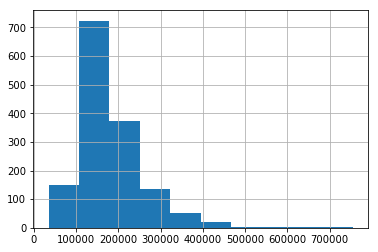

In [6]:
ytrain.hist()

In [7]:
X = X.drop("PoolQC", axis=1)
X = X.drop("Alley", axis=1)
X = X.drop("MiscFeature", axis=1)

In [8]:
X = X.fillna(X.mean())
X

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL    65.000000     8450   Pave      Reg         Lvl   
1             20       RL    80.000000     9600   Pave      Reg         Lvl   
2             60       RL    68.000000    11250   Pave      IR1         Lvl   
3             70       RL    60.000000     9550   Pave      IR1         Lvl   
4             60       RL    84.000000    14260   Pave      IR1         Lvl   
5             50       RL    85.000000    14115   Pave      IR1         Lvl   
6             20       RL    75.000000    10084   Pave      Reg         Lvl   
7             60       RL    69.305795    10382   Pave      IR1         Lvl   
8             50       RM    51.000000     6120   Pave      Reg         Lvl   
9            190       RL    50.000000     7420   Pave      Reg         Lvl   
10            20       RL    70.000000    11200   Pave      Reg         Lvl   
11            60       RL    85.000000    11924   Pave      IR1         Lvl   
12            20       RL    69.305795    12968   Pave      IR2         Lvl   
13            20       RL    91.000000    10652   Pave      IR1         Lvl   
14            20       RL    69.305795    10920   Pave      IR1         Lvl   
15            45       RM    51.000000     6120   Pave      Reg         Lvl   
16            20       RL    69.305795    11241   Pave      IR1         Lvl   
17            90       RL    72.000000    10791   Pave      Reg         Lvl   
18            20       RL    66.000000    13695   Pave      Reg         Lvl   
19            20       RL    70.000000     7560   Pave      Reg         Lvl   
20            60       RL   101.000000    14215   Pave      IR1         Lvl   
21            45       RM    57.000000     7449   Pave      Reg         Bnk   
22            20       RL    75.000000     9742   Pave      Reg         Lvl   
23           120       RM    44.000000     4224   Pave      Reg         Lvl   
24            20       RL    69.305795     8246   Pave      IR1         Lvl   
25            20       RL   110.000000    14230   Pave      Reg         Lvl   
26            20       RL    60.000000     7200   Pave      Reg         Lvl   
27            20       RL    98.000000    11478   Pave      Reg         Lvl   
28            20       RL    47.000000    16321   Pave      IR1         Lvl   
29            30       RM    60.000000     6324   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1429          30       RM    50.000000     7030   Pave      Reg         Lvl   
1430          50       RM    75.000000     9060   Pave      Reg         Lvl   
1431          30  C (all)    69.000000    12366   Pave      Reg         Lvl   
1432         190  C (all)    50.000000     9000   Pave      Reg         Lvl   
1433          50  C (all)    60.000000     8520   Grvl      Reg         Bnk   
1434         120       RM    41.000000     5748   Pave      IR1         HLS   
1435         120       RM    44.000000     3842   Pave      IR1         HLS   
1436          20       RL    69.000000    23580   Pave      IR1         Lvl   
1437          90       RL    65.000000     8385   Pave      Reg         Lvl   
1438          20       RL    70.000000     9116   Pave      Reg         Lvl   
1439          80       RL   140.000000    11080   Pave      Reg         Lvl   
1440          20       RL    69.305795    50102   Pave      IR1         Low   
1441          20       RL    69.305795     8098   Pave      IR1         Lvl   
1442          20       RL    95.000000    13618   Pave      Reg         Lvl   
1443          20       RL    88.000000    11577   Pave      Reg         Lvl   
1444          20      NaN   125.000000    31250   Pave      Reg         Lvl   
1445          90       RM    78.000000     7020   Pave      Reg         Lvl   
1446         160       RM    41.000000     2665   Pave      Reg         Lvl   
1447          20       RL    58.000000    10172   Pave  

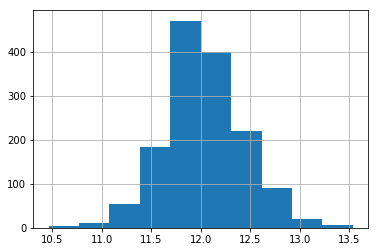

In [9]:
numeric = [x for x in X.dtypes.index if X.dtypes[x] != "object"]
X[numeric] = X[numeric].apply(np.log1p, axis=1)
ytrain = np.log1p(ytrain)
ytrain.hist()


In [10]:
X = pd.get_dummies(X)
#X.fillna(X.mean())
Xtrain = X.iloc[: train.shape[0], :]
Xtest = X.iloc[train.shape[0]: , :]


In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV



mod1 = Lasso()
mod2 = Ridge()
params = [
    {"alpha": np.linspace(0, 5, 100)}
]
gc = GridSearchCV(mod2, params, cv=3, verbose=3, n_jobs=-1)

In [47]:
gc.fit(Xtrain, ytrain)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] alpha=0.0 .......................................................
[CV] alpha=0.0 .......................................................
[CV] alpha=0.0 .......................................................
[CV] alpha=0.0505050505051 ...........................................
[CV] ............ alpha=0.0505050505051, score=0.904343, total=   0.1s
[CV] alpha=0.0505050505051 ...........................................
[CV] ............ alpha=0.0505050505051, score=0.874869, total=   0.0s
[CV] alpha=0.0505050505051 ...........................................
[CV] ............ alpha=0.0505050505051, score=0.865445, total=   0.0s
[CV] alpha=0.10101010101 .............................................
[CV] .............. alpha=0.10101010101, score=0.906046, total=   0.0s
[CV] alpha=0.10101010101 .............................................
[CV] .............. alpha=0.10101010101, score=0.876417, total=   0.0s
[CV] alpha=0.1

[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.3s


[CV] ............. alpha=0.909090909091, score=0.883926, total=   0.0s
[CV] alpha=1.0101010101 ..............................................
[CV] alpha=1.0101010101 ..............................................
[CV] ............. alpha=0.959595959596, score=0.884110, total=   0.1s
[CV] ............. alpha=0.909090909091, score=0.877108, total=   0.1s
[CV] alpha=0.959595959596 ............................................
[CV] alpha=0.959595959596 ............................................
[CV] ............... alpha=1.0101010101, score=0.914213, total=   0.0s
[CV] alpha=1.0101010101 ..............................................
[CV] ............. alpha=0.959595959596, score=0.877435, total=   0.0s
[CV] ............... alpha=1.0101010101, score=0.877743, total=   0.1s
[CV] alpha=1.06060606061 .............................................
[CV] alpha=1.06060606061 .............................................
[CV] ............. alpha=0.959595959596, score=0.914114, total=   0.0s
[CV] a

[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:    4.3s


[CV] .............. alpha=4.64646464646, score=0.886314, total=   0.0s
[CV] alpha=4.84848484848 .............................................
[CV] .............. alpha=4.79797979798, score=0.886261, total=   0.0s
[CV] .............. alpha=4.74747474747, score=0.885022, total=   0.0s
[CV] .............. alpha=4.69696969697, score=0.884995, total=   0.0s
[CV] alpha=4.79797979798 .............................................
[CV] alpha=4.79797979798 .............................................
[CV] alpha=4.94949494949 .............................................
[CV] .............. alpha=4.79797979798, score=0.914141, total=   0.0s
[CV] .............. alpha=4.84848484848, score=0.885074, total=   0.0s
[CV] .............. alpha=4.79797979798, score=0.885049, total=   0.0s
[CV] alpha=4.89898989899 .............................................
[CV] alpha=4.84848484848 .............................................
[CV] alpha=5.0 .......................................................
[CV] .

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    4.7s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'alpha': array([ 0.     ,  0.05051, ...,  4.94949,  5.     ])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [54]:
gc.best_score_, gc.best_params_

(0.89517804227507536, {'alpha': 4.3434343434343434})

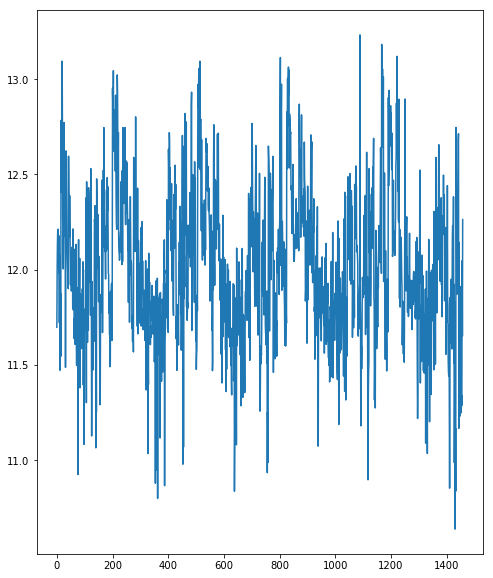

In [49]:
plt.plot(range(len(Xtest)), gc.predict(Xtest))

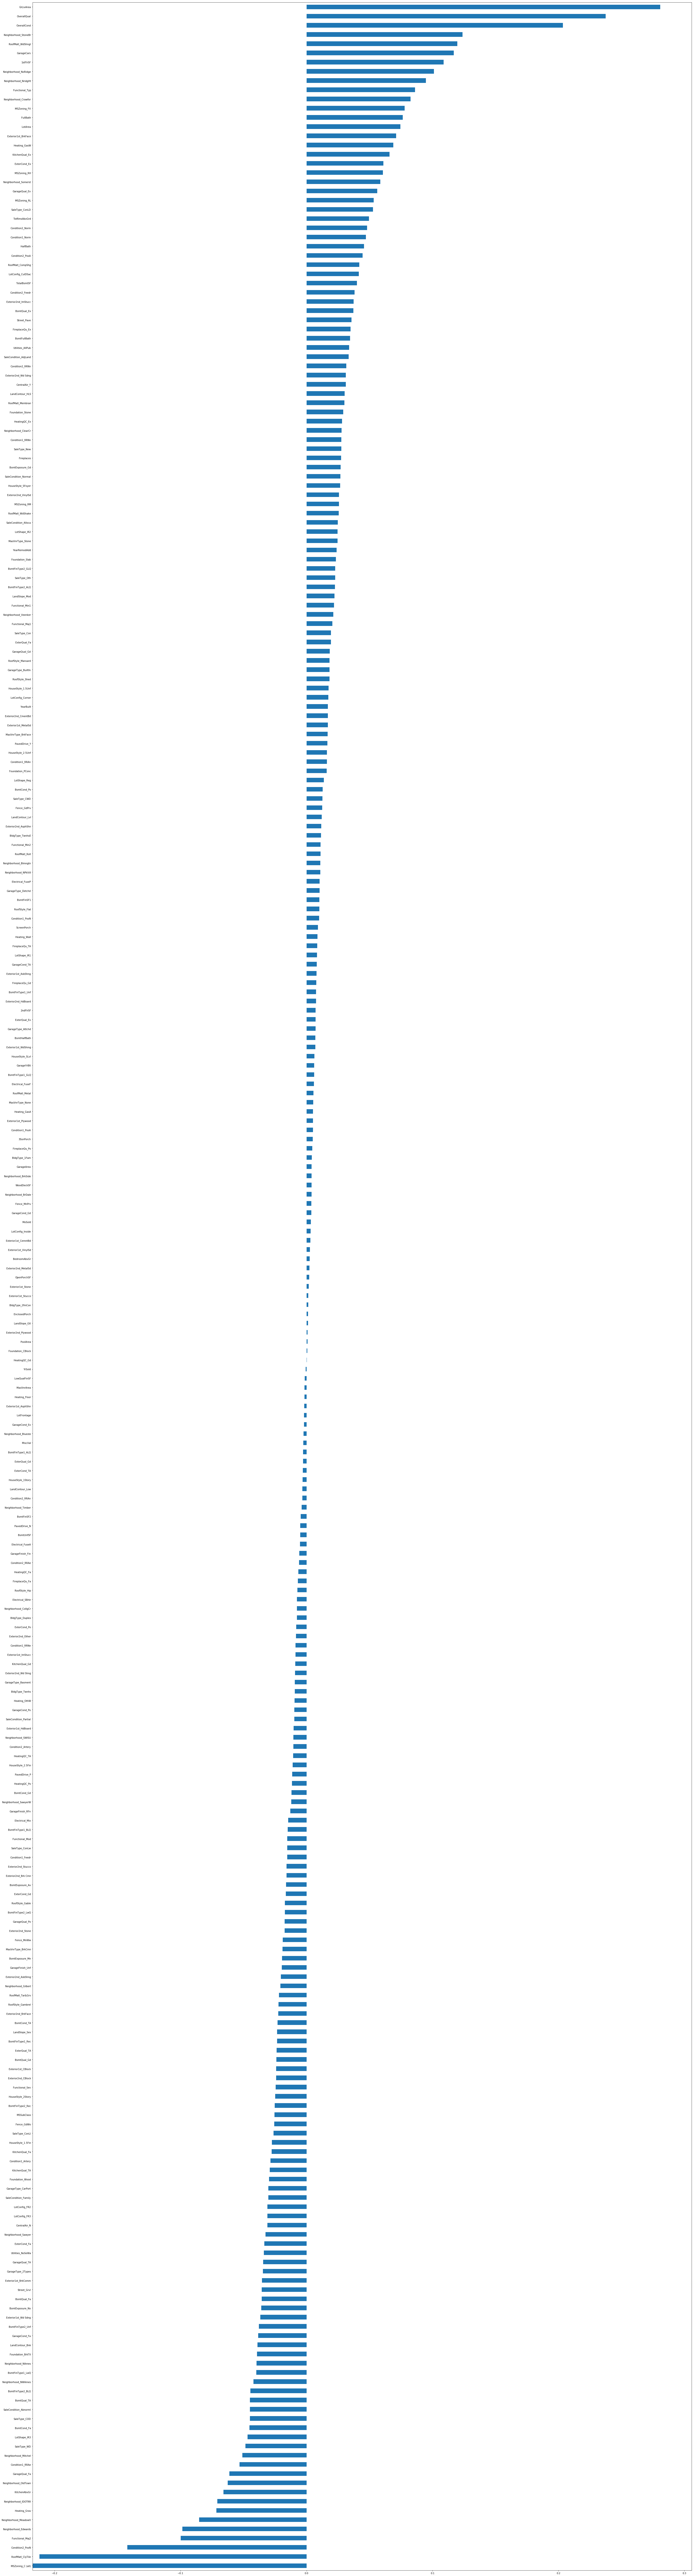

In [53]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (50, 200)
coef = pd.Series(gc.best_estimator_.coef_, index=Xtrain.columns)
coef.sort_values(inplace=True)
coef.plot("barh")

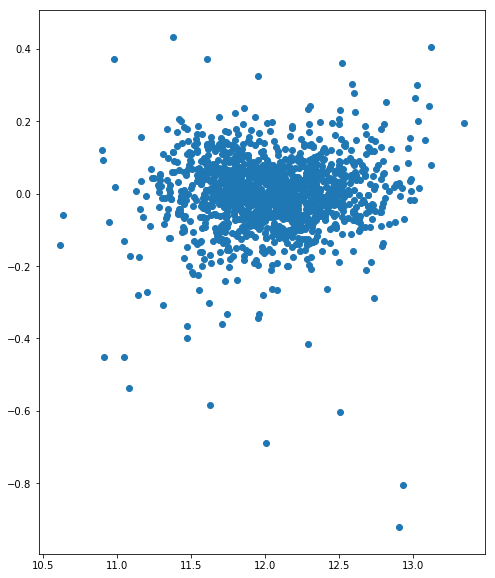

In [51]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
pre = gc.predict(Xtrain)
plt.scatter(pre, ytrain - pre)
plt.xlabel = "Predict"
plt.ylabel = "Residual"


In [34]:
from xgboost.sklearn import XGBRegressor
?XGBRegressor


In [35]:
xgb_params = [
    {
        "max_depth": np.arange(3, 5),
        "learning_rate": np.linspace(0.1, 0.13, 20),
        "min_child_weight": np.arange(1, 5)
        
    }
]
gs_xgb = GridSearchCV(XGBRegressor(), xgb_params, cv=3, verbose=3, n_jobs=-1)

In [36]:
gs_xgb.fit(Xtrain, ytrain)

Fitting 3 folds for each of 160 candidates, totalling 480 fits
[CV] learning_rate=0.1, max_depth=3, min_child_weight=1 ..............
[CV] learning_rate=0.1, max_depth=3, min_child_weight=1 ..............
[CV] learning_rate=0.1, max_depth=3, min_child_weight=1 ..............
[CV] learning_rate=0.1, max_depth=3, min_child_weight=2 ..............
[CV]  learning_rate=0.1, max_depth=3, min_child_weight=1, score=0.909958, total=   1.6s
[CV] learning_rate=0.1, max_depth=3, min_child_weight=2 ..............
[CV]  learning_rate=0.1, max_depth=3, min_child_weight=1, score=0.886070, total=   1.6s
[CV] learning_rate=0.1, max_depth=3, min_child_weight=2 ..............
[CV]  learning_rate=0.1, max_depth=3, min_child_weight=1, score=0.872546, total=   1.7s
[CV] learning_rate=0.1, max_depth=3, min_child_weight=3 ..............
[CV]  learning_rate=0.1, max_depth=3, min_child_weight=2, score=0.912968, total=   1.7s
[CV] learning_rate=0.1, max_depth=3, min_child_weight=3 ..............
[CV]  learning_ra

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   11.7s


[CV]  learning_rate=0.101578947368, max_depth=3, min_child_weight=1, score=0.909284, total=   1.3s
[CV] learning_rate=0.101578947368, max_depth=3, min_child_weight=2 ...
[CV]  learning_rate=0.101578947368, max_depth=3, min_child_weight=1, score=0.874626, total=   1.2s
[CV] learning_rate=0.101578947368, max_depth=3, min_child_weight=2 ...
[CV]  learning_rate=0.101578947368, max_depth=3, min_child_weight=1, score=0.886657, total=   1.3s
[CV]  learning_rate=0.101578947368, max_depth=3, min_child_weight=2, score=0.913505, total=   1.2s
[CV] learning_rate=0.101578947368, max_depth=3, min_child_weight=3 ...
[CV] learning_rate=0.101578947368, max_depth=3, min_child_weight=3 ...
[CV]  learning_rate=0.101578947368, max_depth=3, min_child_weight=2, score=0.875528, total=   1.3s
[CV] learning_rate=0.101578947368, max_depth=3, min_child_weight=3 ...
[CV]  learning_rate=0.101578947368, max_depth=3, min_child_weight=2, score=0.891676, total=   1.3s
[CV] learning_rate=0.101578947368, max_depth=3, min

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   52.3s


[CV]  learning_rate=0.107894736842, max_depth=3, min_child_weight=1, score=0.914447, total=   1.4s
[CV] learning_rate=0.107894736842, max_depth=3, min_child_weight=2 ...
[CV]  learning_rate=0.107894736842, max_depth=3, min_child_weight=1, score=0.876217, total=   1.3s
[CV] learning_rate=0.107894736842, max_depth=3, min_child_weight=2 ...
[CV]  learning_rate=0.107894736842, max_depth=3, min_child_weight=1, score=0.889205, total=   1.3s
[CV] learning_rate=0.107894736842, max_depth=3, min_child_weight=3 ...
[CV]  learning_rate=0.107894736842, max_depth=3, min_child_weight=2, score=0.912516, total=   1.3s
[CV] learning_rate=0.107894736842, max_depth=3, min_child_weight=3 ...
[CV]  learning_rate=0.107894736842, max_depth=3, min_child_weight=2, score=0.874676, total=   1.3s
[CV] learning_rate=0.107894736842, max_depth=3, min_child_weight=3 ...
[CV]  learning_rate=0.107894736842, max_depth=3, min_child_weight=2, score=0.889367, total=   1.3s
[CV] learning_rate=0.107894736842, max_depth=3, min

[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.1min


[CV]  learning_rate=0.117368421053, max_depth=4, min_child_weight=2, score=0.876135, total=   1.8s
[CV] learning_rate=0.117368421053, max_depth=4, min_child_weight=3 ...
[CV]  learning_rate=0.117368421053, max_depth=4, min_child_weight=2, score=0.887159, total=   1.8s
[CV] learning_rate=0.117368421053, max_depth=4, min_child_weight=4 ...
[CV]  learning_rate=0.117368421053, max_depth=4, min_child_weight=3, score=0.916742, total=   1.8s
[CV] learning_rate=0.117368421053, max_depth=4, min_child_weight=4 ...
[CV]  learning_rate=0.117368421053, max_depth=4, min_child_weight=3, score=0.874596, total=   1.8s
[CV] learning_rate=0.117368421053, max_depth=4, min_child_weight=4 ...
[CV]  learning_rate=0.117368421053, max_depth=4, min_child_weight=3, score=0.885953, total=   1.6s
[CV] learning_rate=0.118947368421, max_depth=3, min_child_weight=1 ...
[CV]  learning_rate=0.117368421053, max_depth=4, min_child_weight=4, score=0.870887, total=   1.5s
[CV]  learning_rate=0.117368421053, max_depth=4, mi

[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  3.6min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'learning_rate': array([ 0.1    ,  0.10158,  0.10316,  0.10474,  0.10632,  0.10789,
        0.10947,  0.11105,  0.11263,  0.11421,  0.11579,  0.11737,
        0.11895,  0.12053,  0.12211,  0.12368,  0.12526,  0.12684,
        0.12842,  0.13   ]), 'min_child_weight': array([1, 2, 3, 4]), 'max_depth': array([3, 4])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [55]:
gs_xgb.best_params_, gs_xgb.best_score_

({'learning_rate': 0.11736842105263158, 'max_depth': 3, 'min_child_weight': 2},
 0.89721434661760213)

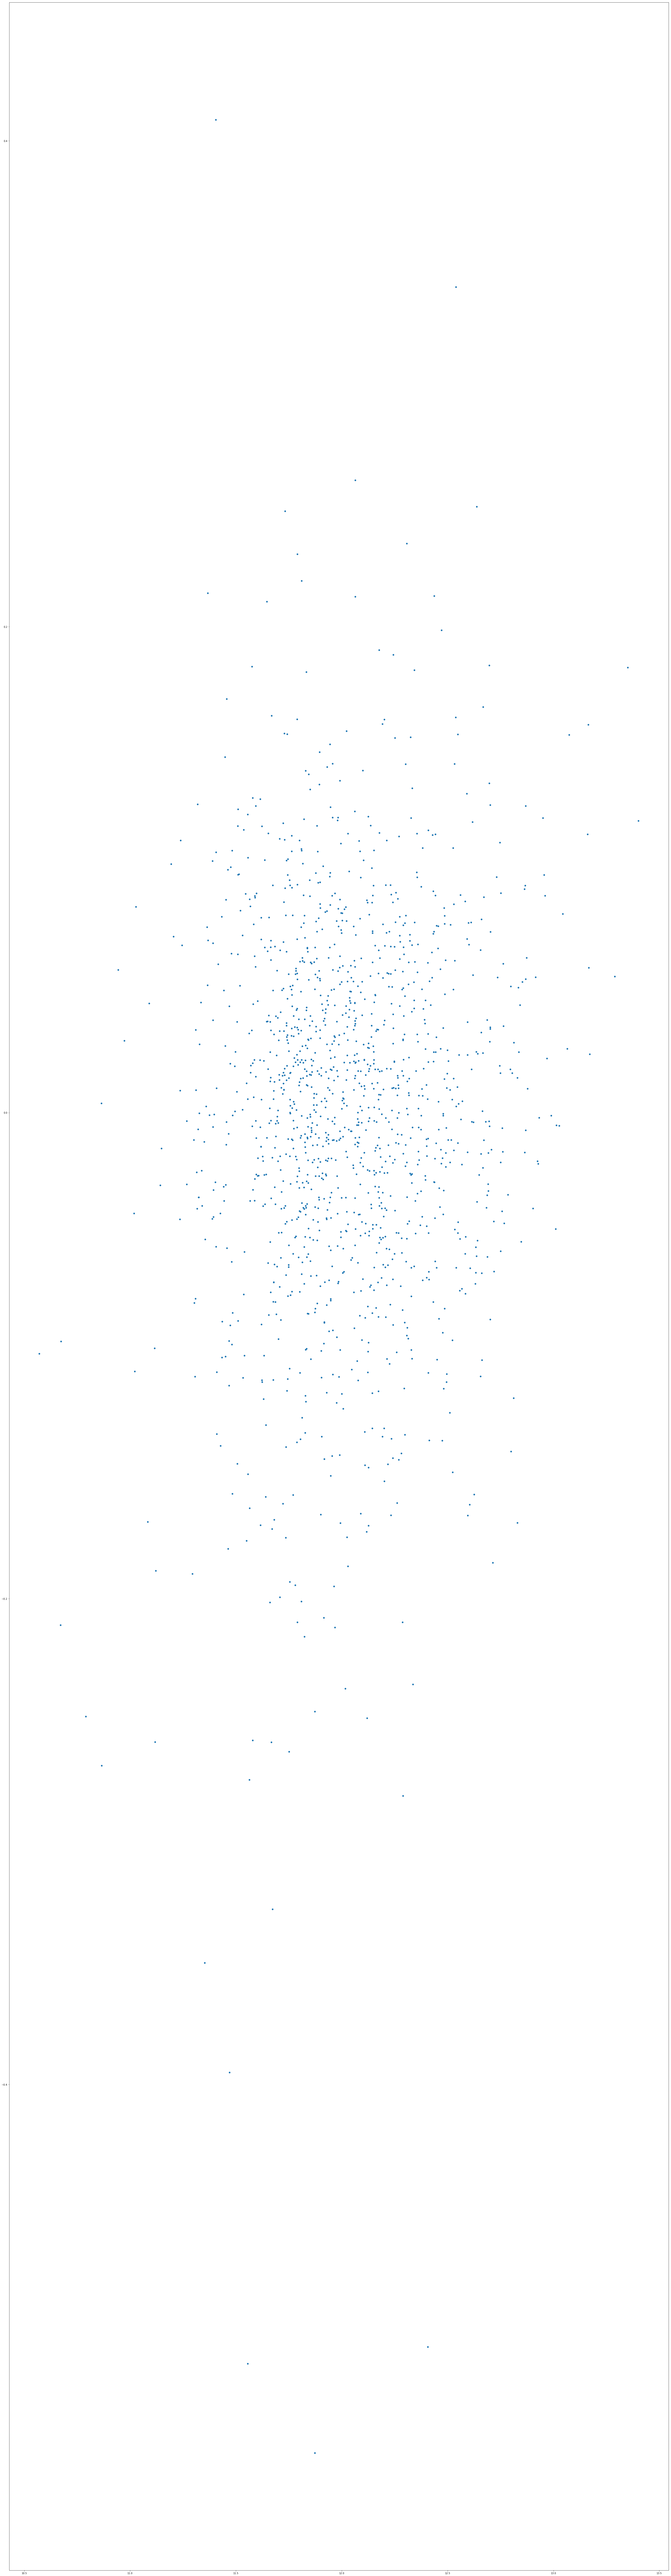

In [56]:
pre = gs_xgb.predict(Xtrain)
plt.scatter(pre, ytrain - pre)
plt.xlabel = "Predict"
plt.ylabel = "Residual"

In [57]:
final_pred = 0.6 * np.exp(gc.predict(Xtest)) + 0.4 * np.exp(gs_xgb.predict(Xtest)) - 1
pd.DataFrame({"Id": test.Id, "SalePrice": final_pred}).to_csv("final_pred.csv", index=False)

In [62]:
from sklearn.metrics import mean_absolute_error
for i in np.linspace(0, 1, 11):
    _pred = i * np.exp(gc.predict(Xtrain)) + (1 - i) * np.exp(gs_xgb.predict(Xtrain)) - 1
    print(i, mean_absolute_error(ytrain, _pred))
    

0.0 179720.226162
0.1 179695.580459
0.2 179670.945528
0.3 179646.299423
0.4 179621.66409
0.5 179597.017989
0.6 179572.377672
0.7 179547.736953
0.8 179523.093744
0.9 179498.45178
1.0 179473.809816


In [16]:
from sklearn.linear_model import ElasticNet
ela_param = {
    "alpha": np.linspace(0, 0.1, 100),
    "l1_ratio": np.linspace(0, 1, 100)
}
gs_ela = GridSearchCV(ElasticNet(), ela_param, n_jobs=-1, verbose=3)

In [17]:
gs_ela.fit(Xtrain, ytrain)

Fitting 3 folds for each of 10000 candidates, totalling 30000 fits
[CV] alpha=0.0, l1_ratio=0.0 .........................................
[CV] alpha=0.0, l1_ratio=0.0 .........................................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)


[CV] alpha=0.0, l1_ratio=0.0 .........................................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0, l1_ratio=0.010101010101 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coo

[CV] .......... alpha=0.0, l1_ratio=0.0, score=0.906388, total=   1.0s
[CV] alpha=0.0, l1_ratio=0.010101010101 ..............................
[CV] .......... alpha=0.0, l1_ratio=0.0, score=0.874450, total=   1.0s
[CV] alpha=0.0, l1_ratio=0.010101010101 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coo

[CV]  alpha=0.0, l1_ratio=0.010101010101, score=0.906388, total=   1.1s
[CV] alpha=0.0, l1_ratio=0.020202020202 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] .......... alpha=0.0, l1_ratio=0.0, score=0.863599, total=   1.3s
[CV] alpha=0.0, l1_ratio=0.020202020202 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.010101010101, score=0.874450, total=   1.1s
[CV] alpha=0.0, l1_ratio=0.020202020202 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision 

[CV]  alpha=0.0, l1_ratio=0.020202020202, score=0.906388, total=   1.2s
[CV] alpha=0.0, l1_ratio=0.030303030303 ..............................
[CV]  alpha=0.0, l1_ratio=0.010101010101, score=0.863599, total=   1.3s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)


[CV] alpha=0.0, l1_ratio=0.030303030303 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0, l1_ratio=0.020202020202, score=0.874450, total=   1.1s
[CV] alpha=0.0, l1_ratio=0.030303030303 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision 

[CV]  alpha=0.0, l1_ratio=0.020202020202, score=0.863599, total=   1.3s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.030303030303, score=0.874450, total=   1.0s
[CV] alpha=0.0, l1_ratio=0.040404040404 ..............................
[CV] alpha=0.0, l1_ratio=0.040404040404 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0, l1_ratio=0.030303030303, score=0.906388, total=   1.1s
[CV] alpha=0.0, l1_ratio=0.040404040404 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.030303030303, score=0.863599, total=   1.2s
[CV] alpha=0.0, l1_ratio=0.0505050505051 .............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.040404040404, score=0.874450, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.0505050505051 .............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0, l1_ratio=0.040404040404, score=0.906388, total=   1.0s
[CV] alpha=0.0, l1_ratio=0.0505050505051 .............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.040404040404, score=0.863599, total=   1.1s
[CV] alpha=0.0, l1_ratio=0.0606060606061 .............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.0505050505051, score=0.906388, total=   1.0s
[CV] alpha=0.0, l1_ratio=0.0606060606061 .............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.0505050505051, score=0.874450, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.0606060606061 .............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.0505050505051, score=0.863599, total=   1.1s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0, l1_ratio=0.0707070707071 .............................
[CV]  alpha=0.0, l1_ratio=0.0606060606061, score=0.906388, total=   0.9s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)


[CV] alpha=0.0, l1_ratio=0.0707070707071 .............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.0606060606061, score=0.874450, total=   1.0s
[CV] alpha=0.0, l1_ratio=0.0707070707071 .............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision 

[CV]  alpha=0.0, l1_ratio=0.0606060606061, score=0.863599, total=   1.1s
[CV]  alpha=0.0, l1_ratio=0.0707070707071, score=0.874450, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.0808080808081 .............................
[CV]  alpha=0.0, l1_ratio=0.0707070707071, score=0.906388, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.0808080808081 .............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)


[CV] alpha=0.0, l1_ratio=0.0808080808081 .............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coo

[CV]  alpha=0.0, l1_ratio=0.0707070707071, score=0.863599, total=   1.0s
[CV] alpha=0.0, l1_ratio=0.0909090909091 .............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.0s
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.0808080808081, score=0.906388, total=   1.1s
[CV] alpha=0.0, l1_ratio=0.0909090909091 .............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0, l1_ratio=0.0808080808081, score=0.874450, total=   1.1s
[CV] alpha=0.0, l1_ratio=0.0909090909091 .............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.0808080808081, score=0.863599, total=   1.2s
[CV] alpha=0.0, l1_ratio=0.10101010101 ...............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.0909090909091, score=0.906388, total=   1.1s
[CV] alpha=0.0, l1_ratio=0.10101010101 ...............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.0909090909091, score=0.874450, total=   1.0s
[CV] alpha=0.0, l1_ratio=0.10101010101 ...............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.10101010101, score=0.906388, total=   1.0s
[CV] alpha=0.0, l1_ratio=0.111111111111 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.0909090909091, score=0.863599, total=   1.4s
[CV] alpha=0.0, l1_ratio=0.111111111111 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.10101010101, score=0.874450, total=   1.3s
[CV] alpha=0.0, l1_ratio=0.111111111111 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.10101010101, score=0.863599, total=   1.6s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0, l1_ratio=0.121212121212 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)


[CV]  alpha=0.0, l1_ratio=0.111111111111, score=0.906388, total=   1.4s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0, l1_ratio=0.121212121212 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.111111111111, score=0.874450, total=   1.4s
[CV] alpha=0.0, l1_ratio=0.121212121212 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.111111111111, score=0.863599, total=   2.1s
[CV] alpha=0.0, l1_ratio=0.131313131313 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.121212121212, score=0.874450, total=   1.8s
[CV] alpha=0.0, l1_ratio=0.131313131313 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.121212121212, score=0.906388, total=   2.0s
[CV] alpha=0.0, l1_ratio=0.131313131313 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.121212121212, score=0.863599, total=   1.9s
[CV] alpha=0.0, l1_ratio=0.141414141414 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.131313131313, score=0.906388, total=   1.1s
[CV] alpha=0.0, l1_ratio=0.141414141414 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.131313131313, score=0.874450, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.141414141414 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.131313131313, score=0.863599, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.151515151515 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.141414141414, score=0.906388, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.151515151515 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.141414141414, score=0.874450, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.151515151515 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.141414141414, score=0.863599, total=   1.0s
[CV] alpha=0.0, l1_ratio=0.161616161616 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.151515151515, score=0.906388, total=   1.0s
[CV] alpha=0.0, l1_ratio=0.161616161616 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.151515151515, score=0.874450, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.161616161616 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.151515151515, score=0.863599, total=   1.1s
[CV] alpha=0.0, l1_ratio=0.171717171717 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.161616161616, score=0.906388, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.171717171717 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.161616161616, score=0.874450, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.171717171717 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.161616161616, score=0.863599, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.181818181818 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.171717171717, score=0.906388, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.181818181818 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.171717171717, score=0.874450, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.181818181818 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.171717171717, score=0.863599, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.191919191919 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.181818181818, score=0.906388, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.191919191919 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.181818181818, score=0.874450, total=   0.7s
[CV] alpha=0.0, l1_ratio=0.191919191919 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.191919191919, score=0.906388, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.20202020202 ...............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.181818181818, score=0.863599, total=   0.9s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0, l1_ratio=0.20202020202 ...............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0, l1_ratio=0.191919191919, score=0.874450, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.20202020202 ...............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.191919191919, score=0.863599, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.212121212121 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.20202020202, score=0.874450, total=   0.7s
[CV] alpha=0.0, l1_ratio=0.212121212121 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)


[CV]  alpha=0.0, l1_ratio=0.20202020202, score=0.906388, total=   0.8s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0, l1_ratio=0.212121212121 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.20202020202, score=0.863599, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.222222222222 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.212121212121, score=0.906388, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.222222222222 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision 

[CV]  alpha=0.0, l1_ratio=0.212121212121, score=0.874450, total=   1.2s
[CV] alpha=0.0, l1_ratio=0.222222222222 ..............................
[CV]  alpha=0.0, l1_ratio=0.212121212121, score=0.863599, total=   1.2s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)


[CV] alpha=0.0, l1_ratio=0.232323232323 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.222222222222, score=0.906388, total=   1.5s
[CV] alpha=0.0, l1_ratio=0.232323232323 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.222222222222, score=0.874450, total=   1.6s
[CV] alpha=0.0, l1_ratio=0.232323232323 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.232323232323, score=0.906388, total=   1.2s
[CV] alpha=0.0, l1_ratio=0.242424242424 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.222222222222, score=0.863599, total=   1.5s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0, l1_ratio=0.242424242424 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)


[CV]  alpha=0.0, l1_ratio=0.232323232323, score=0.874450, total=   1.1s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0, l1_ratio=0.242424242424 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.232323232323, score=0.863599, total=   1.3s
[CV] alpha=0.0, l1_ratio=0.252525252525 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.242424242424, score=0.906388, total=   1.2s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0, l1_ratio=0.252525252525 ..............................
[CV]  alpha=0.0, l1_ratio=0.242424242424, score=0.874450, total=   1.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)


[CV] alpha=0.0, l1_ratio=0.252525252525 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.242424242424, score=0.863599, total=   1.3s
[CV] alpha=0.0, l1_ratio=0.262626262626 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.252525252525, score=0.906388, total=   1.2s
[CV] alpha=0.0, l1_ratio=0.262626262626 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.252525252525, score=0.874450, total=   1.1s
[CV] alpha=0.0, l1_ratio=0.262626262626 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.252525252525, score=0.863599, total=   1.4s
[CV] alpha=0.0, l1_ratio=0.272727272727 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.262626262626, score=0.906388, total=   1.1s
[CV] alpha=0.0, l1_ratio=0.272727272727 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.262626262626, score=0.874450, total=   1.2s
[CV] alpha=0.0, l1_ratio=0.272727272727 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.262626262626, score=0.863599, total=   1.4s
[CV] alpha=0.0, l1_ratio=0.282828282828 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.272727272727, score=0.874450, total=   1.1s
[CV] alpha=0.0, l1_ratio=0.282828282828 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.272727272727, score=0.906388, total=   1.2s
[CV] alpha=0.0, l1_ratio=0.282828282828 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.272727272727, score=0.863599, total=   1.1s
[CV] alpha=0.0, l1_ratio=0.292929292929 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.282828282828, score=0.906388, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.292929292929 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0, l1_ratio=0.282828282828, score=0.874450, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.292929292929 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.282828282828, score=0.863599, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.30303030303 ...............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.292929292929, score=0.906388, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.30303030303 ...............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.292929292929, score=0.874450, total=   0.7s
[CV] alpha=0.0, l1_ratio=0.30303030303 ...............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.292929292929, score=0.863599, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.313131313131 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.30303030303, score=0.906388, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.313131313131 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.30303030303, score=0.874450, total=   0.7s
[CV] alpha=0.0, l1_ratio=0.313131313131 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.30303030303, score=0.863599, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.323232323232 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.313131313131, score=0.906388, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.323232323232 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.313131313131, score=0.874450, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.323232323232 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.313131313131, score=0.863599, total=   1.1s
[CV] alpha=0.0, l1_ratio=0.333333333333 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.323232323232, score=0.906388, total=   1.3s
[CV] alpha=0.0, l1_ratio=0.333333333333 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.323232323232, score=0.874450, total=   1.5s
[CV] alpha=0.0, l1_ratio=0.333333333333 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.323232323232, score=0.863599, total=   1.8s
[CV] alpha=0.0, l1_ratio=0.343434343434 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.333333333333, score=0.906388, total=   1.5s
[CV] alpha=0.0, l1_ratio=0.343434343434 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.333333333333, score=0.874450, total=   1.3s
[CV] alpha=0.0, l1_ratio=0.343434343434 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.333333333333, score=0.863599, total=   1.3s
[CV] alpha=0.0, l1_ratio=0.353535353535 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.343434343434, score=0.906388, total=   1.1s
[CV] alpha=0.0, l1_ratio=0.353535353535 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.343434343434, score=0.874450, total=   1.0s
[CV] alpha=0.0, l1_ratio=0.353535353535 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.343434343434, score=0.863599, total=   1.2s
[CV] alpha=0.0, l1_ratio=0.363636363636 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.353535353535, score=0.906388, total=   1.1s
[CV] alpha=0.0, l1_ratio=0.363636363636 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.353535353535, score=0.874450, total=   1.1s
[CV] alpha=0.0, l1_ratio=0.363636363636 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.353535353535, score=0.863599, total=   1.2s
[CV] alpha=0.0, l1_ratio=0.373737373737 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.363636363636, score=0.906388, total=   1.2s
[CV] alpha=0.0, l1_ratio=0.373737373737 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)


[CV]  alpha=0.0, l1_ratio=0.363636363636, score=0.874450, total=   1.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0, l1_ratio=0.373737373737 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.363636363636, score=0.863599, total=   1.2s
[CV] alpha=0.0, l1_ratio=0.383838383838 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.373737373737, score=0.906388, total=   1.3s
[CV] alpha=0.0, l1_ratio=0.383838383838 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.373737373737, score=0.874450, total=   1.3s
[CV] alpha=0.0, l1_ratio=0.383838383838 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.373737373737, score=0.863599, total=   1.5s
[CV] alpha=0.0, l1_ratio=0.393939393939 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.383838383838, score=0.906388, total=   1.3s
[CV] alpha=0.0, l1_ratio=0.393939393939 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.383838383838, score=0.874450, total=   1.3s
[CV] alpha=0.0, l1_ratio=0.393939393939 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.383838383838, score=0.863599, total=   1.6s
[CV] alpha=0.0, l1_ratio=0.40404040404 ...............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.393939393939, score=0.906388, total=   1.5s
[CV] alpha=0.0, l1_ratio=0.40404040404 ...............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.393939393939, score=0.874450, total=   1.4s
[CV] alpha=0.0, l1_ratio=0.40404040404 ...............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.393939393939, score=0.863599, total=   1.7s
[CV] alpha=0.0, l1_ratio=0.414141414141 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.40404040404, score=0.906388, total=   1.1s
[CV] alpha=0.0, l1_ratio=0.414141414141 ..............................


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   35.5s
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.40404040404, score=0.874450, total=   1.3s
[CV] alpha=0.0, l1_ratio=0.414141414141 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.40404040404, score=0.863599, total=   1.7s
[CV] alpha=0.0, l1_ratio=0.424242424242 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision 

[CV]  alpha=0.0, l1_ratio=0.414141414141, score=0.874450, total=   1.2s
[CV] alpha=0.0, l1_ratio=0.424242424242 ..............................
[CV]  alpha=0.0, l1_ratio=0.414141414141, score=0.906388, total=   1.4s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)


[CV] alpha=0.0, l1_ratio=0.424242424242 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.414141414141, score=0.863599, total=   1.3s
[CV] alpha=0.0, l1_ratio=0.434343434343 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.424242424242, score=0.906388, total=   1.0s
[CV] alpha=0.0, l1_ratio=0.434343434343 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.424242424242, score=0.874450, total=   1.1s
[CV] alpha=0.0, l1_ratio=0.434343434343 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.424242424242, score=0.863599, total=   1.2s
[CV] alpha=0.0, l1_ratio=0.444444444444 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.434343434343, score=0.906388, total=   1.2s
[CV] alpha=0.0, l1_ratio=0.444444444444 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.434343434343, score=0.874450, total=   1.2s
[CV] alpha=0.0, l1_ratio=0.444444444444 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.444444444444, score=0.906388, total=   1.1s
[CV] alpha=0.0, l1_ratio=0.454545454545 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0, l1_ratio=0.434343434343, score=0.863599, total=   1.3s
[CV] alpha=0.0, l1_ratio=0.454545454545 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.444444444444, score=0.874450, total=   1.2s
[CV] alpha=0.0, l1_ratio=0.454545454545 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.444444444444, score=0.863599, total=   1.4s
[CV] alpha=0.0, l1_ratio=0.464646464646 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision 

[CV]  alpha=0.0, l1_ratio=0.454545454545, score=0.874450, total=   1.3s
[CV]  alpha=0.0, l1_ratio=0.454545454545, score=0.906388, total=   1.3s
[CV] alpha=0.0, l1_ratio=0.464646464646 ..............................
[CV] alpha=0.0, l1_ratio=0.464646464646 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coo

[CV]  alpha=0.0, l1_ratio=0.454545454545, score=0.863599, total=   1.6s
[CV] alpha=0.0, l1_ratio=0.474747474747 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.464646464646, score=0.906388, total=   1.3s
[CV] alpha=0.0, l1_ratio=0.474747474747 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.464646464646, score=0.874450, total=   1.2s
[CV] alpha=0.0, l1_ratio=0.474747474747 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.464646464646, score=0.863599, total=   1.3s
[CV] alpha=0.0, l1_ratio=0.484848484848 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.474747474747, score=0.906388, total=   1.3s
[CV] alpha=0.0, l1_ratio=0.484848484848 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.474747474747, score=0.874450, total=   1.3s
[CV] alpha=0.0, l1_ratio=0.484848484848 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.484848484848, score=0.906388, total=   1.4s
[CV] alpha=0.0, l1_ratio=0.494949494949 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.474747474747, score=0.863599, total=   1.5s
[CV] alpha=0.0, l1_ratio=0.494949494949 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.484848484848, score=0.874450, total=   1.3s
[CV] alpha=0.0, l1_ratio=0.494949494949 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.484848484848, score=0.863599, total=   1.4s
[CV] alpha=0.0, l1_ratio=0.505050505051 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision 

[CV]  alpha=0.0, l1_ratio=0.494949494949, score=0.906388, total=   1.2s
[CV]  alpha=0.0, l1_ratio=0.494949494949, score=0.874450, total=   1.2s
[CV] alpha=0.0, l1_ratio=0.505050505051 ..............................
[CV] alpha=0.0, l1_ratio=0.505050505051 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coo

[CV]  alpha=0.0, l1_ratio=0.494949494949, score=0.863599, total=   1.6s
[CV] alpha=0.0, l1_ratio=0.515151515152 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.505050505051, score=0.906388, total=   1.7s
[CV] alpha=0.0, l1_ratio=0.515151515152 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.505050505051, score=0.874450, total=   1.7s
[CV] alpha=0.0, l1_ratio=0.515151515152 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.505050505051, score=0.863599, total=   1.9s
[CV] alpha=0.0, l1_ratio=0.525252525253 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.515151515152, score=0.906388, total=   1.4s
[CV] alpha=0.0, l1_ratio=0.525252525253 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.515151515152, score=0.874450, total=   1.1s
[CV] alpha=0.0, l1_ratio=0.525252525253 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.515151515152, score=0.863599, total=   1.2s
[CV] alpha=0.0, l1_ratio=0.535353535354 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)


[CV]  alpha=0.0, l1_ratio=0.525252525253, score=0.906388, total=   0.9s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0, l1_ratio=0.535353535354 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.525252525253, score=0.874450, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.535353535354 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.525252525253, score=0.863599, total=   1.0s
[CV] alpha=0.0, l1_ratio=0.545454545455 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.535353535354, score=0.874450, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.545454545455 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)


[CV]  alpha=0.0, l1_ratio=0.535353535354, score=0.906388, total=   0.9s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0, l1_ratio=0.545454545455 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.535353535354, score=0.863599, total=   1.0s
[CV] alpha=0.0, l1_ratio=0.555555555556 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)


[CV]  alpha=0.0, l1_ratio=0.545454545455, score=0.906388, total=   0.9s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0, l1_ratio=0.555555555556 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.545454545455, score=0.874450, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.555555555556 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.545454545455, score=0.863599, total=   1.0s
[CV] alpha=0.0, l1_ratio=0.565656565657 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision 

[CV]  alpha=0.0, l1_ratio=0.555555555556, score=0.906388, total=   1.1s
[CV]  alpha=0.0, l1_ratio=0.555555555556, score=0.874450, total=   1.1s
[CV] alpha=0.0, l1_ratio=0.565656565657 ..............................
[CV] alpha=0.0, l1_ratio=0.565656565657 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coo

[CV]  alpha=0.0, l1_ratio=0.555555555556, score=0.863599, total=   1.3s
[CV] alpha=0.0, l1_ratio=0.575757575758 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)


[CV]  alpha=0.0, l1_ratio=0.565656565657, score=0.906388, total=   1.2s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0, l1_ratio=0.575757575758 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.565656565657, score=0.874450, total=   1.2s
[CV] alpha=0.0, l1_ratio=0.575757575758 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.565656565657, score=0.863599, total=   1.3s
[CV] alpha=0.0, l1_ratio=0.585858585859 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.575757575758, score=0.906388, total=   1.1s
[CV] alpha=0.0, l1_ratio=0.585858585859 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.575757575758, score=0.874450, total=   1.1s
[CV] alpha=0.0, l1_ratio=0.585858585859 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.575757575758, score=0.863599, total=   1.2s
[CV] alpha=0.0, l1_ratio=0.59595959596 ...............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0, l1_ratio=0.585858585859, score=0.906388, total=   1.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0, l1_ratio=0.59595959596 ...............................
[CV]  alpha=0.0, l1_ratio=0.585858585859, score=0.874450, total=   1.0s
[CV] alpha=0.0, l1_ratio=0.59595959596 ...............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coo

[CV]  alpha=0.0, l1_ratio=0.585858585859, score=0.863599, total=   1.1s
[CV] alpha=0.0, l1_ratio=0.606060606061 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision 

[CV]  alpha=0.0, l1_ratio=0.59595959596, score=0.906388, total=   0.9s
[CV]  alpha=0.0, l1_ratio=0.59595959596, score=0.874450, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.606060606061 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0, l1_ratio=0.606060606061 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.59595959596, score=0.863599, total=   1.0s
[CV] alpha=0.0, l1_ratio=0.616161616162 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0, l1_ratio=0.606060606061, score=0.906388, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.616161616162 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.606060606061, score=0.874450, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.616161616162 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.606060606061, score=0.863599, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.626262626263 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.616161616162, score=0.874450, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.626262626263 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.616161616162, score=0.906388, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.626262626263 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision 

[CV]  alpha=0.0, l1_ratio=0.616161616162, score=0.863599, total=   0.9s
[CV]  alpha=0.0, l1_ratio=0.626262626263, score=0.906388, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.636363636364 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0, l1_ratio=0.636363636364 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0, l1_ratio=0.626262626263, score=0.874450, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.636363636364 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coo

[CV]  alpha=0.0, l1_ratio=0.626262626263, score=0.863599, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.646464646465 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.636363636364, score=0.874450, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.646464646465 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)


[CV]  alpha=0.0, l1_ratio=0.636363636364, score=0.906388, total=   0.8s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0, l1_ratio=0.646464646465 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.636363636364, score=0.863599, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.656565656566 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.646464646465, score=0.906388, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.656565656566 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.646464646465, score=0.874450, total=   0.7s
[CV] alpha=0.0, l1_ratio=0.656565656566 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.646464646465, score=0.863599, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.666666666667 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0, l1_ratio=0.656565656566, score=0.906388, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.666666666667 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.656565656566, score=0.874450, total=   0.7s
[CV] alpha=0.0, l1_ratio=0.666666666667 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.656565656566, score=0.863599, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.676767676768 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision 

[CV]  alpha=0.0, l1_ratio=0.666666666667, score=0.906388, total=   0.8s
[CV]  alpha=0.0, l1_ratio=0.666666666667, score=0.874450, total=   0.7s
[CV] alpha=0.0, l1_ratio=0.676767676768 ..............................
[CV] alpha=0.0, l1_ratio=0.676767676768 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coo

[CV]  alpha=0.0, l1_ratio=0.666666666667, score=0.863599, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.686868686869 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.676767676768, score=0.906388, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.686868686869 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)


[CV]  alpha=0.0, l1_ratio=0.676767676768, score=0.874450, total=   0.8s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0, l1_ratio=0.686868686869 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.676767676768, score=0.863599, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.69696969697 ...............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.686868686869, score=0.906388, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.69696969697 ...............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.686868686869, score=0.874450, total=   0.7s
[CV] alpha=0.0, l1_ratio=0.69696969697 ...............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.686868686869, score=0.863599, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.707070707071 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.69696969697, score=0.906388, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.707070707071 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.69696969697, score=0.874450, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.707070707071 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision 

[CV]  alpha=0.0, l1_ratio=0.69696969697, score=0.863599, total=   0.9s
[CV]  alpha=0.0, l1_ratio=0.707070707071, score=0.906388, total=   0.8s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0, l1_ratio=0.717171717172 ..............................
[CV] alpha=0.0, l1_ratio=0.717171717172 ..............................
[CV]  alpha=0.0, l1_ratio=0.707070707071, score=0.874450, total=   0.8s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)


[CV] alpha=0.0, l1_ratio=0.717171717172 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coo

[CV]  alpha=0.0, l1_ratio=0.707070707071, score=0.863599, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.727272727273 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.717171717172, score=0.874450, total=   0.7s
[CV] alpha=0.0, l1_ratio=0.727272727273 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.717171717172, score=0.906388, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.727272727273 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.717171717172, score=0.863599, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.737373737374 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.727272727273, score=0.906388, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.737373737374 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.727272727273, score=0.874450, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.737373737374 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.727272727273, score=0.863599, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.747474747475 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0, l1_ratio=0.737373737374, score=0.906388, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.747474747475 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.737373737374, score=0.874450, total=   0.7s
[CV] alpha=0.0, l1_ratio=0.747474747475 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.737373737374, score=0.863599, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.757575757576 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision 

[CV]  alpha=0.0, l1_ratio=0.747474747475, score=0.874450, total=   0.8s
[CV]  alpha=0.0, l1_ratio=0.747474747475, score=0.906388, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.757575757576 ..............................
[CV] alpha=0.0, l1_ratio=0.757575757576 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coo

[CV]  alpha=0.0, l1_ratio=0.747474747475, score=0.863599, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.767676767677 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision 

[CV]  alpha=0.0, l1_ratio=0.757575757576, score=0.906388, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.767676767677 ..............................
[CV]  alpha=0.0, l1_ratio=0.757575757576, score=0.874450, total=   0.8s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)


[CV] alpha=0.0, l1_ratio=0.767676767677 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.757575757576, score=0.863599, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.777777777778 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.767676767677, score=0.906388, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.777777777778 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.767676767677, score=0.874450, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.777777777778 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.767676767677, score=0.863599, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.787878787879 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.777777777778, score=0.906388, total=   0.8s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0, l1_ratio=0.787878787879 ..............................
[CV]  alpha=0.0, l1_ratio=0.777777777778, score=0.874450, total=   0.8s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)


[CV] alpha=0.0, l1_ratio=0.787878787879 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.777777777778, score=0.863599, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.79797979798 ...............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.787878787879, score=0.906388, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.79797979798 ...............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.787878787879, score=0.874450, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.79797979798 ...............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.787878787879, score=0.863599, total=   1.0s
[CV] alpha=0.0, l1_ratio=0.808080808081 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision 

[CV]  alpha=0.0, l1_ratio=0.79797979798, score=0.906388, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.808080808081 ..............................
[CV]  alpha=0.0, l1_ratio=0.79797979798, score=0.874450, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.808080808081 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coo

[CV]  alpha=0.0, l1_ratio=0.79797979798, score=0.863599, total=   1.0s
[CV] alpha=0.0, l1_ratio=0.818181818182 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.808080808081, score=0.906388, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.818181818182 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.808080808081, score=0.874450, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.818181818182 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.808080808081, score=0.863599, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.828282828283 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.818181818182, score=0.906388, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.828282828283 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.818181818182, score=0.874450, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.828282828283 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.818181818182, score=0.863599, total=   1.0s
[CV] alpha=0.0, l1_ratio=0.838383838384 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.828282828283, score=0.906388, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.838383838384 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.828282828283, score=0.874450, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.838383838384 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.828282828283, score=0.863599, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.848484848485 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.838383838384, score=0.874450, total=   0.7s
[CV] alpha=0.0, l1_ratio=0.848484848485 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)


[CV]  alpha=0.0, l1_ratio=0.838383838384, score=0.906388, total=   0.8s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0, l1_ratio=0.848484848485 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.838383838384, score=0.863599, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.858585858586 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.848484848485, score=0.906388, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.858585858586 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.848484848485, score=0.874450, total=   0.7s
[CV] alpha=0.0, l1_ratio=0.858585858586 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.848484848485, score=0.863599, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.868686868687 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.858585858586, score=0.906388, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.868686868687 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.858585858586, score=0.874450, total=   0.7s
[CV] alpha=0.0, l1_ratio=0.868686868687 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.858585858586, score=0.863599, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.878787878788 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)


[CV]  alpha=0.0, l1_ratio=0.868686868687, score=0.906388, total=   0.8s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0, l1_ratio=0.878787878788 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.868686868687, score=0.874450, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.878787878788 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.868686868687, score=0.863599, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.888888888889 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.878787878788, score=0.874450, total=   0.7s
[CV] alpha=0.0, l1_ratio=0.888888888889 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0, l1_ratio=0.878787878788, score=0.906388, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.888888888889 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.878787878788, score=0.863599, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.89898989899 ...............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.888888888889, score=0.906388, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.89898989899 ...............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.888888888889, score=0.874450, total=   0.7s
[CV] alpha=0.0, l1_ratio=0.89898989899 ...............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.888888888889, score=0.863599, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.909090909091 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.89898989899, score=0.906388, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.909090909091 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.89898989899, score=0.874450, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.909090909091 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.89898989899, score=0.863599, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.919191919192 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.909090909091, score=0.906388, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.919191919192 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.909090909091, score=0.874450, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.919191919192 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.909090909091, score=0.863599, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.929292929293 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.919191919192, score=0.906388, total=   0.8s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0, l1_ratio=0.929292929293 ..............................
[CV]  alpha=0.0, l1_ratio=0.919191919192, score=0.874450, total=   0.7s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)


[CV] alpha=0.0, l1_ratio=0.929292929293 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.919191919192, score=0.863599, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.939393939394 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.929292929293, score=0.906388, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.939393939394 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.929292929293, score=0.874450, total=   0.7s
[CV] alpha=0.0, l1_ratio=0.939393939394 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.929292929293, score=0.863599, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.949494949495 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.939393939394, score=0.906388, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.949494949495 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.939393939394, score=0.874450, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.949494949495 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.3min
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.939393939394, score=0.863599, total=   0.9s
[CV] alpha=0.0, l1_ratio=0.959595959596 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.949494949495, score=0.906388, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.959595959596 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.949494949495, score=0.874450, total=   0.8s
[CV] alpha=0.0, l1_ratio=0.959595959596 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.949494949495, score=0.863599, total=   1.5s
[CV] alpha=0.0, l1_ratio=0.969696969697 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision 

[CV]  alpha=0.0, l1_ratio=0.959595959596, score=0.874450, total=   1.8s
[CV] alpha=0.0, l1_ratio=0.969696969697 ..............................
[CV]  alpha=0.0, l1_ratio=0.959595959596, score=0.906388, total=   1.9s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)


[CV] alpha=0.0, l1_ratio=0.969696969697 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.959595959596, score=0.863599, total=   2.0s
[CV] alpha=0.0, l1_ratio=0.979797979798 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.969696969697, score=0.906388, total=   1.5s
[CV] alpha=0.0, l1_ratio=0.979797979798 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.969696969697, score=0.874450, total=   1.0s
[CV] alpha=0.0, l1_ratio=0.979797979798 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.969696969697, score=0.863599, total=   1.2s
[CV] alpha=0.0, l1_ratio=0.989898989899 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.979797979798, score=0.906388, total=   1.1s
[CV] alpha=0.0, l1_ratio=0.989898989899 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.979797979798, score=0.874450, total=   1.1s
[CV] alpha=0.0, l1_ratio=0.989898989899 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.979797979798, score=0.863599, total=   1.7s
[CV] alpha=0.0, l1_ratio=1.0 .........................................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.989898989899, score=0.906388, total=   1.6s
[CV] alpha=0.0, l1_ratio=1.0 .........................................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0, l1_ratio=0.989898989899, score=0.874450, total=   1.4s
[CV] alpha=0.0, l1_ratio=1.0 .........................................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0, l1_ratio=0.989898989899, score=0.863599, total=   1.6s
[CV] alpha=0.0010101010101, l1_ratio=0.0 .............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] .......... alpha=0.0, l1_ratio=1.0, score=0.906388, total=   1.2s
[CV] alpha=0.0010101010101, l1_ratio=0.0 .............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] .......... alpha=0.0, l1_ratio=1.0, score=0.874450, total=   1.1s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0010101010101, l1_ratio=0.0 .............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] .......... alpha=0.0, l1_ratio=1.0, score=0.863599, total=   1.3s
[CV] alpha=0.0010101010101, l1_ratio=0.010101010101 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0010101010101, l1_ratio=0.0, score=0.914161, total=   1.2s
[CV] alpha=0.0010101010101, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0010101010101, l1_ratio=0.010101010101, score=0.914924, total=   0.3s
[CV] alpha=0.0010101010101, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0010101010101, l1_ratio=0.010101010101, score=0.878724, total=   0.3s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0010101010101, l1_ratio=0.0, score=0.877585, total=   0.9s
[CV] alpha=0.0010101010101, l1_ratio=0.020202020202 ..................
[CV] alpha=0.0010101010101, l1_ratio=0.020202020202 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0010101010101, l1_ratio=0.010101010101, score=0.885007, total=   0.4s
[CV]  alpha=0.0010101010101, l1_ratio=0.0, score=0.884191, total=   1.0s
[CV] alpha=0.0010101010101, l1_ratio=0.020202020202 ..................
[CV] alpha=0.0010101010101, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0010101010101, l1_ratio=0.020202020202, score=0.879741, total=   0.2s
[CV] alpha=0.0010101010101, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0010101010101, l1_ratio=0.020202020202, score=0.915519, total=   0.4s
[CV]  alpha=0.0010101010101, l1_ratio=0.030303030303, score=0.915983, total=   0.3s
[CV] alpha=0.0010101010101, l1_ratio=0.030303030303 ..................
[CV] alpha=0.0010101010101, l1_ratio=0.040404040404 ..................
[CV]  alpha=0.0010101010101, l1_ratio=0.020202020202, score=0.885658, total=   0.4s
[CV] alpha=0.0010101010101, l1_ratio=0.040404040404 ..................
[CV]  alpha=0.0010101010101, l1_ratio=0.030303030303, score=0.880683, total=   0.

[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  1.5min


[CV]  alpha=0.0010101010101, l1_ratio=0.69696969697, score=0.889573, total=   0.1s
[CV] alpha=0.0010101010101, l1_ratio=0.707070707071 ..................
[CV]  alpha=0.0010101010101, l1_ratio=0.69696969697, score=0.921389, total=   0.2s
[CV]  alpha=0.0010101010101, l1_ratio=0.69696969697, score=0.889712, total=   0.1s
[CV] alpha=0.0010101010101, l1_ratio=0.707070707071 ..................
[CV] alpha=0.0010101010101, l1_ratio=0.717171717172 ..................
[CV]  alpha=0.0010101010101, l1_ratio=0.707070707071, score=0.921400, total=   0.2s
[CV] alpha=0.0010101010101, l1_ratio=0.717171717172 ..................
[CV]  alpha=0.0010101010101, l1_ratio=0.707070707071, score=0.889623, total=   0.1s
[CV]  alpha=0.0010101010101, l1_ratio=0.707070707071, score=0.889526, total=   0.1s
[CV] alpha=0.0010101010101, l1_ratio=0.717171717172 ..................
[CV] alpha=0.0010101010101, l1_ratio=0.727272727273 ..................
[CV]  alpha=0.0010101010101, l1_ratio=0.717171717172, score=0.921408, tot

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0010101010101, l1_ratio=1.0, score=0.888519, total=   0.0s
[CV]  alpha=0.0010101010101, l1_ratio=1.0, score=0.920564, total=   0.2s
[CV] alpha=0.0020202020202, l1_ratio=0.0 .............................
[CV] alpha=0.0020202020202, l1_ratio=0.0 .............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0020202020202, l1_ratio=0.010101010101 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0020202020202, l1_ratio=0.010101010101, score=0.915615, total=   0.2s
[CV] alpha=0.0020202020202, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0020202020202, l1_ratio=0.010101010101, score=0.886818, total=   0.3s
[CV] alpha=0.0020202020202, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0020202020202, l1_ratio=0.010101010101, score=0.882814, total=   0.2s
[CV] alpha=0.0020202020202, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0020202020202, l1_ratio=0.020202020202, score=0.916221, total=   0.1s
[CV] alpha=0.0020202020202, l1_ratio=0.020202020202 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0020202020202, l1_ratio=0.0, score=0.914887, total=   1.3s
[CV]  alpha=0.0020202020202, l1_ratio=0.020202020202, score=0.887536, total=   0.2s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0020202020202, l1_ratio=0.0, score=0.881514, total=   1.2s
[CV] alpha=0.0020202020202, l1_ratio=0.020202020202 ..................
[CV] alpha=0.0020202020202, l1_ratio=0.030303030303 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0020202020202, l1_ratio=0.0, score=0.886065, total=   1.3s
[CV] alpha=0.0020202020202, l1_ratio=0.030303030303 ..................
[CV] alpha=0.0020202020202, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0020202020202, l1_ratio=0.030303030303, score=0.916744, total=   0.2s
[CV] alpha=0.0020202020202, l1_ratio=0.040404040404 ..................
[CV]  alpha=0.0020202020202, l1_ratio=0.020202020202, score=0.883881, total=   0.3s
[CV] alpha=0.0020202020202, l1_ratio=0.040404040404 ..................
[CV]  alpha=0.0020202020202, l1_ratio=0.030303030303, score=0.887983, total=   0.2s
[CV] alpha=0.0020202020202, l1_ratio=0.040404040404 ..................
[CV]  alpha=0.0020202020202, l1_ratio=0.030303030303, score=0.884764, total=   0.2s
[CV] alpha=0.0020202020202, l1_ratio=0.0505050505051 .................
[CV]  alpha=0.0020202020202, l1_ratio=0.040404040404, score=0.917109, total=   0.2s
[CV] alpha=0.0020202020202, l1_ratio=0.0505050505051 .................
[CV]  alph

[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.8min


[CV]  alpha=0.0020202020202, l1_ratio=0.656565656566, score=0.917975, total=   0.1s
[CV] alpha=0.0020202020202, l1_ratio=0.666666666667 ..................
[CV]  alpha=0.0020202020202, l1_ratio=0.656565656566, score=0.881489, total=   0.1s
[CV] alpha=0.0020202020202, l1_ratio=0.666666666667 ..................
[CV]  alpha=0.0020202020202, l1_ratio=0.656565656566, score=0.886527, total=   0.1s
[CV] alpha=0.0020202020202, l1_ratio=0.676767676768 ..................
[CV]  alpha=0.0020202020202, l1_ratio=0.666666666667, score=0.917826, total=   0.1s
[CV] alpha=0.0020202020202, l1_ratio=0.676767676768 ..................
[CV]  alpha=0.0020202020202, l1_ratio=0.666666666667, score=0.881200, total=   0.2s
[CV] alpha=0.0020202020202, l1_ratio=0.676767676768 ..................
[CV]  alpha=0.0020202020202, l1_ratio=0.666666666667, score=0.886390, total=   0.1s
[CV]  alpha=0.0020202020202, l1_ratio=0.676767676768, score=0.917668, total=   0.1s
[CV] alpha=0.0020202020202, l1_ratio=0.686868686869 .....

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0020202020202, l1_ratio=1.0, score=0.879202, total=   0.1s
[CV] alpha=0.0030303030303, l1_ratio=0.0 .............................
[CV] alpha=0.0030303030303, l1_ratio=0.0 .............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0030303030303, l1_ratio=0.010101010101 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0030303030303, l1_ratio=0.010101010101, score=0.915526, total=   0.1s
[CV] alpha=0.0030303030303, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0030303030303, l1_ratio=0.010101010101, score=0.887359, total=   0.1s
[CV] alpha=0.0030303030303, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0030303030303, l1_ratio=0.010101010101, score=0.884716, total=   0.1s
[CV] alpha=0.0030303030303, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0030303030303, l1_ratio=0.020202020202, score=0.916103, total=   0.1s
[CV] alpha=0.0030303030303, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0030303030303, l1_ratio=0.020202020202, score=0.887846, total=   0.1s
[CV] alpha=0.0030303030303, l1_ratio=0.020202020202 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0030303030303, l1_ratio=0.0, score=0.914781, total=   0.9s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0030303030303, l1_ratio=0.020202020202, score=0.885729, total=   0.1s
[CV]  alpha=0.0030303030303, l1_ratio=0.0, score=0.883412, total=   0.9s
[CV] alpha=0.0030303030303, l1_ratio=0.030303030303 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0030303030303, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0030303030303, l1_ratio=0.0, score=0.886547, total=   0.9s
[CV] alpha=0.0030303030303, l1_ratio=0.030303030303 ..................
[CV] alpha=0.0030303030303, l1_ratio=0.040404040404 ..................
[CV]  alpha=0.0030303030303, l1_ratio=0.030303030303, score=0.916728, total=   0.1s
[CV]  alpha=0.0030303030303, l1_ratio=0.030303030303, score=0.888183, total=   0.1s
[CV] alpha=0.0030303030303, l1_ratio=0.040404040404 ..................
[CV]  alpha=0.0030303030303, l1_ratio=0.030303030303, score=0.886553, total=   0.1s
[CV]  alpha=0.0030303030303, l1_ratio=0.040404040404, score=0.917206, total=   0.1s
[CV] alpha=0.0030303030303, l1_ratio=0.040404040404 ..................
[CV] alpha=0.0030303030303, l1_ratio=0.0505050505051 .................
[CV] alpha=0.0030303030303, l1_ratio=0.0505050505051 .................
[CV]  alpha=0.0030303030303, l1_ratio=0.040404040404, score=0.888331, total=   0.1s
[CV] alpha

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0030303030303, l1_ratio=1.0, score=0.899832, total=   0.1s
[CV]  alpha=0.0030303030303, l1_ratio=0.989898989899, score=0.871364, total=   0.1s
[CV] alpha=0.0030303030303, l1_ratio=1.0 .............................
[CV] alpha=0.0040404040404, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0030303030303, l1_ratio=1.0, score=0.866292, total=   0.0s
[CV] alpha=0.0040404040404, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0040404040404, l1_ratio=0.010101010101, score=0.915267, total=   0.1s
[CV] alpha=0.0040404040404, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0040404040404, l1_ratio=0.010101010101, score=0.885773, total=   0.1s
[CV] alpha=0.0040404040404, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0040404040404, l1_ratio=0.010101010101, score=0.887293, total=   0.1s
[CV] alpha=0.0040404040404, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0040404040404, l1_ratio=0.020202020202, score=0.915942, total=   0.1s
[CV] alp

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0040404040404, l1_ratio=0.0707070707071 .................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0040404040404, l1_ratio=0.0, score=0.886507, total=   0.9s
[CV] alpha=0.0040404040404, l1_ratio=0.0 .............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0040404040404, l1_ratio=0.0, score=0.914476, total=   0.9s
[CV] alpha=0.0040404040404, l1_ratio=0.0707070707071 .................
[CV]  alpha=0.0040404040404, l1_ratio=0.0606060606061, score=0.887975, total=   0.1s
[CV] alpha=0.0040404040404, l1_ratio=0.0606060606061 .................
[CV]  alpha=0.0040404040404, l1_ratio=0.0707070707071, score=0.917301, total=   0.1s
[CV]  alpha=0.0040404040404, l1_ratio=0.0707070707071, score=0.889073, total=   0.1s
[CV] alpha=0.0040404040404, l1_ratio=0.0707070707071 .................
[CV] alpha=0.0040404040404, l1_ratio=0.0808080808081 .................
[CV]  alpha=0.0040404040404, l1_ratio=0.0606060606061, score=0.888778, total=   0.1s
[CV]  alpha=0.0040404040404, l1_ratio=0.0707070707071, score=0.888055, total=   0.1s
[CV] alpha=0.0040404040404, l1_ratio=0.0808080808081 .................
[CV]  alpha=0.0040404040404, l1_ratio=0.0808080808081, score=0.917350, total=   0.1s
[CV] alpha=0.0040404040404, l1_ratio=0.0909090909091 .........

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0040404040404, l1_ratio=0.181818181818 ..................
[CV]  alpha=0.0040404040404, l1_ratio=0.0, score=0.884481, total=   1.0s
[CV] alpha=0.0040404040404, l1_ratio=0.191919191919 ..................
[CV] alpha=0.0040404040404, l1_ratio=0.191919191919 ..................
[CV]  alpha=0.0040404040404, l1_ratio=0.181818181818, score=0.885585, total=   0.1s
[CV] alpha=0.0040404040404, l1_ratio=0.181818181818 ..................
[CV] alpha=0.0040404040404, l1_ratio=0.20202020202 ...................
[CV]  alpha=0.0040404040404, l1_ratio=0.191919191919, score=0.887619, total=   0.1s
[CV] alpha=0.0040404040404, l1_ratio=0.20202020202 ...................
[CV]  alpha=0.0040404040404, l1_ratio=0.191919191919, score=0.917809, total=   0.1s
[CV]  alpha=0.0040404040404, l1_ratio=0.181818181818, score=0.887823, total=   0.1s
[CV] alpha=0.0040404040404, l1_ratio=0.191919191919 ..................
[CV]  alpha=0.0040404040404, l1_ratio=0.20202020202, score=0.884967, total=   0.1s
[CV] alpha=

[Parallel(n_jobs=-1)]: Done 1335 tasks      | elapsed:  2.0min


[CV] alpha=0.0040404040404, l1_ratio=0.494949494949 ..................
[CV]  alpha=0.0040404040404, l1_ratio=0.484848484848, score=0.910932, total=   0.1s
[CV]  alpha=0.0040404040404, l1_ratio=0.494949494949, score=0.910455, total=   0.1s
[CV]  alpha=0.0040404040404, l1_ratio=0.484848484848, score=0.879265, total=   0.1s
[CV] alpha=0.0040404040404, l1_ratio=0.505050505051 ..................
[CV] alpha=0.0040404040404, l1_ratio=0.494949494949 ..................
[CV]  alpha=0.0040404040404, l1_ratio=0.494949494949, score=0.878852, total=   0.1s
[CV] alpha=0.0040404040404, l1_ratio=0.515151515152 ..................
[CV] alpha=0.0040404040404, l1_ratio=0.505050505051 ..................
[CV]  alpha=0.0040404040404, l1_ratio=0.494949494949, score=0.872130, total=   0.0s
[CV]  alpha=0.0040404040404, l1_ratio=0.505050505051, score=0.871901, total=   0.0s
[CV] alpha=0.0040404040404, l1_ratio=0.505050505051 ..................
[CV] alpha=0.0040404040404, l1_ratio=0.515151515152 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0040404040404, l1_ratio=1.0 .............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.00505050505051, l1_ratio=0.010101010101 .................
[CV]  alpha=0.0040404040404, l1_ratio=1.0, score=0.858576, total=   0.1s
[CV]  alpha=0.00505050505051, l1_ratio=0.010101010101, score=0.914921, total=   0.1s
[CV] alpha=0.00505050505051, l1_ratio=0.010101010101 .................
[CV] alpha=0.00505050505051, l1_ratio=0.010101010101 .................
[CV]  alpha=0.00505050505051, l1_ratio=0.010101010101, score=0.886351, total=   0.1s
[CV] alpha=0.00505050505051, l1_ratio=0.020202020202 .................
[CV]  alpha=0.00505050505051, l1_ratio=0.010101010101, score=0.886931, total=   0.1s
[CV] alpha=0.00505050505051, l1_ratio=0.020202020202 .................
[CV]  alpha=0.00505050505051, l1_ratio=0.020202020202, score=0.915677, total=   0.1s
[CV] alpha=0.00505050505051, l1_ratio=0.030303030303 .................
[CV]  alpha=0.00505050505051, l1_ratio=0.020202020202, score=0.887136, total=   0.1s
[CV] alpha=0.00505050505051, l1_ratio=0.020202020202 .................
[CV] 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.00505050505051, l1_ratio=0.0707070707071 ................
[CV]  alpha=0.00505050505051, l1_ratio=0.0, score=0.886218, total=   1.2s
[CV] alpha=0.00505050505051, l1_ratio=0.0 ............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.00505050505051, l1_ratio=0.0, score=0.914094, total=   1.2s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.00505050505051, l1_ratio=0.0707070707071 ................
[CV]  alpha=0.00505050505051, l1_ratio=0.0606060606061, score=0.888713, total=   0.1s
[CV]  alpha=0.00505050505051, l1_ratio=0.0707070707071, score=0.916593, total=   0.1s
[CV] alpha=0.00505050505051, l1_ratio=0.0707070707071 ................
[CV] alpha=0.00505050505051, l1_ratio=0.0808080808081 ................
[CV]  alpha=0.00505050505051, l1_ratio=0.0707070707071, score=0.888737, total=   0.1s
[CV] alpha=0.00505050505051, l1_ratio=0.0808080808081 ................
[CV]  alpha=0.00505050505051, l1_ratio=0.0707070707071, score=0.886931, total=   0.1s
[CV] alpha=0.00505050505051, l1_ratio=0.0909090909091 ................
[CV]  alpha=0.00505050505051, l1_ratio=0.0808080808081, score=0.886605, total=   0.1s
[CV]  alpha=0.00505050505051, l1_ratio=0.0808080808081, score=0.916592, total=   0.1s
[CV] alpha=0.00505050505051, l1_ratio=0.0808080808081 ................
[CV]  alpha=0.00505050505051, l1_ratio=0.0909090909091, sc

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.00505050505051, l1_ratio=0.0, score=0.885109, total=   1.3s
[CV]  alpha=0.00505050505051, l1_ratio=0.191919191919, score=0.886233, total=   0.1s
[CV] alpha=0.00505050505051, l1_ratio=0.20202020202 ..................
[CV]  alpha=0.00505050505051, l1_ratio=0.191919191919, score=0.882653, total=   0.1s
[CV] alpha=0.00505050505051, l1_ratio=0.212121212121 .................
[CV]  alpha=0.00505050505051, l1_ratio=0.20202020202, score=0.882210, total=   0.1s
[CV] alpha=0.00505050505051, l1_ratio=0.20202020202 ..................
[CV] alpha=0.00505050505051, l1_ratio=0.212121212121 .................
[CV]  alpha=0.00505050505051, l1_ratio=0.212121212121, score=0.916358, total=   0.0s
[CV] alpha=0.00505050505051, l1_ratio=0.212121212121 .................
[CV]  alpha=0.00505050505051, l1_ratio=0.20202020202, score=0.916443, total=   0.1s
[CV]  alpha=0.00505050505051, l1_ratio=0.20202020202, score=0.886049, total=   0.1s
[CV]  alpha=0.00505050505051, l1_ratio=0.212121212121, score=0.8

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.00505050505051, l1_ratio=1.0, score=0.849652, total=   0.1s
[CV] alpha=0.00606060606061, l1_ratio=0.010101010101 .................
[CV] alpha=0.00606060606061, l1_ratio=0.010101010101 .................
[CV]  alpha=0.00606060606061, l1_ratio=0.010101010101, score=0.914561, total=   0.1s
[CV] alpha=0.00606060606061, l1_ratio=0.010101010101 .................
[CV]  alpha=0.00606060606061, l1_ratio=0.010101010101, score=0.886631, total=   0.1s
[CV] alpha=0.00606060606061, l1_ratio=0.020202020202 .................
[CV]  alpha=0.00606060606061, l1_ratio=0.010101010101, score=0.886390, total=   0.1s
[CV]  alpha=0.00606060606061, l1_ratio=0.020202020202, score=0.915309, total=   0.1s
[CV] alpha=0.00606060606061, l1_ratio=0.020202020202 .................
[CV] alpha=0.00606060606061, l1_ratio=0.030303030303 .................
[CV]  alpha=0.00606060606061, l1_ratio=0.020202020202, score=0.886493, total=   0.0s
[CV] alpha=0.00606060606061, l1_ratio=0.020202020202 .................
[CV]

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.00606060606061, l1_ratio=0.0808080808081, score=0.915761, total=   0.1s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.00606060606061, l1_ratio=0.0909090909091 ................
[CV]  alpha=0.00606060606061, l1_ratio=0.0, score=0.885791, total=   1.4s
[CV] alpha=0.00606060606061, l1_ratio=0.0 ............................
[CV]  alpha=0.00606060606061, l1_ratio=0.0, score=0.913670, total=   1.4s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.00606060606061, l1_ratio=0.0909090909091 ................
[CV]  alpha=0.00606060606061, l1_ratio=0.0808080808081, score=0.885080, total=   0.1s
[CV]  alpha=0.00606060606061, l1_ratio=0.0909090909091, score=0.915796, total=   0.1s
[CV] alpha=0.00606060606061, l1_ratio=0.0909090909091 ................
[CV] alpha=0.00606060606061, l1_ratio=0.0808080808081 ................
[CV]  alpha=0.00606060606061, l1_ratio=0.0808080808081, score=0.887784, total=   0.0s
[CV] alpha=0.00606060606061, l1_ratio=0.10101010101 ..................
[CV]  alpha=0.00606060606061, l1_ratio=0.0909090909091, score=0.887519, total=   0.1s
[CV] alpha=0.00606060606061, l1_ratio=0.10101010101 ..................
[CV]  alpha=0.00606060606061, l1_ratio=0.0909090909091, score=0.884690, total=   0.1s
[CV]  alpha=0.00606060606061, l1_ratio=0.10101010101, score=0.884240, total=   0.1s
[CV] alpha=0.00606060606061, l1_ratio=0.10101010101 ..................
[CV] alpha=0.00606060606061, l1_ratio=0.111111111111 .......

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.00606060606061, l1_ratio=0.212121212121, score=0.914353, total=   0.1s
[CV] alpha=0.00606060606061, l1_ratio=0.222222222222 .................
[CV]  alpha=0.00606060606061, l1_ratio=0.222222222222, score=0.877995, total=   0.0s
[CV] alpha=0.00606060606061, l1_ratio=0.212121212121 .................
[CV] alpha=0.00606060606061, l1_ratio=0.222222222222 .................
[CV]  alpha=0.00606060606061, l1_ratio=0.0, score=0.885469, total=   1.2s
[CV] alpha=0.00606060606061, l1_ratio=0.232323232323 .................
[CV]  alpha=0.00606060606061, l1_ratio=0.222222222222, score=0.914055, total=   0.0s
[CV] alpha=0.00606060606061, l1_ratio=0.232323232323 .................
[CV]  alpha=0.00606060606061, l1_ratio=0.222222222222, score=0.883701, total=   0.1s
[CV]  alpha=0.00606060606061, l1_ratio=0.212121212121, score=0.878659, total=   0.1s
[CV] alpha=0.00606060606061, l1_ratio=0.242424242424 .................
[CV]  alpha=0.00606060606061, l1_ratio=0.232323232323, score=0.913714, tota

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.00606060606061, l1_ratio=1.0, score=0.846468, total=   0.0s
[CV] alpha=0.00707070707071, l1_ratio=0.0 ............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.00707070707071, l1_ratio=0.010101010101 .................
[CV]  alpha=0.00707070707071, l1_ratio=0.010101010101, score=0.914132, total=   0.1s
[CV] alpha=0.00707070707071, l1_ratio=0.010101010101 .................
[CV]  alpha=0.00707070707071, l1_ratio=0.010101010101, score=0.886724, total=   0.1s
[CV] alpha=0.00707070707071, l1_ratio=0.020202020202 .................
[CV]  alpha=0.00707070707071, l1_ratio=0.010101010101, score=0.885741, total=   0.1s
[CV] alpha=0.00707070707071, l1_ratio=0.020202020202 .................
[CV]  alpha=0.00707070707071, l1_ratio=0.020202020202, score=0.914840, total=   0.1s
[CV]  alpha=0.00707070707071, l1_ratio=0.020202020202, score=0.885737, total=   0.1s
[CV] alpha=0.00707070707071, l1_ratio=0.020202020202 .................
[CV] alpha=0.00707070707071, l1_ratio=0.030303030303 .................
[CV]  alpha=0.00707070707071, l1_ratio=0.020202020202, score=0.887356, total=   0.1s
[CV]  alpha=0.00707070707071, l1_ratio=0.030303030303, score=0.9

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.00707070707071, l1_ratio=0.0909090909091 ................
[CV]  alpha=0.00707070707071, l1_ratio=0.0, score=0.885281, total=   1.3s
[CV] alpha=0.00707070707071, l1_ratio=0.0 ............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.00707070707071, l1_ratio=0.0909090909091 ................
[CV]  alpha=0.00707070707071, l1_ratio=0.0, score=0.913221, total=   1.3s
[CV] alpha=0.00707070707071, l1_ratio=0.10101010101 ..................
[CV]  alpha=0.00707070707071, l1_ratio=0.0909090909091, score=0.914908, total=   0.1s
[CV] alpha=0.00707070707071, l1_ratio=0.0909090909091 ................
[CV]  alpha=0.00707070707071, l1_ratio=0.0909090909091, score=0.886465, total=   0.1s
[CV] alpha=0.00707070707071, l1_ratio=0.10101010101 ..................
[CV]  alpha=0.00707070707071, l1_ratio=0.10101010101, score=0.882449, total=   0.1s
[CV] alpha=0.00707070707071, l1_ratio=0.10101010101 ..................
[CV]  alpha=0.00707070707071, l1_ratio=0.0909090909091, score=0.883040, total=   0.1s
[CV] alpha=0.00707070707071, l1_ratio=0.111111111111 .................
[CV]  alpha=0.00707070707071, l1_ratio=0.10101010101, score=0.914879, total=   0.1s
[CV] alpha=0.00707070707071, l1_ratio=0.111111111111 .................
[CV

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.00707070707071, l1_ratio=0.0, score=0.885652, total=   1.3s
[CV] alpha=0.00707070707071, l1_ratio=0.252525252525 .................
[CV]  alpha=0.00707070707071, l1_ratio=0.232323232323, score=0.880907, total=   0.1s
[CV]  alpha=0.00707070707071, l1_ratio=0.242424242424, score=0.872722, total=   0.1s
[CV] alpha=0.00707070707071, l1_ratio=0.242424242424 .................
[CV]  alpha=0.00707070707071, l1_ratio=0.232323232323, score=0.911170, total=   0.1s
[CV] alpha=0.00707070707071, l1_ratio=0.242424242424 .................
[CV] alpha=0.00707070707071, l1_ratio=0.232323232323 .................
[CV]  alpha=0.00707070707071, l1_ratio=0.252525252525, score=0.910075, total=   0.0s
[CV] alpha=0.00707070707071, l1_ratio=0.252525252525 .................
[CV]  alpha=0.00707070707071, l1_ratio=0.242424242424, score=0.910637, total=   0.0s
[CV] alpha=0.00707070707071, l1_ratio=0.252525252525 .................
[CV]  alpha=0.00707070707071, l1_ratio=0.242424242424, score=0.880273, tota

[Parallel(n_jobs=-1)]: Done 2167 tasks      | elapsed:  2.4min


[CV]  alpha=0.00707070707071, l1_ratio=0.262626262626, score=0.871177, total=   0.0s
[CV] alpha=0.00707070707071, l1_ratio=0.272727272727 .................
[CV]  alpha=0.00707070707071, l1_ratio=0.262626262626, score=0.909454, total=   0.0s
[CV]  alpha=0.00707070707071, l1_ratio=0.272727272727, score=0.908772, total=   0.1s
[CV] alpha=0.00707070707071, l1_ratio=0.262626262626 .................
[CV] alpha=0.00707070707071, l1_ratio=0.272727272727 .................
[CV]  alpha=0.00707070707071, l1_ratio=0.272727272727, score=0.878186, total=   0.0s
[CV] alpha=0.00707070707071, l1_ratio=0.282828282828 .................
[CV]  alpha=0.00707070707071, l1_ratio=0.272727272727, score=0.870358, total=   0.0s
[CV] alpha=0.00707070707071, l1_ratio=0.282828282828 .................
[CV]  alpha=0.00707070707071, l1_ratio=0.262626262626, score=0.878909, total=   0.0s
[CV]  alpha=0.00707070707071, l1_ratio=0.282828282828, score=0.908053, total=   0.0s
[CV] alpha=0.00707070707071, l1_ratio=0.2929292929

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.00808080808081, l1_ratio=0.010101010101 .................
[CV]  alpha=0.00707070707071, l1_ratio=1.0, score=0.833741, total=   0.0s
[CV]  alpha=0.00707070707071, l1_ratio=1.0, score=0.840138, total=   0.1s
[CV] alpha=0.00808080808081, l1_ratio=0.0 ............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.00808080808081, l1_ratio=0.010101010101 .................
[CV]  alpha=0.00808080808081, l1_ratio=0.010101010101, score=0.913679, total=   0.1s
[CV] alpha=0.00808080808081, l1_ratio=0.010101010101 .................
[CV]  alpha=0.00808080808081, l1_ratio=0.010101010101, score=0.886689, total=   0.1s
[CV] alpha=0.00808080808081, l1_ratio=0.020202020202 .................
[CV]  alpha=0.00808080808081, l1_ratio=0.010101010101, score=0.885047, total=   0.1s
[CV]  alpha=0.00808080808081, l1_ratio=0.020202020202, score=0.914312, total=   0.1s
[CV] alpha=0.00808080808081, l1_ratio=0.020202020202 .................
[CV] alpha=0.00808080808081, l1_ratio=0.030303030303 .................
[CV]  alpha=0.00808080808081, l1_ratio=0.020202020202, score=0.884929, total=   0.1s
[CV] alpha=0.00808080808081, l1_ratio=0.020202020202 .................
[CV]  alpha=0.00808080808081, l1_ratio=0.030303030303, score=0.914398, total=   0.1s
[CV] alpha=0.00808080808081, l1_ratio=0.030303030303 ...........

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.00808080808081, l1_ratio=0.0, score=0.884718, total=   1.5s
[CV]  alpha=0.00808080808081, l1_ratio=0.0909090909091, score=0.885377, total=   0.0s
[CV] alpha=0.00808080808081, l1_ratio=0.10101010101 ..................
[CV] alpha=0.00808080808081, l1_ratio=0.0 ............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.00808080808081, l1_ratio=0.0, score=0.912754, total=   1.5s
[CV] alpha=0.00808080808081, l1_ratio=0.10101010101 ..................
[CV]  alpha=0.00808080808081, l1_ratio=0.10101010101, score=0.913863, total=   0.0s
[CV]  alpha=0.00808080808081, l1_ratio=0.0909090909091, score=0.881327, total=   0.1s
[CV] alpha=0.00808080808081, l1_ratio=0.111111111111 .................
[CV] alpha=0.00808080808081, l1_ratio=0.111111111111 .................
[CV]  alpha=0.00808080808081, l1_ratio=0.10101010101, score=0.880579, total=   0.0s
[CV] alpha=0.00808080808081, l1_ratio=0.10101010101 ..................
[CV]  alpha=0.00808080808081, l1_ratio=0.111111111111, score=0.913734, total=   0.0s
[CV] alpha=0.00808080808081, l1_ratio=0.111111111111 .................
[CV]  alpha=0.00808080808081, l1_ratio=0.111111111111, score=0.884653, total=   0.1s
[CV] alpha=0.00808080808081, l1_ratio=0.121212121212 .................
[CV]  alpha=0.00808080808081, l1_ratio=0.10101010101, score=0.885017, total=

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.00808080808081, l1_ratio=0.242424242424 .................
[CV]  alpha=0.00808080808081, l1_ratio=0.0, score=0.885711, total=   1.1s
[CV]  alpha=0.00808080808081, l1_ratio=0.232323232323, score=0.870190, total=   0.1s
[CV]  alpha=0.00808080808081, l1_ratio=0.242424242424, score=0.907542, total=   0.1s
[CV] alpha=0.00808080808081, l1_ratio=0.252525252525 .................
[CV] alpha=0.00808080808081, l1_ratio=0.252525252525 .................
[CV]  alpha=0.00808080808081, l1_ratio=0.242424242424, score=0.869293, total=   0.0s
[CV] alpha=0.00808080808081, l1_ratio=0.242424242424 .................
[CV] alpha=0.00808080808081, l1_ratio=0.262626262626 .................
[CV]  alpha=0.00808080808081, l1_ratio=0.252525252525, score=0.906735, total=   0.1s
[CV] alpha=0.00808080808081, l1_ratio=0.252525252525 .................
[CV]  alpha=0.00808080808081, l1_ratio=0.242424242424, score=0.877346, total=   0.0s
[CV]  alpha=0.00808080808081, l1_ratio=0.252525252525, score=0.876488, tota

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.00909090909091, l1_ratio=0.010101010101 .................
[CV]  alpha=0.00808080808081, l1_ratio=1.0, score=0.834436, total=   0.0s
[CV] alpha=0.00909090909091, l1_ratio=0.0 ............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.00909090909091, l1_ratio=0.010101010101, score=0.913193, total=   0.1s
[CV]  alpha=0.00909090909091, l1_ratio=0.010101010101, score=0.886545, total=   0.1s
[CV] alpha=0.00909090909091, l1_ratio=0.010101010101 .................
[CV] alpha=0.00909090909091, l1_ratio=0.020202020202 .................
[CV]  alpha=0.00909090909091, l1_ratio=0.010101010101, score=0.884316, total=   0.1s
[CV] alpha=0.00909090909091, l1_ratio=0.020202020202 .................
[CV]  alpha=0.00909090909091, l1_ratio=0.020202020202, score=0.913719, total=   0.1s
[CV] alpha=0.00909090909091, l1_ratio=0.030303030303 .................
[CV]  alpha=0.00909090909091, l1_ratio=0.020202020202, score=0.884092, total=   0.1s
[CV] alpha=0.00909090909091, l1_ratio=0.020202020202 .................
[CV]  alpha=0.00909090909091, l1_ratio=0.030303030303, score=0.913663, total=   0.1s
[CV] alpha=0.00909090909091, l1_ratio=0.030303030303 .................
[CV]  alpha=0.00909090909091, l1_ratio=0.030303030303, score=0.8

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.00909090909091, l1_ratio=0.10101010101 ..................
[CV]  alpha=0.00909090909091, l1_ratio=0.0, score=0.884120, total=   0.9s
[CV] alpha=0.00909090909091, l1_ratio=0.0 ............................
[CV]  alpha=0.00909090909091, l1_ratio=0.10101010101, score=0.912757, total=   0.0s
[CV] alpha=0.00909090909091, l1_ratio=0.111111111111 .................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.00909090909091, l1_ratio=0.10101010101, score=0.878811, total=   0.1s
[CV] alpha=0.00909090909091, l1_ratio=0.10101010101 ..................
[CV]  alpha=0.00909090909091, l1_ratio=0.0, score=0.912272, total=   1.0s
[CV] alpha=0.00909090909091, l1_ratio=0.111111111111 .................
[CV]  alpha=0.00909090909091, l1_ratio=0.111111111111, score=0.912531, total=   0.1s
[CV] alpha=0.00909090909091, l1_ratio=0.111111111111 .................
[CV]  alpha=0.00909090909091, l1_ratio=0.10101010101, score=0.883904, total=   0.1s
[CV]  alpha=0.00909090909091, l1_ratio=0.111111111111, score=0.883540, total=   0.1s
[CV] alpha=0.00909090909091, l1_ratio=0.121212121212 .................
[CV] alpha=0.00909090909091, l1_ratio=0.121212121212 .................
[CV]  alpha=0.00909090909091, l1_ratio=0.111111111111, score=0.878072, total=   0.1s
[CV] alpha=0.00909090909091, l1_ratio=0.131313131313 .................
[CV]  alpha=0.00909090909091, l1_ratio=0.121212121212, score=0.912240, total=

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.00909090909091, l1_ratio=0.272727272727 .................
[CV]  alpha=0.00909090909091, l1_ratio=0.0, score=0.885681, total=   1.3s
[CV]  alpha=0.00909090909091, l1_ratio=0.262626262626, score=0.872476, total=   0.1s
[CV] alpha=0.00909090909091, l1_ratio=0.282828282828 .................
[CV] alpha=0.00909090909091, l1_ratio=0.292929292929 .................
[CV]  alpha=0.00909090909091, l1_ratio=0.272727272727, score=0.901567, total=   0.1s
[CV] alpha=0.00909090909091, l1_ratio=0.272727272727 .................
[CV]  alpha=0.00909090909091, l1_ratio=0.272727272727, score=0.871803, total=   0.1s
[CV] alpha=0.00909090909091, l1_ratio=0.282828282828 .................
[CV]  alpha=0.00909090909091, l1_ratio=0.282828282828, score=0.864252, total=   0.0s
[CV] alpha=0.00909090909091, l1_ratio=0.282828282828 .................
[CV]  alpha=0.00909090909091, l1_ratio=0.292929292929, score=0.899698, total=   0.0s
[CV] alpha=0.00909090909091, l1_ratio=0.292929292929 .................
[CV]

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.010101010101, l1_ratio=0.010101010101 ...................
[CV]  alpha=0.00909090909091, l1_ratio=1.0, score=0.829286, total=   0.0s
[CV] alpha=0.010101010101, l1_ratio=0.0 ..............................
[CV]  alpha=0.00909090909091, l1_ratio=1.0, score=0.820865, total=   0.1s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.010101010101, l1_ratio=0.010101010101 ...................
[CV]  alpha=0.010101010101, l1_ratio=0.010101010101, score=0.912672, total=   0.1s
[CV] alpha=0.010101010101, l1_ratio=0.010101010101 ...................
[CV]  alpha=0.010101010101, l1_ratio=0.010101010101, score=0.886312, total=   0.1s
[CV] alpha=0.010101010101, l1_ratio=0.020202020202 ...................
[CV]  alpha=0.010101010101, l1_ratio=0.010101010101, score=0.883533, total=   0.1s
[CV] alpha=0.010101010101, l1_ratio=0.020202020202 ...................
[CV]  alpha=0.010101010101, l1_ratio=0.020202020202, score=0.913054, total=   0.1s
[CV] alpha=0.010101010101, l1_ratio=0.030303030303 ...................
[CV]  alpha=0.010101010101, l1_ratio=0.020202020202, score=0.883183, total=   0.0s
[CV] alpha=0.010101010101, l1_ratio=0.020202020202 ...................
[CV]  alpha=0.010101010101, l1_ratio=0.030303030303, score=0.912946, total=   0.0s
[CV] alpha=0.010101010101, l1_ratio=0.030303030303 ...................
[CV] 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.010101010101, l1_ratio=0.111111111111 ...................
[CV]  alpha=0.010101010101, l1_ratio=0.0, score=0.883500, total=   1.0s
[CV] alpha=0.010101010101, l1_ratio=0.0 ..............................
[CV]  alpha=0.010101010101, l1_ratio=0.10101010101, score=0.877112, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.010101010101, l1_ratio=0.10101010101 ....................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.010101010101, l1_ratio=0.111111111111, score=0.911213, total=   0.1s
[CV] alpha=0.010101010101, l1_ratio=0.111111111111 ...................
[CV]  alpha=0.010101010101, l1_ratio=0.0, score=0.911780, total=   1.1s
[CV]  alpha=0.010101010101, l1_ratio=0.10101010101, score=0.882814, total=   0.0s
[CV] alpha=0.010101010101, l1_ratio=0.111111111111 ...................
[CV]  alpha=0.010101010101, l1_ratio=0.111111111111, score=0.876250, total=   0.0s
[CV] alpha=0.010101010101, l1_ratio=0.121212121212 ...................
[CV]  alpha=0.010101010101, l1_ratio=0.111111111111, score=0.882352, total=   0.0s
[CV] alpha=0.010101010101, l1_ratio=0.131313131313 ...................
[CV] alpha=0.010101010101, l1_ratio=0.121212121212 ...................
[CV]  alpha=0.010101010101, l1_ratio=0.121212121212, score=0.875352, total=   0.0s
[CV] alpha=0.010101010101, l1_ratio=0.121212121212 ...................
[CV]  alpha=0.010101010101, l1_ratio=0.131313131313, score=0.910093, total=   0.0s
[CV] 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.010101010101, l1_ratio=0.252525252525, score=0.863502, total=   0.0s
[CV] alpha=0.010101010101, l1_ratio=0.272727272727 ...................
[CV]  alpha=0.010101010101, l1_ratio=0.0, score=0.885585, total=   1.0s
[CV] alpha=0.010101010101, l1_ratio=0.272727272727 ...................
[CV]  alpha=0.010101010101, l1_ratio=0.252525252525, score=0.870692, total=   0.0s
[CV] alpha=0.010101010101, l1_ratio=0.262626262626 ...................
[CV]  alpha=0.010101010101, l1_ratio=0.262626262626, score=0.862765, total=   0.0s
[CV] alpha=0.010101010101, l1_ratio=0.262626262626 ...................
[CV]  alpha=0.010101010101, l1_ratio=0.272727272727, score=0.897900, total=   0.0s
[CV] alpha=0.010101010101, l1_ratio=0.272727272727 ...................
[CV]  alpha=0.010101010101, l1_ratio=0.272727272727, score=0.869202, total=   0.0s
[CV] alpha=0.010101010101, l1_ratio=0.282828282828 ...................
[CV]  alpha=0.010101010101, l1_ratio=0.262626262626, score=0.898978, total=   0.0s
[CV]

[Parallel(n_jobs=-1)]: Done 3127 tasks      | elapsed:  2.8min


[CV]  alpha=0.010101010101, l1_ratio=0.464646464646, score=0.852740, total=   0.0s
[CV]  alpha=0.010101010101, l1_ratio=0.474747474747, score=0.851847, total=   0.0s
[CV] alpha=0.010101010101, l1_ratio=0.494949494949 ...................
[CV] alpha=0.010101010101, l1_ratio=0.484848484848 ...................
[CV]  alpha=0.010101010101, l1_ratio=0.484848484848, score=0.845837, total=   0.0s
[CV]  alpha=0.010101010101, l1_ratio=0.474747474747, score=0.846647, total=   0.0s
[CV] alpha=0.010101010101, l1_ratio=0.484848484848 ...................
[CV] alpha=0.010101010101, l1_ratio=0.494949494949 ...................
[CV]  alpha=0.010101010101, l1_ratio=0.494949494949, score=0.876672, total=   0.0s
[CV] alpha=0.010101010101, l1_ratio=0.494949494949 ...................
[CV]  alpha=0.010101010101, l1_ratio=0.484848484848, score=0.850942, total=   0.0s
[CV]  alpha=0.010101010101, l1_ratio=0.484848484848, score=0.877769, total=   0.0s
[CV] alpha=0.010101010101, l1_ratio=0.505050505051 .............

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.010101010101, l1_ratio=1.0, score=0.815260, total=   0.1s
[CV]  alpha=0.0111111111111, l1_ratio=0.010101010101, score=0.912117, total=   0.1s
[CV] alpha=0.0111111111111, l1_ratio=0.010101010101 ..................
[CV] alpha=0.0111111111111, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0111111111111, l1_ratio=0.010101010101, score=0.886032, total=   0.1s
[CV]  alpha=0.0111111111111, l1_ratio=0.010101010101, score=0.882723, total=   0.1s
[CV] alpha=0.0111111111111, l1_ratio=0.020202020202 ..................
[CV] alpha=0.0111111111111, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0111111111111, l1_ratio=0.020202020202, score=0.912376, total=   0.1s
[CV]  alpha=0.0111111111111, l1_ratio=0.020202020202, score=0.882234, total=   0.1s
[CV] alpha=0.0111111111111, l1_ratio=0.020202020202 ..................
[CV] alpha=0.0111111111111, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0111111111111, l1_ratio=0.030303030303, score=0.912213, total=   0.1

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0111111111111, l1_ratio=0.111111111111 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0111111111111, l1_ratio=0.0, score=0.882864, total=   1.2s
[CV] alpha=0.0111111111111, l1_ratio=0.0 .............................
[CV]  alpha=0.0111111111111, l1_ratio=0.0, score=0.911279, total=   1.2s
[CV] alpha=0.0111111111111, l1_ratio=0.111111111111 ..................
[CV]  alpha=0.0111111111111, l1_ratio=0.10101010101, score=0.875388, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0111111111111, l1_ratio=0.10101010101 ...................
[CV]  alpha=0.0111111111111, l1_ratio=0.111111111111, score=0.909656, total=   0.0s
[CV] alpha=0.0111111111111, l1_ratio=0.111111111111 ..................
[CV]  alpha=0.0111111111111, l1_ratio=0.111111111111, score=0.881098, total=   0.0s
[CV] alpha=0.0111111111111, l1_ratio=0.121212121212 ..................
[CV]  alpha=0.0111111111111, l1_ratio=0.10101010101, score=0.881680, total=   0.0s
[CV] alpha=0.0111111111111, l1_ratio=0.121212121212 ..................
[CV]  alpha=0.0111111111111, l1_ratio=0.111111111111, score=0.874379, total=   0.1s
[CV]  alpha=0.0111111111111, l1_ratio=0.121212121212, score=0.909038, total=   0.1s
[CV]  alpha=0.0111111111111, l1_ratio=0.121212121212, score=0.873338, total=   0.1s
[CV] alpha=0.0111111111111, l1_ratio=0.131313131313 ..................
[CV] alpha=0.0111111111111, l1_ratio=0.121212121212 ..................
[CV] alpha=0.0111111111111, l1_ratio=0.131313131313 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0111111111111, l1_ratio=0.0, score=0.885437, total=   1.5s
[CV]  alpha=0.0111111111111, l1_ratio=0.272727272727, score=0.858993, total=   0.1s
[CV]  alpha=0.0111111111111, l1_ratio=0.282828282828, score=0.892957, total=   0.1s
[CV] alpha=0.0111111111111, l1_ratio=0.292929292929 ..................
[CV]  alpha=0.0111111111111, l1_ratio=0.282828282828, score=0.858155, total=   0.0s
[CV] alpha=0.0111111111111, l1_ratio=0.282828282828 ..................
[CV] alpha=0.0111111111111, l1_ratio=0.292929292929 ..................
[CV] alpha=0.0111111111111, l1_ratio=0.30303030303 ...................
[CV]  alpha=0.0111111111111, l1_ratio=0.292929292929, score=0.891993, total=   0.1s
[CV] alpha=0.0111111111111, l1_ratio=0.292929292929 ..................
[CV]  alpha=0.0111111111111, l1_ratio=0.282828282828, score=0.865592, total=   0.1s
[CV] alpha=0.0111111111111, l1_ratio=0.313131313131 ..................
[CV]  alpha=0.0111111111111, l1_ratio=0.292929292929, score=0.864698, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0111111111111, l1_ratio=1.0, score=0.809463, total=   0.0s
[CV] alpha=0.0121212121212, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0111111111111, l1_ratio=1.0, score=0.817492, total=   0.0s
[CV] alpha=0.0121212121212, l1_ratio=0.0 .............................
[CV] alpha=0.0121212121212, l1_ratio=0.010101010101 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0121212121212, l1_ratio=0.010101010101, score=0.911562, total=   0.1s
[CV] alpha=0.0121212121212, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0121212121212, l1_ratio=0.010101010101, score=0.885730, total=   0.1s
[CV] alpha=0.0121212121212, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0121212121212, l1_ratio=0.010101010101, score=0.881913, total=   0.1s
[CV] alpha=0.0121212121212, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0121212121212, l1_ratio=0.020202020202, score=0.911699, total=   0.1s
[CV] alpha=0.0121212121212, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0121212121212, l1_ratio=0.020202020202, score=0.881305, total=   0.0s
[CV] alpha=0.0121212121212, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0121212121212, l1_ratio=0.030303030303, score=0.911461, total=   0.0s
[CV] alpha=0.0121212121212, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0121212121212, l1_ratio=0.020202020202, score=0.885533, 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0121212121212, l1_ratio=0.0, score=0.882218, total=   1.3s
[CV]  alpha=0.0121212121212, l1_ratio=0.111111111111, score=0.908116, total=   0.1s
[CV] alpha=0.0121212121212, l1_ratio=0.0 .............................
[CV] alpha=0.0121212121212, l1_ratio=0.111111111111 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0121212121212, l1_ratio=0.111111111111, score=0.872502, total=   0.0s
[CV]  alpha=0.0121212121212, l1_ratio=0.10101010101, score=0.880517, total=   0.0s
[CV] alpha=0.0121212121212, l1_ratio=0.111111111111 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0121212121212, l1_ratio=0.121212121212 ..................
[CV]  alpha=0.0121212121212, l1_ratio=0.0, score=0.910773, total=   1.4s
[CV] alpha=0.0121212121212, l1_ratio=0.131313131313 ..................
[CV]  alpha=0.0121212121212, l1_ratio=0.111111111111, score=0.879975, total=   0.1s
[CV] alpha=0.0121212121212, l1_ratio=0.121212121212 ..................
[CV]  alpha=0.0121212121212, l1_ratio=0.121212121212, score=0.871278, total=   0.1s
[CV] alpha=0.0121212121212, l1_ratio=0.121212121212 ..................
[CV]  alpha=0.0121212121212, l1_ratio=0.131313131313, score=0.906552, total=   0.1s
[CV] alpha=0.0121212121212, l1_ratio=0.131313131313 ..................
[CV]  alpha=0.0121212121212, l1_ratio=0.121212121212, score=0.879262, total=   0.0s
[CV] alpha=0.0121212121212, l1_ratio=0.131313131313 ..................
[CV]  alpha=0.0121212121212, l1_ratio=0.121212121212, score=0.907366, total=   0.1s
[CV] alpha=0.0121212121212, l1_ratio=0.141414141414 ..................
[CV]  alph

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0121212121212, l1_ratio=0.292929292929, score=0.861787, total=   0.0s
[CV] alpha=0.0121212121212, l1_ratio=0.30303030303 ...................
[CV]  alpha=0.0121212121212, l1_ratio=0.0, score=0.885251, total=   1.5s
[CV]  alpha=0.0121212121212, l1_ratio=0.292929292929, score=0.854212, total=   0.1s
[CV]  alpha=0.0121212121212, l1_ratio=0.30303030303, score=0.853302, total=   0.0s
[CV] alpha=0.0121212121212, l1_ratio=0.30303030303 ...................
[CV] alpha=0.0121212121212, l1_ratio=0.313131313131 ..................
[CV]  alpha=0.0121212121212, l1_ratio=0.30303030303, score=0.887670, total=   0.0s
[CV] alpha=0.0121212121212, l1_ratio=0.313131313131 ..................
[CV] alpha=0.0121212121212, l1_ratio=0.323232323232 ..................
[CV]  alpha=0.0121212121212, l1_ratio=0.313131313131, score=0.886604, total=   0.1s
[CV] alpha=0.0121212121212, l1_ratio=0.313131313131 ..................
[CV]  alpha=0.0121212121212, l1_ratio=0.30303030303, score=0.860794, total=   0.1s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0121212121212, l1_ratio=1.0, score=0.811138, total=   0.1s
[CV]  alpha=0.0121212121212, l1_ratio=1.0, score=0.803336, total=   0.1s
[CV] alpha=0.0131313131313, l1_ratio=0.0 .............................
[CV]  alpha=0.0121212121212, l1_ratio=0.989898989899, score=0.811831, total=   0.1s
[CV] alpha=0.0131313131313, l1_ratio=0.010101010101 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0131313131313, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0131313131313, l1_ratio=0.010101010101, score=0.910984, total=   0.1s
[CV] alpha=0.0131313131313, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0131313131313, l1_ratio=0.010101010101, score=0.885372, total=   0.1s
[CV] alpha=0.0131313131313, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0131313131313, l1_ratio=0.020202020202, score=0.911017, total=   0.1s
[CV] alpha=0.0131313131313, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0131313131313, l1_ratio=0.010101010101, score=0.881106, total=   0.1s
[CV] alpha=0.0131313131313, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0131313131313, l1_ratio=0.030303030303, score=0.910660, total=   0.1s
[CV]  alpha=0.0131313131313, l1_ratio=0.020202020202, score=0.880403, total=   0.1s
[CV] alpha=0.0131313131313, l1_ratio=0.030303030303 ..................
[CV] alpha=0.0131313131313, l1_ratio=0.020202020202 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0131313131313, l1_ratio=0.0, score=0.881566, total=   1.5s
[CV] alpha=0.0131313131313, l1_ratio=0.0 .............................
[CV]  alpha=0.0131313131313, l1_ratio=0.111111111111, score=0.878704, total=   0.0s
[CV] alpha=0.0131313131313, l1_ratio=0.121212121212 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0131313131313, l1_ratio=0.0, score=0.910261, total=   1.4s
[CV]  alpha=0.0131313131313, l1_ratio=0.121212121212, score=0.869226, total=   0.1s
[CV] alpha=0.0131313131313, l1_ratio=0.121212121212 ..................
[CV] alpha=0.0131313131313, l1_ratio=0.131313131313 ..................
[CV]  alpha=0.0131313131313, l1_ratio=0.121212121212, score=0.905618, total=   0.0s
[CV]  alpha=0.0131313131313, l1_ratio=0.121212121212, score=0.877787, total=   0.0s
[CV] alpha=0.0131313131313, l1_ratio=0.131313131313 ..................
[CV] alpha=0.0131313131313, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0131313131313, l1_ratio=0.131313131313, score=0.904704, total=   0.1s
[CV] alpha=0.0131313131313, l1_ratio=0.131313131313 ..................
[CV]  alpha=0.0131313131313, l1_ratio=0.141414141414, score=0.866493, total=   0.1s
[CV]  alpha=0.0131313131313, l1_ratio=0.131313131313, score=0.876777, total=   0.1s
[CV] alpha=0.0131313131313, l1_ratio=0.141414141414 ................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0131313131313, l1_ratio=0.30303030303, score=0.850036, total=   0.1s
[CV] alpha=0.0131313131313, l1_ratio=0.30303030303 ...................
[CV]  alpha=0.0131313131313, l1_ratio=0.0, score=0.885034, total=   1.5s
[CV] alpha=0.0131313131313, l1_ratio=0.313131313131 ..................
[CV] alpha=0.0131313131313, l1_ratio=0.313131313131 ..................
[CV] alpha=0.0131313131313, l1_ratio=0.323232323232 ..................
[CV]  alpha=0.0131313131313, l1_ratio=0.30303030303, score=0.857614, total=   0.0s
[CV] alpha=0.0131313131313, l1_ratio=0.333333333333 ..................
[CV]  alpha=0.0131313131313, l1_ratio=0.313131313131, score=0.856502, total=   0.0s
[CV] alpha=0.0131313131313, l1_ratio=0.323232323232 ..................
[CV]  alpha=0.0131313131313, l1_ratio=0.313131313131, score=0.882857, total=   0.1s
[CV] alpha=0.0131313131313, l1_ratio=0.313131313131 ..................
[CV]  alpha=0.0131313131313, l1_ratio=0.323232323232, score=0.848029, total=   0.0s
[CV] alpha=0

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0141414141414, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0131313131313, l1_ratio=1.0, score=0.804147, total=   0.0s
[CV] alpha=0.0141414141414, l1_ratio=0.0 .............................
[CV]  alpha=0.0131313131313, l1_ratio=1.0, score=0.796737, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0141414141414, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0141414141414, l1_ratio=0.010101010101, score=0.910401, total=   0.1s
[CV] alpha=0.0141414141414, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0141414141414, l1_ratio=0.010101010101, score=0.884987, total=   0.1s
[CV] alpha=0.0141414141414, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0141414141414, l1_ratio=0.010101010101, score=0.880291, total=   0.1s
[CV] alpha=0.0141414141414, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0141414141414, l1_ratio=0.020202020202, score=0.910351, total=   0.1s
[CV] alpha=0.0141414141414, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0141414141414, l1_ratio=0.020202020202, score=0.879517, total=   0.1s
[CV] alpha=0.0141414141414, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0141414141414, l1_ratio=0.030303030303, score=0.909846, total=   0.1s
[CV] alpha=0.0141414141414, l1_ratio=0.030303030303 ..................

[Parallel(n_jobs=-1)]: Done 4215 tasks      | elapsed:  3.2min


[CV]  alpha=0.0141414141414, l1_ratio=0.0808080808081, score=0.907512, total=   0.0s
[CV] alpha=0.0141414141414, l1_ratio=0.0909090909091 .................
[CV]  alpha=0.0141414141414, l1_ratio=0.0808080808081, score=0.879698, total=   0.0s
[CV] alpha=0.0141414141414, l1_ratio=0.0909090909091 .................
[CV]  alpha=0.0141414141414, l1_ratio=0.0909090909091, score=0.906661, total=   0.1s
[CV] alpha=0.0141414141414, l1_ratio=0.0909090909091 .................
[CV]  alpha=0.0141414141414, l1_ratio=0.0909090909091, score=0.879063, total=   0.1s
[CV] alpha=0.0141414141414, l1_ratio=0.10101010101 ...................
[CV]  alpha=0.0141414141414, l1_ratio=0.0909090909091, score=0.871466, total=   0.0s
[CV] alpha=0.0141414141414, l1_ratio=0.10101010101 ...................
[CV]  alpha=0.0141414141414, l1_ratio=0.10101010101, score=0.905838, total=   0.0s
[CV] alpha=0.0141414141414, l1_ratio=0.111111111111 ..................
[CV]  alpha=0.0141414141414, l1_ratio=0.10101010101, score=0.87012

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0141414141414, l1_ratio=0.0, score=0.880912, total=   1.2s
[CV] alpha=0.0141414141414, l1_ratio=0.0 .............................
[CV] alpha=0.0141414141414, l1_ratio=0.121212121212 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0141414141414, l1_ratio=0.111111111111, score=0.877317, total=   0.1s
[CV] alpha=0.0141414141414, l1_ratio=0.121212121212 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0141414141414, l1_ratio=0.0, score=0.909746, total=   1.2s
[CV]  alpha=0.0141414141414, l1_ratio=0.121212121212, score=0.867129, total=   0.1s
[CV] alpha=0.0141414141414, l1_ratio=0.121212121212 ..................
[CV]  alpha=0.0141414141414, l1_ratio=0.121212121212, score=0.903863, total=   0.1s
[CV] alpha=0.0141414141414, l1_ratio=0.131313131313 ..................
[CV]  alpha=0.0141414141414, l1_ratio=0.121212121212, score=0.876245, total=   0.0s
[CV] alpha=0.0141414141414, l1_ratio=0.131313131313 ..................
[CV]  alpha=0.0141414141414, l1_ratio=0.131313131313, score=0.902787, total=   0.0s
[CV] alpha=0.0141414141414, l1_ratio=0.141414141414 ..................
[CV] alpha=0.0141414141414, l1_ratio=0.131313131313 ..................
[CV]  alpha=0.0141414141414, l1_ratio=0.131313131313, score=0.875066, total=   0.0s
[CV] alpha=0.0141414141414, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0141414141414, l1_ratio=0.141414141414, score=0.864281, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0141414141414, l1_ratio=0.292929292929, score=0.855680, total=   0.0s
[CV] alpha=0.0141414141414, l1_ratio=0.30303030303 ...................
[CV]  alpha=0.0141414141414, l1_ratio=0.0, score=0.884793, total=   1.3s
[CV]  alpha=0.0141414141414, l1_ratio=0.292929292929, score=0.847896, total=   0.0s
[CV] alpha=0.0141414141414, l1_ratio=0.313131313131 ..................
[CV] alpha=0.0141414141414, l1_ratio=0.313131313131 ..................
[CV]  alpha=0.0141414141414, l1_ratio=0.30303030303, score=0.846790, total=   0.0s
[CV] alpha=0.0141414141414, l1_ratio=0.30303030303 ...................
[CV]  alpha=0.0141414141414, l1_ratio=0.30303030303, score=0.880410, total=   0.0s
[CV]  alpha=0.0141414141414, l1_ratio=0.313131313131, score=0.879076, total=   0.0s
[CV] alpha=0.0141414141414, l1_ratio=0.313131313131 ..................
[CV] alpha=0.0141414141414, l1_ratio=0.323232323232 ..................
[CV]  alpha=0.0141414141414, l1_ratio=0.313131313131, score=0.853165, total=   0.0s

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0141414141414, l1_ratio=1.0, score=0.796452, total=   0.0s
[CV] alpha=0.0151515151515, l1_ratio=0.0 .............................
[CV] alpha=0.0151515151515, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0141414141414, l1_ratio=1.0, score=0.789572, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0151515151515, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0151515151515, l1_ratio=0.010101010101, score=0.909805, total=   0.1s
[CV] alpha=0.0151515151515, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0151515151515, l1_ratio=0.010101010101, score=0.884586, total=   0.1s
[CV] alpha=0.0151515151515, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0151515151515, l1_ratio=0.010101010101, score=0.879482, total=   0.1s
[CV] alpha=0.0151515151515, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0151515151515, l1_ratio=0.020202020202, score=0.909670, total=   0.1s
[CV] alpha=0.0151515151515, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0151515151515, l1_ratio=0.020202020202, score=0.878601, total=   0.0s
[CV] alpha=0.0151515151515, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0151515151515, l1_ratio=0.030303030303, score=0.909037, total=   0.1s
[CV] alpha=0.0151515151515, l1_ratio=0.030303030303 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0151515151515, l1_ratio=0.121212121212 ..................
[CV]  alpha=0.0151515151515, l1_ratio=0.0, score=0.880256, total=   1.3s
[CV] alpha=0.0151515151515, l1_ratio=0.0 .............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0151515151515, l1_ratio=0.0, score=0.909229, total=   1.3s
[CV]  alpha=0.0151515151515, l1_ratio=0.111111111111, score=0.875876, total=   0.0s
[CV] alpha=0.0151515151515, l1_ratio=0.131313131313 ..................
[CV] alpha=0.0151515151515, l1_ratio=0.121212121212 ..................
[CV]  alpha=0.0151515151515, l1_ratio=0.121212121212, score=0.865190, total=   0.0s
[CV] alpha=0.0151515151515, l1_ratio=0.121212121212 ..................
[CV]  alpha=0.0151515151515, l1_ratio=0.121212121212, score=0.874640, total=   0.0s
[CV]  alpha=0.0151515151515, l1_ratio=0.131313131313, score=0.900798, total=   0.0s
[CV]  alpha=0.0151515151515, l1_ratio=0.121212121212, score=0.902061, total=   0.0s
[CV] alpha=0.0151515151515, l1_ratio=0.131313131313 ..................
[CV] alpha=0.0151515151515, l1_ratio=0.131313131313 ..................
[CV] alpha=0.0151515151515, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0151515151515, l1_ratio=0.131313131313, score=0.863653, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0151515151515, l1_ratio=0.0, score=0.884533, total=   1.4s
[CV]  alpha=0.0151515151515, l1_ratio=0.30303030303, score=0.876711, total=   0.1s
[CV] alpha=0.0151515151515, l1_ratio=0.313131313131 ..................
[CV] alpha=0.0151515151515, l1_ratio=0.313131313131 ..................
[CV] alpha=0.0151515151515, l1_ratio=0.323232323232 ..................
[CV]  alpha=0.0151515151515, l1_ratio=0.30303030303, score=0.851137, total=   0.0s
[CV] alpha=0.0151515151515, l1_ratio=0.333333333333 ..................
[CV]  alpha=0.0151515151515, l1_ratio=0.313131313131, score=0.875249, total=   0.0s
[CV] alpha=0.0151515151515, l1_ratio=0.313131313131 ..................
[CV]  alpha=0.0151515151515, l1_ratio=0.323232323232, score=0.841036, total=   0.0s
[CV] alpha=0.0151515151515, l1_ratio=0.323232323232 ..................
[CV]  alpha=0.0151515151515, l1_ratio=0.313131313131, score=0.849710, total=   0.0s
[CV] alpha=0.0151515151515, l1_ratio=0.323232323232 ..................
[CV]  alpha=

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0151515151515, l1_ratio=1.0, score=0.782117, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0161616161616, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0161616161616, l1_ratio=0.010101010101, score=0.909203, total=   0.1s
[CV] alpha=0.0161616161616, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0161616161616, l1_ratio=0.010101010101, score=0.884190, total=   0.1s
[CV] alpha=0.0161616161616, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0161616161616, l1_ratio=0.010101010101, score=0.878678, total=   0.1s
[CV]  alpha=0.0161616161616, l1_ratio=0.020202020202, score=0.908965, total=   0.0s
[CV] alpha=0.0161616161616, l1_ratio=0.020202020202 ..................
[CV] alpha=0.0161616161616, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0161616161616, l1_ratio=0.020202020202, score=0.877683, total=   0.0s
[CV]  alpha=0.0161616161616, l1_ratio=0.030303030303, score=0.908257, total=   0.0s
[CV] alpha=0.0161616161616, l1_ratio=0.020202020202 ..................
[CV] alpha=0.0161616161616, l1_ratio=0.030303030303 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0161616161616, l1_ratio=0.0, score=0.879601, total=   1.0s
[CV] alpha=0.0161616161616, l1_ratio=0.0 .............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0161616161616, l1_ratio=0.121212121212 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0161616161616, l1_ratio=0.121212121212, score=0.900200, total=   0.0s
[CV]  alpha=0.0161616161616, l1_ratio=0.0, score=0.908710, total=   1.1s
[CV] alpha=0.0161616161616, l1_ratio=0.131313131313 ..................
[CV] alpha=0.0161616161616, l1_ratio=0.131313131313 ..................
[CV]  alpha=0.0161616161616, l1_ratio=0.121212121212, score=0.863248, total=   0.0s
[CV] alpha=0.0161616161616, l1_ratio=0.121212121212 ..................
[CV]  alpha=0.0161616161616, l1_ratio=0.131313131313, score=0.898749, total=   0.0s
[CV] alpha=0.0161616161616, l1_ratio=0.131313131313 ..................
[CV]  alpha=0.0161616161616, l1_ratio=0.121212121212, score=0.872980, total=   0.0s
[CV]  alpha=0.0161616161616, l1_ratio=0.131313131313, score=0.871457, total=   0.0s
[CV] alpha=0.0161616161616, l1_ratio=0.141414141414 ..................
[CV] alpha=0.0161616161616, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0161616161616, l1_ratio=0.131313131313, score=0.861664, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0161616161616, l1_ratio=0.292929292929 ..................
[CV]  alpha=0.0161616161616, l1_ratio=0.0, score=0.884257, total=   1.0s
[CV] alpha=0.0161616161616, l1_ratio=0.30303030303 ...................
[CV]  alpha=0.0161616161616, l1_ratio=0.292929292929, score=0.874554, total=   0.0s
[CV] alpha=0.0161616161616, l1_ratio=0.292929292929 ..................
[CV] alpha=0.0161616161616, l1_ratio=0.313131313131 ..................
[CV]  alpha=0.0161616161616, l1_ratio=0.292929292929, score=0.849299, total=   0.0s
[CV] alpha=0.0161616161616, l1_ratio=0.30303030303 ...................
[CV]  alpha=0.0161616161616, l1_ratio=0.30303030303, score=0.840167, total=   0.0s
[CV]  alpha=0.0161616161616, l1_ratio=0.292929292929, score=0.841444, total=   0.0s
[CV] alpha=0.0161616161616, l1_ratio=0.30303030303 ...................
[CV] alpha=0.0161616161616, l1_ratio=0.313131313131 ..................
[CV]  alpha=0.0161616161616, l1_ratio=0.313131313131, score=0.871351, total=   0.0s
[CV] alpha=

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0161616161616, l1_ratio=1.0, score=0.779830, total=   0.0s
[CV] alpha=0.0171717171717, l1_ratio=0.0 .............................
[CV]  alpha=0.0161616161616, l1_ratio=1.0, score=0.774545, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0171717171717, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0171717171717, l1_ratio=0.010101010101, score=0.908600, total=   0.1s
[CV] alpha=0.0171717171717, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0171717171717, l1_ratio=0.010101010101, score=0.883783, total=   0.1s
[CV]  alpha=0.0171717171717, l1_ratio=0.010101010101, score=0.877883, total=   0.1s
[CV] alpha=0.0171717171717, l1_ratio=0.020202020202 ..................
[CV] alpha=0.0171717171717, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0171717171717, l1_ratio=0.020202020202, score=0.908252, total=   0.1s
[CV] alpha=0.0171717171717, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0171717171717, l1_ratio=0.020202020202, score=0.876773, total=   0.1s
[CV] alpha=0.0171717171717, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0171717171717, l1_ratio=0.030303030303, score=0.907475, total=   0.0s
[CV] alpha=0.0171717171717, l1_ratio=0.030303030303 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0171717171717, l1_ratio=0.111111111111, score=0.872847, total=   0.0s
[CV]  alpha=0.0171717171717, l1_ratio=0.0, score=0.878947, total=   1.2s
[CV] alpha=0.0171717171717, l1_ratio=0.121212121212 ..................
[CV] alpha=0.0171717171717, l1_ratio=0.0 .............................
[CV]  alpha=0.0171717171717, l1_ratio=0.121212121212, score=0.861301, total=   0.0s
[CV] alpha=0.0171717171717, l1_ratio=0.121212121212 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0171717171717, l1_ratio=0.121212121212, score=0.898273, total=   0.0s
[CV]  alpha=0.0171717171717, l1_ratio=0.0, score=0.908190, total=   1.2s
[CV]  alpha=0.0171717171717, l1_ratio=0.121212121212, score=0.871272, total=   0.0s
[CV] alpha=0.0171717171717, l1_ratio=0.131313131313 ..................
[CV] alpha=0.0171717171717, l1_ratio=0.131313131313 ..................
[CV] alpha=0.0171717171717, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0171717171717, l1_ratio=0.131313131313, score=0.896711, total=   0.0s
[CV] alpha=0.0171717171717, l1_ratio=0.131313131313 ..................
[CV]  alpha=0.0171717171717, l1_ratio=0.131313131313, score=0.869568, total=   0.0s
[CV]  alpha=0.0171717171717, l1_ratio=0.141414141414, score=0.858658, total=   0.1s
[CV] alpha=0.0171717171717, l1_ratio=0.141414141414 ..................
[CV] alpha=0.0171717171717, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0171717171717, l1_ratio=0.131313131313, score=0.859867, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0171717171717, l1_ratio=0.0, score=0.883968, total=   1.8s
[CV]  alpha=0.0171717171717, l1_ratio=0.30303030303, score=0.844772, total=   0.1s
[CV] alpha=0.0171717171717, l1_ratio=0.323232323232 ..................
[CV]  alpha=0.0171717171717, l1_ratio=0.313131313131, score=0.867403, total=   0.1s
[CV] alpha=0.0171717171717, l1_ratio=0.313131313131 ..................
[CV] alpha=0.0171717171717, l1_ratio=0.333333333333 ..................
[CV]  alpha=0.0171717171717, l1_ratio=0.313131313131, score=0.843256, total=   0.1s
[CV] alpha=0.0171717171717, l1_ratio=0.323232323232 ..................
[CV]  alpha=0.0171717171717, l1_ratio=0.323232323232, score=0.834622, total=   0.1s
[CV] alpha=0.0171717171717, l1_ratio=0.323232323232 ..................
[CV]  alpha=0.0171717171717, l1_ratio=0.333333333333, score=0.864057, total=   0.0s
[CV] alpha=0.0171717171717, l1_ratio=0.333333333333 ..................
[CV]  alpha=0.0171717171717, l1_ratio=0.313131313131, score=0.835864, total=   0.1

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0171717171717, l1_ratio=0.989898989899, score=0.772429, total=   0.1s
[CV]  alpha=0.0171717171717, l1_ratio=1.0, score=0.768693, total=   0.1s
[CV] alpha=0.0181818181818, l1_ratio=0.010101010101 ..................
[CV] alpha=0.0181818181818, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0181818181818, l1_ratio=0.010101010101, score=0.907992, total=   0.1s
[CV]  alpha=0.0181818181818, l1_ratio=0.010101010101, score=0.883368, total=   0.1s
[CV] alpha=0.0181818181818, l1_ratio=0.020202020202 ..................
[CV] alpha=0.0181818181818, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0181818181818, l1_ratio=0.020202020202, score=0.907529, total=   0.1s
[CV] alpha=0.0181818181818, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0181818181818, l1_ratio=0.010101010101, score=0.877077, total=   0.1s
[CV] alpha=0.0181818181818, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0181818181818, l1_ratio=0.020202020202, score=0.875875, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0181818181818, l1_ratio=0.0, score=0.907670, total=   1.9s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0181818181818, l1_ratio=0.0, score=0.878297, total=   1.9s
[CV]  alpha=0.0181818181818, l1_ratio=0.131313131313, score=0.894812, total=   0.0s
[CV] alpha=0.0181818181818, l1_ratio=0.131313131313 ..................
[CV] alpha=0.0181818181818, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0181818181818, l1_ratio=0.131313131313, score=0.867658, total=   0.0s
[CV] alpha=0.0181818181818, l1_ratio=0.0 .............................
[CV] alpha=0.0181818181818, l1_ratio=0.141414141414 ..................


[Parallel(n_jobs=-1)]: Done 5431 tasks      | elapsed:  3.7min
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0181818181818, l1_ratio=0.141414141414, score=0.856886, total=   0.0s
[CV] alpha=0.0181818181818, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0181818181818, l1_ratio=0.131313131313, score=0.858193, total=   0.1s
[CV] alpha=0.0181818181818, l1_ratio=0.151515151515 ..................
[CV]  alpha=0.0181818181818, l1_ratio=0.141414141414, score=0.866063, total=   0.0s
[CV] alpha=0.0181818181818, l1_ratio=0.151515151515 ..................
[CV]  alpha=0.0181818181818, l1_ratio=0.151515151515, score=0.891466, total=   0.0s
[CV] alpha=0.0181818181818, l1_ratio=0.151515151515 ..................
[CV]  alpha=0.0181818181818, l1_ratio=0.141414141414, score=0.893203, total=   0.1s
[CV] alpha=0.0181818181818, l1_ratio=0.161616161616 ..................
[CV]  alpha=0.0181818181818, l1_ratio=0.151515151515, score=0.864617, total=   0.1s
[CV] alpha=0.0181818181818, l1_ratio=0.161616161616 ..................
[CV]  alpha=0.0181818181818, l1_ratio=0.161616161616, score=0.854117, 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0181818181818, l1_ratio=0.343434343434, score=0.829179, total=   0.0s
[CV]  alpha=0.0181818181818, l1_ratio=0.333333333333, score=0.837463, total=   0.0s
[CV] alpha=0.0181818181818, l1_ratio=0.343434343434 ..................
[CV]  alpha=0.0181818181818, l1_ratio=0.0, score=0.883670, total=   1.6s
[CV] alpha=0.0181818181818, l1_ratio=0.353535353535 ..................
[CV] alpha=0.0181818181818, l1_ratio=0.343434343434 ..................
[CV]  alpha=0.0181818181818, l1_ratio=0.333333333333, score=0.830313, total=   0.0s
[CV]  alpha=0.0181818181818, l1_ratio=0.343434343434, score=0.836225, total=   0.0s
[CV] alpha=0.0181818181818, l1_ratio=0.353535353535 ..................
[CV] alpha=0.0181818181818, l1_ratio=0.363636363636 ..................
[CV]  alpha=0.0181818181818, l1_ratio=0.343434343434, score=0.858305, total=   0.0s
[CV]  alpha=0.0181818181818, l1_ratio=0.353535353535, score=0.856998, total=   0.0s
[CV] alpha=0.0181818181818, l1_ratio=0.353535353535 ................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0181818181818, l1_ratio=1.0, score=0.766596, total=   0.0s
[CV] alpha=0.0191919191919, l1_ratio=0.0 .............................
[CV] alpha=0.0191919191919, l1_ratio=0.010101010101 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0181818181818, l1_ratio=1.0, score=0.764292, total=   0.0s
[CV] alpha=0.0191919191919, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0191919191919, l1_ratio=0.010101010101, score=0.907382, total=   0.1s
[CV] alpha=0.0191919191919, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0191919191919, l1_ratio=0.010101010101, score=0.882950, total=   0.1s
[CV] alpha=0.0191919191919, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0191919191919, l1_ratio=0.010101010101, score=0.876283, total=   0.1s
[CV]  alpha=0.0191919191919, l1_ratio=0.020202020202, score=0.906794, total=   0.1s
[CV] alpha=0.0191919191919, l1_ratio=0.020202020202 ..................
[CV] alpha=0.0191919191919, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0191919191919, l1_ratio=0.020202020202, score=0.875006, total=   0.1s
[CV] alpha=0.0191919191919, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0191919191919, l1_ratio=0.030303030303, score=0.905897, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0191919191919, l1_ratio=0.0, score=0.877651, total=   1.5s
[CV] alpha=0.0191919191919, l1_ratio=0.0 .............................
[CV]  alpha=0.0191919191919, l1_ratio=0.121212121212, score=0.894490, total=   0.1s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0191919191919, l1_ratio=0.131313131313 ..................
[CV]  alpha=0.0191919191919, l1_ratio=0.121212121212, score=0.867737, total=   0.1s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0191919191919, l1_ratio=0.131313131313 ..................
[CV]  alpha=0.0191919191919, l1_ratio=0.0, score=0.907150, total=   1.5s
[CV] alpha=0.0191919191919, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0191919191919, l1_ratio=0.131313131313, score=0.892899, total=   0.1s
[CV] alpha=0.0191919191919, l1_ratio=0.131313131313 ..................
[CV]  alpha=0.0191919191919, l1_ratio=0.131313131313, score=0.865955, total=   0.0s
[CV] alpha=0.0191919191919, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0191919191919, l1_ratio=0.141414141414, score=0.855083, total=   0.0s
[CV] alpha=0.0191919191919, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0191919191919, l1_ratio=0.131313131313, score=0.856520, total=   0.0s
[CV] alpha=0.0191919191919, l1_ratio=0.151515151515 ..................
[CV]  alpha=0.0191919191919, l1_ratio=0.141414141414, score=0.891101, total=   0.1s
[CV]  alpha=0.0191919191919, l1_ratio=0.141414141414, score=0.864380, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0191919191919, l1_ratio=0.323232323232, score=0.857979, total=   0.1s
[CV]  alpha=0.0191919191919, l1_ratio=0.323232323232, score=0.836005, total=   0.0s
[CV]  alpha=0.0191919191919, l1_ratio=0.0, score=0.883364, total=   2.0s
[CV] alpha=0.0191919191919, l1_ratio=0.333333333333 ..................
[CV] alpha=0.0191919191919, l1_ratio=0.343434343434 ..................
[CV] alpha=0.0191919191919, l1_ratio=0.353535353535 ..................
[CV]  alpha=0.0191919191919, l1_ratio=0.333333333333, score=0.856529, total=   0.0s
[CV] alpha=0.0191919191919, l1_ratio=0.333333333333 ..................
[CV]  alpha=0.0191919191919, l1_ratio=0.333333333333, score=0.834670, total=   0.0s
[CV] alpha=0.0191919191919, l1_ratio=0.343434343434 ..................
[CV]  alpha=0.0191919191919, l1_ratio=0.343434343434, score=0.826166, total=   0.0s
[CV] alpha=0.0191919191919, l1_ratio=0.343434343434 ..................
[CV]  alpha=0.0191919191919, l1_ratio=0.353535353535, score=0.854132, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0191919191919, l1_ratio=1.0, score=0.761521, total=   0.0s
[CV]  alpha=0.0191919191919, l1_ratio=1.0, score=0.779260, total=   0.0s
[CV] alpha=0.020202020202, l1_ratio=0.0 ..............................
[CV]  alpha=0.0191919191919, l1_ratio=0.989898989899, score=0.762428, total=   0.0s
[CV] alpha=0.0191919191919, l1_ratio=1.0 .............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0191919191919, l1_ratio=1.0, score=0.760386, total=   0.0s
[CV] alpha=0.020202020202, l1_ratio=0.010101010101 ...................
[CV] alpha=0.020202020202, l1_ratio=0.010101010101 ...................
[CV]  alpha=0.020202020202, l1_ratio=0.010101010101, score=0.906768, total=   0.1s
[CV] alpha=0.020202020202, l1_ratio=0.010101010101 ...................
[CV]  alpha=0.020202020202, l1_ratio=0.010101010101, score=0.882531, total=   0.1s
[CV] alpha=0.020202020202, l1_ratio=0.020202020202 ...................
[CV]  alpha=0.020202020202, l1_ratio=0.010101010101, score=0.875487, total=   0.0s
[CV]  alpha=0.020202020202, l1_ratio=0.020202020202, score=0.906053, total=   0.0s
[CV] alpha=0.020202020202, l1_ratio=0.020202020202 ...................
[CV] alpha=0.020202020202, l1_ratio=0.030303030303 ...................
[CV]  alpha=0.020202020202, l1_ratio=0.030303030303, score=0.905109, total=   0.0s
[CV] alpha=0.020202020202, l1_ratio=0.030303030303 ...................
[CV]  alpha=0.0

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.020202020202, l1_ratio=0.121212121212 ...................
[CV]  alpha=0.020202020202, l1_ratio=0.0, score=0.877008, total=   1.7s
[CV] alpha=0.020202020202, l1_ratio=0.0 ..............................
[CV]  alpha=0.020202020202, l1_ratio=0.111111111111, score=0.868015, total=   0.1s
[CV] alpha=0.020202020202, l1_ratio=0.121212121212 ...................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.020202020202, l1_ratio=0.121212121212, score=0.856332, total=   0.0s
[CV] alpha=0.020202020202, l1_ratio=0.121212121212 ...................
[CV]  alpha=0.020202020202, l1_ratio=0.0, score=0.906631, total=   1.7s
[CV] alpha=0.020202020202, l1_ratio=0.131313131313 ...................
[CV]  alpha=0.020202020202, l1_ratio=0.121212121212, score=0.892729, total=   0.0s
[CV] alpha=0.020202020202, l1_ratio=0.131313131313 ...................
[CV]  alpha=0.020202020202, l1_ratio=0.121212121212, score=0.866011, total=   0.0s
[CV] alpha=0.020202020202, l1_ratio=0.141414141414 ...................
[CV]  alpha=0.020202020202, l1_ratio=0.131313131313, score=0.864294, total=   0.0s
[CV]  alpha=0.020202020202, l1_ratio=0.131313131313, score=0.890930, total=   0.1s
[CV] alpha=0.020202020202, l1_ratio=0.141414141414 ...................
[CV] alpha=0.020202020202, l1_ratio=0.131313131313 ...................
[CV]  alpha=0.020202020202, l1_ratio=0.141414141414, score=0.853258, total=   0.1s
[CV]

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.020202020202, l1_ratio=0.313131313131, score=0.856393, total=   0.0s
[CV] alpha=0.020202020202, l1_ratio=0.323232323232 ...................
[CV] alpha=0.020202020202, l1_ratio=0.313131313131 ...................
[CV]  alpha=0.020202020202, l1_ratio=0.0, score=0.883051, total=   1.1s
[CV]  alpha=0.020202020202, l1_ratio=0.313131313131, score=0.834672, total=   0.0s
[CV] alpha=0.020202020202, l1_ratio=0.323232323232 ...................
[CV] alpha=0.020202020202, l1_ratio=0.333333333333 ...................
[CV]  alpha=0.020202020202, l1_ratio=0.313131313131, score=0.827119, total=   0.0s
[CV]  alpha=0.020202020202, l1_ratio=0.323232323232, score=0.825805, total=   0.0s
[CV] alpha=0.020202020202, l1_ratio=0.323232323232 ...................
[CV]  alpha=0.020202020202, l1_ratio=0.333333333333, score=0.853771, total=   0.0s
[CV]  alpha=0.020202020202, l1_ratio=0.323232323232, score=0.855052, total=   0.0s
[CV] alpha=0.020202020202, l1_ratio=0.333333333333 ...................
[CV]

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.020202020202, l1_ratio=1.0, score=0.756122, total=   0.0s
[CV] alpha=0.0212121212121, l1_ratio=0.0 .............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0212121212121, l1_ratio=0.010101010101, score=0.906155, total=   0.1s
[CV]  alpha=0.0212121212121, l1_ratio=0.010101010101, score=0.882100, total=   0.0s
[CV] alpha=0.0212121212121, l1_ratio=0.010101010101 ..................
[CV] alpha=0.0212121212121, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0212121212121, l1_ratio=0.010101010101, score=0.874698, total=   0.0s
[CV]  alpha=0.0212121212121, l1_ratio=0.020202020202, score=0.905311, total=   0.0s
[CV] alpha=0.0212121212121, l1_ratio=0.020202020202 ..................
[CV] alpha=0.0212121212121, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0212121212121, l1_ratio=0.020202020202, score=0.873298, total=   0.0s
[CV] alpha=0.0212121212121, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0212121212121, l1_ratio=0.030303030303, score=0.904328, total=   0.1s
[CV] alpha=0.0212121212121, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0212121212121, l1_ratio=0.020202020202, score=0.880839, 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0212121212121, l1_ratio=0.121212121212, score=0.890932, total=   0.0s
[CV]  alpha=0.0212121212121, l1_ratio=0.0, score=0.876371, total=   1.2s
[CV] alpha=0.0212121212121, l1_ratio=0.131313131313 ..................
[CV] alpha=0.0212121212121, l1_ratio=0.0 .............................
[CV]  alpha=0.0212121212121, l1_ratio=0.121212121212, score=0.864433, total=   0.0s
[CV] alpha=0.0212121212121, l1_ratio=0.131313131313 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0212121212121, l1_ratio=0.0, score=0.906114, total=   1.2s
[CV]  alpha=0.0212121212121, l1_ratio=0.131313131313, score=0.888942, total=   0.0s
[CV] alpha=0.0212121212121, l1_ratio=0.131313131313 ..................
[CV] alpha=0.0212121212121, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0212121212121, l1_ratio=0.131313131313, score=0.862751, total=   0.0s
[CV] alpha=0.0212121212121, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0212121212121, l1_ratio=0.131313131313, score=0.853108, total=   0.0s
[CV]  alpha=0.0212121212121, l1_ratio=0.141414141414, score=0.851490, total=   0.0s
[CV] alpha=0.0212121212121, l1_ratio=0.141414141414 ..................
[CV] alpha=0.0212121212121, l1_ratio=0.151515151515 ..................
[CV]  alpha=0.0212121212121, l1_ratio=0.141414141414, score=0.886826, total=   0.0s
[CV] alpha=0.0212121212121, l1_ratio=0.151515151515 ..................
[CV]  alpha=0.0212121212121, l1_ratio=0.141414141414, score=0.861174, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0212121212121, l1_ratio=0.0, score=0.882733, total=   1.1s
[CV] alpha=0.0212121212121, l1_ratio=0.313131313131 ..................
[CV]  alpha=0.0212121212121, l1_ratio=0.313131313131, score=0.853719, total=   0.0s
[CV] alpha=0.0212121212121, l1_ratio=0.313131313131 ..................
[CV]  alpha=0.0212121212121, l1_ratio=0.30303030303, score=0.833477, total=   0.0s
[CV] alpha=0.0212121212121, l1_ratio=0.323232323232 ..................
[CV] alpha=0.0212121212121, l1_ratio=0.333333333333 ..................
[CV]  alpha=0.0212121212121, l1_ratio=0.313131313131, score=0.831951, total=   0.0s
[CV]  alpha=0.0212121212121, l1_ratio=0.313131313131, score=0.824345, total=   0.0s
[CV] alpha=0.0212121212121, l1_ratio=0.323232323232 ..................
[CV]  alpha=0.0212121212121, l1_ratio=0.323232323232, score=0.822913, total=   0.0s
[CV] alpha=0.0212121212121, l1_ratio=0.333333333333 ..................
[CV] alpha=0.0212121212121, l1_ratio=0.323232323232 ..................
[CV]  alpha

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0222222222222, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0212121212121, l1_ratio=1.0, score=0.750395, total=   0.1s
[CV] alpha=0.0222222222222, l1_ratio=0.0 .............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0212121212121, l1_ratio=1.0, score=0.751943, total=   0.1s
[CV] alpha=0.0222222222222, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0222222222222, l1_ratio=0.010101010101, score=0.905555, total=   0.1s
[CV] alpha=0.0222222222222, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0222222222222, l1_ratio=0.010101010101, score=0.881664, total=   0.1s
[CV] alpha=0.0222222222222, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0222222222222, l1_ratio=0.010101010101, score=0.873918, total=   0.1s
[CV] alpha=0.0222222222222, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0222222222222, l1_ratio=0.020202020202, score=0.904581, total=   0.0s
[CV] alpha=0.0222222222222, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0222222222222, l1_ratio=0.020202020202, score=0.872455, total=   0.1s
[CV] alpha=0.0222222222222, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0222222222222, l1_ratio=0.030303030303, score=0.903554, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0222222222222, l1_ratio=0.111111111111, score=0.891028, total=   0.0s
[CV]  alpha=0.0222222222222, l1_ratio=0.0, score=0.875738, total=   1.2s
[CV] alpha=0.0222222222222, l1_ratio=0.111111111111 ..................
[CV] alpha=0.0222222222222, l1_ratio=0.0 .............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0222222222222, l1_ratio=0.111111111111, score=0.864739, total=   0.0s
[CV] alpha=0.0222222222222, l1_ratio=0.121212121212 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0222222222222, l1_ratio=0.111111111111, score=0.854859, total=   0.0s
[CV]  alpha=0.0222222222222, l1_ratio=0.0, score=0.905598, total=   1.1s
[CV] alpha=0.0222222222222, l1_ratio=0.121212121212 ..................
[CV] alpha=0.0222222222222, l1_ratio=0.131313131313 ..................
[CV]  alpha=0.0222222222222, l1_ratio=0.121212121212, score=0.889088, total=   0.0s
[CV] alpha=0.0222222222222, l1_ratio=0.131313131313 ..................
[CV]  alpha=0.0222222222222, l1_ratio=0.121212121212, score=0.853141, total=   0.0s
[CV] alpha=0.0222222222222, l1_ratio=0.121212121212 ..................
[CV]  alpha=0.0222222222222, l1_ratio=0.131313131313, score=0.886940, total=   0.0s
[CV] alpha=0.0222222222222, l1_ratio=0.131313131313 ..................
[CV]  alpha=0.0222222222222, l1_ratio=0.131313131313, score=0.861218, total=   0.0s
[CV] alpha=0.0222222222222, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0222222222222, l1_ratio=0.131313131313, score=0.851370, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0222222222222, l1_ratio=0.30303030303 ...................
[CV]  alpha=0.0222222222222, l1_ratio=0.292929292929, score=0.824505, total=   0.0s
[CV]  alpha=0.0222222222222, l1_ratio=0.0, score=0.882412, total=   1.4s
[CV]  alpha=0.0222222222222, l1_ratio=0.30303030303, score=0.852522, total=   0.0s
[CV] alpha=0.0222222222222, l1_ratio=0.313131313131 ..................
[CV] alpha=0.0222222222222, l1_ratio=0.313131313131 ..................
[CV] alpha=0.0222222222222, l1_ratio=0.323232323232 ..................
[CV]  alpha=0.0222222222222, l1_ratio=0.313131313131, score=0.851126, total=   0.0s
[CV] alpha=0.0222222222222, l1_ratio=0.313131313131 ..................
[CV]  alpha=0.0222222222222, l1_ratio=0.30303030303, score=0.830853, total=   0.1s
[CV]  alpha=0.0222222222222, l1_ratio=0.313131313131, score=0.829460, total=   0.0s
[CV] alpha=0.0222222222222, l1_ratio=0.323232323232 ..................
[CV]  alpha=0.0222222222222, l1_ratio=0.323232323232, score=0.819970, total=   0.0s

[Parallel(n_jobs=-1)]: Done 6775 tasks      | elapsed:  4.2min


[CV]  alpha=0.0222222222222, l1_ratio=0.616161616162, score=0.792686, total=   0.1s
[CV] alpha=0.0222222222222, l1_ratio=0.626262626263 ..................
[CV]  alpha=0.0222222222222, l1_ratio=0.616161616162, score=0.812930, total=   0.1s
[CV] alpha=0.0222222222222, l1_ratio=0.616161616162 ..................
[CV]  alpha=0.0222222222222, l1_ratio=0.626262626263, score=0.786239, total=   0.0s
[CV]  alpha=0.0222222222222, l1_ratio=0.636363636364, score=0.810351, total=   0.1s
[CV] alpha=0.0222222222222, l1_ratio=0.626262626263 ..................
[CV] alpha=0.0222222222222, l1_ratio=0.636363636364 ..................
[CV]  alpha=0.0222222222222, l1_ratio=0.626262626263, score=0.811653, total=   0.0s
[CV] alpha=0.0222222222222, l1_ratio=0.636363636364 ..................
[CV]  alpha=0.0222222222222, l1_ratio=0.616161616162, score=0.787457, total=   0.0s
[CV]  alpha=0.0222222222222, l1_ratio=0.626262626263, score=0.791305, total=   0.0s
[CV] alpha=0.0222222222222, l1_ratio=0.646464646465 .....

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0222222222222, l1_ratio=0.989898989899, score=0.745600, total=   0.0s
[CV] alpha=0.0232323232323, l1_ratio=0.010101010101 ..................
[CV] alpha=0.0232323232323, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0232323232323, l1_ratio=0.010101010101, score=0.904955, total=   0.0s
[CV] alpha=0.0232323232323, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0232323232323, l1_ratio=0.010101010101, score=0.881236, total=   0.1s
[CV] alpha=0.0232323232323, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0232323232323, l1_ratio=0.010101010101, score=0.873150, total=   0.1s
[CV]  alpha=0.0232323232323, l1_ratio=0.020202020202, score=0.903858, total=   0.0s
[CV] alpha=0.0232323232323, l1_ratio=0.020202020202 ..................
[CV] alpha=0.0232323232323, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0232323232323, l1_ratio=0.020202020202, score=0.871608, total=   0.0s
[CV] alpha=0.0232323232323, l1_ratio=0.020202020202 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0232323232323, l1_ratio=0.121212121212, score=0.861410, total=   0.0s
[CV]  alpha=0.0232323232323, l1_ratio=0.0, score=0.875111, total=   1.1s
[CV]  alpha=0.0232323232323, l1_ratio=0.0, score=0.905084, total=   1.1s
[CV] alpha=0.0232323232323, l1_ratio=0.0 .............................
[CV]  alpha=0.0232323232323, l1_ratio=0.121212121212, score=0.887229, total=   0.0s
[CV] alpha=0.0232323232323, l1_ratio=0.131313131313 ..................
[CV] alpha=0.0232323232323, l1_ratio=0.131313131313 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0232323232323, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0232323232323, l1_ratio=0.131313131313, score=0.884922, total=   0.0s
[CV] alpha=0.0232323232323, l1_ratio=0.131313131313 ..................
[CV]  alpha=0.0232323232323, l1_ratio=0.131313131313, score=0.859712, total=   0.0s
[CV] alpha=0.0232323232323, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0232323232323, l1_ratio=0.141414141414, score=0.848058, total=   0.0s
[CV] alpha=0.0232323232323, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0232323232323, l1_ratio=0.131313131313, score=0.849737, total=   0.0s
[CV]  alpha=0.0232323232323, l1_ratio=0.141414141414, score=0.882660, total=   0.0s
[CV]  alpha=0.0232323232323, l1_ratio=0.141414141414, score=0.857902, total=   0.0s
[CV] alpha=0.0232323232323, l1_ratio=0.151515151515 ..................
[CV] alpha=0.0232323232323, l1_ratio=0.151515151515 ..................
[CV]  alpha=0.0232323232323, l1_ratio=0.151515151515, score=0.880526, 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0232323232323, l1_ratio=0.0, score=0.882086, total=   1.0s
[CV] alpha=0.0232323232323, l1_ratio=0.30303030303 ...................
[CV]  alpha=0.0232323232323, l1_ratio=0.292929292929, score=0.829938, total=   0.0s
[CV]  alpha=0.0232323232323, l1_ratio=0.292929292929, score=0.821881, total=   0.0s
[CV] alpha=0.0232323232323, l1_ratio=0.30303030303 ...................
[CV] alpha=0.0232323232323, l1_ratio=0.313131313131 ..................
[CV]  alpha=0.0232323232323, l1_ratio=0.30303030303, score=0.820293, total=   0.0s
[CV] alpha=0.0232323232323, l1_ratio=0.313131313131 ..................
[CV] alpha=0.0232323232323, l1_ratio=0.30303030303 ...................
[CV]  alpha=0.0232323232323, l1_ratio=0.30303030303, score=0.850079, total=   0.0s
[CV]  alpha=0.0232323232323, l1_ratio=0.313131313131, score=0.848999, total=   0.0s
[CV] alpha=0.0232323232323, l1_ratio=0.323232323232 ..................
[CV] alpha=0.0232323232323, l1_ratio=0.313131313131 ..................
[CV]  alpha=

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0242424242424, l1_ratio=0.010101010101 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0242424242424, l1_ratio=0.010101010101, score=0.904355, total=   0.0s
[CV] alpha=0.0242424242424, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0242424242424, l1_ratio=0.010101010101, score=0.880815, total=   0.0s
[CV] alpha=0.0242424242424, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0242424242424, l1_ratio=0.010101010101, score=0.872395, total=   0.0s
[CV]  alpha=0.0242424242424, l1_ratio=0.020202020202, score=0.903140, total=   0.0s
[CV] alpha=0.0242424242424, l1_ratio=0.020202020202 ..................
[CV] alpha=0.0242424242424, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0242424242424, l1_ratio=0.020202020202, score=0.870777, total=   0.1s
[CV]  alpha=0.0242424242424, l1_ratio=0.030303030303, score=0.901983, total=   0.0s
[CV] alpha=0.0242424242424, l1_ratio=0.020202020202 ..................
[CV] alpha=0.0242424242424, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0242424242424, l1_ratio=0.020202020202, score=0.879322, 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0242424242424, l1_ratio=0.121212121212 ..................
[CV]  alpha=0.0242424242424, l1_ratio=0.0, score=0.874490, total=   1.1s
[CV]  alpha=0.0242424242424, l1_ratio=0.121212121212, score=0.885359, total=   0.0s
[CV] alpha=0.0242424242424, l1_ratio=0.0 .............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0242424242424, l1_ratio=0.0, score=0.904571, total=   1.1s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0242424242424, l1_ratio=0.121212121212, score=0.859959, total=   0.0s
[CV] alpha=0.0242424242424, l1_ratio=0.131313131313 ..................
[CV] alpha=0.0242424242424, l1_ratio=0.131313131313 ..................
[CV]  alpha=0.0242424242424, l1_ratio=0.131313131313, score=0.882951, total=   0.0s
[CV] alpha=0.0242424242424, l1_ratio=0.131313131313 ..................
[CV]  alpha=0.0242424242424, l1_ratio=0.131313131313, score=0.858176, total=   0.0s
[CV] alpha=0.0242424242424, l1_ratio=0.141414141414 ..................
[CV] alpha=0.0242424242424, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0242424242424, l1_ratio=0.131313131313, score=0.848101, total=   0.0s
[CV]  alpha=0.0242424242424, l1_ratio=0.141414141414, score=0.846341, total=   0.0s
[CV] alpha=0.0242424242424, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0242424242424, l1_ratio=0.141414141414, score=0.880632, total=   0.0s
[CV] alpha=0.0242424242424, l1_ratio=0.151515151515 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0242424242424, l1_ratio=0.30303030303 ...................
[CV]  alpha=0.0242424242424, l1_ratio=0.0, score=0.881759, total=   1.0s
[CV]  alpha=0.0242424242424, l1_ratio=0.292929292929, score=0.849163, total=   0.0s
[CV] alpha=0.0242424242424, l1_ratio=0.292929292929 ..................
[CV]  alpha=0.0242424242424, l1_ratio=0.292929292929, score=0.827618, total=   0.0s
[CV] alpha=0.0242424242424, l1_ratio=0.313131313131 ..................
[CV] alpha=0.0242424242424, l1_ratio=0.30303030303 ...................
[CV]  alpha=0.0242424242424, l1_ratio=0.30303030303, score=0.817512, total=   0.0s
[CV] alpha=0.0242424242424, l1_ratio=0.30303030303 ...................
[CV]  alpha=0.0242424242424, l1_ratio=0.292929292929, score=0.819220, total=   0.0s
[CV]  alpha=0.0242424242424, l1_ratio=0.313131313131, score=0.846859, total=   0.0s
[CV] alpha=0.0242424242424, l1_ratio=0.313131313131 ..................
[CV]  alpha=0.0242424242424, l1_ratio=0.30303030303, score=0.848014, total=   0.0s

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0242424242424, l1_ratio=1.0, score=0.732148, total=   0.0s
[CV] alpha=0.0252525252525, l1_ratio=0.0 .............................
[CV] alpha=0.0252525252525, l1_ratio=0.010101010101 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0252525252525, l1_ratio=0.010101010101, score=0.903754, total=   0.1s
[CV] alpha=0.0252525252525, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0252525252525, l1_ratio=0.010101010101, score=0.880388, total=   0.1s
[CV] alpha=0.0252525252525, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0252525252525, l1_ratio=0.010101010101, score=0.871655, total=   0.0s
[CV] alpha=0.0252525252525, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0252525252525, l1_ratio=0.020202020202, score=0.902440, total=   0.0s
[CV] alpha=0.0252525252525, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0252525252525, l1_ratio=0.020202020202, score=0.869956, total=   0.0s
[CV] alpha=0.0252525252525, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0252525252525, l1_ratio=0.030303030303, score=0.901183, total=   0.0s
[CV] alpha=0.0252525252525, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0252525252525, l1_ratio=0.020202020202, score=0.878805, 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0252525252525, l1_ratio=0.131313131313 ..................
[CV]  alpha=0.0252525252525, l1_ratio=0.0, score=0.873874, total=   1.1s
[CV] alpha=0.0252525252525, l1_ratio=0.0 .............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0252525252525, l1_ratio=0.131313131313, score=0.881056, total=   0.1s
[CV]  alpha=0.0252525252525, l1_ratio=0.0, score=0.904062, total=   1.1s
[CV] alpha=0.0252525252525, l1_ratio=0.131313131313 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0252525252525, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0252525252525, l1_ratio=0.131313131313, score=0.856611, total=   0.0s
[CV] alpha=0.0252525252525, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0252525252525, l1_ratio=0.131313131313, score=0.846498, total=   0.0s
[CV]  alpha=0.0252525252525, l1_ratio=0.141414141414, score=0.844582, total=   0.0s
[CV] alpha=0.0252525252525, l1_ratio=0.141414141414 ..................
[CV] alpha=0.0252525252525, l1_ratio=0.151515151515 ..................
[CV]  alpha=0.0252525252525, l1_ratio=0.141414141414, score=0.878745, total=   0.0s
[CV] alpha=0.0252525252525, l1_ratio=0.151515151515 ..................
[CV]  alpha=0.0252525252525, l1_ratio=0.151515151515, score=0.876681, total=   0.0s
[CV] alpha=0.0252525252525, l1_ratio=0.151515151515 ..................
[CV]  alpha=0.0252525252525, l1_ratio=0.141414141414, score=0.854589, total=   0.0s
[CV] alpha=0.0252525252525, l1_ratio=0.161616161616 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0252525252525, l1_ratio=0.343434343434 ..................
[CV] alpha=0.0252525252525, l1_ratio=0.333333333333 ..................
[CV]  alpha=0.0252525252525, l1_ratio=0.323232323232, score=0.821137, total=   0.0s
[CV]  alpha=0.0252525252525, l1_ratio=0.0, score=0.881429, total=   1.1s
[CV] alpha=0.0252525252525, l1_ratio=0.343434343434 ..................
[CV] alpha=0.0252525252525, l1_ratio=0.353535353535 ..................
[CV]  alpha=0.0252525252525, l1_ratio=0.343434343434, score=0.840587, total=   0.0s
[CV]  alpha=0.0252525252525, l1_ratio=0.333333333333, score=0.810399, total=   0.0s
[CV]  alpha=0.0252525252525, l1_ratio=0.343434343434, score=0.808855, total=   0.0s
[CV] alpha=0.0252525252525, l1_ratio=0.353535353535 ..................
[CV] alpha=0.0252525252525, l1_ratio=0.343434343434 ..................
[CV]  alpha=0.0252525252525, l1_ratio=0.353535353535, score=0.839152, total=   0.0s
[CV] alpha=0.0252525252525, l1_ratio=0.353535353535 ..................
[CV] alpha

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0252525252525, l1_ratio=1.0, score=0.726330, total=   0.0s
[CV] alpha=0.0262626262626, l1_ratio=0.0 .............................
[CV]  alpha=0.0252525252525, l1_ratio=1.0, score=0.730052, total=   0.0s
[CV] alpha=0.0262626262626, l1_ratio=0.010101010101 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0262626262626, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0262626262626, l1_ratio=0.010101010101, score=0.903150, total=   0.0s
[CV] alpha=0.0262626262626, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0262626262626, l1_ratio=0.010101010101, score=0.879958, total=   0.0s
[CV] alpha=0.0262626262626, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0262626262626, l1_ratio=0.010101010101, score=0.870934, total=   0.1s
[CV]  alpha=0.0262626262626, l1_ratio=0.020202020202, score=0.901743, total=   0.0s
[CV] alpha=0.0262626262626, l1_ratio=0.020202020202 ..................
[CV] alpha=0.0262626262626, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0262626262626, l1_ratio=0.020202020202, score=0.869147, total=   0.0s
[CV] alpha=0.0262626262626, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0262626262626, l1_ratio=0.030303030303, score=0.900390, total=   0.0s
[CV] alpha=0.0262626262626, l1_ratio=0.030303030303 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0262626262626, l1_ratio=0.0, score=0.873264, total=   1.0s
[CV] alpha=0.0262626262626, l1_ratio=0.0 .............................
[CV]  alpha=0.0262626262626, l1_ratio=0.121212121212, score=0.881633, total=   0.0s
[CV] alpha=0.0262626262626, l1_ratio=0.131313131313 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0262626262626, l1_ratio=0.121212121212, score=0.857085, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0262626262626, l1_ratio=0.0, score=0.903554, total=   1.1s
[CV] alpha=0.0262626262626, l1_ratio=0.131313131313 ..................
[CV]  alpha=0.0262626262626, l1_ratio=0.131313131313, score=0.879157, total=   0.0s
[CV] alpha=0.0262626262626, l1_ratio=0.141414141414 ..................
[CV] alpha=0.0262626262626, l1_ratio=0.131313131313 ..................
[CV]  alpha=0.0262626262626, l1_ratio=0.131313131313, score=0.855030, total=   0.0s
[CV] alpha=0.0262626262626, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0262626262626, l1_ratio=0.141414141414, score=0.842796, total=   0.0s
[CV]  alpha=0.0262626262626, l1_ratio=0.131313131313, score=0.844884, total=   0.0s
[CV] alpha=0.0262626262626, l1_ratio=0.141414141414 ..................
[CV] alpha=0.0262626262626, l1_ratio=0.151515151515 ..................
[CV]  alpha=0.0262626262626, l1_ratio=0.141414141414, score=0.876906, total=   0.0s
[CV]  alpha=0.0262626262626, l1_ratio=0.141414141414, score=0.852959, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0262626262626, l1_ratio=0.292929292929, score=0.814144, total=   0.0s
[CV]  alpha=0.0262626262626, l1_ratio=0.0, score=0.881098, total=   1.1s
[CV]  alpha=0.0262626262626, l1_ratio=0.30303030303, score=0.843778, total=   0.0s
[CV] alpha=0.0262626262626, l1_ratio=0.313131313131 ..................
[CV]  alpha=0.0262626262626, l1_ratio=0.30303030303, score=0.821749, total=   0.0s
[CV] alpha=0.0262626262626, l1_ratio=0.313131313131 ..................
[CV] alpha=0.0262626262626, l1_ratio=0.323232323232 ..................
[CV] alpha=0.0262626262626, l1_ratio=0.333333333333 ..................
[CV]  alpha=0.0262626262626, l1_ratio=0.313131313131, score=0.842401, total=   0.0s
[CV] alpha=0.0262626262626, l1_ratio=0.313131313131 ..................
[CV]  alpha=0.0262626262626, l1_ratio=0.313131313131, score=0.820287, total=   0.0s
[CV] alpha=0.0262626262626, l1_ratio=0.323232323232 ..................
[CV]  alpha=0.0262626262626, l1_ratio=0.323232323232, score=0.809336, total=   0.0s

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0272727272727, l1_ratio=0.010101010101 ..................
[CV] alpha=0.0272727272727, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0272727272727, l1_ratio=0.010101010101, score=0.902541, total=   0.0s
[CV] alpha=0.0272727272727, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0272727272727, l1_ratio=0.010101010101, score=0.879527, total=   0.1s
[CV] alpha=0.0272727272727, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0272727272727, l1_ratio=0.010101010101, score=0.870222, total=   0.0s
[CV]  alpha=0.0272727272727, l1_ratio=0.020202020202, score=0.901040, total=   0.0s
[CV] alpha=0.0272727272727, l1_ratio=0.020202020202 ..................
[CV] alpha=0.0272727272727, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0272727272727, l1_ratio=0.020202020202, score=0.868356, total=   0.0s
[CV] alpha=0.0272727272727, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0272727272727, l1_ratio=0.030303030303, score=0.899605, total=   0.0s

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0272727272727, l1_ratio=0.121212121212 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0272727272727, l1_ratio=0.0, score=0.872660, total=   1.0s
[CV] alpha=0.0272727272727, l1_ratio=0.0 .............................
[CV]  alpha=0.0272727272727, l1_ratio=0.0, score=0.903049, total=   1.1s
[CV]  alpha=0.0272727272727, l1_ratio=0.121212121212, score=0.845316, total=   0.0s
[CV] alpha=0.0272727272727, l1_ratio=0.121212121212 ..................
[CV] alpha=0.0272727272727, l1_ratio=0.131313131313 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0272727272727, l1_ratio=0.121212121212, score=0.879874, total=   0.0s
[CV]  alpha=0.0272727272727, l1_ratio=0.121212121212, score=0.855616, total=   0.0s
[CV]  alpha=0.0272727272727, l1_ratio=0.131313131313, score=0.877348, total=   0.0s
[CV] alpha=0.0272727272727, l1_ratio=0.131313131313 ..................
[CV] alpha=0.0272727272727, l1_ratio=0.131313131313 ..................
[CV]  alpha=0.0272727272727, l1_ratio=0.131313131313, score=0.843249, total=   0.0s
[CV]  alpha=0.0272727272727, l1_ratio=0.131313131313, score=0.853489, total=   0.0s
[CV] alpha=0.0272727272727, l1_ratio=0.141414141414 ..................
[CV] alpha=0.0272727272727, l1_ratio=0.141414141414 ..................
[CV] alpha=0.0272727272727, l1_ratio=0.151515151515 ..................
[CV]  alpha=0.0272727272727, l1_ratio=0.141414141414, score=0.841002, total=   0.0s
[CV] alpha=0.0272727272727, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0272727272727, l1_ratio=0.141414141414, score=0.875123, 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0272727272727, l1_ratio=0.282828282828, score=0.822556, total=   0.0s
[CV]  alpha=0.0272727272727, l1_ratio=0.0, score=0.880766, total=   1.1s
[CV] alpha=0.0272727272727, l1_ratio=0.30303030303 ...................
[CV]  alpha=0.0272727272727, l1_ratio=0.292929292929, score=0.821083, total=   0.0s
[CV] alpha=0.0272727272727, l1_ratio=0.30303030303 ...................
[CV]  alpha=0.0272727272727, l1_ratio=0.292929292929, score=0.811816, total=   0.0s
[CV] alpha=0.0272727272727, l1_ratio=0.313131313131 ..................
[CV]  alpha=0.0272727272727, l1_ratio=0.30303030303, score=0.810149, total=   0.0s
[CV] alpha=0.0272727272727, l1_ratio=0.313131313131 ..................
[CV] alpha=0.0272727272727, l1_ratio=0.30303030303 ...................
[CV]  alpha=0.0272727272727, l1_ratio=0.30303030303, score=0.841582, total=   0.0s
[CV]  alpha=0.0272727272727, l1_ratio=0.313131313131, score=0.840102, total=   0.0s
[CV] alpha=0.0272727272727, l1_ratio=0.323232323232 ..................

[Parallel(n_jobs=-1)]: Done 8247 tasks      | elapsed:  4.6min


[CV] alpha=0.0272727272727, l1_ratio=0.555555555556 ..................
[CV]  alpha=0.0272727272727, l1_ratio=0.545454545455, score=0.802989, total=   0.0s
[CV]  alpha=0.0272727272727, l1_ratio=0.545454545455, score=0.782192, total=   0.0s
[CV]  alpha=0.0272727272727, l1_ratio=0.555555555556, score=0.801340, total=   0.0s
[CV] alpha=0.0272727272727, l1_ratio=0.555555555556 ..................
[CV] alpha=0.0272727272727, l1_ratio=0.565656565657 ..................
[CV] alpha=0.0272727272727, l1_ratio=0.575757575758 ..................
[CV]  alpha=0.0272727272727, l1_ratio=0.555555555556, score=0.780355, total=   0.0s
[CV] alpha=0.0272727272727, l1_ratio=0.565656565657 ..................
[CV]  alpha=0.0272727272727, l1_ratio=0.555555555556, score=0.776373, total=   0.0s
[CV]  alpha=0.0272727272727, l1_ratio=0.565656565657, score=0.774757, total=   0.0s
[CV] alpha=0.0272727272727, l1_ratio=0.565656565657 ..................
[CV]  alpha=0.0272727272727, l1_ratio=0.575757575758, score=0.797942, 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0282828282828, l1_ratio=0.0 .............................
[CV] alpha=0.0282828282828, l1_ratio=0.010101010101 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0282828282828, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0282828282828, l1_ratio=0.010101010101, score=0.901934, total=   0.0s
[CV] alpha=0.0282828282828, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0282828282828, l1_ratio=0.010101010101, score=0.879095, total=   0.0s
[CV] alpha=0.0282828282828, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0282828282828, l1_ratio=0.010101010101, score=0.869525, total=   0.0s
[CV]  alpha=0.0282828282828, l1_ratio=0.020202020202, score=0.900335, total=   0.0s
[CV] alpha=0.0282828282828, l1_ratio=0.020202020202 ..................
[CV] alpha=0.0282828282828, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0282828282828, l1_ratio=0.020202020202, score=0.867576, total=   0.0s
[CV]  alpha=0.0282828282828, l1_ratio=0.030303030303, score=0.898820, total=   0.0s
[CV] alpha=0.0282828282828, l1_ratio=0.030303030303 ..................
[CV] alpha=0.0282828282828, l1_ratio=0.020202020202 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0282828282828, l1_ratio=0.121212121212 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0282828282828, l1_ratio=0.0, score=0.872061, total=   1.1s
[CV]  alpha=0.0282828282828, l1_ratio=0.0, score=0.902547, total=   1.1s
[CV] alpha=0.0282828282828, l1_ratio=0.0 .............................
[CV]  alpha=0.0282828282828, l1_ratio=0.121212121212, score=0.878110, total=   0.0s
[CV] alpha=0.0282828282828, l1_ratio=0.131313131313 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0282828282828, l1_ratio=0.121212121212, score=0.854136, total=   0.0s
[CV] alpha=0.0282828282828, l1_ratio=0.131313131313 ..................
[CV] alpha=0.0282828282828, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0282828282828, l1_ratio=0.131313131313, score=0.875614, total=   0.0s
[CV] alpha=0.0282828282828, l1_ratio=0.131313131313 ..................
[CV]  alpha=0.0282828282828, l1_ratio=0.141414141414, score=0.839268, total=   0.0s
[CV]  alpha=0.0282828282828, l1_ratio=0.131313131313, score=0.851965, total=   0.1s
[CV] alpha=0.0282828282828, l1_ratio=0.141414141414 ..................
[CV] alpha=0.0282828282828, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0282828282828, l1_ratio=0.131313131313, score=0.841570, total=   0.0s
[CV] alpha=0.0282828282828, l1_ratio=0.151515151515 ..................
[CV]  alpha=0.0282828282828, l1_ratio=0.141414141414, score=0.873330, total=   0.0s
[CV]  alpha=0.0282828282828, l1_ratio=0.141414141414, score=0.849616, 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0282828282828, l1_ratio=0.313131313131, score=0.815620, total=   0.1s
[CV]  alpha=0.0282828282828, l1_ratio=0.0, score=0.880434, total=   1.2s
[CV] alpha=0.0282828282828, l1_ratio=0.323232323232 ..................
[CV] alpha=0.0282828282828, l1_ratio=0.333333333333 ..................
[CV] alpha=0.0282828282828, l1_ratio=0.323232323232 ..................
[CV]  alpha=0.0282828282828, l1_ratio=0.313131313131, score=0.806090, total=   0.1s
[CV]  alpha=0.0282828282828, l1_ratio=0.333333333333, score=0.834444, total=   0.0s
[CV] alpha=0.0282828282828, l1_ratio=0.333333333333 ..................
[CV] alpha=0.0282828282828, l1_ratio=0.333333333333 ..................
[CV]  alpha=0.0282828282828, l1_ratio=0.323232323232, score=0.836127, total=   0.1s
[CV]  alpha=0.0282828282828, l1_ratio=0.323232323232, score=0.804741, total=   0.0s
[CV] alpha=0.0282828282828, l1_ratio=0.323232323232 ..................
[CV]  alpha=0.0282828282828, l1_ratio=0.333333333333, score=0.812322, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0282828282828, l1_ratio=1.0, score=0.707250, total=   0.0s
[CV]  alpha=0.0282828282828, l1_ratio=1.0, score=0.711162, total=   0.0s
[CV] alpha=0.0292929292929, l1_ratio=0.0 .............................
[CV] alpha=0.0292929292929, l1_ratio=0.010101010101 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0292929292929, l1_ratio=0.010101010101, score=0.901328, total=   0.0s
[CV] alpha=0.0292929292929, l1_ratio=0.010101010101 ..................
[CV] alpha=0.0292929292929, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0292929292929, l1_ratio=0.010101010101, score=0.878664, total=   0.0s
[CV] alpha=0.0292929292929, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0292929292929, l1_ratio=0.010101010101, score=0.868834, total=   0.1s
[CV] alpha=0.0292929292929, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0292929292929, l1_ratio=0.020202020202, score=0.899643, total=   0.0s
[CV] alpha=0.0292929292929, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0292929292929, l1_ratio=0.020202020202, score=0.866824, total=   0.0s
[CV] alpha=0.0292929292929, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0292929292929, l1_ratio=0.030303030303, score=0.898034, total=   0.0s
[CV] alpha=0.0292929292929, l1_ratio=0.030303030303 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0292929292929, l1_ratio=0.111111111111, score=0.844524, total=   0.0s
[CV]  alpha=0.0292929292929, l1_ratio=0.121212121212, score=0.876348, total=   0.0s
[CV] alpha=0.0292929292929, l1_ratio=0.121212121212 ..................
[CV]  alpha=0.0292929292929, l1_ratio=0.0, score=0.871469, total=   1.1s
[CV] alpha=0.0292929292929, l1_ratio=0.0 .............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0292929292929, l1_ratio=0.0, score=0.902048, total=   1.1s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0292929292929, l1_ratio=0.121212121212, score=0.842281, total=   0.0s
[CV] alpha=0.0292929292929, l1_ratio=0.131313131313 ..................
[CV] alpha=0.0292929292929, l1_ratio=0.121212121212 ..................
[CV] alpha=0.0292929292929, l1_ratio=0.131313131313 ..................
[CV]  alpha=0.0292929292929, l1_ratio=0.131313131313, score=0.873938, total=   0.0s
[CV] alpha=0.0292929292929, l1_ratio=0.131313131313 ..................
[CV]  alpha=0.0292929292929, l1_ratio=0.121212121212, score=0.852682, total=   0.0s
[CV]  alpha=0.0292929292929, l1_ratio=0.131313131313, score=0.850418, total=   0.0s
[CV] alpha=0.0292929292929, l1_ratio=0.141414141414 ..................
[CV] alpha=0.0292929292929, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0292929292929, l1_ratio=0.131313131313, score=0.839887, total=   0.0s
[CV]  alpha=0.0292929292929, l1_ratio=0.141414141414, score=0.871516, total=   0.0s
[CV] alpha=0.0292929292929, l1_ratio=0.151515151515 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0292929292929, l1_ratio=0.323232323232, score=0.802668, total=   0.0s
[CV] alpha=0.0292929292929, l1_ratio=0.323232323232 ..................
[CV]  alpha=0.0292929292929, l1_ratio=0.313131313131, score=0.804004, total=   0.1s
[CV]  alpha=0.0292929292929, l1_ratio=0.0, score=0.880101, total=   1.2s
[CV]  alpha=0.0292929292929, l1_ratio=0.323232323232, score=0.833631, total=   0.0s
[CV] alpha=0.0292929292929, l1_ratio=0.333333333333 ..................
[CV] alpha=0.0292929292929, l1_ratio=0.333333333333 ..................
[CV] alpha=0.0292929292929, l1_ratio=0.343434343434 ..................
[CV]  alpha=0.0292929292929, l1_ratio=0.333333333333, score=0.810151, total=   0.0s
[CV]  alpha=0.0292929292929, l1_ratio=0.333333333333, score=0.831831, total=   0.0s
[CV] alpha=0.0292929292929, l1_ratio=0.333333333333 ..................
[CV]  alpha=0.0292929292929, l1_ratio=0.343434343434, score=0.800187, total=   0.0s
[CV]  alpha=0.0292929292929, l1_ratio=0.323232323232, score=0.811608

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.030303030303, l1_ratio=0.0 ..............................
[CV]  alpha=0.0292929292929, l1_ratio=0.989898989899, score=0.701929, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0292929292929, l1_ratio=1.0, score=0.704547, total=   0.0s
[CV] alpha=0.030303030303, l1_ratio=0.010101010101 ...................
[CV] alpha=0.030303030303, l1_ratio=0.010101010101 ...................
[CV]  alpha=0.030303030303, l1_ratio=0.010101010101, score=0.900712, total=   0.0s
[CV] alpha=0.030303030303, l1_ratio=0.010101010101 ...................
[CV]  alpha=0.030303030303, l1_ratio=0.010101010101, score=0.878239, total=   0.0s
[CV] alpha=0.030303030303, l1_ratio=0.020202020202 ...................
[CV]  alpha=0.030303030303, l1_ratio=0.010101010101, score=0.868151, total=   0.1s
[CV] alpha=0.030303030303, l1_ratio=0.020202020202 ...................
[CV]  alpha=0.030303030303, l1_ratio=0.020202020202, score=0.898956, total=   0.1s
[CV]  alpha=0.030303030303, l1_ratio=0.020202020202, score=0.866070, total=   0.1s
[CV] alpha=0.030303030303, l1_ratio=0.020202020202 ...................
[CV] alpha=0.030303030303, l1_ratio=0.030303030303 ...................
[CV]  alpha=0.0

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.030303030303, l1_ratio=0.111111111111, score=0.853580, total=   0.0s
[CV]  alpha=0.030303030303, l1_ratio=0.0, score=0.901552, total=   1.3s
[CV] alpha=0.030303030303, l1_ratio=0.121212121212 ...................
[CV]  alpha=0.030303030303, l1_ratio=0.111111111111, score=0.843121, total=   0.0s
[CV] alpha=0.030303030303, l1_ratio=0.121212121212 ...................
[CV] alpha=0.030303030303, l1_ratio=0.131313131313 ...................
[CV]  alpha=0.030303030303, l1_ratio=0.121212121212, score=0.874708, total=   0.1s
[CV] alpha=0.030303030303, l1_ratio=0.131313131313 ...................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.030303030303, l1_ratio=0.0, score=0.870882, total=   1.4s
[CV]  alpha=0.030303030303, l1_ratio=0.131313131313, score=0.872260, total=   0.1s
[CV] alpha=0.030303030303, l1_ratio=0.131313131313 ...................
[CV] alpha=0.030303030303, l1_ratio=0.0 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.030303030303, l1_ratio=0.121212121212, score=0.840743, total=   0.2s
[CV]  alpha=0.030303030303, l1_ratio=0.131313131313, score=0.848852, total=   0.2s
[CV] alpha=0.030303030303, l1_ratio=0.121212121212 ...................
[CV]  alpha=0.030303030303, l1_ratio=0.131313131313, score=0.838246, total=   0.1s
[CV] alpha=0.030303030303, l1_ratio=0.141414141414 ...................
[CV] alpha=0.030303030303, l1_ratio=0.141414141414 ...................
[CV]  alpha=0.030303030303, l1_ratio=0.141414141414, score=0.869683, total=   0.0s
[CV]  alpha=0.030303030303, l1_ratio=0.121212121212, score=0.851256, total=   0.0s
[CV] alpha=0.030303030303, l1_ratio=0.151515151515 ...................
[CV]  alpha=0.030303030303, l1_ratio=0.141414141414, score=0.835781, total=   0.0s
[CV] alpha=0.030303030303, l1_ratio=0.151515151515 ...................
[CV] alpha=0.030303030303, l1_ratio=0.141414141414 ...................
[CV]  alpha=0.030303030303, l1_ratio=0.151515151515, score=0.866881, total= 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.030303030303, l1_ratio=0.333333333333 ...................
[CV]  alpha=0.030303030303, l1_ratio=0.333333333333, score=0.807995, total=   0.0s
[CV] alpha=0.030303030303, l1_ratio=0.343434343434 ...................
[CV]  alpha=0.030303030303, l1_ratio=0.0, score=0.879768, total=   1.4s
[CV]  alpha=0.030303030303, l1_ratio=0.343434343434, score=0.798066, total=   0.0s
[CV] alpha=0.030303030303, l1_ratio=0.343434343434 ...................
[CV]  alpha=0.030303030303, l1_ratio=0.343434343434, score=0.827186, total=   0.0s
[CV]  alpha=0.030303030303, l1_ratio=0.333333333333, score=0.799405, total=   0.0s
[CV] alpha=0.030303030303, l1_ratio=0.353535353535 ...................
[CV] alpha=0.030303030303, l1_ratio=0.353535353535 ...................
[CV]  alpha=0.030303030303, l1_ratio=0.343434343434, score=0.806471, total=   0.0s
[CV] alpha=0.030303030303, l1_ratio=0.363636363636 ...................
[CV]  alpha=0.030303030303, l1_ratio=0.353535353535, score=0.825393, total=   0.0s
[CV]

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.030303030303, l1_ratio=1.0, score=0.707485, total=   0.0s
[CV]  alpha=0.030303030303, l1_ratio=1.0, score=0.692851, total=   0.0s
[CV] alpha=0.0313131313131, l1_ratio=0.0 .............................
[CV] alpha=0.030303030303, l1_ratio=1.0 ..............................
[CV]  alpha=0.030303030303, l1_ratio=0.989898989899, score=0.694744, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0313131313131, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.030303030303, l1_ratio=1.0, score=0.697854, total=   0.0s
[CV] alpha=0.0313131313131, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0313131313131, l1_ratio=0.010101010101, score=0.900100, total=   0.0s
[CV] alpha=0.0313131313131, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0313131313131, l1_ratio=0.010101010101, score=0.877813, total=   0.0s
[CV] alpha=0.0313131313131, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0313131313131, l1_ratio=0.010101010101, score=0.867480, total=   0.0s
[CV] alpha=0.0313131313131, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0313131313131, l1_ratio=0.020202020202, score=0.898273, total=   0.0s
[CV] alpha=0.0313131313131, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0313131313131, l1_ratio=0.020202020202, score=0.865326, total=   0.0s
[CV] alpha=0.0313131313131, l1_ratio=0.020202020202 ..................
[CV]  alpha

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0313131313131, l1_ratio=0.121212121212, score=0.849822, total=   0.0s
[CV]  alpha=0.0313131313131, l1_ratio=0.0, score=0.870302, total=   1.2s
[CV] alpha=0.0313131313131, l1_ratio=0.131313131313 ..................
[CV] alpha=0.0313131313131, l1_ratio=0.0 .............................
[CV]  alpha=0.0313131313131, l1_ratio=0.131313131313, score=0.870569, total=   0.0s
[CV] alpha=0.0313131313131, l1_ratio=0.131313131313 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0313131313131, l1_ratio=0.131313131313, score=0.847267, total=   0.0s
[CV]  alpha=0.0313131313131, l1_ratio=0.0, score=0.901058, total=   1.2s
[CV] alpha=0.0313131313131, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0313131313131, l1_ratio=0.131313131313, score=0.836616, total=   0.0s
[CV] alpha=0.0313131313131, l1_ratio=0.141414141414 ..................
[CV] alpha=0.0313131313131, l1_ratio=0.151515151515 ..................
[CV]  alpha=0.0313131313131, l1_ratio=0.141414141414, score=0.867817, total=   0.0s
[CV] alpha=0.0313131313131, l1_ratio=0.151515151515 ..................
[CV]  alpha=0.0313131313131, l1_ratio=0.141414141414, score=0.834061, total=   0.0s
[CV] alpha=0.0313131313131, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0313131313131, l1_ratio=0.151515151515, score=0.864858, total=   0.0s
[CV] alpha=0.0313131313131, l1_ratio=0.151515151515 ..................
[CV]  alpha=0.0313131313131, l1_ratio=0.151515151515, score=0.841876, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0313131313131, l1_ratio=0.0, score=0.879436, total=   1.0s
[CV]  alpha=0.0313131313131, l1_ratio=0.30303030303, score=0.801444, total=   0.0s
[CV] alpha=0.0313131313131, l1_ratio=0.30303030303 ...................
[CV]  alpha=0.0313131313131, l1_ratio=0.313131313131, score=0.830484, total=   0.0s
[CV] alpha=0.0313131313131, l1_ratio=0.313131313131 ..................
[CV]  alpha=0.0313131313131, l1_ratio=0.30303030303, score=0.832405, total=   0.0s
[CV] alpha=0.0313131313131, l1_ratio=0.313131313131 ..................
[CV]  alpha=0.0313131313131, l1_ratio=0.30303030303, score=0.810515, total=   0.0s
[CV] alpha=0.0313131313131, l1_ratio=0.323232323232 ..................
[CV]  alpha=0.0313131313131, l1_ratio=0.313131313131, score=0.800069, total=   0.0s
[CV]  alpha=0.0313131313131, l1_ratio=0.313131313131, score=0.808955, total=   0.0s
[CV] alpha=0.0313131313131, l1_ratio=0.323232323232 ..................
[CV] alpha=0.0313131313131, l1_ratio=0.333333333333 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0313131313131, l1_ratio=1.0, score=0.685246, total=   0.1s
[CV] alpha=0.0323232323232, l1_ratio=0.0 .............................
[CV] alpha=0.0323232323232, l1_ratio=0.010101010101 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0323232323232, l1_ratio=0.010101010101, score=0.899491, total=   0.1s
[CV] alpha=0.0323232323232, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0323232323232, l1_ratio=0.010101010101, score=0.877390, total=   0.1s
[CV] alpha=0.0323232323232, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0323232323232, l1_ratio=0.010101010101, score=0.866816, total=   0.1s
[CV] alpha=0.0323232323232, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0323232323232, l1_ratio=0.020202020202, score=0.897591, total=   0.0s
[CV] alpha=0.0323232323232, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0323232323232, l1_ratio=0.020202020202, score=0.864587, total=   0.1s
[CV] alpha=0.0323232323232, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0323232323232, l1_ratio=0.030303030303, score=0.895658, total=   0.0s
[CV] alpha=0.0323232323232, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0323232323232, l1_ratio=0.020202020202, score=0.874924, 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0323232323232, l1_ratio=0.131313131313 ..................
[CV]  alpha=0.0323232323232, l1_ratio=0.0, score=0.869727, total=   1.2s
[CV] alpha=0.0323232323232, l1_ratio=0.0 .............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0323232323232, l1_ratio=0.131313131313, score=0.868862, total=   0.0s
[CV] alpha=0.0323232323232, l1_ratio=0.131313131313 ..................
[CV]  alpha=0.0323232323232, l1_ratio=0.0, score=0.900568, total=   1.2s
[CV]  alpha=0.0323232323232, l1_ratio=0.131313131313, score=0.845681, total=   0.0s
[CV] alpha=0.0323232323232, l1_ratio=0.141414141414 ..................
[CV] alpha=0.0323232323232, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0323232323232, l1_ratio=0.131313131313, score=0.834990, total=   0.0s
[CV]  alpha=0.0323232323232, l1_ratio=0.141414141414, score=0.865938, total=   0.0s
[CV]  alpha=0.0323232323232, l1_ratio=0.141414141414, score=0.832338, total=   0.0s
[CV] alpha=0.0323232323232, l1_ratio=0.141414141414 ..................
[CV] alpha=0.0323232323232, l1_ratio=0.151515151515 ..................
[CV] alpha=0.0323232323232, l1_ratio=0.151515151515 ..................
[CV]  alpha=0.0323232323232, l1_ratio=0.141414141414, score=0.842914, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0323232323232, l1_ratio=0.333333333333 ..................
[CV]  alpha=0.0323232323232, l1_ratio=0.323232323232, score=0.825867, total=   0.0s
[CV]  alpha=0.0323232323232, l1_ratio=0.0, score=0.879103, total=   1.1s
[CV]  alpha=0.0323232323232, l1_ratio=0.323232323232, score=0.796723, total=   0.0s
[CV] alpha=0.0323232323232, l1_ratio=0.323232323232 ..................
[CV] alpha=0.0323232323232, l1_ratio=0.333333333333 ..................
[CV] alpha=0.0323232323232, l1_ratio=0.343434343434 ..................
[CV]  alpha=0.0323232323232, l1_ratio=0.333333333333, score=0.823970, total=   0.0s
[CV]  alpha=0.0323232323232, l1_ratio=0.323232323232, score=0.805264, total=   0.0s
[CV]  alpha=0.0323232323232, l1_ratio=0.333333333333, score=0.803584, total=   0.0s
[CV] alpha=0.0323232323232, l1_ratio=0.333333333333 ..................
[CV] alpha=0.0323232323232, l1_ratio=0.343434343434 ..................
[CV] alpha=0.0323232323232, l1_ratio=0.353535353535 ..................
[CV]  alph

[Parallel(n_jobs=-1)]: Done 9847 tasks      | elapsed:  5.1min


[CV]  alpha=0.0323232323232, l1_ratio=0.878787878788, score=0.706552, total=   0.0s
[CV] alpha=0.0323232323232, l1_ratio=0.888888888889 ..................
[CV]  alpha=0.0323232323232, l1_ratio=0.868686868687, score=0.703758, total=   0.0s
[CV]  alpha=0.0323232323232, l1_ratio=0.888888888889, score=0.716041, total=   0.0s
[CV] alpha=0.0323232323232, l1_ratio=0.89898989899 ...................
[CV] alpha=0.0323232323232, l1_ratio=0.89898989899 ...................
[CV]  alpha=0.0323232323232, l1_ratio=0.888888888889, score=0.704717, total=   0.0s
[CV] alpha=0.0323232323232, l1_ratio=0.888888888889 ..................
[CV] alpha=0.0323232323232, l1_ratio=0.909090909091 ..................
[CV]  alpha=0.0323232323232, l1_ratio=0.89898989899, score=0.713812, total=   0.0s
[CV] alpha=0.0323232323232, l1_ratio=0.89898989899 ...................
[CV]  alpha=0.0323232323232, l1_ratio=0.89898989899, score=0.698099, total=   0.0s
[CV] alpha=0.0323232323232, l1_ratio=0.909090909091 ..................
[

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0323232323232, l1_ratio=1.0, score=0.677369, total=   0.0s
[CV] alpha=0.0333333333333, l1_ratio=0.0 .............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0323232323232, l1_ratio=1.0, score=0.683799, total=   0.0s
[CV]  alpha=0.0333333333333, l1_ratio=0.010101010101, score=0.898884, total=   0.0s
[CV] alpha=0.0333333333333, l1_ratio=0.010101010101 ..................
[CV] alpha=0.0333333333333, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0333333333333, l1_ratio=0.010101010101, score=0.866161, total=   0.0s
[CV]  alpha=0.0333333333333, l1_ratio=0.010101010101, score=0.876971, total=   0.0s
[CV] alpha=0.0333333333333, l1_ratio=0.020202020202 ..................
[CV] alpha=0.0333333333333, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0333333333333, l1_ratio=0.020202020202, score=0.863862, total=   0.0s
[CV] alpha=0.0333333333333, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0333333333333, l1_ratio=0.020202020202, score=0.896909, total=   0.0s
[CV] alpha=0.0333333333333, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0333333333333, l1_ratio=0.020202020202, score=0.874357, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0333333333333, l1_ratio=0.0, score=0.869158, total=   1.1s
[CV]  alpha=0.0333333333333, l1_ratio=0.121212121212, score=0.836079, total=   0.0s
[CV] alpha=0.0333333333333, l1_ratio=0.0 .............................
[CV] alpha=0.0333333333333, l1_ratio=0.121212121212 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0333333333333, l1_ratio=0.121212121212, score=0.869980, total=   0.0s
[CV] alpha=0.0333333333333, l1_ratio=0.131313131313 ..................
[CV]  alpha=0.0333333333333, l1_ratio=0.121212121212, score=0.846906, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0333333333333, l1_ratio=0.131313131313 ..................
[CV]  alpha=0.0333333333333, l1_ratio=0.0, score=0.900080, total=   1.1s
[CV]  alpha=0.0333333333333, l1_ratio=0.131313131313, score=0.867140, total=   0.0s
[CV] alpha=0.0333333333333, l1_ratio=0.141414141414 ..................
[CV] alpha=0.0333333333333, l1_ratio=0.131313131313 ..................
[CV]  alpha=0.0333333333333, l1_ratio=0.131313131313, score=0.844135, total=   0.0s
[CV] alpha=0.0333333333333, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0333333333333, l1_ratio=0.141414141414, score=0.830609, total=   0.0s
[CV] alpha=0.0333333333333, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0333333333333, l1_ratio=0.131313131313, score=0.833362, total=   0.0s
[CV]  alpha=0.0333333333333, l1_ratio=0.141414141414, score=0.864047, total=   0.0s
[CV] alpha=0.0333333333333, l1_ratio=0.151515151515 ..................
[CV]  alpha=0.0333333333333, l1_ratio=0.141414141414, score=0.841260, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0333333333333, l1_ratio=0.313131313131 ..................
[CV]  alpha=0.0333333333333, l1_ratio=0.313131313131, score=0.825420, total=   0.0s
[CV]  alpha=0.0333333333333, l1_ratio=0.0, score=0.878772, total=   1.1s
[CV] alpha=0.0333333333333, l1_ratio=0.323232323232 ..................
[CV] alpha=0.0333333333333, l1_ratio=0.313131313131 ..................
[CV]  alpha=0.0333333333333, l1_ratio=0.30303030303, score=0.806507, total=   0.0s
[CV] alpha=0.0333333333333, l1_ratio=0.333333333333 ..................
[CV]  alpha=0.0333333333333, l1_ratio=0.313131313131, score=0.804831, total=   0.0s
[CV] alpha=0.0333333333333, l1_ratio=0.323232323232 ..................
[CV]  alpha=0.0333333333333, l1_ratio=0.323232323232, score=0.794711, total=   0.0s
[CV]  alpha=0.0333333333333, l1_ratio=0.313131313131, score=0.796205, total=   0.0s
[CV] alpha=0.0333333333333, l1_ratio=0.323232323232 ..................
[CV] alpha=0.0333333333333, l1_ratio=0.333333333333 ..................
[CV]  alpha

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0333333333333, l1_ratio=1.0, score=0.669219, total=   0.0s
[CV] alpha=0.0343434343434, l1_ratio=0.0 .............................
[CV] alpha=0.0343434343434, l1_ratio=0.010101010101 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0333333333333, l1_ratio=1.0, score=0.676437, total=   0.0s
[CV] alpha=0.0343434343434, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0343434343434, l1_ratio=0.010101010101, score=0.898279, total=   0.0s
[CV] alpha=0.0343434343434, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0343434343434, l1_ratio=0.010101010101, score=0.876551, total=   0.0s
[CV] alpha=0.0343434343434, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0343434343434, l1_ratio=0.010101010101, score=0.865515, total=   0.0s
[CV]  alpha=0.0343434343434, l1_ratio=0.020202020202, score=0.896229, total=   0.0s
[CV] alpha=0.0343434343434, l1_ratio=0.020202020202 ..................
[CV] alpha=0.0343434343434, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0343434343434, l1_ratio=0.020202020202, score=0.863145, total=   0.0s
[CV] alpha=0.0343434343434, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0343434343434, l1_ratio=0.030303030303, score=0.894048, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0343434343434, l1_ratio=0.121212121212, score=0.868404, total=   0.0s
[CV]  alpha=0.0343434343434, l1_ratio=0.121212121212, score=0.834557, total=   0.0s
[CV] alpha=0.0343434343434, l1_ratio=0.121212121212 ..................
[CV]  alpha=0.0343434343434, l1_ratio=0.0, score=0.868595, total=   1.1s
[CV] alpha=0.0343434343434, l1_ratio=0.0 .............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0343434343434, l1_ratio=0.0, score=0.899596, total=   1.1s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0343434343434, l1_ratio=0.131313131313 ..................
[CV] alpha=0.0343434343434, l1_ratio=0.131313131313 ..................
[CV]  alpha=0.0343434343434, l1_ratio=0.121212121212, score=0.845426, total=   0.0s
[CV] alpha=0.0343434343434, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0343434343434, l1_ratio=0.131313131313, score=0.865393, total=   0.0s
[CV] alpha=0.0343434343434, l1_ratio=0.131313131313 ..................
[CV]  alpha=0.0343434343434, l1_ratio=0.131313131313, score=0.842576, total=   0.0s
[CV] alpha=0.0343434343434, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0343434343434, l1_ratio=0.141414141414, score=0.828872, total=   0.0s
[CV] alpha=0.0343434343434, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0343434343434, l1_ratio=0.131313131313, score=0.831730, total=   0.0s
[CV]  alpha=0.0343434343434, l1_ratio=0.141414141414, score=0.862154, total=   0.0s
[CV] alpha=0.0343434343434, l1_ratio=0.151515151515 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0343434343434, l1_ratio=0.333333333333 ..................
[CV]  alpha=0.0343434343434, l1_ratio=0.0, score=0.878441, total=   1.1s
[CV]  alpha=0.0343434343434, l1_ratio=0.323232323232, score=0.792702, total=   0.0s
[CV] alpha=0.0343434343434, l1_ratio=0.323232323232 ..................
[CV]  alpha=0.0343434343434, l1_ratio=0.323232323232, score=0.821022, total=   0.0s
[CV] alpha=0.0343434343434, l1_ratio=0.333333333333 ..................
[CV]  alpha=0.0343434343434, l1_ratio=0.333333333333, score=0.818923, total=   0.0s
[CV] alpha=0.0343434343434, l1_ratio=0.333333333333 ..................
[CV] alpha=0.0343434343434, l1_ratio=0.343434343434 ..................
[CV]  alpha=0.0343434343434, l1_ratio=0.323232323232, score=0.800901, total=   0.0s
[CV]  alpha=0.0343434343434, l1_ratio=0.333333333333, score=0.799042, total=   0.0s
[CV] alpha=0.0343434343434, l1_ratio=0.343434343434 ..................
[CV]  alpha=0.0343434343434, l1_ratio=0.333333333333, score=0.791119, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0353535353535, l1_ratio=0.010101010101 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0353535353535, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0353535353535, l1_ratio=0.010101010101, score=0.897679, total=   0.0s
[CV] alpha=0.0353535353535, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0353535353535, l1_ratio=0.010101010101, score=0.876132, total=   0.0s
[CV]  alpha=0.0353535353535, l1_ratio=0.010101010101, score=0.864875, total=   0.0s
[CV] alpha=0.0353535353535, l1_ratio=0.020202020202 ..................
[CV] alpha=0.0353535353535, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0353535353535, l1_ratio=0.020202020202, score=0.895550, total=   0.0s
[CV]  alpha=0.0353535353535, l1_ratio=0.020202020202, score=0.862434, total=   0.0s
[CV] alpha=0.0353535353535, l1_ratio=0.030303030303 ..................
[CV] alpha=0.0353535353535, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0353535353535, l1_ratio=0.030303030303, score=0.870037, total=   0.0s
[CV] alpha=0.0353535353535, l1_ratio=0.040404040404 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0353535353535, l1_ratio=0.121212121212 ..................
[CV]  alpha=0.0353535353535, l1_ratio=0.0, score=0.868037, total=   1.1s
[CV]  alpha=0.0353535353535, l1_ratio=0.111111111111, score=0.835994, total=   0.0s
[CV] alpha=0.0353535353535, l1_ratio=0.0 .............................
[CV] alpha=0.0353535353535, l1_ratio=0.131313131313 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0353535353535, l1_ratio=0.121212121212, score=0.843963, total=   0.0s
[CV]  alpha=0.0353535353535, l1_ratio=0.0, score=0.899115, total=   1.1s
[CV] alpha=0.0353535353535, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0353535353535, l1_ratio=0.131313131313, score=0.863637, total=   0.0s
[CV] alpha=0.0353535353535, l1_ratio=0.131313131313 ..................
[CV] alpha=0.0353535353535, l1_ratio=0.151515151515 ..................
[CV]  alpha=0.0353535353535, l1_ratio=0.131313131313, score=0.830117, total=   0.0s
[CV]  alpha=0.0353535353535, l1_ratio=0.141414141414, score=0.827138, total=   0.0s
[CV] alpha=0.0353535353535, l1_ratio=0.141414141414 ..................
[CV] alpha=0.0353535353535, l1_ratio=0.131313131313 ..................
[CV]  alpha=0.0353535353535, l1_ratio=0.151515151515, score=0.835417, total=   0.0s
[CV] alpha=0.0353535353535, l1_ratio=0.161616161616 ..................
[CV]  alpha=0.0353535353535, l1_ratio=0.131313131313, score=0.841015, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0353535353535, l1_ratio=0.313131313131, score=0.820706, total=   0.0s
[CV] alpha=0.0353535353535, l1_ratio=0.313131313131 ..................
[CV]  alpha=0.0353535353535, l1_ratio=0.323232323232, score=0.790673, total=   0.0s
[CV]  alpha=0.0353535353535, l1_ratio=0.0, score=0.878110, total=   1.0s
[CV] alpha=0.0353535353535, l1_ratio=0.323232323232 ..................
[CV]  alpha=0.0353535353535, l1_ratio=0.333333333333, score=0.816398, total=   0.0s
[CV] alpha=0.0353535353535, l1_ratio=0.343434343434 ..................
[CV] alpha=0.0353535353535, l1_ratio=0.333333333333 ..................
[CV]  alpha=0.0353535353535, l1_ratio=0.313131313131, score=0.792294, total=   0.0s
[CV]  alpha=0.0353535353535, l1_ratio=0.323232323232, score=0.798688, total=   0.0s
[CV] alpha=0.0353535353535, l1_ratio=0.353535353535 ..................
[CV]  alpha=0.0353535353535, l1_ratio=0.343434343434, score=0.787288, total=   0.0s
[CV] alpha=0.0353535353535, l1_ratio=0.343434343434 ................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0353535353535, l1_ratio=0.979797979798, score=0.657967, total=   0.0s
[CV] alpha=0.0353535353535, l1_ratio=0.989898989899 ..................
[CV]  alpha=0.0353535353535, l1_ratio=1.0, score=0.666805, total=   0.0s
[CV] alpha=0.0353535353535, l1_ratio=1.0 .............................
[CV]  alpha=0.0353535353535, l1_ratio=0.989898989899, score=0.669566, total=   0.0s
[CV]  alpha=0.0363636363636, l1_ratio=0.010101010101, score=0.897087, total=   0.0s
[CV] alpha=0.0363636363636, l1_ratio=0.020202020202 ..................
[CV] alpha=0.0363636363636, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0353535353535, l1_ratio=1.0, score=0.661079, total=   0.0s
[CV] alpha=0.0363636363636, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0363636363636, l1_ratio=0.020202020202, score=0.861725, total=   0.0s
[CV]  alpha=0.0363636363636, l1_ratio=0.010101010101, score=0.864240, total=   0.0s
[CV] alpha=0.0363636363636, l1_ratio=0.020202020202 ..................
[CV] alp

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0363636363636, l1_ratio=0.181818181818, score=0.825756, total=   0.0s
[CV] alpha=0.0363636363636, l1_ratio=0.191919191919 ..................
[CV]  alpha=0.0363636363636, l1_ratio=0.0, score=0.898637, total=   1.1s
[CV]  alpha=0.0363636363636, l1_ratio=0.181818181818, score=0.845691, total=   0.0s
[CV] alpha=0.0363636363636, l1_ratio=0.0 .............................
[CV]  alpha=0.0363636363636, l1_ratio=0.20202020202, score=0.841553, total=   0.0s
[CV] alpha=0.0363636363636, l1_ratio=0.20202020202 ...................
[CV]  alpha=0.0363636363636, l1_ratio=0.191919191919, score=0.843604, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0363636363636, l1_ratio=0.191919191919 ..................
[CV] alpha=0.0363636363636, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0363636363636, l1_ratio=0.20202020202, score=0.810857, total=   0.0s
[CV] alpha=0.0363636363636, l1_ratio=0.20202020202 ...................
[CV]  alpha=0.0363636363636, l1_ratio=0.212121212121, score=0.839506, total=   0.0s
[CV]  alpha=0.0363636363636, l1_ratio=0.191919191919, score=0.813304, total=   0.0s
[CV] alpha=0.0363636363636, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0363636363636, l1_ratio=0.20202020202, score=0.821095, total=   0.0s
[CV] alpha=0.0363636363636, l1_ratio=0.222222222222 ..................
[CV] alpha=0.0363636363636, l1_ratio=0.232323232323 ..................
[CV]  alpha=0.0363636363636, l1_ratio=0.212121212121, score=0.808666, total=   0.0s
[CV] alpha=0.0363636363636, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0363636363636, l1_ratio=0.222222222222, score=0.806532, total=   0.0s
[

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0363636363636, l1_ratio=0.414141414141 ..................
[CV]  alpha=0.0363636363636, l1_ratio=0.383838383838, score=0.803177, total=   0.0s
[CV]  alpha=0.0363636363636, l1_ratio=0.0, score=0.867485, total=   1.1s
[CV] alpha=0.0363636363636, l1_ratio=0.0 .............................
[CV] alpha=0.0363636363636, l1_ratio=0.424242424242 ..................
[CV]  alpha=0.0363636363636, l1_ratio=0.40404040404, score=0.779078, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0363636363636, l1_ratio=0.434343434343 ..................
[CV]  alpha=0.0363636363636, l1_ratio=0.414141414141, score=0.797166, total=   0.0s
[CV] alpha=0.0363636363636, l1_ratio=0.414141414141 ..................
[CV]  alpha=0.0363636363636, l1_ratio=0.424242424242, score=0.770351, total=   0.0s
[CV] alpha=0.0363636363636, l1_ratio=0.424242424242 ..................
[CV]  alpha=0.0363636363636, l1_ratio=0.434343434343, score=0.771980, total=   0.0s
[CV] alpha=0.0363636363636, l1_ratio=0.444444444444 ..................
[CV]  alpha=0.0363636363636, l1_ratio=0.414141414141, score=0.772329, total=   0.0s
[CV] alpha=0.0363636363636, l1_ratio=0.414141414141 ..................
[CV]  alpha=0.0363636363636, l1_ratio=0.424242424242, score=0.774409, total=   0.0s
[CV] alpha=0.0363636363636, l1_ratio=0.434343434343 ..................
[CV]  alpha=0.0363636363636, l1_ratio=0.444444444444, score=0.790676, total=   0.0s
[CV]  alpha=0.0363636363636, l1_ratio=0.414141414141, score=0.776774, 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0363636363636, l1_ratio=0.0, score=0.877781, total=   1.1s
[CV]  alpha=0.0363636363636, l1_ratio=0.626262626263, score=0.732495, total=   0.0s
[CV]  alpha=0.0363636363636, l1_ratio=0.616161616162, score=0.753478, total=   0.0s
[CV]  alpha=0.0363636363636, l1_ratio=0.636363636364, score=0.729729, total=   0.0s
[CV] alpha=0.0363636363636, l1_ratio=0.646464646465 ..................
[CV] alpha=0.0363636363636, l1_ratio=0.626262626263 ..................
[CV] alpha=0.0363636363636, l1_ratio=0.656565656566 ..................
[CV] alpha=0.0363636363636, l1_ratio=0.616161616162 ..................
[CV]  alpha=0.0363636363636, l1_ratio=0.646464646465, score=0.746953, total=   0.0s
[CV] alpha=0.0363636363636, l1_ratio=0.646464646465 ..................
[CV]  alpha=0.0363636363636, l1_ratio=0.656565656566, score=0.744732, total=   0.0s
[CV]  alpha=0.0363636363636, l1_ratio=0.626262626263, score=0.731859, total=   0.0s
[CV] alpha=0.0363636363636, l1_ratio=0.656565656566 ................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0363636363636, l1_ratio=0.989898989899, score=0.647083, total=   0.0s
[CV] alpha=0.0363636363636, l1_ratio=1.0 .............................
[CV] alpha=0.0373737373737, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0373737373737, l1_ratio=0.010101010101, score=0.896505, total=   0.0s
[CV] alpha=0.0373737373737, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0363636363636, l1_ratio=1.0, score=0.658074, total=   0.0s
[CV] alpha=0.0363636363636, l1_ratio=1.0 .............................
[CV]  alpha=0.0373737373737, l1_ratio=0.020202020202, score=0.861015, total=   0.0s
[CV] alpha=0.0373737373737, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0373737373737, l1_ratio=0.010101010101, score=0.863612, total=   0.0s
[CV] alpha=0.0373737373737, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0363636363636, l1_ratio=1.0, score=0.653122, total=   0.0s
[CV] alpha=0.0373737373737, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0373737

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0373737373737, l1_ratio=0.181818181818, score=0.824221, total=   0.0s
[CV] alpha=0.0373737373737, l1_ratio=0.191919191919 ..................
[CV]  alpha=0.0373737373737, l1_ratio=0.0, score=0.898162, total=   1.1s
[CV]  alpha=0.0373737373737, l1_ratio=0.191919191919, score=0.821844, total=   0.0s
[CV] alpha=0.0373737373737, l1_ratio=0.0 .............................
[CV] alpha=0.0373737373737, l1_ratio=0.20202020202 ...................
[CV]  alpha=0.0373737373737, l1_ratio=0.171717171717, score=0.826622, total=   0.0s
[CV] alpha=0.0373737373737, l1_ratio=0.181818181818 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0373737373737, l1_ratio=0.191919191919, score=0.842058, total=   0.0s
[CV]  alpha=0.0373737373737, l1_ratio=0.20202020202, score=0.839926, total=   0.0s
[CV] alpha=0.0373737373737, l1_ratio=0.191919191919 ..................
[CV] alpha=0.0373737373737, l1_ratio=0.20202020202 ...................
[CV]  alpha=0.0373737373737, l1_ratio=0.181818181818, score=0.844140, total=   0.0s
[CV] alpha=0.0373737373737, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0373737373737, l1_ratio=0.191919191919, score=0.811532, total=   0.0s
[CV]  alpha=0.0373737373737, l1_ratio=0.20202020202, score=0.809098, total=   0.0s
[CV] alpha=0.0373737373737, l1_ratio=0.222222222222 ..................
[CV] alpha=0.0373737373737, l1_ratio=0.20202020202 ...................
[CV]  alpha=0.0373737373737, l1_ratio=0.212121212121, score=0.837836, total=   0.0s
[CV] alpha=0.0373737373737, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0373737373737, l1_ratio=0.222222222222, score=0.804709, to

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0373737373737, l1_ratio=0.0, score=0.866939, total=   1.1s
[CV] alpha=0.0373737373737, l1_ratio=0.0 .............................
[CV]  alpha=0.0373737373737, l1_ratio=0.414141414141, score=0.794268, total=   0.0s
[CV]  alpha=0.0373737373737, l1_ratio=0.40404040404, score=0.796439, total=   0.0s
[CV] alpha=0.0373737373737, l1_ratio=0.414141414141 ..................
[CV] alpha=0.0373737373737, l1_ratio=0.40404040404 ...................
[CV]  alpha=0.0373737373737, l1_ratio=0.393939393939, score=0.773614, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0373737373737, l1_ratio=0.424242424242 ..................
[CV]  alpha=0.0373737373737, l1_ratio=0.414141414141, score=0.769609, total=   0.0s
[CV] alpha=0.0373737373737, l1_ratio=0.414141414141 ..................
[CV]  alpha=0.0373737373737, l1_ratio=0.40404040404, score=0.771636, total=   0.0s
[CV] alpha=0.0373737373737, l1_ratio=0.40404040404 ...................
[CV]  alpha=0.0373737373737, l1_ratio=0.424242424242, score=0.767544, total=   0.0s
[CV] alpha=0.0373737373737, l1_ratio=0.424242424242 ..................
[CV]  alpha=0.0373737373737, l1_ratio=0.414141414141, score=0.773654, total=   0.0s
[CV] alpha=0.0373737373737, l1_ratio=0.424242424242 ..................
[CV]  alpha=0.0373737373737, l1_ratio=0.40404040404, score=0.776082, total=   0.0s
[CV] alpha=0.0373737373737, l1_ratio=0.434343434343 ..................
[CV]  alpha=0.0373737373737, l1_ratio=0.424242424242, score=0.771161, total=   0.0s
[CV] alpha=0.0373737373737, l1_ratio=0.434343434343 ..................
[

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0373737373737, l1_ratio=0.616161616162, score=0.749316, total=   0.0s
[CV] alpha=0.0373737373737, l1_ratio=0.616161616162 ..................
[CV]  alpha=0.0373737373737, l1_ratio=0.0, score=0.877453, total=   1.1s
[CV] alpha=0.0373737373737, l1_ratio=0.626262626263 ..................
[CV]  alpha=0.0373737373737, l1_ratio=0.606060606061, score=0.732059, total=   0.0s
[CV]  alpha=0.0373737373737, l1_ratio=0.616161616162, score=0.730742, total=   0.0s
[CV] alpha=0.0373737373737, l1_ratio=0.636363636364 ..................
[CV] alpha=0.0373737373737, l1_ratio=0.616161616162 ..................
[CV]  alpha=0.0373737373737, l1_ratio=0.626262626263, score=0.728801, total=   0.0s
[CV] alpha=0.0373737373737, l1_ratio=0.656565656566 ..................
[CV] alpha=0.0373737373737, l1_ratio=0.626262626263 ..................
[CV]  alpha=0.0373737373737, l1_ratio=0.636363636364, score=0.725403, total=   0.0s
[CV] alpha=0.0373737373737, l1_ratio=0.646464646465 ..................
[CV]  alph

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0373737373737, l1_ratio=1.0, score=0.645124, total=   0.0s
[CV] alpha=0.0383838383838, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0383838383838, l1_ratio=0.010101010101, score=0.895927, total=   0.0s
[CV] alpha=0.0383838383838, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0383838383838, l1_ratio=0.020202020202, score=0.860318, total=   0.0s
[CV] alpha=0.0383838383838, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0383838383838, l1_ratio=0.030303030303, score=0.868190, total=   0.0s
[CV] alpha=0.0383838383838, l1_ratio=0.040404040404 ..................
[CV]  alpha=0.0383838383838, l1_ratio=0.010101010101, score=0.862987, total=   0.0s
[CV] alpha=0.0383838383838, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0383838383838, l1_ratio=0.020202020202, score=0.871463, total=   0.0s
[CV] alpha=0.0383838383838, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0383838383838, l1_ratio=0.040404040404, score=0.888045, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0383838383838, l1_ratio=0.191919191919, score=0.820199, total=   0.0s
[CV]  alpha=0.0383838383838, l1_ratio=0.171717171717, score=0.814831, total=   0.0s
[CV]  alpha=0.0383838383838, l1_ratio=0.0, score=0.897690, total=   1.0s
[CV] alpha=0.0383838383838, l1_ratio=0.171717171717 ..................
[CV] alpha=0.0383838383838, l1_ratio=0.20202020202 ...................
[CV] alpha=0.0383838383838, l1_ratio=0.0 .............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0383838383838, l1_ratio=0.181818181818, score=0.822689, total=   0.0s
[CV] alpha=0.0383838383838, l1_ratio=0.191919191919 ..................
[CV]  alpha=0.0383838383838, l1_ratio=0.20202020202, score=0.838327, total=   0.0s
[CV] alpha=0.0383838383838, l1_ratio=0.20202020202 ...................
[CV]  alpha=0.0383838383838, l1_ratio=0.171717171717, score=0.825104, total=   0.0s
[CV]  alpha=0.0383838383838, l1_ratio=0.191919191919, score=0.840498, total=   0.0s
[CV] alpha=0.0383838383838, l1_ratio=0.181818181818 ..................
[CV] alpha=0.0383838383838, l1_ratio=0.191919191919 ..................
[CV]  alpha=0.0383838383838, l1_ratio=0.20202020202, score=0.807470, total=   0.0s
[CV] alpha=0.0383838383838, l1_ratio=0.20202020202 ...................
[CV]  alpha=0.0383838383838, l1_ratio=0.181818181818, score=0.842656, total=   0.0s
[CV] alpha=0.0383838383838, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0383838383838, l1_ratio=0.191919191919, score=0.809755, to

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0383838383838, l1_ratio=0.373737373737, score=0.780297, total=   0.0s
[CV]  alpha=0.0383838383838, l1_ratio=0.0, score=0.866398, total=   1.1s
[CV] alpha=0.0383838383838, l1_ratio=0.0 .............................
[CV] alpha=0.0383838383838, l1_ratio=0.383838383838 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0383838383838, l1_ratio=0.40404040404, score=0.793610, total=   0.0s
[CV]  alpha=0.0383838383838, l1_ratio=0.393939393939, score=0.795834, total=   0.0s
[CV] alpha=0.0383838383838, l1_ratio=0.40404040404 ...................
[CV] alpha=0.0383838383838, l1_ratio=0.393939393939 ..................
[CV]  alpha=0.0383838383838, l1_ratio=0.383838383838, score=0.797997, total=   0.0s
[CV]  alpha=0.0383838383838, l1_ratio=0.40404040404, score=0.768985, total=   0.0s
[CV] alpha=0.0383838383838, l1_ratio=0.40404040404 ...................
[CV] alpha=0.0383838383838, l1_ratio=0.414141414141 ..................
[CV]  alpha=0.0383838383838, l1_ratio=0.393939393939, score=0.771058, total=   0.0s
[CV] alpha=0.0383838383838, l1_ratio=0.424242424242 ..................
[CV]  alpha=0.0383838383838, l1_ratio=0.414141414141, score=0.791336, total=   0.0s
[CV] alpha=0.0383838383838, l1_ratio=0.414141414141 ..................
[CV]  alpha=0.0383838383838, l1_ratio=0.40404040404, score=0.773040, tot

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0383838383838, l1_ratio=0.0, score=0.877125, total=   1.1s
[CV]  alpha=0.0383838383838, l1_ratio=0.606060606061, score=0.747442, total=   0.0s
[CV] alpha=0.0383838383838, l1_ratio=0.606060606061 ..................
[CV]  alpha=0.0383838383838, l1_ratio=0.585858585859, score=0.752049, total=   0.0s
[CV]  alpha=0.0383838383838, l1_ratio=0.59595959596, score=0.749734, total=   0.0s
[CV] alpha=0.0383838383838, l1_ratio=0.616161616162 ..................
[CV] alpha=0.0383838383838, l1_ratio=0.59595959596 ...................
[CV] alpha=0.0383838383838, l1_ratio=0.626262626263 ..................
[CV]  alpha=0.0383838383838, l1_ratio=0.606060606061, score=0.729088, total=   0.0s
[CV] alpha=0.0383838383838, l1_ratio=0.606060606061 ..................
[CV]  alpha=0.0383838383838, l1_ratio=0.59595959596, score=0.731066, total=   0.0s
[CV]  alpha=0.0383838383838, l1_ratio=0.616161616162, score=0.745119, total=   0.0s
[CV] alpha=0.0383838383838, l1_ratio=0.616161616162 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0393939393939, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0383838383838, l1_ratio=0.989898989899, score=0.630443, total=   0.0s
[CV] alpha=0.0383838383838, l1_ratio=1.0 .............................
[CV]  alpha=0.0383838383838, l1_ratio=0.989898989899, score=0.643739, total=   0.0s
[CV] alpha=0.0393939393939, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0383838383838, l1_ratio=1.0, score=0.640639, total=   0.0s
[CV] alpha=0.0383838383838, l1_ratio=1.0 .............................
[CV]  alpha=0.0393939393939, l1_ratio=0.010101010101, score=0.895348, total=   0.0s
[CV] alpha=0.0393939393939, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0383838383838, l1_ratio=1.0, score=0.636905, total=   0.0s
[CV]  alpha=0.0393939393939, l1_ratio=0.020202020202, score=0.859627, total=   0.1s
[CV] alpha=0.0393939393939, l1_ratio=0.030303030303 ..................
[CV] alpha=0.0393939393939, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0393939

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0393939393939, l1_ratio=0.191919191919, score=0.818667, total=   0.0s
[CV]  alpha=0.0393939393939, l1_ratio=0.171717171717, score=0.823629, total=   0.0s
[CV]  alpha=0.0393939393939, l1_ratio=0.0, score=0.897221, total=   1.1s
[CV] alpha=0.0393939393939, l1_ratio=0.20202020202 ...................
[CV] alpha=0.0393939393939, l1_ratio=0.181818181818 ..................
[CV] alpha=0.0393939393939, l1_ratio=0.0 .............................
[CV]  alpha=0.0393939393939, l1_ratio=0.181818181818, score=0.821145, total=   0.0s
[CV] alpha=0.0393939393939, l1_ratio=0.191919191919 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0393939393939, l1_ratio=0.181818181818, score=0.841183, total=   0.0s
[CV]  alpha=0.0393939393939, l1_ratio=0.20202020202, score=0.836727, total=   0.0s
[CV] alpha=0.0393939393939, l1_ratio=0.20202020202 ...................
[CV]  alpha=0.0393939393939, l1_ratio=0.191919191919, score=0.838942, total=   0.0s
[CV] alpha=0.0393939393939, l1_ratio=0.191919191919 ..................
[CV] alpha=0.0393939393939, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0393939393939, l1_ratio=0.20202020202, score=0.805830, total=   0.0s
[CV] alpha=0.0393939393939, l1_ratio=0.20202020202 ...................
[CV]  alpha=0.0393939393939, l1_ratio=0.191919191919, score=0.808099, total=   0.0s
[CV]  alpha=0.0393939393939, l1_ratio=0.212121212121, score=0.834569, total=   0.0s
[CV] alpha=0.0393939393939, l1_ratio=0.222222222222 ..................
[CV] alpha=0.0393939393939, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0393939393939, l1_ratio=0.20202020202, score=0.816230, tot

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0393939393939, l1_ratio=0.40404040404 ...................
[CV]  alpha=0.0393939393939, l1_ratio=0.0, score=0.865863, total=   1.1s
[CV] alpha=0.0393939393939, l1_ratio=0.414141414141 ..................
[CV] alpha=0.0393939393939, l1_ratio=0.0 .............................
[CV]  alpha=0.0393939393939, l1_ratio=0.393939393939, score=0.768477, total=   0.0s
[CV]  alpha=0.0393939393939, l1_ratio=0.414141414141, score=0.788368, total=   0.0s
[CV] alpha=0.0393939393939, l1_ratio=0.414141414141 ..................
[CV] alpha=0.0393939393939, l1_ratio=0.424242424242 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0393939393939, l1_ratio=0.40404040404, score=0.769950, total=   0.1s
[CV]  alpha=0.0393939393939, l1_ratio=0.414141414141, score=0.764111, total=   0.0s
[CV] alpha=0.0393939393939, l1_ratio=0.414141414141 ..................
[CV]  alpha=0.0393939393939, l1_ratio=0.424242424242, score=0.761853, total=   0.0s
[CV] alpha=0.0393939393939, l1_ratio=0.424242424242 ..................
[CV] alpha=0.0393939393939, l1_ratio=0.434343434343 ..................
[CV]  alpha=0.0393939393939, l1_ratio=0.414141414141, score=0.767307, total=   0.0s
[CV] alpha=0.0393939393939, l1_ratio=0.424242424242 ..................
[CV]  alpha=0.0393939393939, l1_ratio=0.424242424242, score=0.764882, total=   0.0s
[CV] alpha=0.0393939393939, l1_ratio=0.434343434343 ..................
[CV]  alpha=0.0393939393939, l1_ratio=0.434343434343, score=0.762393, total=   0.0s
[CV]  alpha=0.0393939393939, l1_ratio=0.424242424242, score=0.785933, total=   0.0s
[CV] alpha=0.0393939393939, l1_ratio=0.444444444444 ......

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0393939393939, l1_ratio=0.626262626263, score=0.721179, total=   0.0s
[CV]  alpha=0.0393939393939, l1_ratio=0.606060606061, score=0.723828, total=   0.0s
[CV]  alpha=0.0393939393939, l1_ratio=0.0, score=0.876799, total=   1.1s
[CV] alpha=0.0393939393939, l1_ratio=0.626262626263 ..................
[CV] alpha=0.0393939393939, l1_ratio=0.636363636364 ..................
[CV]  alpha=0.0393939393939, l1_ratio=0.616161616162, score=0.723334, total=   0.0s
[CV] alpha=0.0393939393939, l1_ratio=0.616161616162 ..................
[CV]  alpha=0.0393939393939, l1_ratio=0.626262626263, score=0.718929, total=   0.0s
[CV]  alpha=0.0393939393939, l1_ratio=0.636363636364, score=0.716413, total=   0.0s
[CV] alpha=0.0393939393939, l1_ratio=0.636363636364 ..................
[CV] alpha=0.0393939393939, l1_ratio=0.646464646465 ..................
[CV] alpha=0.0393939393939, l1_ratio=0.656565656566 ..................
[CV]  alpha=0.0393939393939, l1_ratio=0.616161616162, score=0.721400, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0393939393939, l1_ratio=1.0, score=0.631606, total=   0.0s
[CV] alpha=0.0393939393939, l1_ratio=1.0 .............................
[CV] alpha=0.0393939393939, l1_ratio=0.969696969697 ..................
[CV] alpha=0.0393939393939, l1_ratio=0.989898989899 ..................
[CV]  alpha=0.0393939393939, l1_ratio=1.0, score=0.628494, total=   0.0s
[CV]  alpha=0.0393939393939, l1_ratio=0.969696969697, score=0.628011, total=   0.0s
[CV]  alpha=0.0393939393939, l1_ratio=0.989898989899, score=0.634892, total=   0.0s
[CV] alpha=0.040404040404, l1_ratio=0.010101010101 ...................
[CV] alpha=0.040404040404, l1_ratio=0.020202020202 ...................
[CV] alpha=0.040404040404, l1_ratio=0.030303030303 ...................
[CV]  alpha=0.040404040404, l1_ratio=0.010101010101, score=0.894771, total=   0.0s
[CV] alpha=0.040404040404, l1_ratio=0.010101010101 ...................
[CV]  alpha=0.040404040404, l1_ratio=0.020202020202, score=0.858943, total=   0.0s
[CV] alpha=0.0404040404

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.040404040404, l1_ratio=0.171717171717, score=0.842016, total=   0.0s
[CV]  alpha=0.040404040404, l1_ratio=0.191919191919, score=0.817137, total=   0.0s
[CV] alpha=0.040404040404, l1_ratio=0.181818181818 ...................
[CV] alpha=0.040404040404, l1_ratio=0.171717171717 ...................
[CV] alpha=0.040404040404, l1_ratio=0.20202020202 ....................
[CV]  alpha=0.040404040404, l1_ratio=0.0, score=0.896755, total=   1.1s
[CV] alpha=0.040404040404, l1_ratio=0.0 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.040404040404, l1_ratio=0.181818181818, score=0.819579, total=   0.0s
[CV]  alpha=0.040404040404, l1_ratio=0.20202020202, score=0.835114, total=   0.0s
[CV] alpha=0.040404040404, l1_ratio=0.191919191919 ...................
[CV] alpha=0.040404040404, l1_ratio=0.20202020202 ....................
[CV]  alpha=0.040404040404, l1_ratio=0.171717171717, score=0.811640, total=   0.0s
[CV] alpha=0.040404040404, l1_ratio=0.171717171717 ...................
[CV]  alpha=0.040404040404, l1_ratio=0.191919191919, score=0.837394, total=   0.0s
[CV]  alpha=0.040404040404, l1_ratio=0.171717171717, score=0.822173, total=   0.0s
[CV] alpha=0.040404040404, l1_ratio=0.191919191919 ...................
[CV] alpha=0.040404040404, l1_ratio=0.181818181818 ...................
[CV]  alpha=0.040404040404, l1_ratio=0.20202020202, score=0.804172, total=   0.0s
[CV] alpha=0.040404040404, l1_ratio=0.20202020202 ....................
[CV]  alpha=0.040404040404, l1_ratio=0.181818181818, score=0.839696, total=   

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.040404040404, l1_ratio=0.383838383838 ...................
[CV]  alpha=0.040404040404, l1_ratio=0.0, score=0.865332, total=   1.1s
[CV] alpha=0.040404040404, l1_ratio=0.0 ..............................
[CV]  alpha=0.040404040404, l1_ratio=0.393939393939, score=0.790287, total=   0.0s
[CV]  alpha=0.040404040404, l1_ratio=0.40404040404, score=0.763628, total=   0.0s
[CV] alpha=0.040404040404, l1_ratio=0.393939393939 ...................
[CV] alpha=0.040404040404, l1_ratio=0.40404040404 ....................
[CV]  alpha=0.040404040404, l1_ratio=0.383838383838, score=0.792663, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.040404040404, l1_ratio=0.414141414141 ...................
[CV]  alpha=0.040404040404, l1_ratio=0.393939393939, score=0.765877, total=   0.0s
[CV]  alpha=0.040404040404, l1_ratio=0.40404040404, score=0.766828, total=   0.0s
[CV] alpha=0.040404040404, l1_ratio=0.424242424242 ...................
[CV] alpha=0.040404040404, l1_ratio=0.434343434343 ...................
[CV]  alpha=0.040404040404, l1_ratio=0.414141414141, score=0.785367, total=   0.0s
[CV] alpha=0.040404040404, l1_ratio=0.414141414141 ...................
[CV]  alpha=0.040404040404, l1_ratio=0.424242424242, score=0.758947, total=   0.0s
[CV] alpha=0.040404040404, l1_ratio=0.424242424242 ...................
[CV]  alpha=0.040404040404, l1_ratio=0.434343434343, score=0.759196, total=   0.0s
[CV] alpha=0.040404040404, l1_ratio=0.444444444444 ...................
[CV]  alpha=0.040404040404, l1_ratio=0.414141414141, score=0.761324, total=   0.0s
[CV] alpha=0.040404040404, l1_ratio=0.414141414141 ...................
[CV]  

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.040404040404, l1_ratio=0.0, score=0.876474, total=   1.1s
[CV]  alpha=0.040404040404, l1_ratio=0.606060606061, score=0.719578, total=   0.0s
[CV] alpha=0.040404040404, l1_ratio=0.626262626263 ...................
[CV]  alpha=0.040404040404, l1_ratio=0.616161616162, score=0.736470, total=   0.0s
[CV] alpha=0.040404040404, l1_ratio=0.656565656566 ...................
[CV] alpha=0.040404040404, l1_ratio=0.636363636364 ...................
[CV] alpha=0.040404040404, l1_ratio=0.616161616162 ...................
[CV]  alpha=0.040404040404, l1_ratio=0.656565656566, score=0.725819, total=   0.0s
[CV] alpha=0.040404040404, l1_ratio=0.656565656566 ...................
[CV]  alpha=0.040404040404, l1_ratio=0.636363636364, score=0.711752, total=   0.0s
[CV] alpha=0.040404040404, l1_ratio=0.646464646465 ...................
[CV]  alpha=0.040404040404, l1_ratio=0.626262626263, score=0.717251, total=   0.1s
[CV]  alpha=0.040404040404, l1_ratio=0.616161616162, score=0.719517, total=   0.1s
[CV]

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0414141414141, l1_ratio=0.010101010101, score=0.894199, total=   0.1s
[CV] alpha=0.0414141414141, l1_ratio=0.020202020202 ..................
[CV] alpha=0.0414141414141, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.040404040404, l1_ratio=1.0, score=0.622354, total=   0.0s
[CV] alpha=0.040404040404, l1_ratio=1.0 ..............................
[CV]  alpha=0.0414141414141, l1_ratio=0.020202020202, score=0.858267, total=   0.0s
[CV]  alpha=0.0414141414141, l1_ratio=0.010101010101, score=0.861162, total=   0.0s
[CV] alpha=0.0414141414141, l1_ratio=0.020202020202 ..................
[CV] alpha=0.0414141414141, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.040404040404, l1_ratio=1.0, score=0.619928, total=   0.0s
[CV] alpha=0.0414141414141, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0414141414141, l1_ratio=0.020202020202, score=0.869808, total=   0.0s
[CV] alpha=0.0414141414141, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.041414141

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0414141414141, l1_ratio=0.0, score=0.896293, total=   1.1s
[CV] alpha=0.0414141414141, l1_ratio=0.0 .............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0414141414141, l1_ratio=0.20202020202, score=0.802508, total=   0.0s
[CV] alpha=0.0414141414141, l1_ratio=0.212121212121 ..................
[CV] alpha=0.0414141414141, l1_ratio=0.20202020202 ...................
[CV]  alpha=0.0414141414141, l1_ratio=0.212121212121, score=0.831314, total=   0.0s
[CV] alpha=0.0414141414141, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0414141414141, l1_ratio=0.20202020202, score=0.812958, total=   0.0s
[CV] alpha=0.0414141414141, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0414141414141, l1_ratio=0.212121212121, score=0.799954, total=   0.0s
[CV] alpha=0.0414141414141, l1_ratio=0.232323232323 ..................
[CV]  alpha=0.0414141414141, l1_ratio=0.222222222222, score=0.797918, total=   0.0s
[CV] alpha=0.0414141414141, l1_ratio=0.222222222222 ..................
[CV] alpha=0.0414141414141, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0414141414141, l1_ratio=0.232323232323, score=0.805379, total=   0.0s
[

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0414141414141, l1_ratio=0.0, score=0.864807, total=   1.1s
[CV] alpha=0.0414141414141, l1_ratio=0.434343434343 ..................
[CV] alpha=0.0414141414141, l1_ratio=0.0 .............................
[CV]  alpha=0.0414141414141, l1_ratio=0.414141414141, score=0.758505, total=   0.0s
[CV] alpha=0.0414141414141, l1_ratio=0.414141414141 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0414141414141, l1_ratio=0.434343434343, score=0.755954, total=   0.0s
[CV]  alpha=0.0414141414141, l1_ratio=0.424242424242, score=0.758690, total=   0.0s
[CV] alpha=0.0414141414141, l1_ratio=0.444444444444 ..................
[CV] alpha=0.0414141414141, l1_ratio=0.434343434343 ..................
[CV]  alpha=0.0414141414141, l1_ratio=0.414141414141, score=0.761354, total=   0.0s
[CV] alpha=0.0414141414141, l1_ratio=0.424242424242 ..................
[CV]  alpha=0.0414141414141, l1_ratio=0.444444444444, score=0.774329, total=   0.0s
[CV] alpha=0.0414141414141, l1_ratio=0.444444444444 ..................
[CV]  alpha=0.0414141414141, l1_ratio=0.434343434343, score=0.777058, total=   0.0s
[CV] alpha=0.0414141414141, l1_ratio=0.434343434343 ..................
[CV]  alpha=0.0414141414141, l1_ratio=0.424242424242, score=0.779730, total=   0.0s
[CV]  alpha=0.0414141414141, l1_ratio=0.444444444444, score=0.750834, total=   0.0s
[CV] alpha=0.0414141414141, l1_ratio=0.444444444444 .....

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0414141414141, l1_ratio=0.0, score=0.876150, total=   1.1s
[CV]  alpha=0.0414141414141, l1_ratio=0.616161616162, score=0.712528, total=   0.0s
[CV] alpha=0.0414141414141, l1_ratio=0.646464646465 ..................
[CV]  alpha=0.0414141414141, l1_ratio=0.646464646465, score=0.723696, total=   0.0s
[CV] alpha=0.0414141414141, l1_ratio=0.626262626263 ..................
[CV]  alpha=0.0414141414141, l1_ratio=0.636363636364, score=0.726513, total=   0.0s
[CV] alpha=0.0414141414141, l1_ratio=0.636363636364 ..................
[CV] alpha=0.0414141414141, l1_ratio=0.656565656566 ..................
[CV]  alpha=0.0414141414141, l1_ratio=0.626262626263, score=0.729287, total=   0.0s
[CV]  alpha=0.0414141414141, l1_ratio=0.646464646465, score=0.708362, total=   0.0s
[CV] alpha=0.0414141414141, l1_ratio=0.646464646465 ..................
[CV]  alpha=0.0414141414141, l1_ratio=0.636363636364, score=0.710825, total=   0.0s
[CV]  alpha=0.0414141414141, l1_ratio=0.656565656566, score=0.720836

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0414141414141, l1_ratio=0.989898989899, score=0.616562, total=   0.0s
[CV] alpha=0.0424242424242, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0414141414141, l1_ratio=1.0, score=0.612885, total=   0.0s
[CV] alpha=0.0414141414141, l1_ratio=1.0 .............................
[CV] alpha=0.0424242424242, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0424242424242, l1_ratio=0.010101010101, score=0.893631, total=   0.1s
[CV] alpha=0.0424242424242, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0414141414141, l1_ratio=1.0, score=0.611187, total=   0.0s
[CV] alpha=0.0424242424242, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0424242424242, l1_ratio=0.020202020202, score=0.857599, total=   0.0s
[CV] alpha=0.0424242424242, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0424242424242, l1_ratio=0.010101010101, score=0.860574, total=   0.1s
[CV] alpha=0.0424242424242, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0424242

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0424242424242, l1_ratio=0.171717171717, score=0.808451, total=   0.0s
[CV]  alpha=0.0424242424242, l1_ratio=0.181818181818, score=0.816673, total=   0.0s
[CV] alpha=0.0424242424242, l1_ratio=0.171717171717 ..................
[CV]  alpha=0.0424242424242, l1_ratio=0.0, score=0.895833, total=   1.1s
[CV] alpha=0.0424242424242, l1_ratio=0.0 .............................
[CV] alpha=0.0424242424242, l1_ratio=0.191919191919 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0424242424242, l1_ratio=0.20202020202, score=0.831975, total=   0.0s
[CV] alpha=0.0424242424242, l1_ratio=0.20202020202 ...................
[CV]  alpha=0.0424242424242, l1_ratio=0.171717171717, score=0.819230, total=   0.0s
[CV] alpha=0.0424242424242, l1_ratio=0.181818181818 ..................
[CV]  alpha=0.0424242424242, l1_ratio=0.191919191919, score=0.834327, total=   0.0s
[CV] alpha=0.0424242424242, l1_ratio=0.191919191919 ..................
[CV]  alpha=0.0424242424242, l1_ratio=0.20202020202, score=0.800839, total=   0.0s
[CV] alpha=0.0424242424242, l1_ratio=0.20202020202 ...................
[CV]  alpha=0.0424242424242, l1_ratio=0.181818181818, score=0.836718, total=   0.0s


[Parallel(n_jobs=-1)]: Done 12643 tasks      | elapsed:  5.9min


[CV]  alpha=0.0424242424242, l1_ratio=0.191919191919, score=0.803399, total=   0.0s
[CV] alpha=0.0424242424242, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0424242424242, l1_ratio=0.20202020202, score=0.811304, total=   0.0s
[CV] alpha=0.0424242424242, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0424242424242, l1_ratio=0.212121212121, score=0.829663, total=   0.0s
[CV] alpha=0.0424242424242, l1_ratio=0.232323232323 ..................
[CV] alpha=0.0424242424242, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0424242424242, l1_ratio=0.222222222222, score=0.796447, total=   0.0s
[CV] alpha=0.0424242424242, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0424242424242, l1_ratio=0.212121212121, score=0.798404, total=   0.0s
[CV]  alpha=0.0424242424242, l1_ratio=0.232323232323, score=0.803793, total=   0.0s
[CV] alpha=0.0424242424242, l1_ratio=0.212121212121 ..................
[CV] alpha=0.0424242424242, l1_ratio=0.242424242424 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0424242424242, l1_ratio=0.40404040404 ...................
[CV]  alpha=0.0424242424242, l1_ratio=0.373737373737, score=0.769174, total=   0.0s
[CV]  alpha=0.0424242424242, l1_ratio=0.383838383838, score=0.766334, total=   0.0s
[CV]  alpha=0.0424242424242, l1_ratio=0.0, score=0.864288, total=   1.0s
[CV] alpha=0.0424242424242, l1_ratio=0.383838383838 ..................
[CV] alpha=0.0424242424242, l1_ratio=0.393939393939 ..................
[CV] alpha=0.0424242424242, l1_ratio=0.0 .............................
[CV]  alpha=0.0424242424242, l1_ratio=0.40404040404, score=0.781979, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0424242424242, l1_ratio=0.40404040404 ...................
[CV]  alpha=0.0424242424242, l1_ratio=0.383838383838, score=0.787206, total=   0.0s
[CV]  alpha=0.0424242424242, l1_ratio=0.393939393939, score=0.784619, total=   0.0s
[CV] alpha=0.0424242424242, l1_ratio=0.393939393939 ..................
[CV]  alpha=0.0424242424242, l1_ratio=0.40404040404, score=0.758177, total=   0.0s
[CV] alpha=0.0424242424242, l1_ratio=0.40404040404 ...................
[CV] alpha=0.0424242424242, l1_ratio=0.414141414141 ..................
[CV]  alpha=0.0424242424242, l1_ratio=0.393939393939, score=0.760623, total=   0.0s
[CV] alpha=0.0424242424242, l1_ratio=0.424242424242 ..................
[CV]  alpha=0.0424242424242, l1_ratio=0.40404040404, score=0.761031, total=   0.0s
[CV]  alpha=0.0424242424242, l1_ratio=0.414141414141, score=0.779314, total=   0.0s
[CV] alpha=0.0424242424242, l1_ratio=0.414141414141 ..................
[CV] alpha=0.0424242424242, l1_ratio=0.434343434343 ..................
[

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0424242424242, l1_ratio=0.585858585859 ..................
[CV]  alpha=0.0424242424242, l1_ratio=0.0, score=0.875827, total=   1.0s
[CV]  alpha=0.0424242424242, l1_ratio=0.575757575758, score=0.718997, total=   0.0s
[CV] alpha=0.0424242424242, l1_ratio=0.585858585859 ..................
[CV] alpha=0.0424242424242, l1_ratio=0.616161616162 ..................
[CV]  alpha=0.0424242424242, l1_ratio=0.59595959596, score=0.713571, total=   0.0s
[CV] alpha=0.0424242424242, l1_ratio=0.606060606061 ..................
[CV]  alpha=0.0424242424242, l1_ratio=0.585858585859, score=0.716309, total=   0.0s
[CV]  alpha=0.0424242424242, l1_ratio=0.585858585859, score=0.735794, total=   0.0s
[CV] alpha=0.0424242424242, l1_ratio=0.59595959596 ...................
[CV]  alpha=0.0424242424242, l1_ratio=0.616161616162, score=0.727473, total=   0.0s
[CV] alpha=0.0424242424242, l1_ratio=0.616161616162 ..................
[CV]  alpha=0.0424242424242, l1_ratio=0.606060606061, score=0.730291, total=   0.0

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0424242424242, l1_ratio=0.989898989899, score=0.595081, total=   0.0s
[CV] alpha=0.0424242424242, l1_ratio=1.0 .............................
[CV]  alpha=0.0434343434343, l1_ratio=0.010101010101, score=0.893068, total=   0.1s
[CV] alpha=0.0434343434343, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0424242424242, l1_ratio=0.989898989899, score=0.607081, total=   0.0s
[CV] alpha=0.0434343434343, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0424242424242, l1_ratio=1.0, score=0.603197, total=   0.0s
[CV] alpha=0.0424242424242, l1_ratio=1.0 .............................
[CV]  alpha=0.0434343434343, l1_ratio=0.010101010101, score=0.859992, total=   0.1s
[CV] alpha=0.0434343434343, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0434343434343, l1_ratio=0.020202020202, score=0.856937, total=   0.1s
[CV] alpha=0.0434343434343, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0424242424242, l1_ratio=1.0, score=0.602340, total=   0.0s
[CV] alp

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0434343434343, l1_ratio=0.0, score=0.895376, total=   1.1s
[CV]  alpha=0.0434343434343, l1_ratio=0.191919191919, score=0.832777, total=   0.0s
[CV] alpha=0.0434343434343, l1_ratio=0.0 .............................
[CV] alpha=0.0434343434343, l1_ratio=0.212121212121 ..................
[CV] alpha=0.0434343434343, l1_ratio=0.191919191919 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0434343434343, l1_ratio=0.20202020202, score=0.830409, total=   0.0s
[CV] alpha=0.0434343434343, l1_ratio=0.20202020202 ...................
[CV]  alpha=0.0434343434343, l1_ratio=0.191919191919, score=0.801814, total=   0.0s
[CV]  alpha=0.0434343434343, l1_ratio=0.212121212121, score=0.827998, total=   0.0s
[CV] alpha=0.0434343434343, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0434343434343, l1_ratio=0.20202020202, score=0.799158, total=   0.0s
[CV] alpha=0.0434343434343, l1_ratio=0.222222222222 ..................
[CV] alpha=0.0434343434343, l1_ratio=0.20202020202 ...................
[CV]  alpha=0.0434343434343, l1_ratio=0.212121212121, score=0.796997, total=   0.0s
[CV] alpha=0.0434343434343, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0434343434343, l1_ratio=0.222222222222, score=0.794976, total=   0.0s
[CV]  alpha=0.0434343434343, l1_ratio=0.20202020202, score=0.809647, total=   0.0s
[CV] alpha=0.0434343434343, l1_ratio=0.222222222222 ........

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0434343434343, l1_ratio=0.393939393939, score=0.760834, total=   0.0s
[CV]  alpha=0.0434343434343, l1_ratio=0.0, score=0.863773, total=   1.0s
[CV] alpha=0.0434343434343, l1_ratio=0.40404040404 ...................
[CV]  alpha=0.0434343434343, l1_ratio=0.383838383838, score=0.763519, total=   0.1s
[CV] alpha=0.0434343434343, l1_ratio=0.0 .............................
[CV] alpha=0.0434343434343, l1_ratio=0.393939393939 ..................
[CV]  alpha=0.0434343434343, l1_ratio=0.383838383838, score=0.784435, total=   0.1s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0434343434343, l1_ratio=0.40404040404, score=0.779027, total=   0.0s
[CV] alpha=0.0434343434343, l1_ratio=0.40404040404 ...................
[CV]  alpha=0.0434343434343, l1_ratio=0.393939393939, score=0.781739, total=   0.0s
[CV] alpha=0.0434343434343, l1_ratio=0.393939393939 ..................
[CV] alpha=0.0434343434343, l1_ratio=0.414141414141 ..................
[CV]  alpha=0.0434343434343, l1_ratio=0.40404040404, score=0.755398, total=   0.0s
[CV] alpha=0.0434343434343, l1_ratio=0.40404040404 ...................
[CV]  alpha=0.0434343434343, l1_ratio=0.393939393939, score=0.757962, total=   0.0s
[CV] alpha=0.0434343434343, l1_ratio=0.424242424242 ..................
[CV]  alpha=0.0434343434343, l1_ratio=0.414141414141, score=0.776254, total=   0.0s
[CV] alpha=0.0434343434343, l1_ratio=0.414141414141 ..................
[CV]  alpha=0.0434343434343, l1_ratio=0.40404040404, score=0.758075, total=   0.0s
[CV]  alpha=0.0434343434343, l1_ratio=0.424242424242, score=0.750044, tot

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0434343434343, l1_ratio=0.0, score=0.875506, total=   1.1s
[CV]  alpha=0.0434343434343, l1_ratio=0.616161616162, score=0.707621, total=   0.0s
[CV] alpha=0.0434343434343, l1_ratio=0.616161616162 ..................
[CV]  alpha=0.0434343434343, l1_ratio=0.626262626263, score=0.705005, total=   0.0s
[CV]  alpha=0.0434343434343, l1_ratio=0.606060606061, score=0.706236, total=   0.0s
[CV] alpha=0.0434343434343, l1_ratio=0.626262626263 ..................
[CV] alpha=0.0434343434343, l1_ratio=0.636363636364 ..................
[CV]  alpha=0.0434343434343, l1_ratio=0.616161616162, score=0.703520, total=   0.0s
[CV] alpha=0.0434343434343, l1_ratio=0.626262626263 ..................
[CV] alpha=0.0434343434343, l1_ratio=0.656565656566 ..................
[CV]  alpha=0.0434343434343, l1_ratio=0.626262626263, score=0.700810, total=   0.0s
[CV] alpha=0.0434343434343, l1_ratio=0.636363636364 ..................
[CV]  alpha=0.0434343434343, l1_ratio=0.636363636364, score=0.698052, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0444444444444, l1_ratio=0.010101010101, score=0.892508, total=   0.0s
[CV] alpha=0.0444444444444, l1_ratio=0.010101010101 ..................
[CV] alpha=0.0444444444444, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0444444444444, l1_ratio=0.020202020202, score=0.856279, total=   0.1s
[CV] alpha=0.0444444444444, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0444444444444, l1_ratio=0.030303030303, score=0.864427, total=   0.0s
[CV]  alpha=0.0444444444444, l1_ratio=0.010101010101, score=0.859416, total=   0.0s
[CV] alpha=0.0444444444444, l1_ratio=0.040404040404 ..................
[CV] alpha=0.0444444444444, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0444444444444, l1_ratio=0.020202020202, score=0.868165, total=   0.0s
[CV] alpha=0.0444444444444, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0444444444444, l1_ratio=0.040404040404, score=0.882822, total=   0.0s
[CV]  alpha=0.0444444444444, l1_ratio=0.030303030303, score=0.886158, 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0444444444444, l1_ratio=0.181818181818, score=0.833783, total=   0.0s
[CV]  alpha=0.0444444444444, l1_ratio=0.0, score=0.894923, total=   1.1s
[CV] alpha=0.0444444444444, l1_ratio=0.0 .............................
[CV]  alpha=0.0444444444444, l1_ratio=0.20202020202, score=0.808017, total=   0.0s
[CV] alpha=0.0444444444444, l1_ratio=0.212121212121 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0444444444444, l1_ratio=0.222222222222 ..................
[CV] alpha=0.0444444444444, l1_ratio=0.232323232323 ..................
[CV]  alpha=0.0444444444444, l1_ratio=0.212121212121, score=0.826317, total=   0.0s
[CV] alpha=0.0444444444444, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0444444444444, l1_ratio=0.222222222222, score=0.793513, total=   0.0s
[CV] alpha=0.0444444444444, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0444444444444, l1_ratio=0.232323232323, score=0.800568, total=   0.0s
[CV] alpha=0.0444444444444, l1_ratio=0.242424242424 ..................
[CV]  alpha=0.0444444444444, l1_ratio=0.212121212121, score=0.795590, total=   0.0s
[CV] alpha=0.0444444444444, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0444444444444, l1_ratio=0.222222222222, score=0.802866, total=   0.0s
[CV] alpha=0.0444444444444, l1_ratio=0.232323232323 ..................
[CV]  alpha=0.0444444444444, l1_ratio=0.242424242424, score=0.818196, total=   0.0s

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0444444444444, l1_ratio=0.0 .............................
[CV]  alpha=0.0444444444444, l1_ratio=0.0, score=0.863263, total=   1.1s
[CV] alpha=0.0444444444444, l1_ratio=0.414141414141 ..................
[CV]  alpha=0.0444444444444, l1_ratio=0.393939393939, score=0.755276, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0444444444444, l1_ratio=0.424242424242 ..................
[CV]  alpha=0.0444444444444, l1_ratio=0.414141414141, score=0.773165, total=   0.0s
[CV] alpha=0.0444444444444, l1_ratio=0.434343434343 ..................
[CV] alpha=0.0444444444444, l1_ratio=0.414141414141 ..................
[CV]  alpha=0.0444444444444, l1_ratio=0.424242424242, score=0.747284, total=   0.0s
[CV] alpha=0.0444444444444, l1_ratio=0.424242424242 ..................
[CV]  alpha=0.0444444444444, l1_ratio=0.434343434343, score=0.746830, total=   0.0s
[CV]  alpha=0.0444444444444, l1_ratio=0.414141414141, score=0.749839, total=   0.0s
[CV] alpha=0.0444444444444, l1_ratio=0.414141414141 ..................
[CV] alpha=0.0444444444444, l1_ratio=0.444444444444 ..................
[CV]  alpha=0.0444444444444, l1_ratio=0.424242424242, score=0.749084, total=   0.0s
[CV] alpha=0.0444444444444, l1_ratio=0.434343434343 ..................
[CV]  alpha=0.0444444444444, l1_ratio=0.414141414141, score=0.752122, total=   0.0s

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0444444444444, l1_ratio=0.0, score=0.875185, total=   1.1s
[CV]  alpha=0.0444444444444, l1_ratio=0.616161616162, score=0.703509, total=   0.0s
[CV]  alpha=0.0444444444444, l1_ratio=0.636363636364, score=0.693499, total=   0.0s
[CV]  alpha=0.0444444444444, l1_ratio=0.626262626263, score=0.696275, total=   0.0s
[CV] alpha=0.0444444444444, l1_ratio=0.616161616162 ..................
[CV] alpha=0.0444444444444, l1_ratio=0.646464646465 ..................
[CV] alpha=0.0444444444444, l1_ratio=0.636363636364 ..................
[CV] alpha=0.0444444444444, l1_ratio=0.656565656566 ..................
[CV]  alpha=0.0444444444444, l1_ratio=0.616161616162, score=0.699119, total=   0.0s
[CV] alpha=0.0444444444444, l1_ratio=0.626262626263 ..................
[CV]  alpha=0.0444444444444, l1_ratio=0.646464646465, score=0.708593, total=   0.0s
[CV]  alpha=0.0444444444444, l1_ratio=0.636363636364, score=0.711820, total=   0.0s
[CV] alpha=0.0444444444444, l1_ratio=0.636363636364 ................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0444444444444, l1_ratio=0.989898989899, score=0.577391, total=   0.0s
[CV] alpha=0.0444444444444, l1_ratio=1.0 .............................
[CV] alpha=0.0454545454545, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0444444444444, l1_ratio=0.979797979798, score=0.581213, total=   0.0s
[CV] alpha=0.0444444444444, l1_ratio=0.989898989899 ..................
[CV]  alpha=0.0444444444444, l1_ratio=1.0, score=0.583168, total=   0.1s
[CV] alpha=0.0444444444444, l1_ratio=1.0 .............................
[CV]  alpha=0.0444444444444, l1_ratio=0.989898989899, score=0.587485, total=   0.0s
[CV]  alpha=0.0454545454545, l1_ratio=0.010101010101, score=0.891951, total=   0.1s
[CV] alpha=0.0454545454545, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0444444444444, l1_ratio=1.0, score=0.584187, total=   0.0s
[CV] alpha=0.0454545454545, l1_ratio=0.020202020202 ..................
[CV] alpha=0.0454545454545, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0454545

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0454545454545, l1_ratio=0.191919191919 ..................
[CV]  alpha=0.0454545454545, l1_ratio=0.20202020202, score=0.827237, total=   0.0s
[CV]  alpha=0.0454545454545, l1_ratio=0.0, score=0.894473, total=   1.2s
[CV] alpha=0.0454545454545, l1_ratio=0.20202020202 ...................
[CV] alpha=0.0454545454545, l1_ratio=0.0 .............................
[CV]  alpha=0.0454545454545, l1_ratio=0.171717171717, score=0.815064, total=   0.0s
[CV] alpha=0.0454545454545, l1_ratio=0.181818181818 ..................
[CV]  alpha=0.0454545454545, l1_ratio=0.191919191919, score=0.829743, total=   0.0s
[CV] alpha=0.0454545454545, l1_ratio=0.191919191919 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0454545454545, l1_ratio=0.20202020202, score=0.796284, total=   0.0s
[CV] alpha=0.0454545454545, l1_ratio=0.20202020202 ...................
[CV]  alpha=0.0454545454545, l1_ratio=0.181818181818, score=0.832310, total=   0.0s
[CV]  alpha=0.0454545454545, l1_ratio=0.191919191919, score=0.798634, total=   0.0s
[CV] alpha=0.0454545454545, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0454545454545, l1_ratio=0.20202020202, score=0.806372, total=   0.0s
[CV] alpha=0.0454545454545, l1_ratio=0.222222222222 ..................
[CV] alpha=0.0454545454545, l1_ratio=0.232323232323 ..................
[CV]  alpha=0.0454545454545, l1_ratio=0.212121212121, score=0.824612, total=   0.0s
[CV] alpha=0.0454545454545, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0454545454545, l1_ratio=0.222222222222, score=0.792045, total=   0.0s
[CV] alpha=0.0454545454545, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0454545454545, l1_ratio=0.232323232323, score=0.798929, to

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0454545454545, l1_ratio=0.393939393939 ..................
[CV]  alpha=0.0454545454545, l1_ratio=0.383838383838, score=0.778830, total=   0.0s
[CV]  alpha=0.0454545454545, l1_ratio=0.0, score=0.862759, total=   1.1s
[CV] alpha=0.0454545454545, l1_ratio=0.0 .............................
[CV]  alpha=0.0454545454545, l1_ratio=0.40404040404, score=0.752052, total=   0.0s
[CV] alpha=0.0454545454545, l1_ratio=0.414141414141 ..................
[CV]  alpha=0.0454545454545, l1_ratio=0.393939393939, score=0.752547, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0454545454545, l1_ratio=0.424242424242 ..................
[CV]  alpha=0.0454545454545, l1_ratio=0.414141414141, score=0.770047, total=   0.0s
[CV] alpha=0.0454545454545, l1_ratio=0.434343434343 ..................
[CV] alpha=0.0454545454545, l1_ratio=0.414141414141 ..................
[CV]  alpha=0.0454545454545, l1_ratio=0.434343434343, score=0.744201, total=   0.0s
[CV]  alpha=0.0454545454545, l1_ratio=0.424242424242, score=0.744830, total=   0.0s
[CV] alpha=0.0454545454545, l1_ratio=0.424242424242 ..................
[CV] alpha=0.0454545454545, l1_ratio=0.444444444444 ..................
[CV]  alpha=0.0454545454545, l1_ratio=0.414141414141, score=0.747026, total=   0.0s
[CV] alpha=0.0454545454545, l1_ratio=0.414141414141 ..................
[CV]  alpha=0.0454545454545, l1_ratio=0.444444444444, score=0.761795, total=   0.0s
[CV]  alpha=0.0454545454545, l1_ratio=0.424242424242, score=0.746508, total=   0.0s
[CV] alpha=0.0454545454545, l1_ratio=0.434343434343 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0454545454545, l1_ratio=0.59595959596, score=0.700437, total=   0.0s
[CV]  alpha=0.0454545454545, l1_ratio=0.0, score=0.874866, total=   0.9s
[CV] alpha=0.0454545454545, l1_ratio=0.606060606061 ..................
[CV]  alpha=0.0454545454545, l1_ratio=0.585858585859, score=0.703261, total=   0.0s
[CV] alpha=0.0454545454545, l1_ratio=0.59595959596 ...................
[CV] alpha=0.0454545454545, l1_ratio=0.616161616162 ..................
[CV]  alpha=0.0454545454545, l1_ratio=0.606060606061, score=0.716550, total=   0.0s
[CV]  alpha=0.0454545454545, l1_ratio=0.585858585859, score=0.722832, total=   0.0s
[CV] alpha=0.0454545454545, l1_ratio=0.606060606061 ..................
[CV] alpha=0.0454545454545, l1_ratio=0.626262626263 ..................
[CV]  alpha=0.0454545454545, l1_ratio=0.59595959596, score=0.719716, total=   0.0s
[CV]  alpha=0.0454545454545, l1_ratio=0.616161616162, score=0.713333, total=   0.0s
[CV] alpha=0.0454545454545, l1_ratio=0.59595959596 ...................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0454545454545, l1_ratio=0.989898989899, score=0.577439, total=   0.0s
[CV] alpha=0.0464646464646, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0454545454545, l1_ratio=1.0, score=0.573247, total=   0.0s
[CV] alpha=0.0454545454545, l1_ratio=1.0 .............................
[CV] alpha=0.0464646464646, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0454545454545, l1_ratio=1.0, score=0.576796, total=   0.0s
[CV]  alpha=0.0464646464646, l1_ratio=0.010101010101, score=0.891399, total=   0.0s
[CV] alpha=0.0464646464646, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0464646464646, l1_ratio=0.020202020202, score=0.854975, total=   0.0s
[CV] alpha=0.0464646464646, l1_ratio=0.020202020202 ..................
[CV] alpha=0.0464646464646, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0464646464646, l1_ratio=0.010101010101, score=0.858277, total=   0.1s
[CV] alpha=0.0464646464646, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0464646

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0464646464646, l1_ratio=0.181818181818, score=0.830828, total=   0.0s
[CV]  alpha=0.0464646464646, l1_ratio=0.0, score=0.894025, total=   1.2s
[CV] alpha=0.0464646464646, l1_ratio=0.0 .............................
[CV]  alpha=0.0464646464646, l1_ratio=0.191919191919, score=0.828237, total=   0.0s
[CV] alpha=0.0464646464646, l1_ratio=0.191919191919 ..................
[CV]  alpha=0.0464646464646, l1_ratio=0.20202020202, score=0.794942, total=   0.0s
[CV] alpha=0.0464646464646, l1_ratio=0.212121212121 ..................
[CV] alpha=0.0464646464646, l1_ratio=0.20202020202 ...................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0464646464646, l1_ratio=0.191919191919, score=0.797093, total=   0.0s
[CV]  alpha=0.0464646464646, l1_ratio=0.20202020202, score=0.804727, total=   0.0s
[CV] alpha=0.0464646464646, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0464646464646, l1_ratio=0.212121212121, score=0.822893, total=   0.0s
[CV] alpha=0.0464646464646, l1_ratio=0.212121212121 ..................
[CV] alpha=0.0464646464646, l1_ratio=0.232323232323 ..................
[CV]  alpha=0.0464646464646, l1_ratio=0.222222222222, score=0.790568, total=   0.0s
[CV]  alpha=0.0464646464646, l1_ratio=0.212121212121, score=0.792772, total=   0.0s
[CV] alpha=0.0464646464646, l1_ratio=0.222222222222 ..................
[CV] alpha=0.0464646464646, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0464646464646, l1_ratio=0.232323232323, score=0.797272, total=   0.0s
[CV] alpha=0.0464646464646, l1_ratio=0.242424242424 ..................
[CV]  alpha=0.0464646464646, l1_ratio=0.222222222222, score=0.799761, t

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0464646464646, l1_ratio=0.424242424242, score=0.742482, total=   0.0s
[CV] alpha=0.0464646464646, l1_ratio=0.434343434343 ..................
[CV]  alpha=0.0464646464646, l1_ratio=0.0, score=0.862259, total=   1.1s
[CV] alpha=0.0464646464646, l1_ratio=0.0 .............................
[CV] alpha=0.0464646464646, l1_ratio=0.424242424242 ..................
[CV]  alpha=0.0464646464646, l1_ratio=0.414141414141, score=0.744629, total=   0.0s
[CV] alpha=0.0464646464646, l1_ratio=0.414141414141 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0464646464646, l1_ratio=0.434343434343, score=0.741526, total=   0.0s
[CV]  alpha=0.0464646464646, l1_ratio=0.424242424242, score=0.743935, total=   0.0s
[CV] alpha=0.0464646464646, l1_ratio=0.434343434343 ..................
[CV] alpha=0.0464646464646, l1_ratio=0.444444444444 ..................
[CV]  alpha=0.0464646464646, l1_ratio=0.414141414141, score=0.746288, total=   0.0s
[CV]  alpha=0.0464646464646, l1_ratio=0.434343434343, score=0.761465, total=   0.0s
[CV] alpha=0.0464646464646, l1_ratio=0.424242424242 ..................
[CV] alpha=0.0464646464646, l1_ratio=0.434343434343 ..................
[CV]  alpha=0.0464646464646, l1_ratio=0.444444444444, score=0.758902, total=   0.0s
[CV] alpha=0.0464646464646, l1_ratio=0.444444444444 ..................
[CV]  alpha=0.0464646464646, l1_ratio=0.434343434343, score=0.740408, total=   0.0s
[CV]  alpha=0.0464646464646, l1_ratio=0.424242424242, score=0.763999, total=   0.0s
[CV]  alpha=0.0464646464646, l1_ratio=0.444444444444, sco

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0464646464646, l1_ratio=0.616161616162, score=0.708456, total=   0.0s
[CV] alpha=0.0464646464646, l1_ratio=0.616161616162 ..................
[CV]  alpha=0.0464646464646, l1_ratio=0.0, score=0.874549, total=   1.0s
[CV] alpha=0.0464646464646, l1_ratio=0.636363636364 ..................
[CV]  alpha=0.0464646464646, l1_ratio=0.626262626263, score=0.692224, total=   0.0s
[CV] alpha=0.0464646464646, l1_ratio=0.626262626263 ..................
[CV] alpha=0.0464646464646, l1_ratio=0.656565656566 ..................
[CV]  alpha=0.0464646464646, l1_ratio=0.616161616162, score=0.695069, total=   0.0s
[CV] alpha=0.0464646464646, l1_ratio=0.616161616162 ..................
[CV]  alpha=0.0464646464646, l1_ratio=0.636363636364, score=0.684320, total=   0.0s
[CV] alpha=0.0464646464646, l1_ratio=0.646464646465 ..................
[CV]  alpha=0.0464646464646, l1_ratio=0.626262626263, score=0.687304, total=   0.0s
[CV] alpha=0.0464646464646, l1_ratio=0.636363636364 ..................
[CV]  alph

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0464646464646, l1_ratio=1.0 .............................
[CV]  alpha=0.0474747474747, l1_ratio=0.010101010101, score=0.890849, total=   0.0s
[CV] alpha=0.0474747474747, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0474747474747, l1_ratio=0.020202020202, score=0.854336, total=   0.0s
[CV] alpha=0.0474747474747, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0464646464646, l1_ratio=1.0, score=0.563338, total=   0.0s
[CV] alpha=0.0464646464646, l1_ratio=1.0 .............................
[CV]  alpha=0.0474747474747, l1_ratio=0.010101010101, score=0.857715, total=   0.0s
[CV] alpha=0.0474747474747, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0474747474747, l1_ratio=0.020202020202, score=0.866557, total=   0.0s
[CV]  alpha=0.0464646464646, l1_ratio=1.0, score=0.572424, total=   0.0s
[CV] alpha=0.0474747474747, l1_ratio=0.030303030303 ..................
[CV] alpha=0.0474747474747, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0474747

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0474747474747, l1_ratio=0.191919191919, score=0.795776, total=   0.0s
[CV]  alpha=0.0474747474747, l1_ratio=0.0, score=0.893581, total=   1.3s
[CV] alpha=0.0474747474747, l1_ratio=0.0 .............................
[CV]  alpha=0.0474747474747, l1_ratio=0.20202020202, score=0.793595, total=   0.0s
[CV] alpha=0.0474747474747, l1_ratio=0.20202020202 ...................
[CV] alpha=0.0474747474747, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0474747474747, l1_ratio=0.212121212121, score=0.821159, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0474747474747, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0474747474747, l1_ratio=0.20202020202, score=0.803076, total=   0.0s
[CV]  alpha=0.0474747474747, l1_ratio=0.222222222222, score=0.789083, total=   0.0s
[CV] alpha=0.0474747474747, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0474747474747, l1_ratio=0.212121212121, score=0.791368, total=   0.0s
[CV] alpha=0.0474747474747, l1_ratio=0.212121212121 ..................
[CV] alpha=0.0474747474747, l1_ratio=0.232323232323 ..................
[CV]  alpha=0.0474747474747, l1_ratio=0.222222222222, score=0.798185, total=   0.0s
[CV] alpha=0.0474747474747, l1_ratio=0.232323232323 ..................
[CV]  alpha=0.0474747474747, l1_ratio=0.212121212121, score=0.800677, total=   0.0s
[CV]  alpha=0.0474747474747, l1_ratio=0.232323232323, score=0.795638, total=   0.0s
[CV] alpha=0.0474747474747, l1_ratio=0.222222222222 ..................
[CV] alpha=0.0474747474747, l1_ratio=0.242424242424 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0474747474747, l1_ratio=0.424242424242 ..................
[CV] alpha=0.0474747474747, l1_ratio=0.434343434343 ..................
[CV]  alpha=0.0474747474747, l1_ratio=0.0, score=0.861764, total=   1.1s
[CV] alpha=0.0474747474747, l1_ratio=0.0 .............................
[CV]  alpha=0.0474747474747, l1_ratio=0.414141414141, score=0.742289, total=   0.0s
[CV] alpha=0.0474747474747, l1_ratio=0.414141414141 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0474747474747, l1_ratio=0.424242424242, score=0.740175, total=   0.0s
[CV]  alpha=0.0474747474747, l1_ratio=0.434343434343, score=0.738797, total=   0.0s
[CV] alpha=0.0474747474747, l1_ratio=0.424242424242 ..................
[CV] alpha=0.0474747474747, l1_ratio=0.444444444444 ..................
[CV]  alpha=0.0474747474747, l1_ratio=0.414141414141, score=0.743773, total=   0.0s
[CV] alpha=0.0474747474747, l1_ratio=0.424242424242 ..................
[CV]  alpha=0.0474747474747, l1_ratio=0.444444444444, score=0.755978, total=   0.0s
[CV]  alpha=0.0474747474747, l1_ratio=0.424242424242, score=0.741315, total=   0.0s
[CV] alpha=0.0474747474747, l1_ratio=0.434343434343 ..................
[CV] alpha=0.0474747474747, l1_ratio=0.444444444444 ..................
[CV]  alpha=0.0474747474747, l1_ratio=0.424242424242, score=0.761250, total=   0.0s
[CV]  alpha=0.0474747474747, l1_ratio=0.444444444444, score=0.735807, total=   0.0s
[CV] alpha=0.0474747474747, l1_ratio=0.454545454545 .....

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0474747474747, l1_ratio=0.0, score=0.874232, total=   1.0s
[CV] alpha=0.0474747474747, l1_ratio=0.636363636364 ..................
[CV]  alpha=0.0474747474747, l1_ratio=0.626262626263, score=0.687996, total=   0.0s
[CV] alpha=0.0474747474747, l1_ratio=0.626262626263 ..................
[CV]  alpha=0.0474747474747, l1_ratio=0.616161616162, score=0.690749, total=   0.0s
[CV] alpha=0.0474747474747, l1_ratio=0.616161616162 ..................
[CV] alpha=0.0474747474747, l1_ratio=0.656565656566 ..................
[CV]  alpha=0.0474747474747, l1_ratio=0.636363636364, score=0.679598, total=   0.0s
[CV]  alpha=0.0474747474747, l1_ratio=0.626262626263, score=0.682722, total=   0.0s
[CV] alpha=0.0474747474747, l1_ratio=0.636363636364 ..................
[CV] alpha=0.0474747474747, l1_ratio=0.646464646465 ..................
[CV]  alpha=0.0474747474747, l1_ratio=0.616161616162, score=0.685789, total=   0.0s
[CV] alpha=0.0474747474747, l1_ratio=0.626262626263 ..................
[CV]  alph

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0474747474747, l1_ratio=1.0, score=0.553242, total=   0.0s
[CV] alpha=0.0474747474747, l1_ratio=1.0 .............................
[CV]  alpha=0.0484848484848, l1_ratio=0.010101010101, score=0.857160, total=   0.0s
[CV] alpha=0.0484848484848, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0484848484848, l1_ratio=0.020202020202, score=0.866036, total=   0.1s
[CV] alpha=0.0484848484848, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0474747474747, l1_ratio=1.0, score=0.567946, total=   0.0s
[CV] alpha=0.0484848484848, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0484848484848, l1_ratio=0.010101010101, score=0.870408, total=   0.0s
[CV]  alpha=0.0484848484848, l1_ratio=0.030303030303, score=0.883149, total=   0.0s
[CV] alpha=0.0484848484848, l1_ratio=0.030303030303 ..................
[CV] alpha=0.0484848484848, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0484848484848, l1_ratio=0.030303030303, score=0.861907, total=   0.0s
[CV] alp

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0484848484848, l1_ratio=0.0, score=0.893139, total=   1.4s
[CV] alpha=0.0484848484848, l1_ratio=0.0 .............................
[CV]  alpha=0.0484848484848, l1_ratio=0.212121212121, score=0.799178, total=   0.0s
[CV]  alpha=0.0484848484848, l1_ratio=0.222222222222, score=0.796593, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0484848484848, l1_ratio=0.232323232323 ..................
[CV]  alpha=0.0484848484848, l1_ratio=0.232323232323, score=0.793993, total=   0.0s
[CV] alpha=0.0484848484848, l1_ratio=0.222222222222 ..................
[CV] alpha=0.0484848484848, l1_ratio=0.242424242424 ..................
[CV]  alpha=0.0484848484848, l1_ratio=0.232323232323, score=0.813641, total=   0.0s
[CV] alpha=0.0484848484848, l1_ratio=0.232323232323 ..................
[CV]  alpha=0.0484848484848, l1_ratio=0.242424242424, score=0.810733, total=   0.0s
[CV]  alpha=0.0484848484848, l1_ratio=0.222222222222, score=0.816440, total=   0.0s
[CV] alpha=0.0484848484848, l1_ratio=0.242424242424 ..................
[CV] alpha=0.0484848484848, l1_ratio=0.252525252525 ..................
[CV]  alpha=0.0484848484848, l1_ratio=0.232323232323, score=0.785432, total=   0.0s
[CV]  alpha=0.0484848484848, l1_ratio=0.242424242424, score=0.783132, total=   0.0s
[CV] alpha=0.0484848484848, l1_ratio=0.242424242424 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0484848484848, l1_ratio=0.454545454545, score=0.750191, total=   0.0s
[CV] alpha=0.0484848484848, l1_ratio=0.454545454545 ..................
[CV]  alpha=0.0484848484848, l1_ratio=0.444444444444, score=0.733326, total=   0.0s
[CV]  alpha=0.0484848484848, l1_ratio=0.0, score=0.861273, total=   1.2s
[CV] alpha=0.0484848484848, l1_ratio=0.464646464646 ..................
[CV] alpha=0.0484848484848, l1_ratio=0.0 .............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0484848484848, l1_ratio=0.474747474747 ..................
[CV]  alpha=0.0484848484848, l1_ratio=0.454545454545, score=0.730942, total=   0.0s
[CV] alpha=0.0484848484848, l1_ratio=0.454545454545 ..................
[CV]  alpha=0.0484848484848, l1_ratio=0.464646464646, score=0.728546, total=   0.0s
[CV] alpha=0.0484848484848, l1_ratio=0.464646464646 ..................
[CV]  alpha=0.0484848484848, l1_ratio=0.474747474747, score=0.724875, total=   0.0s
[CV] alpha=0.0484848484848, l1_ratio=0.484848484848 ..................
[CV]  alpha=0.0484848484848, l1_ratio=0.454545454545, score=0.730572, total=   0.0s
[CV] alpha=0.0484848484848, l1_ratio=0.464646464646 ..................
[CV]  alpha=0.0484848484848, l1_ratio=0.464646464646, score=0.727756, total=   0.0s
[CV] alpha=0.0484848484848, l1_ratio=0.474747474747 ..................
[CV]  alpha=0.0484848484848, l1_ratio=0.484848484848, score=0.741391, total=   0.0s
[CV] alpha=0.0484848484848, l1_ratio=0.484848484848 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0484848484848, l1_ratio=0.676767676768, score=0.661119, total=   0.0s
[CV]  alpha=0.0484848484848, l1_ratio=0.0, score=0.873917, total=   1.1s
[CV] alpha=0.0484848484848, l1_ratio=0.686868686869 ..................
[CV]  alpha=0.0484848484848, l1_ratio=0.656565656566, score=0.668076, total=   0.0s
[CV] alpha=0.0484848484848, l1_ratio=0.666666666667 ..................
[CV]  alpha=0.0484848484848, l1_ratio=0.676767676768, score=0.675894, total=   0.0s
[CV] alpha=0.0484848484848, l1_ratio=0.676767676768 ..................
[CV] alpha=0.0484848484848, l1_ratio=0.69696969697 ...................
[CV]  alpha=0.0484848484848, l1_ratio=0.686868686869, score=0.672322, total=   0.0s
[CV] alpha=0.0484848484848, l1_ratio=0.686868686869 ..................
[CV]  alpha=0.0484848484848, l1_ratio=0.666666666667, score=0.679731, total=   0.0s
[CV]  alpha=0.0484848484848, l1_ratio=0.69696969697, score=0.668809, total=   0.0s
[CV] alpha=0.0484848484848, l1_ratio=0.69696969697 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0484848484848, l1_ratio=0.979797979798, score=0.544240, total=   0.0s
[CV]  alpha=0.0484848484848, l1_ratio=1.0, score=0.543067, total=   0.0s
[CV] alpha=0.0484848484848, l1_ratio=0.989898989899 ..................
[CV] alpha=0.0484848484848, l1_ratio=1.0 .............................
[CV]  alpha=0.0484848484848, l1_ratio=1.0, score=0.563360, total=   0.0s
[CV]  alpha=0.0494949494949, l1_ratio=0.010101010101, score=0.889780, total=   0.0s
[CV]  alpha=0.0484848484848, l1_ratio=0.989898989899, score=0.547921, total=   0.0s
[CV] alpha=0.0494949494949, l1_ratio=0.010101010101 ..................
[CV] alpha=0.0494949494949, l1_ratio=0.020202020202 ..................
[CV] alpha=0.0494949494949, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0494949494949, l1_ratio=0.010101010101, score=0.856609, total=   0.0s
[CV] alpha=0.0494949494949, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0494949494949, l1_ratio=0.020202020202, score=0.853072, total=   0.0s
[CV] alp

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0494949494949, l1_ratio=0.212121212121, score=0.817651, total=   0.0s
[CV] alpha=0.0494949494949, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0494949494949, l1_ratio=0.0, score=0.892700, total=   1.3s
[CV] alpha=0.0494949494949, l1_ratio=0.232323232323 ..................
[CV] alpha=0.0494949494949, l1_ratio=0.0 .............................
[CV]  alpha=0.0494949494949, l1_ratio=0.222222222222, score=0.786227, total=   0.0s
[CV] alpha=0.0494949494949, l1_ratio=0.222222222222 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0494949494949, l1_ratio=0.212121212121, score=0.788540, total=   0.0s
[CV] alpha=0.0494949494949, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0494949494949, l1_ratio=0.232323232323, score=0.792331, total=   0.0s
[CV] alpha=0.0494949494949, l1_ratio=0.242424242424 ..................
[CV]  alpha=0.0494949494949, l1_ratio=0.222222222222, score=0.794988, total=   0.0s
[CV] alpha=0.0494949494949, l1_ratio=0.232323232323 ..................
[CV]  alpha=0.0494949494949, l1_ratio=0.212121212121, score=0.797666, total=   0.0s
[CV] alpha=0.0494949494949, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0494949494949, l1_ratio=0.242424242424, score=0.808825, total=   0.0s
[CV] alpha=0.0494949494949, l1_ratio=0.242424242424 ..................
[CV]  alpha=0.0494949494949, l1_ratio=0.232323232323, score=0.811841, total=   0.0s
[CV] alpha=0.0494949494949, l1_ratio=0.232323232323 ..................
[CV]  alpha=0.0494949494949, l1_ratio=0.222222222222, score=0.814744, 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0494949494949, l1_ratio=0.0, score=0.860787, total=   1.1s
[CV]  alpha=0.0494949494949, l1_ratio=0.444444444444, score=0.749998, total=   0.0s
[CV] alpha=0.0494949494949, l1_ratio=0.0 .............................
[CV] alpha=0.0494949494949, l1_ratio=0.444444444444 ..................
[CV]  alpha=0.0494949494949, l1_ratio=0.434343434343, score=0.752871, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0494949494949, l1_ratio=0.454545454545 ..................
[CV] alpha=0.0494949494949, l1_ratio=0.434343434343 ..................
[CV]  alpha=0.0494949494949, l1_ratio=0.444444444444, score=0.730736, total=   0.0s
[CV] alpha=0.0494949494949, l1_ratio=0.444444444444 ..................
[CV]  alpha=0.0494949494949, l1_ratio=0.434343434343, score=0.733125, total=   0.0s
[CV]  alpha=0.0494949494949, l1_ratio=0.444444444444, score=0.730387, total=   0.0s
[CV]  alpha=0.0494949494949, l1_ratio=0.454545454545, score=0.747069, total=   0.0s
[CV] alpha=0.0494949494949, l1_ratio=0.454545454545 ..................
[CV] alpha=0.0494949494949, l1_ratio=0.464646464646 ..................
[CV]  alpha=0.0494949494949, l1_ratio=0.454545454545, score=0.728296, total=   0.0s
[CV] alpha=0.0494949494949, l1_ratio=0.454545454545 ..................
[CV]  alpha=0.0494949494949, l1_ratio=0.464646464646, score=0.725804, total=   0.0s
[CV] alpha=0.0494949494949, l1_ratio=0.474747474747 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0494949494949, l1_ratio=0.646464646465, score=0.666419, total=   0.0s
[CV]  alpha=0.0494949494949, l1_ratio=0.0, score=0.873603, total=   1.1s
[CV]  alpha=0.0494949494949, l1_ratio=0.656565656566, score=0.677955, total=   0.0s
[CV] alpha=0.0494949494949, l1_ratio=0.656565656566 ..................
[CV]  alpha=0.0494949494949, l1_ratio=0.666666666667, score=0.667154, total=   0.0s
[CV] alpha=0.0494949494949, l1_ratio=0.666666666667 ..................
[CV] alpha=0.0494949494949, l1_ratio=0.676767676768 ..................
[CV] alpha=0.0494949494949, l1_ratio=0.69696969697 ...................
[CV]  alpha=0.0494949494949, l1_ratio=0.666666666667, score=0.659277, total=   0.0s
[CV]  alpha=0.0494949494949, l1_ratio=0.656565656566, score=0.670139, total=   0.0s
[CV] alpha=0.0494949494949, l1_ratio=0.656565656566 ..................
[CV] alpha=0.0494949494949, l1_ratio=0.676767676768 ..................
[CV]  alpha=0.0494949494949, l1_ratio=0.676767676768, score=0.655609, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0494949494949, l1_ratio=0.979797979798, score=0.537899, total=   0.1s
[CV] alpha=0.0494949494949, l1_ratio=0.989898989899 ..................
[CV]  alpha=0.0494949494949, l1_ratio=0.989898989899, score=0.535209, total=   0.0s
[CV] alpha=0.0494949494949, l1_ratio=1.0 .............................
[CV]  alpha=0.0505050505051, l1_ratio=0.010101010101, score=0.889252, total=   0.1s
[CV] alpha=0.0505050505051, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0494949494949, l1_ratio=1.0, score=0.532816, total=   0.0s
[CV]  alpha=0.0494949494949, l1_ratio=0.989898989899, score=0.537803, total=   0.0s
[CV] alpha=0.0494949494949, l1_ratio=1.0 .............................
[CV] alpha=0.0505050505051, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0505050505051, l1_ratio=0.010101010101, score=0.856062, total=   0.0s
[CV] alpha=0.0505050505051, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0494949494949, l1_ratio=1.0, score=0.558668, total=   0.0s
[CV]  al

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0505050505051, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0505050505051, l1_ratio=0.0, score=0.892265, total=   1.3s
[CV]  alpha=0.0505050505051, l1_ratio=0.20202020202, score=0.798819, total=   0.0s
[CV]  alpha=0.0505050505051, l1_ratio=0.212121212121, score=0.815925, total=   0.0s
[CV] alpha=0.0505050505051, l1_ratio=0.232323232323 ..................
[CV] alpha=0.0505050505051, l1_ratio=0.0 .............................
[CV] alpha=0.0505050505051, l1_ratio=0.212121212121 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0505050505051, l1_ratio=0.222222222222, score=0.784798, total=   0.0s
[CV] alpha=0.0505050505051, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0505050505051, l1_ratio=0.232323232323, score=0.790671, total=   0.0s
[CV] alpha=0.0505050505051, l1_ratio=0.242424242424 ..................
[CV]  alpha=0.0505050505051, l1_ratio=0.212121212121, score=0.787116, total=   0.0s
[CV] alpha=0.0505050505051, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0505050505051, l1_ratio=0.222222222222, score=0.793409, total=   0.0s
[CV] alpha=0.0505050505051, l1_ratio=0.232323232323 ..................
[CV]  alpha=0.0505050505051, l1_ratio=0.242424242424, score=0.806901, total=   0.0s
[CV]  alpha=0.0505050505051, l1_ratio=0.212121212121, score=0.796141, total=   0.0s
[CV] alpha=0.0505050505051, l1_ratio=0.242424242424 ..................
[CV] alpha=0.0505050505051, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0505050505051, l1_ratio=0.232323232323, score=0.810026, 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0505050505051, l1_ratio=0.414141414141, score=0.735437, total=   0.0s
[CV] alpha=0.0505050505051, l1_ratio=0.414141414141 ..................
[CV]  alpha=0.0505050505051, l1_ratio=0.0, score=0.860306, total=   1.0s
[CV]  alpha=0.0505050505051, l1_ratio=0.424242424242, score=0.733060, total=   0.0s
[CV] alpha=0.0505050505051, l1_ratio=0.424242424242 ..................
[CV] alpha=0.0505050505051, l1_ratio=0.0 .............................
[CV]  alpha=0.0505050505051, l1_ratio=0.434343434343, score=0.730318, total=   0.0s
[CV] alpha=0.0505050505051, l1_ratio=0.444444444444 ..................
[CV]  alpha=0.0505050505051, l1_ratio=0.414141414141, score=0.735962, total=   0.0s
[CV] alpha=0.0505050505051, l1_ratio=0.424242424242 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0505050505051, l1_ratio=0.424242424242, score=0.733173, total=   0.0s
[CV] alpha=0.0505050505051, l1_ratio=0.434343434343 ..................
[CV]  alpha=0.0505050505051, l1_ratio=0.444444444444, score=0.746944, total=   0.0s
[CV]  alpha=0.0505050505051, l1_ratio=0.424242424242, score=0.752848, total=   0.0s
[CV] alpha=0.0505050505051, l1_ratio=0.444444444444 ..................
[CV]  alpha=0.0505050505051, l1_ratio=0.434343434343, score=0.749926, total=   0.0s
[CV] alpha=0.0505050505051, l1_ratio=0.434343434343 ..................
[CV]  alpha=0.0505050505051, l1_ratio=0.444444444444, score=0.728149, total=   0.0s
[CV] alpha=0.0505050505051, l1_ratio=0.454545454545 ..................
[CV] alpha=0.0505050505051, l1_ratio=0.444444444444 ..................
[CV]  alpha=0.0505050505051, l1_ratio=0.434343434343, score=0.730631, total=   0.0s
[CV] alpha=0.0505050505051, l1_ratio=0.464646464646 ..................
[CV]  alpha=0.0505050505051, l1_ratio=0.454545454545, score=0.743894, 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0505050505051, l1_ratio=0.616161616162, score=0.678069, total=   0.0s
[CV]  alpha=0.0505050505051, l1_ratio=0.0, score=0.873291, total=   1.0s
[CV] alpha=0.0505050505051, l1_ratio=0.616161616162 ..................
[CV]  alpha=0.0505050505051, l1_ratio=0.636363636364, score=0.664914, total=   0.0s
[CV]  alpha=0.0505050505051, l1_ratio=0.626262626263, score=0.668475, total=   0.0s
[CV] alpha=0.0505050505051, l1_ratio=0.646464646465 ..................
[CV] alpha=0.0505050505051, l1_ratio=0.636363636364 ..................
[CV] alpha=0.0505050505051, l1_ratio=0.656565656566 ..................
[CV]  alpha=0.0505050505051, l1_ratio=0.616161616162, score=0.671970, total=   0.0s
[CV] alpha=0.0505050505051, l1_ratio=0.626262626263 ..................
[CV]  alpha=0.0505050505051, l1_ratio=0.646464646465, score=0.676340, total=   0.0s
[CV]  alpha=0.0505050505051, l1_ratio=0.636363636364, score=0.680312, total=   0.0s
[CV] alpha=0.0505050505051, l1_ratio=0.646464646465 ................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0505050505051, l1_ratio=0.989898989899, score=0.529577, total=   0.0s
[CV] alpha=0.0505050505051, l1_ratio=1.0 .............................
[CV]  alpha=0.0515151515152, l1_ratio=0.010101010101, score=0.888726, total=   0.0s
[CV] alpha=0.0515151515152, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0505050505051, l1_ratio=0.989898989899, score=0.529117, total=   0.0s
[CV]  alpha=0.0505050505051, l1_ratio=1.0, score=0.527236, total=   0.0s
[CV] alpha=0.0505050505051, l1_ratio=1.0 .............................
[CV] alpha=0.0515151515152, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0515151515152, l1_ratio=0.010101010101, score=0.855519, total=   0.1s
[CV] alpha=0.0515151515152, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0505050505051, l1_ratio=1.0, score=0.553868, total=   0.0s
[CV]  alpha=0.0515151515152, l1_ratio=0.020202020202, score=0.851820, total=   0.1s
[CV] alpha=0.0515151515152, l1_ratio=0.020202020202 ..................
[CV]  al

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0515151515152, l1_ratio=0.20202020202 ...................
[CV]  alpha=0.0515151515152, l1_ratio=0.181818181818, score=0.803018, total=   0.0s
[CV]  alpha=0.0515151515152, l1_ratio=0.0, score=0.891832, total=   1.1s
[CV] alpha=0.0515151515152, l1_ratio=0.0 .............................
[CV]  alpha=0.0515151515152, l1_ratio=0.181818181818, score=0.823523, total=   0.0s
[CV] alpha=0.0515151515152, l1_ratio=0.191919191919 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0515151515152, l1_ratio=0.20202020202, score=0.817379, total=   0.0s
[CV] alpha=0.0515151515152, l1_ratio=0.20202020202 ...................
[CV] alpha=0.0515151515152, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0515151515152, l1_ratio=0.191919191919, score=0.820534, total=   0.0s
[CV] alpha=0.0515151515152, l1_ratio=0.191919191919 ..................
[CV]  alpha=0.0515151515152, l1_ratio=0.20202020202, score=0.788203, total=   0.1s
[CV] alpha=0.0515151515152, l1_ratio=0.20202020202 ...................
[CV]  alpha=0.0515151515152, l1_ratio=0.212121212121, score=0.814305, total=   0.0s
[CV]  alpha=0.0515151515152, l1_ratio=0.191919191919, score=0.790642, total=   0.0s
[CV] alpha=0.0515151515152, l1_ratio=0.212121212121 ..................
[CV] alpha=0.0515151515152, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0515151515152, l1_ratio=0.20202020202, score=0.797371, total=   0.1s
[CV] alpha=0.0515151515152, l1_ratio=0.232323232323 ..................
[C

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0515151515152, l1_ratio=0.424242424242, score=0.730366, total=   0.0s
[CV] alpha=0.0515151515152, l1_ratio=0.434343434343 ..................
[CV]  alpha=0.0515151515152, l1_ratio=0.0, score=0.859829, total=   1.3s
[CV]  alpha=0.0515151515152, l1_ratio=0.444444444444, score=0.743836, total=   0.0s
[CV] alpha=0.0515151515152, l1_ratio=0.0 .............................
[CV]  alpha=0.0515151515152, l1_ratio=0.424242424242, score=0.749975, total=   0.0s
[CV] alpha=0.0515151515152, l1_ratio=0.444444444444 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0515151515152, l1_ratio=0.434343434343, score=0.746939, total=   0.0s
[CV] alpha=0.0515151515152, l1_ratio=0.454545454545 ..................
[CV] alpha=0.0515151515152, l1_ratio=0.434343434343 ..................
[CV]  alpha=0.0515151515152, l1_ratio=0.444444444444, score=0.725527, total=   0.0s
[CV] alpha=0.0515151515152, l1_ratio=0.444444444444 ..................
[CV]  alpha=0.0515151515152, l1_ratio=0.454545454545, score=0.740670, total=   0.0s
[CV] alpha=0.0515151515152, l1_ratio=0.454545454545 ..................
[CV]  alpha=0.0515151515152, l1_ratio=0.434343434343, score=0.728104, total=   0.0s
[CV]  alpha=0.0515151515152, l1_ratio=0.444444444444, score=0.724352, total=   0.0s
[CV] alpha=0.0515151515152, l1_ratio=0.464646464646 ..................
[CV]  alpha=0.0515151515152, l1_ratio=0.454545454545, score=0.722894, total=   0.0s
[CV] alpha=0.0515151515152, l1_ratio=0.454545454545 ..................
[CV] alpha=0.0515151515152, l1_ratio=0.474747474747 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0515151515152, l1_ratio=0.0, score=0.872980, total=   0.9s
[CV] alpha=0.0515151515152, l1_ratio=0.636363636364 ..................
[CV]  alpha=0.0515151515152, l1_ratio=0.626262626263, score=0.663562, total=   0.0s
[CV] alpha=0.0515151515152, l1_ratio=0.636363636364 ..................
[CV]  alpha=0.0515151515152, l1_ratio=0.616161616162, score=0.667206, total=   0.0s
[CV] alpha=0.0515151515152, l1_ratio=0.626262626263 ..................
[CV] alpha=0.0515151515152, l1_ratio=0.656565656566 ..................
[CV]  alpha=0.0515151515152, l1_ratio=0.636363636364, score=0.659849, total=   0.0s
[CV] alpha=0.0515151515152, l1_ratio=0.646464646465 ..................
[CV]  alpha=0.0515151515152, l1_ratio=0.636363636364, score=0.674890, total=   0.0s
[CV]  alpha=0.0515151515152, l1_ratio=0.626262626263, score=0.678951, total=   0.0s
[CV] alpha=0.0515151515152, l1_ratio=0.636363636364 ..................
[CV]  alpha=0.0515151515152, l1_ratio=0.646464646465, score=0.670847, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0515151515152, l1_ratio=1.0, score=0.523846, total=   0.0s
[CV] alpha=0.0515151515152, l1_ratio=1.0 .............................
[CV]  alpha=0.0515151515152, l1_ratio=0.989898989899, score=0.525537, total=   0.0s
[CV] alpha=0.0525252525253, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0515151515152, l1_ratio=1.0, score=0.548961, total=   0.0s
[CV]  alpha=0.0525252525253, l1_ratio=0.010101010101, score=0.888203, total=   0.0s
[CV] alpha=0.0525252525253, l1_ratio=0.010101010101 ..................
[CV] alpha=0.0525252525253, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0525252525253, l1_ratio=0.020202020202, score=0.851195, total=   0.0s
[CV] alpha=0.0525252525253, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0525252525253, l1_ratio=0.010101010101, score=0.854980, total=   0.0s
[CV] alpha=0.0525252525253, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0525252525253, l1_ratio=0.030303030303, score=0.859412, total=   0.0s
[CV] alp

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0525252525253, l1_ratio=0.20202020202, score=0.815690, total=   0.0s
[CV]  alpha=0.0525252525253, l1_ratio=0.0, score=0.891401, total=   1.1s
[CV] alpha=0.0525252525253, l1_ratio=0.20202020202 ...................
[CV] alpha=0.0525252525253, l1_ratio=0.0 .............................
[CV]  alpha=0.0525252525253, l1_ratio=0.191919191919, score=0.818953, total=   0.0s
[CV] alpha=0.0525252525253, l1_ratio=0.191919191919 ..................
[CV]  alpha=0.0525252525253, l1_ratio=0.181818181818, score=0.822052, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0525252525253, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0525252525253, l1_ratio=0.20202020202, score=0.786848, total=   0.0s
[CV] alpha=0.0525252525253, l1_ratio=0.20202020202 ...................
[CV]  alpha=0.0525252525253, l1_ratio=0.191919191919, score=0.789348, total=   0.0s
[CV]  alpha=0.0525252525253, l1_ratio=0.212121212121, score=0.812672, total=   0.0s
[CV] alpha=0.0525252525253, l1_ratio=0.222222222222 ..................
[CV] alpha=0.0525252525253, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0525252525253, l1_ratio=0.20202020202, score=0.795915, total=   0.0s
[CV] alpha=0.0525252525253, l1_ratio=0.232323232323 ..................
[CV]  alpha=0.0525252525253, l1_ratio=0.222222222222, score=0.781915, total=   0.0s
[CV] alpha=0.0525252525253, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0525252525253, l1_ratio=0.212121212121, score=0.784364, total=   0.0s
[CV] alpha=0.0525252525253, l1_ratio=0.212121212121 ..................
[

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0525252525253, l1_ratio=0.424242424242, score=0.727514, total=   0.0s
[CV] alpha=0.0525252525253, l1_ratio=0.434343434343 ..................
[CV]  alpha=0.0525252525253, l1_ratio=0.0, score=0.859357, total=   1.3s
[CV] alpha=0.0525252525253, l1_ratio=0.0 .............................
[CV]  alpha=0.0525252525253, l1_ratio=0.444444444444, score=0.740687, total=   0.0s
[CV] alpha=0.0525252525253, l1_ratio=0.444444444444 ..................
[CV]  alpha=0.0525252525253, l1_ratio=0.414141414141, score=0.730532, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0525252525253, l1_ratio=0.424242424242 ..................
[CV]  alpha=0.0525252525253, l1_ratio=0.434343434343, score=0.743903, total=   0.0s
[CV] alpha=0.0525252525253, l1_ratio=0.434343434343 ..................
[CV]  alpha=0.0525252525253, l1_ratio=0.444444444444, score=0.722872, total=   0.0s
[CV] alpha=0.0525252525253, l1_ratio=0.444444444444 ..................
[CV]  alpha=0.0525252525253, l1_ratio=0.424242424242, score=0.747054, total=   0.0s
[CV]  alpha=0.0525252525253, l1_ratio=0.434343434343, score=0.725546, total=   0.0s
[CV] alpha=0.0525252525253, l1_ratio=0.454545454545 ..................
[CV]  alpha=0.0525252525253, l1_ratio=0.444444444444, score=0.721261, total=   0.0s
[CV] alpha=0.0525252525253, l1_ratio=0.464646464646 ..................
[CV]  alpha=0.0525252525253, l1_ratio=0.454545454545, score=0.737402, total=   0.0s
[CV] alpha=0.0525252525253, l1_ratio=0.474747474747 ..................
[CV] alpha=0.0525252525253, l1_ratio=0.454545454545 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0525252525253, l1_ratio=0.646464646465 ..................
[CV]  alpha=0.0525252525253, l1_ratio=0.626262626263, score=0.673604, total=   0.0s
[CV]  alpha=0.0525252525253, l1_ratio=0.0, score=0.872670, total=   1.0s
[CV] alpha=0.0525252525253, l1_ratio=0.656565656566 ..................
[CV]  alpha=0.0525252525253, l1_ratio=0.636363636364, score=0.662936, total=   0.0s
[CV]  alpha=0.0525252525253, l1_ratio=0.646464646465, score=0.659688, total=   0.0s
[CV] alpha=0.0525252525253, l1_ratio=0.666666666667 ..................
[CV] alpha=0.0525252525253, l1_ratio=0.646464646465 ..................
[CV]  alpha=0.0525252525253, l1_ratio=0.656565656566, score=0.661269, total=   0.0s
[CV] alpha=0.0525252525253, l1_ratio=0.656565656566 ..................
[CV]  alpha=0.0525252525253, l1_ratio=0.646464646465, score=0.650760, total=   0.0s
[CV] alpha=0.0525252525253, l1_ratio=0.676767676768 ..................
[CV]  alpha=0.0525252525253, l1_ratio=0.666666666667, score=0.653000, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0525252525253, l1_ratio=0.989898989899 ..................
[CV]  alpha=0.0525252525253, l1_ratio=0.989898989899, score=0.517974, total=   0.0s
[CV] alpha=0.0525252525253, l1_ratio=1.0 .............................
[CV]  alpha=0.0525252525253, l1_ratio=0.989898989899, score=0.522157, total=   0.0s
[CV]  alpha=0.0535353535354, l1_ratio=0.010101010101, score=0.887682, total=   0.1s
[CV] alpha=0.0535353535354, l1_ratio=0.010101010101 ..................
[CV] alpha=0.0535353535354, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0525252525253, l1_ratio=1.0, score=0.520392, total=   0.0s
[CV] alpha=0.0525252525253, l1_ratio=1.0 .............................
[CV]  alpha=0.0525252525253, l1_ratio=1.0, score=0.543948, total=   0.0s
[CV]  alpha=0.0535353535354, l1_ratio=0.010101010101, score=0.854443, total=   0.1s
[CV]  alpha=0.0535353535354, l1_ratio=0.020202020202, score=0.850576, total=   0.1s
[CV] alpha=0.0535353535354, l1_ratio=0.020202020202 ..................
[CV] alp

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0535353535354, l1_ratio=0.191919191919 ..................
[CV] alpha=0.0535353535354, l1_ratio=0.171717171717 ..................
[CV]  alpha=0.0535353535354, l1_ratio=0.0, score=0.890974, total=   1.1s
[CV] alpha=0.0535353535354, l1_ratio=0.20202020202 ...................
[CV] alpha=0.0535353535354, l1_ratio=0.0 .............................
[CV]  alpha=0.0535353535354, l1_ratio=0.171717171717, score=0.803501, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0535353535354, l1_ratio=0.181818181818 ..................
[CV]  alpha=0.0535353535354, l1_ratio=0.20202020202, score=0.814100, total=   0.0s
[CV]  alpha=0.0535353535354, l1_ratio=0.191919191919, score=0.817360, total=   0.0s
[CV] alpha=0.0535353535354, l1_ratio=0.191919191919 ..................
[CV] alpha=0.0535353535354, l1_ratio=0.20202020202 ...................
[CV]  alpha=0.0535353535354, l1_ratio=0.181818181818, score=0.820571, total=   0.0s
[CV]  alpha=0.0535353535354, l1_ratio=0.191919191919, score=0.788066, total=   0.0s
[CV]  alpha=0.0535353535354, l1_ratio=0.20202020202, score=0.785487, total=   0.0s
[CV] alpha=0.0535353535354, l1_ratio=0.212121212121 ..................
[CV] alpha=0.0535353535354, l1_ratio=0.20202020202 ...................
[CV] alpha=0.0535353535354, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0535353535354, l1_ratio=0.20202020202, score=0.794447, total=   0.0s
[CV]  alpha=0.0535353535354, l1_ratio=0.212121212121, score=0.811025, tot

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0535353535354, l1_ratio=0.434343434343 ..................
[CV]  alpha=0.0535353535354, l1_ratio=0.0, score=0.858888, total=   1.3s
[CV]  alpha=0.0535353535354, l1_ratio=0.424242424242, score=0.725667, total=   0.0s
[CV] alpha=0.0535353535354, l1_ratio=0.424242424242 ..................
[CV] alpha=0.0535353535354, l1_ratio=0.0 .............................
[CV]  alpha=0.0535353535354, l1_ratio=0.414141414141, score=0.728320, total=   0.0s
[CV] alpha=0.0535353535354, l1_ratio=0.414141414141 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0535353535354, l1_ratio=0.434343434343, score=0.721408, total=   0.0s
[CV] alpha=0.0535353535354, l1_ratio=0.444444444444 ..................
[CV]  alpha=0.0535353535354, l1_ratio=0.424242424242, score=0.724618, total=   0.0s
[CV] alpha=0.0535353535354, l1_ratio=0.434343434343 ..................
[CV]  alpha=0.0535353535354, l1_ratio=0.414141414141, score=0.727753, total=   0.0s
[CV] alpha=0.0535353535354, l1_ratio=0.424242424242 ..................
[CV]  alpha=0.0535353535354, l1_ratio=0.444444444444, score=0.737493, total=   0.0s
[CV] alpha=0.0535353535354, l1_ratio=0.444444444444 ..................
[CV]  alpha=0.0535353535354, l1_ratio=0.434343434343, score=0.740827, total=   0.0s
[CV]  alpha=0.0535353535354, l1_ratio=0.424242424242, score=0.744094, total=   0.0s
[CV]  alpha=0.0535353535354, l1_ratio=0.444444444444, score=0.720183, total=   0.0s
[CV] alpha=0.0535353535354, l1_ratio=0.434343434343 ..................
[CV] alpha=0.0535353535354, l1_ratio=0.444444444444 .....

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0535353535354, l1_ratio=0.626262626263, score=0.653494, total=   0.0s
[CV]  alpha=0.0535353535354, l1_ratio=0.0, score=0.872362, total=   1.0s
[CV] alpha=0.0535353535354, l1_ratio=0.636363636364 ..................
[CV]  alpha=0.0535353535354, l1_ratio=0.646464646465, score=0.659831, total=   0.0s
[CV] alpha=0.0535353535354, l1_ratio=0.646464646465 ..................
[CV]  alpha=0.0535353535354, l1_ratio=0.616161616162, score=0.657443, total=   0.0s
[CV] alpha=0.0535353535354, l1_ratio=0.626262626263 ..................
[CV] alpha=0.0535353535354, l1_ratio=0.656565656566 ..................
[CV]  alpha=0.0535353535354, l1_ratio=0.636363636364, score=0.664092, total=   0.0s
[CV] alpha=0.0535353535354, l1_ratio=0.636363636364 ..................
[CV]  alpha=0.0535353535354, l1_ratio=0.646464646465, score=0.655113, total=   0.0s
[CV] alpha=0.0535353535354, l1_ratio=0.646464646465 ..................
[CV]  alpha=0.0535353535354, l1_ratio=0.626262626263, score=0.668284, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0535353535354, l1_ratio=1.0, score=0.516871, total=   0.0s
[CV]  alpha=0.0535353535354, l1_ratio=0.989898989899, score=0.518713, total=   0.0s
[CV] alpha=0.0535353535354, l1_ratio=1.0 .............................
[CV]  alpha=0.0545454545455, l1_ratio=0.010101010101, score=0.887164, total=   0.0s
[CV] alpha=0.0545454545455, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0535353535354, l1_ratio=1.0, score=0.538828, total=   0.0s
[CV] alpha=0.0545454545455, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0545454545455, l1_ratio=0.010101010101, score=0.853907, total=   0.0s
[CV] alpha=0.0545454545455, l1_ratio=0.030303030303 ..................
[CV] alpha=0.0545454545455, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0545454545455, l1_ratio=0.020202020202, score=0.849961, total=   0.1s
[CV] alpha=0.0545454545455, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0545454545455, l1_ratio=0.030303030303, score=0.858178, total=   0.1s
[CV] alp

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0545454545455, l1_ratio=0.191919191919, score=0.815758, total=   0.0s
[CV]  alpha=0.0545454545455, l1_ratio=0.20202020202, score=0.792965, total=   0.0s
[CV]  alpha=0.0545454545455, l1_ratio=0.0, score=0.890550, total=   1.3s
[CV] alpha=0.0545454545455, l1_ratio=0.191919191919 ..................
[CV]  alpha=0.0545454545455, l1_ratio=0.181818181818, score=0.819082, total=   0.1s
[CV] alpha=0.0545454545455, l1_ratio=0.0 .............................
[CV] alpha=0.0545454545455, l1_ratio=0.212121212121 ..................
[CV] alpha=0.0545454545455, l1_ratio=0.222222222222 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0545454545455, l1_ratio=0.191919191919, score=0.786779, total=   0.0s
[CV] alpha=0.0545454545455, l1_ratio=0.232323232323 ..................
[CV]  alpha=0.0545454545455, l1_ratio=0.222222222222, score=0.779001, total=   0.0s
[CV]  alpha=0.0545454545455, l1_ratio=0.212121212121, score=0.809368, total=   0.0s
[CV] alpha=0.0545454545455, l1_ratio=0.222222222222 ..................
[CV] alpha=0.0545454545455, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0545454545455, l1_ratio=0.232323232323, score=0.783884, total=   0.0s
[CV] alpha=0.0545454545455, l1_ratio=0.242424242424 ..................
[CV]  alpha=0.0545454545455, l1_ratio=0.222222222222, score=0.786989, total=   0.0s
[CV]  alpha=0.0545454545455, l1_ratio=0.212121212121, score=0.781611, total=   0.0s
[CV] alpha=0.0545454545455, l1_ratio=0.232323232323 ..................
[CV] alpha=0.0545454545455, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0545454545455, l1_ratio=0.242424242424, score=0.799305, 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0545454545455, l1_ratio=0.424242424242 ..................
[CV] alpha=0.0545454545455, l1_ratio=0.454545454545 ..................
[CV]  alpha=0.0545454545455, l1_ratio=0.0, score=0.858425, total=   1.4s
[CV] alpha=0.0545454545455, l1_ratio=0.0 .............................
[CV]  alpha=0.0545454545455, l1_ratio=0.424242424242, score=0.741093, total=   0.0s
[CV] alpha=0.0545454545455, l1_ratio=0.464646464646 ..................
[CV]  alpha=0.0545454545455, l1_ratio=0.444444444444, score=0.714934, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0545454545455, l1_ratio=0.474747474747 ..................
[CV]  alpha=0.0545454545455, l1_ratio=0.454545454545, score=0.730858, total=   0.1s
[CV] alpha=0.0545454545455, l1_ratio=0.454545454545 ..................
[CV]  alpha=0.0545454545455, l1_ratio=0.474747474747, score=0.704409, total=   0.1s
[CV]  alpha=0.0545454545455, l1_ratio=0.464646464646, score=0.711527, total=   0.1s
[CV] alpha=0.0545454545455, l1_ratio=0.484848484848 ..................
[CV] alpha=0.0545454545455, l1_ratio=0.464646464646 ..................
[CV]  alpha=0.0545454545455, l1_ratio=0.454545454545, score=0.714526, total=   0.0s
[CV] alpha=0.0545454545455, l1_ratio=0.454545454545 ..................
[CV]  alpha=0.0545454545455, l1_ratio=0.484848484848, score=0.720178, total=   0.0s
[CV]  alpha=0.0545454545455, l1_ratio=0.464646464646, score=0.707997, total=   0.0s
[CV] alpha=0.0545454545455, l1_ratio=0.484848484848 ..................
[CV] alpha=0.0545454545455, l1_ratio=0.474747474747 ..................

[Parallel(n_jobs=-1)]: Done 16355 tasks      | elapsed:  6.9min


[CV]  alpha=0.0545454545455, l1_ratio=0.565656565657, score=0.677912, total=   0.0s
[CV] alpha=0.0545454545455, l1_ratio=0.545454545455 ..................
[CV] alpha=0.0545454545455, l1_ratio=0.565656565657 ..................
[CV]  alpha=0.0545454545455, l1_ratio=0.555555555556, score=0.681582, total=   0.0s
[CV]  alpha=0.0545454545455, l1_ratio=0.545454545455, score=0.696949, total=   0.0s
[CV] alpha=0.0545454545455, l1_ratio=0.575757575758 ..................
[CV] alpha=0.0545454545455, l1_ratio=0.585858585859 ..................
[CV]  alpha=0.0545454545455, l1_ratio=0.565656565657, score=0.671830, total=   0.0s
[CV] alpha=0.0545454545455, l1_ratio=0.59595959596 ...................
[CV]  alpha=0.0545454545455, l1_ratio=0.59595959596, score=0.660428, total=   0.0s
[CV] alpha=0.0545454545455, l1_ratio=0.606060606061 ..................
[CV]  alpha=0.0545454545455, l1_ratio=0.585858585859, score=0.670913, total=   0.1s
[CV] alpha=0.0545454545455, l1_ratio=0.585858585859 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0545454545455, l1_ratio=0.0, score=0.872054, total=   1.8s
[CV] alpha=0.0545454545455, l1_ratio=0.707070707071 ..................
[CV] alpha=0.0545454545455, l1_ratio=0.717171717172 ..................
[CV]  alpha=0.0545454545455, l1_ratio=0.686868686869, score=0.623117, total=   0.0s
[CV] alpha=0.0545454545455, l1_ratio=0.737373737374 ..................
[CV]  alpha=0.0545454545455, l1_ratio=0.69696969697, score=0.633154, total=   0.0s
[CV] alpha=0.0545454545455, l1_ratio=0.69696969697 ...................
[CV]  alpha=0.0545454545455, l1_ratio=0.717171717172, score=0.611030, total=   0.0s
[CV]  alpha=0.0545454545455, l1_ratio=0.69696969697, score=0.631879, total=   0.0s
[CV] alpha=0.0545454545455, l1_ratio=0.727272727273 ..................
[CV]  alpha=0.0545454545455, l1_ratio=0.707070707071, score=0.627937, total=   0.0s
[CV]  alpha=0.0545454545455, l1_ratio=0.737373737374, score=0.615871, total=   0.0s
[CV] alpha=0.0545454545455, l1_ratio=0.69696969697 ...................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0545454545455, l1_ratio=1.0 .............................
[CV]  alpha=0.0545454545455, l1_ratio=0.969696969697, score=0.512520, total=   0.0s
[CV] alpha=0.0555555555556, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0545454545455, l1_ratio=0.979797979798, score=0.509244, total=   0.0s
[CV] alpha=0.0545454545455, l1_ratio=0.989898989899 ..................
[CV]  alpha=0.0545454545455, l1_ratio=1.0, score=0.533600, total=   0.0s
[CV] alpha=0.0555555555556, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0545454545455, l1_ratio=0.989898989899, score=0.515206, total=   0.0s
[CV] alpha=0.0555555555556, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0555555555556, l1_ratio=0.010101010101, score=0.886648, total=   0.1s
[CV] alpha=0.0555555555556, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0555555555556, l1_ratio=0.020202020202, score=0.849349, total=   0.1s
[CV] alpha=0.0555555555556, l1_ratio=0.020202020202 ..................
[CV]  alph

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0555555555556, l1_ratio=0.191919191919, score=0.814145, total=   0.0s
[CV]  alpha=0.0555555555556, l1_ratio=0.0, score=0.890128, total=   1.2s
[CV] alpha=0.0555555555556, l1_ratio=0.191919191919 ..................
[CV] alpha=0.0555555555556, l1_ratio=0.0 .............................
[CV]  alpha=0.0555555555556, l1_ratio=0.181818181818, score=0.817582, total=   0.0s
[CV]  alpha=0.0555555555556, l1_ratio=0.20202020202, score=0.782815, total=   0.0s
[CV] alpha=0.0555555555556, l1_ratio=0.20202020202 ...................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0555555555556, l1_ratio=0.191919191919, score=0.785488, total=   0.0s
[CV]  alpha=0.0555555555556, l1_ratio=0.20202020202, score=0.791471, total=   0.0s
[CV] alpha=0.0555555555556, l1_ratio=0.212121212121 ..................
[CV] alpha=0.0555555555556, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0555555555556, l1_ratio=0.212121212121, score=0.807698, total=   0.0s
[CV] alpha=0.0555555555556, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0555555555556, l1_ratio=0.222222222222, score=0.777541, total=   0.0s
[CV] alpha=0.0555555555556, l1_ratio=0.232323232323 ..................
[CV] alpha=0.0555555555556, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0555555555556, l1_ratio=0.232323232323, score=0.782151, total=   0.0s
[CV] alpha=0.0555555555556, l1_ratio=0.242424242424 ..................
[CV]  alpha=0.0555555555556, l1_ratio=0.212121212121, score=0.780225, total=   0.0s
[CV] alpha=0.0555555555556, l1_ratio=0.212121212121 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0555555555556, l1_ratio=0.0, score=0.857965, total=   1.3s
[CV]  alpha=0.0555555555556, l1_ratio=0.444444444444, score=0.714705, total=   0.0s
[CV] alpha=0.0555555555556, l1_ratio=0.0 .............................
[CV] alpha=0.0555555555556, l1_ratio=0.444444444444 ..................
[CV]  alpha=0.0555555555556, l1_ratio=0.434343434343, score=0.717678, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0555555555556, l1_ratio=0.464646464646 ..................
[CV]  alpha=0.0555555555556, l1_ratio=0.454545454545, score=0.727532, total=   0.0s
[CV] alpha=0.0555555555556, l1_ratio=0.454545454545 ..................
[CV]  alpha=0.0555555555556, l1_ratio=0.444444444444, score=0.711740, total=   0.0s
[CV] alpha=0.0555555555556, l1_ratio=0.474747474747 ..................
[CV]  alpha=0.0555555555556, l1_ratio=0.464646464646, score=0.708562, total=   0.0s
[CV] alpha=0.0555555555556, l1_ratio=0.464646464646 ..................
[CV]  alpha=0.0555555555556, l1_ratio=0.454545454545, score=0.711667, total=   0.0s
[CV]  alpha=0.0555555555556, l1_ratio=0.474747474747, score=0.700825, total=   0.0s
[CV] alpha=0.0555555555556, l1_ratio=0.454545454545 ..................
[CV] alpha=0.0555555555556, l1_ratio=0.484848484848 ..................
[CV]  alpha=0.0555555555556, l1_ratio=0.464646464646, score=0.704547, total=   0.0s
[CV] alpha=0.0555555555556, l1_ratio=0.474747474747 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0555555555556, l1_ratio=0.676767676768 ..................
[CV]  alpha=0.0555555555556, l1_ratio=0.0, score=0.871748, total=   1.0s
[CV]  alpha=0.0555555555556, l1_ratio=0.666666666667, score=0.638295, total=   0.0s
[CV] alpha=0.0555555555556, l1_ratio=0.666666666667 ..................
[CV] alpha=0.0555555555556, l1_ratio=0.69696969697 ...................
[CV]  alpha=0.0555555555556, l1_ratio=0.656565656566, score=0.642083, total=   0.0s
[CV] alpha=0.0555555555556, l1_ratio=0.656565656566 ..................
[CV]  alpha=0.0555555555556, l1_ratio=0.676767676768, score=0.621656, total=   0.0s
[CV] alpha=0.0555555555556, l1_ratio=0.686868686869 ..................
[CV]  alpha=0.0555555555556, l1_ratio=0.69696969697, score=0.627242, total=   0.0s
[CV] alpha=0.0555555555556, l1_ratio=0.69696969697 ...................
[CV]  alpha=0.0555555555556, l1_ratio=0.666666666667, score=0.626084, total=   0.0s
[CV] alpha=0.0555555555556, l1_ratio=0.676767676768 ..................
[CV]  alpha

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0565656565657, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0565656565657, l1_ratio=0.010101010101, score=0.886136, total=   0.0s
[CV]  alpha=0.0555555555556, l1_ratio=1.0, score=0.528265, total=   0.0s
[CV] alpha=0.0565656565657, l1_ratio=0.010101010101 ..................
[CV] alpha=0.0565656565657, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0565656565657, l1_ratio=0.020202020202, score=0.848742, total=   0.0s
[CV] alpha=0.0565656565657, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0565656565657, l1_ratio=0.010101010101, score=0.852851, total=   0.0s
[CV]  alpha=0.0565656565657, l1_ratio=0.030303030303, score=0.856946, total=   0.0s
[CV] alpha=0.0565656565657, l1_ratio=0.010101010101 ..................
[CV] alpha=0.0565656565657, l1_ratio=0.040404040404 ..................
[CV]  alpha=0.0565656565657, l1_ratio=0.020202020202, score=0.861796, total=   0.0s
[CV] alpha=0.0565656565657, l1_ratio=0.030303030303 ..................
[CV]  alph

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0565656565657, l1_ratio=0.20202020202, score=0.789990, total=   0.0s
[CV]  alpha=0.0565656565657, l1_ratio=0.0, score=0.889709, total=   1.2s
[CV] alpha=0.0565656565657, l1_ratio=0.0 .............................
[CV] alpha=0.0565656565657, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0565656565657, l1_ratio=0.212121212121, score=0.778832, total=   0.0s
[CV] alpha=0.0565656565657, l1_ratio=0.212121212121 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0565656565657, l1_ratio=0.232323232323 ..................
[CV]  alpha=0.0565656565657, l1_ratio=0.222222222222, score=0.776088, total=   0.0s
[CV]  alpha=0.0565656565657, l1_ratio=0.232323232323, score=0.780404, total=   0.0s
[CV]  alpha=0.0565656565657, l1_ratio=0.212121212121, score=0.786899, total=   0.0s
[CV] alpha=0.0565656565657, l1_ratio=0.222222222222 ..................
[CV] alpha=0.0565656565657, l1_ratio=0.222222222222 ..................
[CV] alpha=0.0565656565657, l1_ratio=0.242424242424 ..................
[CV]  alpha=0.0565656565657, l1_ratio=0.222222222222, score=0.783713, total=   0.0s
[CV] alpha=0.0565656565657, l1_ratio=0.232323232323 ..................
[CV]  alpha=0.0565656565657, l1_ratio=0.222222222222, score=0.802501, total=   0.0s
[CV] alpha=0.0565656565657, l1_ratio=0.252525252525 ..................
[CV]  alpha=0.0565656565657, l1_ratio=0.242424242424, score=0.795441, total=   0.0s
[CV] alpha=0.0565656565657, l1_ratio=0.242424242424 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0565656565657, l1_ratio=0.434343434343, score=0.731419, total=   0.0s
[CV] alpha=0.0565656565657, l1_ratio=0.434343434343 ..................
[CV]  alpha=0.0565656565657, l1_ratio=0.424242424242, score=0.734980, total=   0.0s
[CV]  alpha=0.0565656565657, l1_ratio=0.0, score=0.857509, total=   1.3s
[CV] alpha=0.0565656565657, l1_ratio=0.0 .............................
[CV] alpha=0.0565656565657, l1_ratio=0.454545454545 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0565656565657, l1_ratio=0.434343434343, score=0.714993, total=   0.0s
[CV]  alpha=0.0565656565657, l1_ratio=0.444444444444, score=0.711918, total=   0.0s
[CV] alpha=0.0565656565657, l1_ratio=0.444444444444 ..................
[CV]  alpha=0.0565656565657, l1_ratio=0.454545454545, score=0.724168, total=   0.0s
[CV] alpha=0.0565656565657, l1_ratio=0.464646464646 ..................
[CV] alpha=0.0565656565657, l1_ratio=0.454545454545 ..................
[CV]  alpha=0.0565656565657, l1_ratio=0.444444444444, score=0.708505, total=   0.0s
[CV] alpha=0.0565656565657, l1_ratio=0.474747474747 ..................
[CV]  alpha=0.0565656565657, l1_ratio=0.454545454545, score=0.708774, total=   0.0s
[CV] alpha=0.0565656565657, l1_ratio=0.454545454545 ..................
[CV]  alpha=0.0565656565657, l1_ratio=0.464646464646, score=0.705562, total=   0.0s
[CV] alpha=0.0565656565657, l1_ratio=0.464646464646 ..................
[CV]  alpha=0.0565656565657, l1_ratio=0.454545454545, score=0.704820, 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0565656565657, l1_ratio=0.676767676768 ..................
[CV]  alpha=0.0565656565657, l1_ratio=0.0, score=0.871444, total=   1.2s
[CV]  alpha=0.0565656565657, l1_ratio=0.676767676768, score=0.616012, total=   0.0s
[CV] alpha=0.0565656565657, l1_ratio=0.69696969697 ...................
[CV]  alpha=0.0565656565657, l1_ratio=0.666666666667, score=0.633273, total=   0.0s
[CV]  alpha=0.0565656565657, l1_ratio=0.656565656566, score=0.624884, total=   0.0s
[CV] alpha=0.0565656565657, l1_ratio=0.686868686869 ..................
[CV] alpha=0.0565656565657, l1_ratio=0.666666666667 ..................
[CV] alpha=0.0565656565657, l1_ratio=0.666666666667 ..................
[CV]  alpha=0.0565656565657, l1_ratio=0.686868686869, score=0.625714, total=   0.0s
[CV]  alpha=0.0565656565657, l1_ratio=0.69696969697, score=0.621260, total=   0.0s
[CV] alpha=0.0565656565657, l1_ratio=0.686868686869 ..................
[CV] alpha=0.0565656565657, l1_ratio=0.69696969697 ...................
[CV]  alpha

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0565656565657, l1_ratio=0.969696969697, score=0.531788, total=   0.0s
[CV] alpha=0.0565656565657, l1_ratio=0.969696969697 ..................
[CV]  alpha=0.0565656565657, l1_ratio=0.979797979798, score=0.497027, total=   0.0s
[CV] alpha=0.0565656565657, l1_ratio=0.989898989899 ..................
[CV]  alpha=0.0565656565657, l1_ratio=0.969696969697, score=0.500560, total=   0.0s
[CV]  alpha=0.0565656565657, l1_ratio=1.0, score=0.505919, total=   0.0s
[CV] alpha=0.0575757575758, l1_ratio=0.010101010101 ..................
[CV] alpha=0.0565656565657, l1_ratio=1.0 .............................
[CV]  alpha=0.0565656565657, l1_ratio=0.989898989899, score=0.508002, total=   0.0s
[CV] alpha=0.0575757575758, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0565656565657, l1_ratio=1.0, score=0.522840, total=   0.0s
[CV]  alpha=0.0575757575758, l1_ratio=0.010101010101, score=0.885626, total=   0.1s
[CV] alpha=0.0575757575758, l1_ratio=0.030303030303 ..................
[CV] alp

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0575757575758, l1_ratio=0.181818181818, score=0.785678, total=   0.0s
[CV]  alpha=0.0575757575758, l1_ratio=0.171717171717, score=0.788405, total=   0.0s
[CV] alpha=0.0575757575758, l1_ratio=0.181818181818 ..................
[CV] alpha=0.0575757575758, l1_ratio=0.171717171717 ..................
[CV]  alpha=0.0575757575758, l1_ratio=0.0, score=0.889292, total=   1.1s
[CV] alpha=0.0575757575758, l1_ratio=0.0 .............................
[CV]  alpha=0.0575757575758, l1_ratio=0.191919191919, score=0.791683, total=   0.0s
[CV] alpha=0.0575757575758, l1_ratio=0.20202020202 ...................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0575757575758, l1_ratio=0.181818181818, score=0.794789, total=   0.0s
[CV] alpha=0.0575757575758, l1_ratio=0.191919191919 ..................
[CV]  alpha=0.0575757575758, l1_ratio=0.171717171717, score=0.797814, total=   0.0s
[CV]  alpha=0.0575757575758, l1_ratio=0.20202020202, score=0.807815, total=   0.0s
[CV] alpha=0.0575757575758, l1_ratio=0.20202020202 ...................
[CV] alpha=0.0575757575758, l1_ratio=0.181818181818 ..................
[CV]  alpha=0.0575757575758, l1_ratio=0.191919191919, score=0.811162, total=   0.0s
[CV] alpha=0.0575757575758, l1_ratio=0.191919191919 ..................
[CV]  alpha=0.0575757575758, l1_ratio=0.20202020202, score=0.780182, total=   0.0s
[CV] alpha=0.0575757575758, l1_ratio=0.20202020202 ...................
[CV]  alpha=0.0575757575758, l1_ratio=0.181818181818, score=0.814545, total=   0.0s
[CV]  alpha=0.0575757575758, l1_ratio=0.191919191919, score=0.782892, total=   0.0s
[CV] alpha=0.0575757575758, l1_ratio=0.212121212121 .......

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0575757575758, l1_ratio=0.434343434343 ..................
[CV]  alpha=0.0575757575758, l1_ratio=0.414141414141, score=0.718429, total=   0.0s
[CV]  alpha=0.0575757575758, l1_ratio=0.0, score=0.857057, total=   1.3s
[CV] alpha=0.0575757575758, l1_ratio=0.414141414141 ..................
[CV] alpha=0.0575757575758, l1_ratio=0.0 .............................
[CV]  alpha=0.0575757575758, l1_ratio=0.424242424242, score=0.715388, total=   0.0s
[CV]  alpha=0.0575757575758, l1_ratio=0.434343434343, score=0.708952, total=   0.0s
[CV] alpha=0.0575757575758, l1_ratio=0.424242424242 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0575757575758, l1_ratio=0.444444444444 ..................
[CV]  alpha=0.0575757575758, l1_ratio=0.414141414141, score=0.716224, total=   0.0s
[CV] alpha=0.0575757575758, l1_ratio=0.424242424242 ..................
[CV]  alpha=0.0575757575758, l1_ratio=0.424242424242, score=0.712600, total=   0.0s
[CV] alpha=0.0575757575758, l1_ratio=0.434343434343 ..................
[CV]  alpha=0.0575757575758, l1_ratio=0.444444444444, score=0.724546, total=   0.0s
[CV] alpha=0.0575757575758, l1_ratio=0.444444444444 ..................
[CV]  alpha=0.0575757575758, l1_ratio=0.424242424242, score=0.731888, total=   0.0s
[CV] alpha=0.0575757575758, l1_ratio=0.454545454545 ..................
[CV]  alpha=0.0575757575758, l1_ratio=0.454545454545, score=0.720763, total=   0.0s
[CV]  alpha=0.0575757575758, l1_ratio=0.434343434343, score=0.728254, total=   0.0s
[CV]  alpha=0.0575757575758, l1_ratio=0.444444444444, score=0.709098, total=   0.0s
[CV] alpha=0.0575757575758, l1_ratio=0.444444444444 .....

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0575757575758, l1_ratio=0.646464646465 ..................
[CV] alpha=0.0575757575758, l1_ratio=0.656565656566 ..................
[CV]  alpha=0.0575757575758, l1_ratio=0.0, score=0.871141, total=   1.0s
[CV]  alpha=0.0575757575758, l1_ratio=0.626262626263, score=0.632791, total=   0.0s
[CV] alpha=0.0575757575758, l1_ratio=0.636363636364 ..................
[CV]  alpha=0.0575757575758, l1_ratio=0.656565656566, score=0.633194, total=   0.0s
[CV] alpha=0.0575757575758, l1_ratio=0.656565656566 ..................
[CV] alpha=0.0575757575758, l1_ratio=0.666666666667 ..................
[CV]  alpha=0.0575757575758, l1_ratio=0.646464646465, score=0.637746, total=   0.0s
[CV]  alpha=0.0575757575758, l1_ratio=0.636363636364, score=0.642288, total=   0.0s
[CV] alpha=0.0575757575758, l1_ratio=0.636363636364 ..................
[CV] alpha=0.0575757575758, l1_ratio=0.646464646465 ..................
[CV]  alpha=0.0575757575758, l1_ratio=0.656565656566, score=0.632266, total=   0.0s
[CV]  alph

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0575757575758, l1_ratio=0.989898989899, score=0.504305, total=   0.0s
[CV]  alpha=0.0575757575758, l1_ratio=1.0, score=0.502138, total=   0.0s
[CV] alpha=0.0575757575758, l1_ratio=1.0 .............................
[CV] alpha=0.0585858585859, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0575757575758, l1_ratio=1.0, score=0.517806, total=   0.0s
[CV]  alpha=0.0585858585859, l1_ratio=0.010101010101, score=0.885120, total=   0.0s
[CV] alpha=0.0585858585859, l1_ratio=0.030303030303 ..................
[CV] alpha=0.0585858585859, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0585858585859, l1_ratio=0.020202020202, score=0.847542, total=   0.1s
[CV] alpha=0.0585858585859, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0585858585859, l1_ratio=0.030303030303, score=0.855725, total=   0.0s
[CV] alpha=0.0585858585859, l1_ratio=0.040404040404 ..................
[CV]  alpha=0.0585858585859, l1_ratio=0.010101010101, score=0.851811, total=   0.0s
[CV] alp

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0585858585859, l1_ratio=0.191919191919 ..................
[CV]  alpha=0.0585858585859, l1_ratio=0.0, score=0.888878, total=   1.1s
[CV]  alpha=0.0585858585859, l1_ratio=0.181818181818, score=0.813012, total=   0.0s
[CV]  alpha=0.0585858585859, l1_ratio=0.20202020202, score=0.787028, total=   0.0s
[CV] alpha=0.0585858585859, l1_ratio=0.0 .............................
[CV]  alpha=0.0585858585859, l1_ratio=0.191919191919, score=0.781586, total=   0.0s
[CV] alpha=0.0585858585859, l1_ratio=0.212121212121 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0585858585859, l1_ratio=0.222222222222 ..................
[CV] alpha=0.0585858585859, l1_ratio=0.232323232323 ..................
[CV]  alpha=0.0585858585859, l1_ratio=0.212121212121, score=0.802618, total=   0.0s
[CV] alpha=0.0585858585859, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0585858585859, l1_ratio=0.222222222222, score=0.773159, total=   0.0s
[CV]  alpha=0.0585858585859, l1_ratio=0.232323232323, score=0.776870, total=   0.0s
[CV] alpha=0.0585858585859, l1_ratio=0.242424242424 ..................
[CV] alpha=0.0585858585859, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0585858585859, l1_ratio=0.212121212121, score=0.776026, total=   0.0s
[CV]  alpha=0.0585858585859, l1_ratio=0.242424242424, score=0.791620, total=   0.0s
[CV]  alpha=0.0585858585859, l1_ratio=0.222222222222, score=0.780385, total=   0.0s
[CV] alpha=0.0585858585859, l1_ratio=0.212121212121 ..................
[CV] alpha=0.0585858585859, l1_ratio=0.232323232323 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0585858585859, l1_ratio=0.424242424242, score=0.728804, total=   0.0s
[CV]  alpha=0.0585858585859, l1_ratio=0.0, score=0.856609, total=   1.3s
[CV] alpha=0.0585858585859, l1_ratio=0.454545454545 ..................
[CV] alpha=0.0585858585859, l1_ratio=0.0 .............................
[CV]  alpha=0.0585858585859, l1_ratio=0.444444444444, score=0.701900, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0585858585859, l1_ratio=0.434343434343, score=0.709531, total=   0.0s
[CV] alpha=0.0585858585859, l1_ratio=0.464646464646 ..................
[CV]  alpha=0.0585858585859, l1_ratio=0.454545454545, score=0.717319, total=   0.0s
[CV] alpha=0.0585858585859, l1_ratio=0.474747474747 ..................
[CV] alpha=0.0585858585859, l1_ratio=0.454545454545 ..................
[CV]  alpha=0.0585858585859, l1_ratio=0.464646464646, score=0.699454, total=   0.0s
[CV] alpha=0.0585858585859, l1_ratio=0.464646464646 ..................
[CV]  alpha=0.0585858585859, l1_ratio=0.454545454545, score=0.702886, total=   0.0s
[CV]  alpha=0.0585858585859, l1_ratio=0.474747474747, score=0.689769, total=   0.0s
[CV] alpha=0.0585858585859, l1_ratio=0.454545454545 ..................
[CV] alpha=0.0585858585859, l1_ratio=0.484848484848 ..................
[CV]  alpha=0.0585858585859, l1_ratio=0.464646464646, score=0.693906, total=   0.0s
[CV] alpha=0.0585858585859, l1_ratio=0.474747474747 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0585858585859, l1_ratio=0.676767676768 ..................
[CV]  alpha=0.0585858585859, l1_ratio=0.0, score=0.870839, total=   1.0s
[CV]  alpha=0.0585858585859, l1_ratio=0.656565656566, score=0.627700, total=   0.0s
[CV] alpha=0.0585858585859, l1_ratio=0.656565656566 ..................
[CV]  alpha=0.0585858585859, l1_ratio=0.666666666667, score=0.623050, total=   0.0s
[CV] alpha=0.0585858585859, l1_ratio=0.666666666667 ..................
[CV] alpha=0.0585858585859, l1_ratio=0.69696969697 ...................
[CV]  alpha=0.0585858585859, l1_ratio=0.676767676768, score=0.605113, total=   0.0s
[CV] alpha=0.0585858585859, l1_ratio=0.686868686869 ..................
[CV]  alpha=0.0585858585859, l1_ratio=0.666666666667, score=0.609433, total=   0.0s
[CV]  alpha=0.0585858585859, l1_ratio=0.656565656566, score=0.627272, total=   0.0s
[CV] alpha=0.0585858585859, l1_ratio=0.676767676768 ..................
[CV] alpha=0.0585858585859, l1_ratio=0.656565656566 ..................
[CV]  alph

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0585858585859, l1_ratio=1.0, score=0.498292, total=   0.0s
[CV] alpha=0.0585858585859, l1_ratio=1.0 .............................
[CV]  alpha=0.0585858585859, l1_ratio=0.989898989899, score=0.500545, total=   0.0s
[CV] alpha=0.059595959596, l1_ratio=0.020202020202 ...................
[CV]  alpha=0.059595959596, l1_ratio=0.010101010101, score=0.884617, total=   0.1s
[CV] alpha=0.059595959596, l1_ratio=0.010101010101 ...................
[CV]  alpha=0.0585858585859, l1_ratio=1.0, score=0.512676, total=   0.0s
[CV] alpha=0.059595959596, l1_ratio=0.030303030303 ...................
[CV]  alpha=0.059595959596, l1_ratio=0.010101010101, score=0.851298, total=   0.0s
[CV]  alpha=0.059595959596, l1_ratio=0.020202020202, score=0.846947, total=   0.1s
[CV] alpha=0.059595959596, l1_ratio=0.010101010101 ...................
[CV] alpha=0.059595959596, l1_ratio=0.020202020202 ...................
[CV]  alpha=0.059595959596, l1_ratio=0.030303030303, score=0.855116, total=   0.0s
[CV] alpha=0

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.059595959596, l1_ratio=0.0, score=0.888467, total=   1.1s
[CV] alpha=0.059595959596, l1_ratio=0.0 ..............................
[CV] alpha=0.059595959596, l1_ratio=0.232323232323 ...................
[CV]  alpha=0.059595959596, l1_ratio=0.222222222222, score=0.771684, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.059595959596, l1_ratio=0.222222222222 ...................
[CV]  alpha=0.059595959596, l1_ratio=0.212121212121, score=0.774627, total=   0.0s
[CV] alpha=0.059595959596, l1_ratio=0.212121212121 ...................
[CV]  alpha=0.059595959596, l1_ratio=0.232323232323, score=0.775082, total=   0.0s
[CV] alpha=0.059595959596, l1_ratio=0.242424242424 ...................
[CV]  alpha=0.059595959596, l1_ratio=0.222222222222, score=0.778703, total=   0.0s
[CV] alpha=0.059595959596, l1_ratio=0.232323232323 ...................
[CV]  alpha=0.059595959596, l1_ratio=0.212121212121, score=0.782190, total=   0.0s
[CV] alpha=0.059595959596, l1_ratio=0.222222222222 ...................
[CV]  alpha=0.059595959596, l1_ratio=0.232323232323, score=0.793458, total=   0.0s
[CV]  alpha=0.059595959596, l1_ratio=0.242424242424, score=0.789915, total=   0.0s
[CV] alpha=0.059595959596, l1_ratio=0.232323232323 ...................
[CV] alpha=0.059595959596, l1_ratio=0.242424242424 ...................
[CV] 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.059595959596, l1_ratio=0.434343434343, score=0.706755, total=   0.0s
[CV] alpha=0.059595959596, l1_ratio=0.444444444444 ...................
[CV]  alpha=0.059595959596, l1_ratio=0.454545454545, score=0.713836, total=   0.0s
[CV] alpha=0.059595959596, l1_ratio=0.454545454545 ...................
[CV]  alpha=0.059595959596, l1_ratio=0.0, score=0.856166, total=   1.3s
[CV] alpha=0.059595959596, l1_ratio=0.0 ..............................
[CV] alpha=0.059595959596, l1_ratio=0.464646464646 ...................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.059595959596, l1_ratio=0.444444444444, score=0.698533, total=   0.0s
[CV] alpha=0.059595959596, l1_ratio=0.474747474747 ...................
[CV]  alpha=0.059595959596, l1_ratio=0.454545454545, score=0.699893, total=   0.0s
[CV] alpha=0.059595959596, l1_ratio=0.454545454545 ...................
[CV]  alpha=0.059595959596, l1_ratio=0.464646464646, score=0.696347, total=   0.0s
[CV] alpha=0.059595959596, l1_ratio=0.464646464646 ...................
[CV]  alpha=0.059595959596, l1_ratio=0.474747474747, score=0.686272, total=   0.0s
[CV] alpha=0.059595959596, l1_ratio=0.484848484848 ...................
[CV]  alpha=0.059595959596, l1_ratio=0.454545454545, score=0.694446, total=   0.0s
[CV] alpha=0.059595959596, l1_ratio=0.464646464646 ...................
[CV]  alpha=0.059595959596, l1_ratio=0.464646464646, score=0.690264, total=   0.0s
[CV] alpha=0.059595959596, l1_ratio=0.474747474747 ...................
[CV]  alpha=0.059595959596, l1_ratio=0.484848484848, score=0.701257, total= 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.059595959596, l1_ratio=0.0, score=0.870538, total=   1.1s
[CV]  alpha=0.059595959596, l1_ratio=0.666666666667, score=0.617914, total=   0.0s
[CV] alpha=0.059595959596, l1_ratio=0.666666666667 ...................
[CV] alpha=0.059595959596, l1_ratio=0.69696969697 ....................
[CV]  alpha=0.059595959596, l1_ratio=0.676767676768, score=0.599567, total=   0.1s
[CV] alpha=0.059595959596, l1_ratio=0.686868686869 ...................
[CV]  alpha=0.059595959596, l1_ratio=0.666666666667, score=0.617461, total=   0.0s
[CV] alpha=0.059595959596, l1_ratio=0.707070707071 ...................
[CV]  alpha=0.059595959596, l1_ratio=0.666666666667, score=0.604046, total=   0.0s
[CV] alpha=0.059595959596, l1_ratio=0.676767676768 ...................
[CV]  alpha=0.059595959596, l1_ratio=0.69696969697, score=0.602898, total=   0.0s
[CV] alpha=0.059595959596, l1_ratio=0.69696969697 ....................
[CV]  alpha=0.059595959596, l1_ratio=0.707070707071, score=0.600349, total=   0.0s
[CV] 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0606060606061, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.059595959596, l1_ratio=1.0, score=0.507450, total=   0.0s
[CV]  alpha=0.0606060606061, l1_ratio=0.010101010101, score=0.884119, total=   0.0s
[CV] alpha=0.0606060606061, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0606060606061, l1_ratio=0.020202020202, score=0.846357, total=   0.0s
[CV] alpha=0.0606060606061, l1_ratio=0.020202020202 ..................
[CV] alpha=0.0606060606061, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0606060606061, l1_ratio=0.010101010101, score=0.850788, total=   0.1s
[CV]  alpha=0.0606060606061, l1_ratio=0.020202020202, score=0.859671, total=   0.0s
[CV] alpha=0.0606060606061, l1_ratio=0.010101010101 ..................
[CV] alpha=0.0606060606061, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0606060606061, l1_ratio=0.030303030303, score=0.854506, total=   0.0s
[CV] alpha=0.0606060606061, l1_ratio=0.040404040404 ..................
[CV]  alpha

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0606060606061, l1_ratio=0.181818181818, score=0.781987, total=   0.0s
[CV]  alpha=0.0606060606061, l1_ratio=0.0, score=0.888058, total=   1.0s
[CV]  alpha=0.0606060606061, l1_ratio=0.191919191919, score=0.787386, total=   0.0s
[CV] alpha=0.0606060606061, l1_ratio=0.20202020202 ...................
[CV] alpha=0.0606060606061, l1_ratio=0.0 .............................
[CV] alpha=0.0606060606061, l1_ratio=0.181818181818 ..................
[CV]  alpha=0.0606060606061, l1_ratio=0.171717171717, score=0.784900, total=   0.0s
[CV] alpha=0.0606060606061, l1_ratio=0.171717171717 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0606060606061, l1_ratio=0.181818181818, score=0.790750, total=   0.0s
[CV]  alpha=0.0606060606061, l1_ratio=0.20202020202, score=0.802989, total=   0.0s
[CV] alpha=0.0606060606061, l1_ratio=0.20202020202 ...................
[CV] alpha=0.0606060606061, l1_ratio=0.191919191919 ..................
[CV]  alpha=0.0606060606061, l1_ratio=0.171717171717, score=0.794008, total=   0.0s
[CV] alpha=0.0606060606061, l1_ratio=0.181818181818 ..................
[CV]  alpha=0.0606060606061, l1_ratio=0.20202020202, score=0.776191, total=   0.0s
[CV]  alpha=0.0606060606061, l1_ratio=0.191919191919, score=0.806647, total=   0.0s
[CV] alpha=0.0606060606061, l1_ratio=0.20202020202 ...................
[CV] alpha=0.0606060606061, l1_ratio=0.191919191919 ..................
[CV]  alpha=0.0606060606061, l1_ratio=0.181818181818, score=0.810147, total=   0.0s
[CV]  alpha=0.0606060606061, l1_ratio=0.20202020202, score=0.784051, total=   0.0s
[CV] alpha=0.0606060606061, l1_ratio=0.212121212121 ........

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0606060606061, l1_ratio=0.40404040404 ...................
[CV]  alpha=0.0606060606061, l1_ratio=0.383838383838, score=0.737896, total=   0.0s
[CV]  alpha=0.0606060606061, l1_ratio=0.0, score=0.855726, total=   1.2s
[CV]  alpha=0.0606060606061, l1_ratio=0.393939393939, score=0.717188, total=   0.0s
[CV] alpha=0.0606060606061, l1_ratio=0.0 .............................
[CV] alpha=0.0606060606061, l1_ratio=0.414141414141 ..................
[CV]  alpha=0.0606060606061, l1_ratio=0.40404040404, score=0.711067, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0606060606061, l1_ratio=0.424242424242 ..................
[CV]  alpha=0.0606060606061, l1_ratio=0.414141414141, score=0.726445, total=   0.0s
[CV] alpha=0.0606060606061, l1_ratio=0.434343434343 ..................
[CV] alpha=0.0606060606061, l1_ratio=0.414141414141 ..................
[CV]  alpha=0.0606060606061, l1_ratio=0.424242424242, score=0.707373, total=   0.0s
[CV] alpha=0.0606060606061, l1_ratio=0.424242424242 ..................
[CV]  alpha=0.0606060606061, l1_ratio=0.414141414141, score=0.710720, total=   0.0s
[CV]  alpha=0.0606060606061, l1_ratio=0.434343434343, score=0.699250, total=   0.0s
[CV] alpha=0.0606060606061, l1_ratio=0.414141414141 ..................
[CV] alpha=0.0606060606061, l1_ratio=0.444444444444 ..................
[CV]  alpha=0.0606060606061, l1_ratio=0.424242424242, score=0.703277, total=   0.0s
[CV] alpha=0.0606060606061, l1_ratio=0.434343434343 ..................
[CV]  alpha=0.0606060606061, l1_ratio=0.414141414141, score=0.707208, total=   0.0s

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0606060606061, l1_ratio=0.636363636364, score=0.612173, total=   0.0s
[CV]  alpha=0.0606060606061, l1_ratio=0.0, score=0.870238, total=   1.2s
[CV]  alpha=0.0606060606061, l1_ratio=0.616161616162, score=0.634322, total=   0.0s
[CV] alpha=0.0606060606061, l1_ratio=0.646464646465 ..................
[CV] alpha=0.0606060606061, l1_ratio=0.616161616162 ..................
[CV]  alpha=0.0606060606061, l1_ratio=0.626262626263, score=0.616956, total=   0.0s
[CV] alpha=0.0606060606061, l1_ratio=0.656565656566 ..................
[CV] alpha=0.0606060606061, l1_ratio=0.636363636364 ..................
[CV]  alpha=0.0606060606061, l1_ratio=0.616161616162, score=0.621783, total=   0.0s
[CV]  alpha=0.0606060606061, l1_ratio=0.646464646465, score=0.621297, total=   0.0s
[CV] alpha=0.0606060606061, l1_ratio=0.646464646465 ..................
[CV] alpha=0.0606060606061, l1_ratio=0.626262626263 ..................
[CV]  alpha=0.0606060606061, l1_ratio=0.636363636364, score=0.625971, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0616161616162, l1_ratio=0.020202020202 ..................
[CV] alpha=0.0606060606061, l1_ratio=1.0 .............................
[CV]  alpha=0.0616161616162, l1_ratio=0.010101010101, score=0.883623, total=   0.0s
[CV]  alpha=0.0606060606061, l1_ratio=1.0, score=0.495716, total=   0.0s
[CV] alpha=0.0606060606061, l1_ratio=1.0 .............................
[CV] alpha=0.0616161616162, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0616161616162, l1_ratio=0.020202020202, score=0.845770, total=   0.0s
[CV] alpha=0.0616161616162, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0606060606061, l1_ratio=1.0, score=0.502835, total=   0.0s
[CV]  alpha=0.0616161616162, l1_ratio=0.010101010101, score=0.850284, total=   0.0s
[CV] alpha=0.0616161616162, l1_ratio=0.010101010101 ..................
[CV] alpha=0.0616161616162, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0616161616162, l1_ratio=0.020202020202, score=0.859150, total=   0.0s
[CV] alpha=0.06161616

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0616161616162, l1_ratio=0.0, score=0.887652, total=   1.1s
[CV]  alpha=0.0616161616162, l1_ratio=0.20202020202, score=0.774849, total=   0.0s
[CV] alpha=0.0616161616162, l1_ratio=0.0 .............................
[CV] alpha=0.0616161616162, l1_ratio=0.20202020202 ...................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0616161616162, l1_ratio=0.191919191919, score=0.777808, total=   0.0s
[CV] alpha=0.0616161616162, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0616161616162, l1_ratio=0.212121212121, score=0.797527, total=   0.0s
[CV] alpha=0.0616161616162, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0616161616162, l1_ratio=0.20202020202, score=0.782547, total=   0.0s
[CV] alpha=0.0616161616162, l1_ratio=0.232323232323 ..................
[CV]  alpha=0.0616161616162, l1_ratio=0.222222222222, score=0.768711, total=   0.0s
[CV] alpha=0.0616161616162, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0616161616162, l1_ratio=0.212121212121, score=0.771824, total=   0.0s
[CV] alpha=0.0616161616162, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0616161616162, l1_ratio=0.232323232323, score=0.771467, total=   0.0s
[CV] alpha=0.0616161616162, l1_ratio=0.242424242424 ..................
[CV]  alpha=0.0616161616162, l1_ratio=0.222222222222, score=0.775302, t

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0616161616162, l1_ratio=0.434343434343 ..................
[CV]  alpha=0.0616161616162, l1_ratio=0.0, score=0.855289, total=   1.2s
[CV]  alpha=0.0616161616162, l1_ratio=0.40404040404, score=0.708113, total=   0.0s
[CV] alpha=0.0616161616162, l1_ratio=0.434343434343 ..................
[CV] alpha=0.0616161616162, l1_ratio=0.0 .............................
[CV]  alpha=0.0616161616162, l1_ratio=0.434343434343, score=0.715238, total=   0.0s
[CV] alpha=0.0616161616162, l1_ratio=0.434343434343 ..................
[CV]  alpha=0.0616161616162, l1_ratio=0.414141414141, score=0.704153, total=   0.1s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0616161616162, l1_ratio=0.434343434343, score=0.695933, total=   0.0s
[CV]  alpha=0.0616161616162, l1_ratio=0.434343434343, score=0.701112, total=   0.0s
[CV] alpha=0.0616161616162, l1_ratio=0.424242424242 ..................
[CV] alpha=0.0616161616162, l1_ratio=0.444444444444 ..................
[CV]  alpha=0.0616161616162, l1_ratio=0.444444444444, score=0.711040, total=   0.0s
[CV] alpha=0.0616161616162, l1_ratio=0.454545454545 ..................
[CV]  alpha=0.0616161616162, l1_ratio=0.424242424242, score=0.719352, total=   0.0s
[CV] alpha=0.0616161616162, l1_ratio=0.444444444444 ..................
[CV] alpha=0.0616161616162, l1_ratio=0.464646464646 ..................
[CV]  alpha=0.0616161616162, l1_ratio=0.454545454545, score=0.706755, total=   0.0s
[CV] alpha=0.0616161616162, l1_ratio=0.454545454545 ..................
[CV]  alpha=0.0616161616162, l1_ratio=0.444444444444, score=0.697500, total=   0.0s
[CV]  alpha=0.0616161616162, l1_ratio=0.464646464646, score=0.690030, 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0616161616162, l1_ratio=0.656565656566 ..................
[CV]  alpha=0.0616161616162, l1_ratio=0.666666666667, score=0.593090, total=   0.0s
[CV] alpha=0.0616161616162, l1_ratio=0.676767676768 ..................
[CV]  alpha=0.0616161616162, l1_ratio=0.0, score=0.869940, total=   1.3s
[CV] alpha=0.0616161616162, l1_ratio=0.676767676768 ..................
[CV]  alpha=0.0616161616162, l1_ratio=0.656565656566, score=0.597793, total=   0.0s
[CV] alpha=0.0616161616162, l1_ratio=0.666666666667 ..................
[CV]  alpha=0.0616161616162, l1_ratio=0.676767676768, score=0.600777, total=   0.0s
[CV] alpha=0.0616161616162, l1_ratio=0.676767676768 ..................
[CV]  alpha=0.0616161616162, l1_ratio=0.676767676768, score=0.588287, total=   0.0s
[CV] alpha=0.0616161616162, l1_ratio=0.69696969697 ...................
[CV] alpha=0.0616161616162, l1_ratio=0.686868686869 ..................
[CV]  alpha=0.0616161616162, l1_ratio=0.666666666667, score=0.605869, total=   0.0s
[CV]  alph

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0616161616162, l1_ratio=1.0 .............................
[CV]  alpha=0.0616161616162, l1_ratio=0.989898989899, score=0.495362, total=   0.0s
[CV]  alpha=0.0616161616162, l1_ratio=1.0, score=0.494834, total=   0.0s
[CV] alpha=0.0626262626263, l1_ratio=0.020202020202 ..................
[CV] alpha=0.0616161616162, l1_ratio=1.0 .............................
[CV]  alpha=0.0626262626263, l1_ratio=0.010101010101, score=0.883130, total=   0.0s
[CV] alpha=0.0626262626263, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0616161616162, l1_ratio=1.0, score=0.499360, total=   0.0s
[CV]  alpha=0.0626262626263, l1_ratio=0.020202020202, score=0.845186, total=   0.0s
[CV] alpha=0.0626262626263, l1_ratio=0.020202020202 ..................
[CV] alpha=0.0626262626263, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0626262626263, l1_ratio=0.010101010101, score=0.849784, total=   0.0s
[CV] alpha=0.0626262626263, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0626262

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0626262626263, l1_ratio=0.20202020202 ...................
[CV]  alpha=0.0626262626263, l1_ratio=0.191919191919, score=0.803590, total=   0.0s
[CV]  alpha=0.0626262626263, l1_ratio=0.0, score=0.887249, total=   1.1s
[CV] alpha=0.0626262626263, l1_ratio=0.0 .............................
[CV] alpha=0.0626262626263, l1_ratio=0.191919191919 ..................
[CV]  alpha=0.0626262626263, l1_ratio=0.20202020202, score=0.799720, total=   0.0s
[CV]  alpha=0.0626262626263, l1_ratio=0.181818181818, score=0.807296, total=   0.0s
[CV] alpha=0.0626262626263, l1_ratio=0.20202020202 ...................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0626262626263, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0626262626263, l1_ratio=0.191919191919, score=0.776541, total=   0.0s
[CV]  alpha=0.0626262626263, l1_ratio=0.20202020202, score=0.773501, total=   0.0s
[CV] alpha=0.0626262626263, l1_ratio=0.20202020202 ...................
[CV]  alpha=0.0626262626263, l1_ratio=0.212121212121, score=0.795840, total=   0.0s
[CV] alpha=0.0626262626263, l1_ratio=0.222222222222 ..................
[CV] alpha=0.0626262626263, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0626262626263, l1_ratio=0.20202020202, score=0.781033, total=   0.0s
[CV] alpha=0.0626262626263, l1_ratio=0.232323232323 ..................
[CV]  alpha=0.0626262626263, l1_ratio=0.222222222222, score=0.767214, total=   0.0s
[CV]  alpha=0.0626262626263, l1_ratio=0.212121212121, score=0.770412, total=   0.0s
[CV] alpha=0.0626262626263, l1_ratio=0.212121212121 ..................
[CV] alpha=0.0626262626263, l1_ratio=0.222222222222 ..................
[

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0626262626263, l1_ratio=0.40404040404, score=0.705149, total=   0.0s
[CV] alpha=0.0626262626263, l1_ratio=0.424242424242 ..................
[CV]  alpha=0.0626262626263, l1_ratio=0.0, score=0.854857, total=   1.1s
[CV] alpha=0.0626262626263, l1_ratio=0.0 .............................
[CV]  alpha=0.0626262626263, l1_ratio=0.414141414141, score=0.720285, total=   0.0s
[CV] alpha=0.0626262626263, l1_ratio=0.434343434343 ..................
[CV] alpha=0.0626262626263, l1_ratio=0.414141414141 ..................
[CV]  alpha=0.0626262626263, l1_ratio=0.424242424242, score=0.701887, total=   0.0s
[CV] alpha=0.0626262626263, l1_ratio=0.424242424242 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0626262626263, l1_ratio=0.414141414141, score=0.705446, total=   0.0s
[CV] alpha=0.0626262626263, l1_ratio=0.414141414141 ..................
[CV]  alpha=0.0626262626263, l1_ratio=0.434343434343, score=0.692576, total=   0.0s
[CV] alpha=0.0626262626263, l1_ratio=0.444444444444 ..................
[CV]  alpha=0.0626262626263, l1_ratio=0.424242424242, score=0.696871, total=   0.0s
[CV] alpha=0.0626262626263, l1_ratio=0.434343434343 ..................
[CV]  alpha=0.0626262626263, l1_ratio=0.414141414141, score=0.701061, total=   0.0s
[CV] alpha=0.0626262626263, l1_ratio=0.424242424242 ..................
[CV]  alpha=0.0626262626263, l1_ratio=0.444444444444, score=0.707572, total=   0.0s
[CV]  alpha=0.0626262626263, l1_ratio=0.434343434343, score=0.711898, total=   0.0s
[CV] alpha=0.0626262626263, l1_ratio=0.444444444444 ..................
[CV] alpha=0.0626262626263, l1_ratio=0.434343434343 ..................
[CV]  alpha=0.0626262626263, l1_ratio=0.424242424242, score=0.716135, 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0626262626263, l1_ratio=0.646464646465, score=0.611658, total=   0.0s
[CV]  alpha=0.0626262626263, l1_ratio=0.0, score=0.869643, total=   1.3s
[CV] alpha=0.0626262626263, l1_ratio=0.646464646465 ..................
[CV]  alpha=0.0626262626263, l1_ratio=0.666666666667, score=0.602514, total=   0.0s
[CV] alpha=0.0626262626263, l1_ratio=0.666666666667 ..................
[CV]  alpha=0.0626262626263, l1_ratio=0.656565656566, score=0.607094, total=   0.0s
[CV] alpha=0.0626262626263, l1_ratio=0.656565656566 ..................
[CV] alpha=0.0626262626263, l1_ratio=0.676767676768 ..................
[CV]  alpha=0.0626262626263, l1_ratio=0.646464646465, score=0.597152, total=   0.0s
[CV] alpha=0.0626262626263, l1_ratio=0.69696969697 ...................
[CV]  alpha=0.0626262626263, l1_ratio=0.666666666667, score=0.587523, total=   0.0s
[CV] alpha=0.0626262626263, l1_ratio=0.676767676768 ..................
[CV]  alpha=0.0626262626263, l1_ratio=0.676767676768, score=0.582554, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0636363636364, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0626262626263, l1_ratio=1.0, score=0.493937, total=   0.1s
[CV] alpha=0.0626262626263, l1_ratio=1.0 .............................
[CV]  alpha=0.0636363636364, l1_ratio=0.010101010101, score=0.882639, total=   0.1s
[CV]  alpha=0.0626262626263, l1_ratio=1.0, score=0.495826, total=   0.0s
[CV] alpha=0.0636363636364, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0636363636364, l1_ratio=0.020202020202, score=0.844607, total=   0.0s
[CV] alpha=0.0636363636364, l1_ratio=0.020202020202 ..................
[CV] alpha=0.0636363636364, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0636363636364, l1_ratio=0.010101010101, score=0.849289, total=   0.0s
[CV] alpha=0.0636363636364, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0636363636364, l1_ratio=0.030303030303, score=0.852684, total=   0.0s
[CV]  alpha=0.0636363636364, l1_ratio=0.010101010101, score=0.864112, total=   0.0s
[CV]  al

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0636363636364, l1_ratio=0.20202020202, score=0.798084, total=   0.0s
[CV] alpha=0.0636363636364, l1_ratio=0.20202020202 ...................
[CV]  alpha=0.0636363636364, l1_ratio=0.191919191919, score=0.802048, total=   0.0s
[CV] alpha=0.0636363636364, l1_ratio=0.191919191919 ..................
[CV]  alpha=0.0636363636364, l1_ratio=0.0, score=0.886848, total=   1.0s
[CV] alpha=0.0636363636364, l1_ratio=0.0 .............................
[CV]  alpha=0.0636363636364, l1_ratio=0.181818181818, score=0.805858, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0636363636364, l1_ratio=0.20202020202, score=0.772155, total=   0.0s
[CV] alpha=0.0636363636364, l1_ratio=0.212121212121 ..................
[CV] alpha=0.0636363636364, l1_ratio=0.20202020202 ...................
[CV]  alpha=0.0636363636364, l1_ratio=0.191919191919, score=0.775269, total=   0.0s
[CV] alpha=0.0636363636364, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0636363636364, l1_ratio=0.212121212121, score=0.794145, total=   0.0s
[CV] alpha=0.0636363636364, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0636363636364, l1_ratio=0.20202020202, score=0.779509, total=   0.0s
[CV]  alpha=0.0636363636364, l1_ratio=0.222222222222, score=0.765709, total=   0.0s
[CV] alpha=0.0636363636364, l1_ratio=0.222222222222 ..................
[CV] alpha=0.0636363636364, l1_ratio=0.232323232323 ..................
[CV]  alpha=0.0636363636364, l1_ratio=0.212121212121, score=0.768994, total=   0.0s
[CV] alpha=0.0636363636364, l1_ratio=0.212121212121 ..................
[

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0636363636364, l1_ratio=0.40404040404 ...................
[CV]  alpha=0.0636363636364, l1_ratio=0.383838383838, score=0.729486, total=   0.0s
[CV]  alpha=0.0636363636364, l1_ratio=0.0, score=0.854428, total=   1.0s
[CV] alpha=0.0636363636364, l1_ratio=0.0 .............................
[CV]  alpha=0.0636363636364, l1_ratio=0.393939393939, score=0.709851, total=   0.0s
[CV] alpha=0.0636363636364, l1_ratio=0.414141414141 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0636363636364, l1_ratio=0.40404040404, score=0.706352, total=   0.0s
[CV] alpha=0.0636363636364, l1_ratio=0.40404040404 ...................
[CV] alpha=0.0636363636364, l1_ratio=0.424242424242 ..................
[CV]  alpha=0.0636363636364, l1_ratio=0.414141414141, score=0.717158, total=   0.0s
[CV]  alpha=0.0636363636364, l1_ratio=0.40404040404, score=0.702151, total=   0.0s
[CV] alpha=0.0636363636364, l1_ratio=0.414141414141 ..................
[CV]  alpha=0.0636363636364, l1_ratio=0.424242424242, score=0.699103, total=   0.0s
[CV] alpha=0.0636363636364, l1_ratio=0.434343434343 ..................
[CV] alpha=0.0636363636364, l1_ratio=0.424242424242 ..................
[CV]  alpha=0.0636363636364, l1_ratio=0.414141414141, score=0.702769, total=   0.0s
[CV] alpha=0.0636363636364, l1_ratio=0.414141414141 ..................
[CV]  alpha=0.0636363636364, l1_ratio=0.424242424242, score=0.693610, total=   0.0s
[CV]  alpha=0.0636363636364, l1_ratio=0.434343434343, score=0.689180, to

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0636363636364, l1_ratio=0.626262626263 ..................
[CV]  alpha=0.0636363636364, l1_ratio=0.0, score=0.869347, total=   1.2s
[CV]  alpha=0.0636363636364, l1_ratio=0.636363636364, score=0.596671, total=   0.0s
[CV] alpha=0.0636363636364, l1_ratio=0.636363636364 ..................
[CV]  alpha=0.0636363636364, l1_ratio=0.636363636364, score=0.609740, total=   0.0s
[CV] alpha=0.0636363636364, l1_ratio=0.646464646465 ..................
[CV]  alpha=0.0636363636364, l1_ratio=0.626262626263, score=0.614785, total=   0.0s
[CV] alpha=0.0636363636364, l1_ratio=0.656565656566 ..................
[CV]  alpha=0.0636363636364, l1_ratio=0.646464646465, score=0.604602, total=   0.0s
[CV]  alpha=0.0636363636364, l1_ratio=0.636363636364, score=0.611309, total=   0.0s
[CV] alpha=0.0636363636364, l1_ratio=0.666666666667 ..................
[CV] alpha=0.0636363636364, l1_ratio=0.646464646465 ..................
[CV] alpha=0.0636363636364, l1_ratio=0.676767676768 ..................
[CV]  alph

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0646464646465, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0636363636364, l1_ratio=0.979797979798, score=0.473737, total=   0.0s
[CV] alpha=0.0636363636364, l1_ratio=0.989898989899 ..................
[CV]  alpha=0.0636363636364, l1_ratio=0.989898989899, score=0.473252, total=   0.0s
[CV] alpha=0.0636363636364, l1_ratio=1.0 .............................
[CV]  alpha=0.0636363636364, l1_ratio=0.989898989899, score=0.493590, total=   0.0s
[CV]  alpha=0.0636363636364, l1_ratio=1.0, score=0.493027, total=   0.0s
[CV] alpha=0.0636363636364, l1_ratio=1.0 .............................
[CV] alpha=0.0646464646465, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0646464646465, l1_ratio=0.010101010101, score=0.882150, total=   0.1s
[CV] alpha=0.0646464646465, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0636363636364, l1_ratio=1.0, score=0.492234, total=   0.0s
[CV]  alpha=0.0646464646465, l1_ratio=0.020202020202, score=0.844032, total=   0.0s
[CV] alp

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0646464646465, l1_ratio=0.181818181818 ..................
[CV]  alpha=0.0646464646465, l1_ratio=0.171717171717, score=0.780228, total=   0.0s
[CV]  alpha=0.0646464646465, l1_ratio=0.0, score=0.886449, total=   1.0s
[CV] alpha=0.0646464646465, l1_ratio=0.0 .............................
[CV] alpha=0.0646464646465, l1_ratio=0.171717171717 ..................
[CV]  alpha=0.0646464646465, l1_ratio=0.191919191919, score=0.781680, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0646464646465, l1_ratio=0.20202020202 ...................
[CV]  alpha=0.0646464646465, l1_ratio=0.181818181818, score=0.785253, total=   0.0s
[CV]  alpha=0.0646464646465, l1_ratio=0.171717171717, score=0.788871, total=   0.0s
[CV] alpha=0.0646464646465, l1_ratio=0.191919191919 ..................
[CV] alpha=0.0646464646465, l1_ratio=0.181818181818 ..................
[CV]  alpha=0.0646464646465, l1_ratio=0.20202020202, score=0.796461, total=   0.0s
[CV] alpha=0.0646464646465, l1_ratio=0.20202020202 ...................
[CV]  alpha=0.0646464646465, l1_ratio=0.181818181818, score=0.804410, total=   0.0s
[CV]  alpha=0.0646464646465, l1_ratio=0.191919191919, score=0.800496, total=   0.0s
[CV] alpha=0.0646464646465, l1_ratio=0.191919191919 ..................
[CV] alpha=0.0646464646465, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0646464646465, l1_ratio=0.20202020202, score=0.770814, total=   0.0s
[CV] alpha=0.0646464646465, l1_ratio=0.20202020202 ...................
[

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0646464646465, l1_ratio=0.393939393939 ..................
[CV] alpha=0.0646464646465, l1_ratio=0.414141414141 ..................
[CV]  alpha=0.0646464646465, l1_ratio=0.0, score=0.854002, total=   1.1s
[CV] alpha=0.0646464646465, l1_ratio=0.0 .............................
[CV]  alpha=0.0646464646465, l1_ratio=0.40404040404, score=0.718304, total=   0.0s
[CV] alpha=0.0646464646465, l1_ratio=0.40404040404 ...................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0646464646465, l1_ratio=0.414141414141, score=0.714000, total=   0.0s
[CV]  alpha=0.0646464646465, l1_ratio=0.393939393939, score=0.722516, total=   0.0s
[CV] alpha=0.0646464646465, l1_ratio=0.414141414141 ..................
[CV] alpha=0.0646464646465, l1_ratio=0.393939393939 ..................
[CV]  alpha=0.0646464646465, l1_ratio=0.40404040404, score=0.703755, total=   0.0s
[CV] alpha=0.0646464646465, l1_ratio=0.40404040404 ...................
[CV]  alpha=0.0646464646465, l1_ratio=0.414141414141, score=0.700066, total=   0.0s
[CV] alpha=0.0646464646465, l1_ratio=0.414141414141 ..................
[CV]  alpha=0.0646464646465, l1_ratio=0.393939393939, score=0.707357, total=   0.0s
[CV]  alpha=0.0646464646465, l1_ratio=0.40404040404, score=0.699119, total=   0.0s
[CV] alpha=0.0646464646465, l1_ratio=0.424242424242 ..................
[CV] alpha=0.0646464646465, l1_ratio=0.434343434343 ..................
[CV]  alpha=0.0646464646465, l1_ratio=0.414141414141, score=0.694770, to

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0646464646465, l1_ratio=0.626262626263 ..................
[CV]  alpha=0.0646464646465, l1_ratio=0.636363636364, score=0.591475, total=   0.0s
[CV]  alpha=0.0646464646465, l1_ratio=0.0, score=0.869053, total=   1.2s
[CV] alpha=0.0646464646465, l1_ratio=0.646464646465 ..................
[CV]  alpha=0.0646464646465, l1_ratio=0.636363636364, score=0.604227, total=   0.0s
[CV] alpha=0.0646464646465, l1_ratio=0.636363636364 ..................
[CV]  alpha=0.0646464646465, l1_ratio=0.626262626263, score=0.609428, total=   0.0s
[CV] alpha=0.0646464646465, l1_ratio=0.656565656566 ..................
[CV]  alpha=0.0646464646465, l1_ratio=0.646464646465, score=0.598930, total=   0.0s
[CV] alpha=0.0646464646465, l1_ratio=0.646464646465 ..................
[CV] alpha=0.0646464646465, l1_ratio=0.666666666667 ..................
[CV]  alpha=0.0646464646465, l1_ratio=0.636363636364, score=0.606442, total=   0.0s
[CV]  alpha=0.0646464646465, l1_ratio=0.656565656566, score=0.593535, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0656565656566, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0646464646465, l1_ratio=1.0, score=0.492103, total=   0.0s
[CV] alpha=0.0646464646465, l1_ratio=1.0 .............................
[CV]  alpha=0.0646464646465, l1_ratio=0.989898989899, score=0.492684, total=   0.0s
[CV] alpha=0.0656565656566, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0646464646465, l1_ratio=1.0, score=0.489440, total=   0.0s
[CV]  alpha=0.0656565656566, l1_ratio=0.010101010101, score=0.881663, total=   0.0s
[CV] alpha=0.0656565656566, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0656565656566, l1_ratio=0.020202020202, score=0.843462, total=   0.0s
[CV] alpha=0.0656565656566, l1_ratio=0.020202020202 ..................
[CV] alpha=0.0656565656566, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0656565656566, l1_ratio=0.030303030303, score=0.851478, total=   0.0s
[CV] alpha=0.0656565656566, l1_ratio=0.040404040404 ..................
[CV]  alpha=0.0656565

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0656565656566, l1_ratio=0.191919191919 ..................
[CV]  alpha=0.0656565656566, l1_ratio=0.0, score=0.886053, total=   1.1s
[CV] alpha=0.0656565656566, l1_ratio=0.0 .............................
[CV]  alpha=0.0656565656566, l1_ratio=0.20202020202, score=0.794844, total=   0.0s
[CV] alpha=0.0656565656566, l1_ratio=0.20202020202 ...................
[CV]  alpha=0.0656565656566, l1_ratio=0.191919191919, score=0.798936, total=   0.0s
[CV]  alpha=0.0656565656566, l1_ratio=0.181818181818, score=0.802954, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0656565656566, l1_ratio=0.191919191919 ..................
[CV] alpha=0.0656565656566, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0656565656566, l1_ratio=0.20202020202, score=0.769468, total=   0.0s
[CV] alpha=0.0656565656566, l1_ratio=0.20202020202 ...................
[CV]  alpha=0.0656565656566, l1_ratio=0.191919191919, score=0.772709, total=   0.0s
[CV] alpha=0.0656565656566, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0656565656566, l1_ratio=0.20202020202, score=0.776431, total=   0.0s
[CV]  alpha=0.0656565656566, l1_ratio=0.212121212121, score=0.790726, total=   0.0s
[CV] alpha=0.0656565656566, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0656565656566, l1_ratio=0.222222222222, score=0.762826, total=   0.0s
[CV] alpha=0.0656565656566, l1_ratio=0.232323232323 ..................
[CV] alpha=0.0656565656566, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0656565656566, l1_ratio=0.212121212121, score=0.766139, total=   0.0s
[

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0656565656566, l1_ratio=0.424242424242 ..................
[CV]  alpha=0.0656565656566, l1_ratio=0.0, score=0.853580, total=   1.1s
[CV]  alpha=0.0656565656566, l1_ratio=0.414141414141, score=0.697337, total=   0.0s
[CV]  alpha=0.0656565656566, l1_ratio=0.40404040404, score=0.696053, total=   0.0s
[CV] alpha=0.0656565656566, l1_ratio=0.414141414141 ..................
[CV] alpha=0.0656565656566, l1_ratio=0.0 .............................
[CV] alpha=0.0656565656566, l1_ratio=0.434343434343 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0656565656566, l1_ratio=0.414141414141, score=0.691572, total=   0.0s
[CV]  alpha=0.0656565656566, l1_ratio=0.424242424242, score=0.693451, total=   0.0s
[CV] alpha=0.0656565656566, l1_ratio=0.424242424242 ..................
[CV] alpha=0.0656565656566, l1_ratio=0.424242424242 ..................
[CV]  alpha=0.0656565656566, l1_ratio=0.424242424242, score=0.686978, total=   0.0s
[CV]  alpha=0.0656565656566, l1_ratio=0.424242424242, score=0.706290, total=   0.0s
[CV] alpha=0.0656565656566, l1_ratio=0.434343434343 ..................
[CV]  alpha=0.0656565656566, l1_ratio=0.434343434343, score=0.682380, total=   0.1s
[CV] alpha=0.0656565656566, l1_ratio=0.444444444444 ..................
[CV]  alpha=0.0656565656566, l1_ratio=0.434343434343, score=0.701671, total=   0.0s
[CV] alpha=0.0656565656566, l1_ratio=0.454545454545 ..................
[CV]  alpha=0.0656565656566, l1_ratio=0.444444444444, score=0.696955, total=   0.0s
[CV] alpha=0.0656565656566, l1_ratio=0.434343434343 .....

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0656565656566, l1_ratio=0.656565656566, score=0.587646, total=   0.0s
[CV] alpha=0.0656565656566, l1_ratio=0.666666666667 ..................
[CV]  alpha=0.0656565656566, l1_ratio=0.646464646465, score=0.581089, total=   0.0s
[CV] alpha=0.0656565656566, l1_ratio=0.656565656566 ..................
[CV] alpha=0.0656565656566, l1_ratio=0.676767676768 ..................
[CV]  alpha=0.0656565656566, l1_ratio=0.0, score=0.868760, total=   1.2s
[CV] alpha=0.0656565656566, l1_ratio=0.69696969697 ...................
[CV]  alpha=0.0656565656566, l1_ratio=0.656565656566, score=0.591867, total=   0.0s
[CV] alpha=0.0656565656566, l1_ratio=0.656565656566 ..................
[CV]  alpha=0.0656565656566, l1_ratio=0.666666666667, score=0.587061, total=   0.0s
[CV] alpha=0.0656565656566, l1_ratio=0.666666666667 ..................
[CV]  alpha=0.0656565656566, l1_ratio=0.676767676768, score=0.566586, total=   0.0s
[CV] alpha=0.0656565656566, l1_ratio=0.686868686869 ..................
[CV]  alph

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0666666666667, l1_ratio=0.010101010101, score=0.881180, total=   0.0s
[CV] alpha=0.0666666666667, l1_ratio=0.010101010101 ..................
[CV] alpha=0.0666666666667, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0656565656566, l1_ratio=1.0, score=0.491165, total=   0.0s
[CV] alpha=0.0656565656566, l1_ratio=1.0 .............................
[CV]  alpha=0.0666666666667, l1_ratio=0.010101010101, score=0.847829, total=   0.0s
[CV] alpha=0.0666666666667, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0666666666667, l1_ratio=0.020202020202, score=0.842895, total=   0.0s
[CV] alpha=0.0666666666667, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0656565656566, l1_ratio=1.0, score=0.488171, total=   0.0s
[CV] alpha=0.0666666666667, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0666666666667, l1_ratio=0.020202020202, score=0.856586, total=   0.0s
[CV]  alpha=0.0666666666667, l1_ratio=0.010101010101, score=0.862928, total=   0.1s
[CV] alp

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0666666666667, l1_ratio=0.222222222222, score=0.761391, total=   0.0s
[CV] alpha=0.0666666666667, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0666666666667, l1_ratio=0.0, score=0.885659, total=   1.1s
[CV]  alpha=0.0666666666667, l1_ratio=0.212121212121, score=0.770815, total=   0.0s
[CV] alpha=0.0666666666667, l1_ratio=0.0 .............................
[CV] alpha=0.0666666666667, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0666666666667, l1_ratio=0.232323232323, score=0.762457, total=   0.0s
[CV] alpha=0.0666666666667, l1_ratio=0.242424242424 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0666666666667, l1_ratio=0.222222222222, score=0.766591, total=   0.0s
[CV] alpha=0.0666666666667, l1_ratio=0.232323232323 ..................
[CV]  alpha=0.0666666666667, l1_ratio=0.242424242424, score=0.777915, total=   0.0s
[CV] alpha=0.0666666666667, l1_ratio=0.242424242424 ..................
[CV]  alpha=0.0666666666667, l1_ratio=0.222222222222, score=0.785132, total=   0.0s
[CV] alpha=0.0666666666667, l1_ratio=0.252525252525 ..................
[CV]  alpha=0.0666666666667, l1_ratio=0.232323232323, score=0.781584, total=   0.0s
[CV] alpha=0.0666666666667, l1_ratio=0.232323232323 ..................
[CV]  alpha=0.0666666666667, l1_ratio=0.242424242424, score=0.754644, total=   0.0s
[CV] alpha=0.0666666666667, l1_ratio=0.242424242424 ..................
[CV]  alpha=0.0666666666667, l1_ratio=0.252525252525, score=0.774082, total=   0.0s
[CV] alpha=0.0666666666667, l1_ratio=0.252525252525 ..................
[CV]  alpha=0.0666666666667, l1_ratio=0.232323232323, score=0.758074, 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0666666666667, l1_ratio=0.454545454545 ..................
[CV]  alpha=0.0666666666667, l1_ratio=0.0, score=0.853162, total=   1.1s
[CV] alpha=0.0666666666667, l1_ratio=0.0 .............................
[CV] alpha=0.0666666666667, l1_ratio=0.474747474747 ..................
[CV]  alpha=0.0666666666667, l1_ratio=0.464646464646, score=0.673647, total=   0.0s
[CV] alpha=0.0666666666667, l1_ratio=0.464646464646 ..................
[CV]  alpha=0.0666666666667, l1_ratio=0.454545454545, score=0.678026, total=   0.0s
[CV] alpha=0.0666666666667, l1_ratio=0.454545454545 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0666666666667, l1_ratio=0.474747474747, score=0.661378, total=   0.0s
[CV] alpha=0.0666666666667, l1_ratio=0.484848484848 ..................
[CV]  alpha=0.0666666666667, l1_ratio=0.454545454545, score=0.670278, total=   0.0s
[CV] alpha=0.0666666666667, l1_ratio=0.464646464646 ..................
[CV]  alpha=0.0666666666667, l1_ratio=0.464646464646, score=0.665879, total=   0.0s
[CV] alpha=0.0666666666667, l1_ratio=0.474747474747 ..................
[CV]  alpha=0.0666666666667, l1_ratio=0.484848484848, score=0.672920, total=   0.0s
[CV] alpha=0.0666666666667, l1_ratio=0.484848484848 ..................
[CV]  alpha=0.0666666666667, l1_ratio=0.464646464646, score=0.683340, total=   0.0s
[CV]  alpha=0.0666666666667, l1_ratio=0.474747474747, score=0.678182, total=   0.0s
[CV] alpha=0.0666666666667, l1_ratio=0.474747474747 ..................
[CV]  alpha=0.0666666666667, l1_ratio=0.484848484848, score=0.664643, total=   0.0s
[CV] alpha=0.0666666666667, l1_ratio=0.494949494949 .....

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0666666666667, l1_ratio=0.0, score=0.868468, total=   1.1s
[CV] alpha=0.0666666666667, l1_ratio=0.707070707071 ..................
[CV]  alpha=0.0666666666667, l1_ratio=0.69696969697, score=0.568372, total=   0.0s
[CV] alpha=0.0666666666667, l1_ratio=0.717171717172 ..................
[CV] alpha=0.0666666666667, l1_ratio=0.69696969697 ...................
[CV] alpha=0.0666666666667, l1_ratio=0.737373737374 ..................
[CV]  alpha=0.0666666666667, l1_ratio=0.707070707071, score=0.565631, total=   0.0s
[CV]  alpha=0.0666666666667, l1_ratio=0.717171717172, score=0.540055, total=   0.0s
[CV]  alpha=0.0666666666667, l1_ratio=0.69696969697, score=0.550882, total=   0.0s
[CV] alpha=0.0666666666667, l1_ratio=0.727272727273 ..................
[CV] alpha=0.0666666666667, l1_ratio=0.707070707071 ..................
[CV] alpha=0.0666666666667, l1_ratio=0.707070707071 ..................
[CV]  alpha=0.0666666666667, l1_ratio=0.737373737374, score=0.534898, total=   0.0s
[CV] alpha=0

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0666666666667, l1_ratio=0.979797979798, score=0.488546, total=   0.0s
[CV] alpha=0.0666666666667, l1_ratio=0.979797979798 ..................
[CV]  alpha=0.0666666666667, l1_ratio=0.969696969697, score=0.471919, total=   0.0s
[CV] alpha=0.0676767676768, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0666666666667, l1_ratio=1.0, score=0.490213, total=   0.0s
[CV]  alpha=0.0666666666667, l1_ratio=0.979797979798, score=0.471380, total=   0.0s
[CV] alpha=0.0666666666667, l1_ratio=0.989898989899 ..................
[CV] alpha=0.0666666666667, l1_ratio=1.0 .............................
[CV]  alpha=0.0666666666667, l1_ratio=0.989898989899, score=0.490830, total=   0.0s
[CV]  alpha=0.0666666666667, l1_ratio=1.0, score=0.486887, total=   0.0s
[CV] alpha=0.0676767676768, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0676767676768, l1_ratio=0.010101010101, score=0.880701, total=   0.1s
[CV] alpha=0.0676767676768, l1_ratio=0.010101010101 ..................
[CV]  al

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0676767676768, l1_ratio=0.191919191919, score=0.795801, total=   0.0s
[CV] alpha=0.0676767676768, l1_ratio=0.191919191919 ..................
[CV]  alpha=0.0676767676768, l1_ratio=0.171717171717, score=0.784940, total=   0.0s
[CV]  alpha=0.0676767676768, l1_ratio=0.0, score=0.885267, total=   1.2s
[CV] alpha=0.0676767676768, l1_ratio=0.181818181818 ..................
[CV] alpha=0.0676767676768, l1_ratio=0.0 .............................
[CV]  alpha=0.0676767676768, l1_ratio=0.20202020202, score=0.766760, total=   0.0s
[CV] alpha=0.0676767676768, l1_ratio=0.20202020202 ...................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0676767676768, l1_ratio=0.191919191919, score=0.770130, total=   0.0s
[CV]  alpha=0.0676767676768, l1_ratio=0.181818181818, score=0.800021, total=   0.0s
[CV] alpha=0.0676767676768, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0676767676768, l1_ratio=0.20202020202, score=0.773316, total=   0.0s
[CV] alpha=0.0676767676768, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0676767676768, l1_ratio=0.212121212121, score=0.787286, total=   0.0s
[CV] alpha=0.0676767676768, l1_ratio=0.232323232323 ..................
[CV] alpha=0.0676767676768, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0676767676768, l1_ratio=0.222222222222, score=0.759952, total=   0.0s
[CV] alpha=0.0676767676768, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0676767676768, l1_ratio=0.232323232323, score=0.760694, total=   0.0s
[CV] alpha=0.0676767676768, l1_ratio=0.242424242424 ..................
[CV]  alpha=0.0676767676768, l1_ratio=0.212121212121, score=0.763259, t

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0676767676768, l1_ratio=0.424242424242, score=0.687691, total=   0.0s
[CV]  alpha=0.0676767676768, l1_ratio=0.0, score=0.852746, total=   1.0s
[CV] alpha=0.0676767676768, l1_ratio=0.424242424242 ..................
[CV] alpha=0.0676767676768, l1_ratio=0.0 .............................
[CV]  alpha=0.0676767676768, l1_ratio=0.434343434343, score=0.675859, total=   0.0s
[CV] alpha=0.0676767676768, l1_ratio=0.444444444444 ..................
[CV]  alpha=0.0676767676768, l1_ratio=0.414141414141, score=0.685072, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0676767676768, l1_ratio=0.424242424242 ..................
[CV]  alpha=0.0676767676768, l1_ratio=0.424242424242, score=0.680346, total=   0.0s
[CV] alpha=0.0676767676768, l1_ratio=0.434343434343 ..................
[CV]  alpha=0.0676767676768, l1_ratio=0.444444444444, score=0.689702, total=   0.0s
[CV] alpha=0.0676767676768, l1_ratio=0.444444444444 ..................
[CV]  alpha=0.0676767676768, l1_ratio=0.424242424242, score=0.699569, total=   0.0s
[CV]  alpha=0.0676767676768, l1_ratio=0.434343434343, score=0.694687, total=   0.0s
[CV] alpha=0.0676767676768, l1_ratio=0.434343434343 ..................
[CV]  alpha=0.0676767676768, l1_ratio=0.444444444444, score=0.679178, total=   0.0s
[CV] alpha=0.0676767676768, l1_ratio=0.444444444444 ..................
[CV]  alpha=0.0676767676768, l1_ratio=0.434343434343, score=0.683483, total=   0.0s
[CV] alpha=0.0676767676768, l1_ratio=0.454545454545 ..................
[CV]  alpha=0.0676767676768, l1_ratio=0.444444444444, score=0.671317, 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0676767676768, l1_ratio=0.636363636364 ..................
[CV]  alpha=0.0676767676768, l1_ratio=0.0, score=0.868177, total=   1.0s
[CV]  alpha=0.0676767676768, l1_ratio=0.626262626263, score=0.593066, total=   0.0s
[CV]  alpha=0.0676767676768, l1_ratio=0.646464646465, score=0.586883, total=   0.0s
[CV] alpha=0.0676767676768, l1_ratio=0.646464646465 ..................
[CV] alpha=0.0676767676768, l1_ratio=0.656565656566 ..................
[CV]  alpha=0.0676767676768, l1_ratio=0.636363636364, score=0.591801, total=   0.0s
[CV]  alpha=0.0676767676768, l1_ratio=0.646464646465, score=0.570978, total=   0.0s
[CV]  alpha=0.0676767676768, l1_ratio=0.656565656566, score=0.575703, total=   0.0s
[CV] alpha=0.0676767676768, l1_ratio=0.666666666667 ..................
[CV] alpha=0.0676767676768, l1_ratio=0.676767676768 ..................
[CV] alpha=0.0676767676768, l1_ratio=0.656565656566 ..................
[CV] alpha=0.0676767676768, l1_ratio=0.69696969697 ...................
[CV]  alph

[Parallel(n_jobs=-1)]: Done 20323 tasks      | elapsed:  7.9min


[CV] alpha=0.0676767676768, l1_ratio=0.858585858586 ..................
[CV]  alpha=0.0676767676768, l1_ratio=0.828282828283, score=0.524422, total=   0.0s
[CV] alpha=0.0676767676768, l1_ratio=0.828282828283 ..................
[CV]  alpha=0.0676767676768, l1_ratio=0.838383838384, score=0.489166, total=   0.0s
[CV]  alpha=0.0676767676768, l1_ratio=0.818181818182, score=0.527897, total=   0.0s
[CV] alpha=0.0676767676768, l1_ratio=0.848484848485 ..................
[CV] alpha=0.0676767676768, l1_ratio=0.818181818182 ..................
[CV]  alpha=0.0676767676768, l1_ratio=0.858585858586, score=0.500001, total=   0.0s
[CV] alpha=0.0676767676768, l1_ratio=0.858585858586 ..................
[CV]  alpha=0.0676767676768, l1_ratio=0.828282828283, score=0.492950, total=   0.0s
[CV]  alpha=0.0676767676768, l1_ratio=0.848484848485, score=0.502466, total=   0.0s
[CV] alpha=0.0676767676768, l1_ratio=0.838383838384 ..................
[CV] alpha=0.0676767676768, l1_ratio=0.848484848485 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0686868686869, l1_ratio=0.010101010101, score=0.880224, total=   0.0s
[CV] alpha=0.0686868686869, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0676767676768, l1_ratio=1.0, score=0.489247, total=   0.0s
[CV] alpha=0.0676767676768, l1_ratio=1.0 .............................
[CV]  alpha=0.0676767676768, l1_ratio=0.989898989899, score=0.489883, total=   0.0s
[CV]  alpha=0.0686868686869, l1_ratio=0.010101010101, score=0.846873, total=   0.0s
[CV] alpha=0.0686868686869, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0676767676768, l1_ratio=1.0, score=0.485588, total=   0.0s
[CV] alpha=0.0686868686869, l1_ratio=0.010101010101 ..................
[CV] alpha=0.0686868686869, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0686868686869, l1_ratio=0.020202020202, score=0.841770, total=   0.0s
[CV]  alpha=0.0686868686869, l1_ratio=0.010101010101, score=0.862144, total=   0.0s
[CV] alpha=0.0686868686869, l1_ratio=0.020202020202 ..................
[CV] alp

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0686868686869, l1_ratio=0.0, score=0.884878, total=   1.2s
[CV]  alpha=0.0686868686869, l1_ratio=0.20202020202, score=0.765398, total=   0.0s
[CV] alpha=0.0686868686869, l1_ratio=0.0 .............................
[CV] alpha=0.0686868686869, l1_ratio=0.20202020202 ...................
[CV]  alpha=0.0686868686869, l1_ratio=0.212121212121, score=0.785618, total=   0.0s
[CV] alpha=0.0686868686869, l1_ratio=0.212121212121 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0686868686869, l1_ratio=0.191919191919, score=0.768845, total=   0.0s
[CV]  alpha=0.0686868686869, l1_ratio=0.20202020202, score=0.771744, total=   0.0s
[CV] alpha=0.0686868686869, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0686868686869, l1_ratio=0.212121212121, score=0.761891, total=   0.0s
[CV] alpha=0.0686868686869, l1_ratio=0.212121212121 ..................
[CV] alpha=0.0686868686869, l1_ratio=0.232323232323 ..................
[CV]  alpha=0.0686868686869, l1_ratio=0.222222222222, score=0.758510, total=   0.0s
[CV] alpha=0.0686868686869, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0686868686869, l1_ratio=0.212121212121, score=0.767471, total=   0.0s
[CV] alpha=0.0686868686869, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0686868686869, l1_ratio=0.232323232323, score=0.758921, total=   0.0s
[CV] alpha=0.0686868686869, l1_ratio=0.242424242424 ..................
[CV]  alpha=0.0686868686869, l1_ratio=0.222222222222, score=0.763099, t

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0686868686869, l1_ratio=0.454545454545, score=0.680795, total=   0.0s
[CV]  alpha=0.0686868686869, l1_ratio=0.0, score=0.852335, total=   1.1s
[CV] alpha=0.0686868686869, l1_ratio=0.0 .............................
[CV]  alpha=0.0686868686869, l1_ratio=0.434343434343, score=0.680446, total=   0.0s
[CV] alpha=0.0686868686869, l1_ratio=0.454545454545 ..................
[CV]  alpha=0.0686868686869, l1_ratio=0.444444444444, score=0.676020, total=   0.0s
[CV] alpha=0.0686868686869, l1_ratio=0.444444444444 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0686868686869, l1_ratio=0.464646464646 ..................
[CV]  alpha=0.0686868686869, l1_ratio=0.444444444444, score=0.668027, total=   0.0s
[CV]  alpha=0.0686868686869, l1_ratio=0.454545454545, score=0.671493, total=   0.0s
[CV]  alpha=0.0686868686869, l1_ratio=0.464646464646, score=0.666893, total=   0.0s
[CV] alpha=0.0686868686869, l1_ratio=0.454545454545 ..................
[CV] alpha=0.0686868686869, l1_ratio=0.464646464646 ..................
[CV] alpha=0.0686868686869, l1_ratio=0.474747474747 ..................
[CV]  alpha=0.0686868686869, l1_ratio=0.474747474747, score=0.654040, total=   0.0s
[CV]  alpha=0.0686868686869, l1_ratio=0.454545454545, score=0.663473, total=   0.0s
[CV] alpha=0.0686868686869, l1_ratio=0.464646464646 ..................
[CV] alpha=0.0686868686869, l1_ratio=0.484848484848 ..................
[CV]  alpha=0.0686868686869, l1_ratio=0.464646464646, score=0.658811, total=   0.0s
[CV] alpha=0.0686868686869, l1_ratio=0.474747474747 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0686868686869, l1_ratio=0.686868686869, score=0.565091, total=   0.0s
[CV]  alpha=0.0686868686869, l1_ratio=0.676767676768, score=0.557171, total=   0.0s
[CV] alpha=0.0686868686869, l1_ratio=0.676767676768 ..................
[CV] alpha=0.0686868686869, l1_ratio=0.686868686869 ..................
[CV]  alpha=0.0686868686869, l1_ratio=0.0, score=0.867887, total=   1.1s
[CV] alpha=0.0686868686869, l1_ratio=0.707070707071 ..................
[CV]  alpha=0.0686868686869, l1_ratio=0.676767676768, score=0.567949, total=   0.0s
[CV]  alpha=0.0686868686869, l1_ratio=0.686868686869, score=0.544943, total=   0.0s
[CV] alpha=0.0686868686869, l1_ratio=0.69696969697 ...................
[CV]  alpha=0.0686868686869, l1_ratio=0.69696969697, score=0.545487, total=   0.0s
[CV] alpha=0.0686868686869, l1_ratio=0.717171717172 ..................
[CV]  alpha=0.0686868686869, l1_ratio=0.707070707071, score=0.559302, total=   0.0s
[CV] alpha=0.0686868686869, l1_ratio=0.707070707071 .................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0686868686869, l1_ratio=0.979797979798, score=0.469727, total=   0.0s
[CV] alpha=0.0686868686869, l1_ratio=0.989898989899 ..................
[CV]  alpha=0.0686868686869, l1_ratio=0.969696969697, score=0.470294, total=   0.0s
[CV]  alpha=0.0686868686869, l1_ratio=1.0, score=0.488267, total=   0.0s
[CV] alpha=0.069696969697, l1_ratio=0.010101010101 ...................
[CV] alpha=0.0686868686869, l1_ratio=1.0 .............................
[CV]  alpha=0.069696969697, l1_ratio=0.010101010101, score=0.879750, total=   0.1s
[CV]  alpha=0.0686868686869, l1_ratio=1.0, score=0.484274, total=   0.0s
[CV]  alpha=0.0686868686869, l1_ratio=0.989898989899, score=0.488922, total=   0.1s
[CV] alpha=0.069696969697, l1_ratio=0.010101010101 ...................
[CV] alpha=0.069696969697, l1_ratio=0.020202020202 ...................
[CV] alpha=0.069696969697, l1_ratio=0.030303030303 ...................
[CV]  alpha=0.069696969697, l1_ratio=0.020202020202, score=0.841211, total=   0.0s
[CV] alpha

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.069696969697, l1_ratio=0.0, score=0.884491, total=   1.3s
[CV] alpha=0.069696969697, l1_ratio=0.0 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.069696969697, l1_ratio=0.181818181818, score=0.797056, total=   0.1s
[CV] alpha=0.069696969697, l1_ratio=0.212121212121 ...................
[CV]  alpha=0.069696969697, l1_ratio=0.191919191919, score=0.767561, total=   0.1s
[CV]  alpha=0.069696969697, l1_ratio=0.20202020202, score=0.770164, total=   0.1s
[CV] alpha=0.069696969697, l1_ratio=0.222222222222 ...................
[CV]  alpha=0.069696969697, l1_ratio=0.212121212121, score=0.784093, total=   0.0s
[CV] alpha=0.069696969697, l1_ratio=0.212121212121 ...................
[CV]  alpha=0.069696969697, l1_ratio=0.222222222222, score=0.757062, total=   0.0s
[CV] alpha=0.069696969697, l1_ratio=0.222222222222 ...................
[CV] alpha=0.069696969697, l1_ratio=0.232323232323 ...................
[CV]  alpha=0.069696969697, l1_ratio=0.212121212121, score=0.760520, total=   0.0s
[CV] alpha=0.069696969697, l1_ratio=0.212121212121 ...................
[CV]  alpha=0.069696969697, l1_ratio=0.232323232323, score=0.757137, total=  

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.069696969697, l1_ratio=0.414141414141 ...................
[CV]  alpha=0.069696969697, l1_ratio=0.434343434343, score=0.669279, total=   0.0s
[CV]  alpha=0.069696969697, l1_ratio=0.424242424242, score=0.673955, total=   0.0s
[CV]  alpha=0.069696969697, l1_ratio=0.0, score=0.851926, total=   1.1s
[CV] alpha=0.069696969697, l1_ratio=0.444444444444 ...................
[CV] alpha=0.069696969697, l1_ratio=0.0 ..............................
[CV] alpha=0.069696969697, l1_ratio=0.434343434343 ...................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.069696969697, l1_ratio=0.414141414141, score=0.678589, total=   0.0s
[CV]  alpha=0.069696969697, l1_ratio=0.434343434343, score=0.687574, total=   0.0s
[CV]  alpha=0.069696969697, l1_ratio=0.444444444444, score=0.682313, total=   0.0s
[CV] alpha=0.069696969697, l1_ratio=0.444444444444 ...................
[CV] alpha=0.069696969697, l1_ratio=0.434343434343 ...................
[CV] alpha=0.069696969697, l1_ratio=0.424242424242 ...................
[CV]  alpha=0.069696969697, l1_ratio=0.444444444444, score=0.672833, total=   0.0s
[CV] alpha=0.069696969697, l1_ratio=0.444444444444 ...................
[CV]  alpha=0.069696969697, l1_ratio=0.434343434343, score=0.677380, total=   0.0s
[CV]  alpha=0.069696969697, l1_ratio=0.424242424242, score=0.692724, total=   0.0s
[CV] alpha=0.069696969697, l1_ratio=0.454545454545 ...................
[CV] alpha=0.069696969697, l1_ratio=0.464646464646 ...................
[CV]  alpha=0.069696969697, l1_ratio=0.444444444444, score=0.664705, total= 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.069696969697, l1_ratio=0.646464646465, score=0.577118, total=   0.0s
[CV] alpha=0.069696969697, l1_ratio=0.646464646465 ...................
[CV]  alpha=0.069696969697, l1_ratio=0.0, score=0.867598, total=   1.1s
[CV]  alpha=0.069696969697, l1_ratio=0.636363636364, score=0.582255, total=   0.0s
[CV]  alpha=0.069696969697, l1_ratio=0.626262626263, score=0.581923, total=   0.0s
[CV] alpha=0.069696969697, l1_ratio=0.656565656566 ...................
[CV]  alpha=0.069696969697, l1_ratio=0.646464646465, score=0.560977, total=   0.0s
[CV] alpha=0.069696969697, l1_ratio=0.666666666667 ...................
[CV] alpha=0.069696969697, l1_ratio=0.676767676768 ...................
[CV] alpha=0.069696969697, l1_ratio=0.69696969697 ....................
[CV]  alpha=0.069696969697, l1_ratio=0.656565656566, score=0.563547, total=   0.0s
[CV] alpha=0.069696969697, l1_ratio=0.656565656566 ...................
[CV]  alpha=0.069696969697, l1_ratio=0.666666666667, score=0.567894, total=   0.0s
[CV]

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.069696969697, l1_ratio=1.0 ..............................
[CV]  alpha=0.069696969697, l1_ratio=0.979797979798, score=0.468894, total=   0.0s
[CV] alpha=0.069696969697, l1_ratio=0.989898989899 ...................
[CV]  alpha=0.0707070707071, l1_ratio=0.010101010101, score=0.879280, total=   0.0s
[CV] alpha=0.0707070707071, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.069696969697, l1_ratio=1.0, score=0.487274, total=   0.0s
[CV]  alpha=0.069696969697, l1_ratio=0.989898989899, score=0.487948, total=   0.0s
[CV] alpha=0.0707070707071, l1_ratio=0.020202020202 ..................
[CV] alpha=0.069696969697, l1_ratio=1.0 ..............................
[CV]  alpha=0.0707070707071, l1_ratio=0.010101010101, score=0.845928, total=   0.1s
[CV] alpha=0.0707070707071, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0707070707071, l1_ratio=0.020202020202, score=0.840656, total=   0.0s
[CV]  alpha=0.069696969697, l1_ratio=1.0, score=0.482945, total=   0.0s
[CV] alpha=0

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0707070707071, l1_ratio=0.20202020202 ...................
[CV]  alpha=0.0707070707071, l1_ratio=0.181818181818, score=0.795562, total=   0.0s
[CV]  alpha=0.0707070707071, l1_ratio=0.0, score=0.884107, total=   1.1s
[CV] alpha=0.0707070707071, l1_ratio=0.0 .............................
[CV]  alpha=0.0707070707071, l1_ratio=0.191919191919, score=0.791146, total=   0.0s
[CV] alpha=0.0707070707071, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0707070707071, l1_ratio=0.20202020202, score=0.762655, total=   0.0s
[CV] alpha=0.0707070707071, l1_ratio=0.191919191919 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0707070707071, l1_ratio=0.20202020202 ...................
[CV]  alpha=0.0707070707071, l1_ratio=0.191919191919, score=0.766272, total=   0.0s
[CV]  alpha=0.0707070707071, l1_ratio=0.20202020202, score=0.768575, total=   0.0s
[CV]  alpha=0.0707070707071, l1_ratio=0.212121212121, score=0.782589, total=   0.0s
[CV] alpha=0.0707070707071, l1_ratio=0.212121212121 ..................
[CV] alpha=0.0707070707071, l1_ratio=0.222222222222 ..................
[CV] alpha=0.0707070707071, l1_ratio=0.232323232323 ..................
[CV]  alpha=0.0707070707071, l1_ratio=0.212121212121, score=0.759145, total=   0.0s
[CV] alpha=0.0707070707071, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0707070707071, l1_ratio=0.222222222222, score=0.755609, total=   0.0s
[CV] alpha=0.0707070707071, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0707070707071, l1_ratio=0.232323232323, score=0.755342, total=   0.0s
[CV] alpha=0.0707070707071, l1_ratio=0.242424242424 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0707070707071, l1_ratio=0.454545454545, score=0.673052, total=   0.0s
[CV] alpha=0.0707070707071, l1_ratio=0.454545454545 ..................
[CV]  alpha=0.0707070707071, l1_ratio=0.0, score=0.851521, total=   1.5s
[CV]  alpha=0.0707070707071, l1_ratio=0.444444444444, score=0.669627, total=   0.0s
[CV] alpha=0.0707070707071, l1_ratio=0.0 .............................
[CV] alpha=0.0707070707071, l1_ratio=0.444444444444 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0707070707071, l1_ratio=0.434343434343, score=0.674287, total=   0.0s
[CV]  alpha=0.0707070707071, l1_ratio=0.454545454545, score=0.664880, total=   0.0s
[CV] alpha=0.0707070707071, l1_ratio=0.454545454545 ..................
[CV]  alpha=0.0707070707071, l1_ratio=0.444444444444, score=0.661352, total=   0.0s
[CV] alpha=0.0707070707071, l1_ratio=0.464646464646 ..................
[CV]  alpha=0.0707070707071, l1_ratio=0.454545454545, score=0.656536, total=   0.0s
[CV] alpha=0.0707070707071, l1_ratio=0.474747474747 ..................
[CV] alpha=0.0707070707071, l1_ratio=0.464646464646 ..................
[CV]  alpha=0.0707070707071, l1_ratio=0.464646464646, score=0.660025, total=   0.0s
[CV] alpha=0.0707070707071, l1_ratio=0.464646464646 ..................
[CV]  alpha=0.0707070707071, l1_ratio=0.474747474747, score=0.646556, total=   0.0s
[CV] alpha=0.0707070707071, l1_ratio=0.484848484848 ..................
[CV]  alpha=0.0707070707071, l1_ratio=0.464646464646, score=0.651604, 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0707070707071, l1_ratio=0.0, score=0.867311, total=   1.6s
[CV]  alpha=0.0707070707071, l1_ratio=0.686868686869, score=0.539470, total=   0.1s
[CV] alpha=0.0707070707071, l1_ratio=0.686868686869 ..................
[CV] alpha=0.0707070707071, l1_ratio=0.707070707071 ..................
[CV]  alpha=0.0707070707071, l1_ratio=0.676767676768, score=0.561949, total=   0.1s
[CV]  alpha=0.0707070707071, l1_ratio=0.69696969697, score=0.555905, total=   0.1s
[CV] alpha=0.0707070707071, l1_ratio=0.69696969697 ...................
[CV]  alpha=0.0707070707071, l1_ratio=0.686868686869, score=0.558954, total=   0.0s
[CV] alpha=0.0707070707071, l1_ratio=0.717171717172 ..................
[CV] alpha=0.0707070707071, l1_ratio=0.686868686869 ..................
[CV]  alpha=0.0707070707071, l1_ratio=0.707070707071, score=0.552800, total=   0.0s
[CV]  alpha=0.0707070707071, l1_ratio=0.69696969697, score=0.530633, total=   0.0s
[CV] alpha=0.0707070707071, l1_ratio=0.707070707071 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0717171717172, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0707070707071, l1_ratio=0.979797979798, score=0.483445, total=   0.0s
[CV]  alpha=0.0707070707071, l1_ratio=0.989898989899, score=0.467431, total=   0.0s
[CV] alpha=0.0707070707071, l1_ratio=0.979797979798 ..................
[CV] alpha=0.0707070707071, l1_ratio=1.0 .............................
[CV]  alpha=0.0717171717172, l1_ratio=0.010101010101, score=0.878811, total=   0.1s
[CV]  alpha=0.0707070707071, l1_ratio=0.979797979798, score=0.468041, total=   0.0s
[CV] alpha=0.0717171717172, l1_ratio=0.010101010101 ..................
[CV] alpha=0.0707070707071, l1_ratio=0.989898989899 ..................
[CV]  alpha=0.0707070707071, l1_ratio=1.0, score=0.486267, total=   0.0s
[CV] alpha=0.0707070707071, l1_ratio=1.0 .............................
[CV]  alpha=0.0707070707071, l1_ratio=0.989898989899, score=0.486960, total=   0.0s
[CV] alpha=0.0717171717172, l1_ratio=0.020202020202 ..................
[CV]  alph

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0717171717172, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0717171717172, l1_ratio=0.0, score=0.883724, total=   1.1s
[CV] alpha=0.0717171717172, l1_ratio=0.0 .............................
[CV]  alpha=0.0717171717172, l1_ratio=0.20202020202, score=0.785034, total=   0.0s
[CV] alpha=0.0717171717172, l1_ratio=0.20202020202 ...................
[CV]  alpha=0.0717171717172, l1_ratio=0.181818181818, score=0.775625, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0717171717172, l1_ratio=0.191919191919 ..................
[CV]  alpha=0.0717171717172, l1_ratio=0.212121212121, score=0.781078, total=   0.0s
[CV] alpha=0.0717171717172, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0717171717172, l1_ratio=0.20202020202, score=0.761275, total=   0.0s
[CV] alpha=0.0717171717172, l1_ratio=0.20202020202 ...................
[CV]  alpha=0.0717171717172, l1_ratio=0.191919191919, score=0.789591, total=   0.0s
[CV] alpha=0.0717171717172, l1_ratio=0.191919191919 ..................
[CV]  alpha=0.0717171717172, l1_ratio=0.212121212121, score=0.757764, total=   0.0s
[CV] alpha=0.0717171717172, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0717171717172, l1_ratio=0.20202020202, score=0.766976, total=   0.0s
[CV]  alpha=0.0717171717172, l1_ratio=0.191919191919, score=0.764978, total=   0.0s
[CV] alpha=0.0717171717172, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0717171717172, l1_ratio=0.212121212121, score=0.762381, to

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0717171717172, l1_ratio=0.40404040404, score=0.677111, total=   0.0s
[CV]  alpha=0.0717171717172, l1_ratio=0.0, score=0.851119, total=   1.1s
[CV] alpha=0.0717171717172, l1_ratio=0.0 .............................
[CV]  alpha=0.0717171717172, l1_ratio=0.414141414141, score=0.680428, total=   0.0s
[CV] alpha=0.0717171717172, l1_ratio=0.414141414141 ..................
[CV]  alpha=0.0717171717172, l1_ratio=0.424242424242, score=0.675852, total=   0.0s
[CV] alpha=0.0717171717172, l1_ratio=0.424242424242 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0717171717172, l1_ratio=0.434343434343 ..................
[CV]  alpha=0.0717171717172, l1_ratio=0.414141414141, score=0.672336, total=   0.0s
[CV]  alpha=0.0717171717172, l1_ratio=0.434343434343, score=0.662802, total=   0.0s
[CV] alpha=0.0717171717172, l1_ratio=0.444444444444 ..................
[CV] alpha=0.0717171717172, l1_ratio=0.424242424242 ..................
[CV]  alpha=0.0717171717172, l1_ratio=0.424242424242, score=0.667519, total=   0.0s
[CV] alpha=0.0717171717172, l1_ratio=0.434343434343 ..................
[CV]  alpha=0.0717171717172, l1_ratio=0.424242424242, score=0.685755, total=   0.0s
[CV]  alpha=0.0717171717172, l1_ratio=0.444444444444, score=0.674789, total=   0.0s
[CV] alpha=0.0717171717172, l1_ratio=0.444444444444 ..................
[CV]  alpha=0.0717171717172, l1_ratio=0.434343434343, score=0.680331, total=   0.0s
[CV] alpha=0.0717171717172, l1_ratio=0.454545454545 ..................
[CV] alpha=0.0717171717172, l1_ratio=0.434343434343 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0717171717172, l1_ratio=0.0, score=0.867025, total=   1.1s
[CV]  alpha=0.0717171717172, l1_ratio=0.656565656566, score=0.551366, total=   0.0s
[CV] alpha=0.0717171717172, l1_ratio=0.666666666667 ..................
[CV] alpha=0.0717171717172, l1_ratio=0.656565656566 ..................
[CV]  alpha=0.0717171717172, l1_ratio=0.646464646465, score=0.550819, total=   0.0s
[CV]  alpha=0.0717171717172, l1_ratio=0.656565656566, score=0.564914, total=   0.0s
[CV] alpha=0.0717171717172, l1_ratio=0.656565656566 ..................
[CV] alpha=0.0717171717172, l1_ratio=0.676767676768 ..................
[CV]  alpha=0.0717171717172, l1_ratio=0.666666666667, score=0.561940, total=   0.0s
[CV] alpha=0.0717171717172, l1_ratio=0.666666666667 ..................
[CV] alpha=0.0717171717172, l1_ratio=0.69696969697 ...................
[CV]  alpha=0.0717171717172, l1_ratio=0.676767676768, score=0.534295, total=   0.0s
[CV]  alpha=0.0717171717172, l1_ratio=0.656565656566, score=0.545268, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0717171717172, l1_ratio=0.989898989899 ..................
[CV]  alpha=0.0717171717172, l1_ratio=0.989898989899, score=0.466537, total=   0.0s
[CV] alpha=0.0717171717172, l1_ratio=1.0 .............................
[CV]  alpha=0.0727272727273, l1_ratio=0.010101010101, score=0.878344, total=   0.0s
[CV] alpha=0.0727272727273, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0717171717172, l1_ratio=0.989898989899, score=0.485959, total=   0.0s
[CV]  alpha=0.0717171717172, l1_ratio=1.0, score=0.485247, total=   0.0s
[CV] alpha=0.0717171717172, l1_ratio=1.0 .............................
[CV] alpha=0.0727272727273, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0727272727273, l1_ratio=0.010101010101, score=0.845000, total=   0.0s
[CV]  alpha=0.0717171717172, l1_ratio=1.0, score=0.480241, total=   0.0s
[CV] alpha=0.0727272727273, l1_ratio=0.010101010101 ..................
[CV] alpha=0.0727272727273, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0727272

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0727272727273, l1_ratio=0.191919191919, score=0.763679, total=   0.0s
[CV]  alpha=0.0727272727273, l1_ratio=0.20202020202, score=0.765369, total=   0.0s
[CV] alpha=0.0727272727273, l1_ratio=0.0 .............................
[CV]  alpha=0.0727272727273, l1_ratio=0.0, score=0.883344, total=   1.2s
[CV] alpha=0.0727272727273, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0727272727273, l1_ratio=0.212121212121, score=0.756377, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0727272727273, l1_ratio=0.212121212121 ..................
[CV] alpha=0.0727272727273, l1_ratio=0.232323232323 ..................
[CV]  alpha=0.0727272727273, l1_ratio=0.222222222222, score=0.752684, total=   0.0s
[CV]  alpha=0.0727272727273, l1_ratio=0.212121212121, score=0.760738, total=   0.0s
[CV] alpha=0.0727272727273, l1_ratio=0.222222222222 ..................
[CV] alpha=0.0727272727273, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0727272727273, l1_ratio=0.232323232323, score=0.751719, total=   0.0s
[CV] alpha=0.0727272727273, l1_ratio=0.242424242424 ..................
[CV]  alpha=0.0727272727273, l1_ratio=0.222222222222, score=0.756285, total=   0.0s
[CV] alpha=0.0727272727273, l1_ratio=0.232323232323 ..................
[CV]  alpha=0.0727272727273, l1_ratio=0.222222222222, score=0.775595, total=   0.0s
[CV] alpha=0.0727272727273, l1_ratio=0.252525252525 ..................
[CV]  alpha=0.0727272727273, l1_ratio=0.242424242424, score=0.767169, total=   0.0s

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0727272727273, l1_ratio=0.0, score=0.850720, total=   1.0s
[CV] alpha=0.0727272727273, l1_ratio=0.0 .............................
[CV] alpha=0.0727272727273, l1_ratio=0.424242424242 ..................
[CV]  alpha=0.0727272727273, l1_ratio=0.414141414141, score=0.669168, total=   0.0s
[CV]  alpha=0.0727272727273, l1_ratio=0.40404040404, score=0.674071, total=   0.0s
[CV] alpha=0.0727272727273, l1_ratio=0.424242424242 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0727272727273, l1_ratio=0.434343434343 ..................
[CV]  alpha=0.0727272727273, l1_ratio=0.424242424242, score=0.672827, total=   0.0s
[CV] alpha=0.0727272727273, l1_ratio=0.424242424242 ..................
[CV]  alpha=0.0727272727273, l1_ratio=0.424242424242, score=0.682226, total=   0.0s
[CV] alpha=0.0727272727273, l1_ratio=0.454545454545 ..................
[CV]  alpha=0.0727272727273, l1_ratio=0.434343434343, score=0.659519, total=   0.0s
[CV]  alpha=0.0727272727273, l1_ratio=0.424242424242, score=0.664365, total=   0.0s
[CV] alpha=0.0727272727273, l1_ratio=0.434343434343 ..................
[CV] alpha=0.0727272727273, l1_ratio=0.444444444444 ..................
[CV]  alpha=0.0727272727273, l1_ratio=0.454545454545, score=0.665169, total=   0.0s
[CV] alpha=0.0727272727273, l1_ratio=0.454545454545 ..................
[CV]  alpha=0.0727272727273, l1_ratio=0.434343434343, score=0.676662, total=   0.0s
[CV] alpha=0.0727272727273, l1_ratio=0.434343434343 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0727272727273, l1_ratio=0.626262626263, score=0.573226, total=   0.0s
[CV] alpha=0.0727272727273, l1_ratio=0.626262626263 ..................
[CV]  alpha=0.0727272727273, l1_ratio=0.0, score=0.866740, total=   1.1s
[CV]  alpha=0.0727272727273, l1_ratio=0.656565656566, score=0.545905, total=   0.0s
[CV] alpha=0.0727272727273, l1_ratio=0.666666666667 ..................
[CV] alpha=0.0727272727273, l1_ratio=0.656565656566 ..................
[CV]  alpha=0.0727272727273, l1_ratio=0.646464646465, score=0.551747, total=   0.0s
[CV]  alpha=0.0727272727273, l1_ratio=0.626262626263, score=0.556718, total=   0.0s
[CV] alpha=0.0727272727273, l1_ratio=0.646464646465 ..................
[CV]  alpha=0.0727272727273, l1_ratio=0.656565656566, score=0.562016, total=   0.0s
[CV] alpha=0.0727272727273, l1_ratio=0.636363636364 ..................
[CV]  alpha=0.0727272727273, l1_ratio=0.666666666667, score=0.558954, total=   0.0s
[CV] alpha=0.0727272727273, l1_ratio=0.656565656566 ................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0727272727273, l1_ratio=1.0, score=0.478866, total=   0.0s
[CV]  alpha=0.0737373737374, l1_ratio=0.020202020202, score=0.839013, total=   0.1s
[CV] alpha=0.0737373737374, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0737373737374, l1_ratio=0.010101010101, score=0.844540, total=   0.0s
[CV] alpha=0.0737373737374, l1_ratio=0.010101010101 ..................
[CV] alpha=0.0737373737374, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0737373737374, l1_ratio=0.020202020202, score=0.853207, total=   0.0s
[CV]  alpha=0.0737373737374, l1_ratio=0.010101010101, score=0.860215, total=   0.0s
[CV] alpha=0.0737373737374, l1_ratio=0.030303030303 ..................
[CV] alpha=0.0737373737374, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0737373737374, l1_ratio=0.030303030303, score=0.846734, total=   0.0s
[CV] alpha=0.0737373737374, l1_ratio=0.040404040404 ..................
[CV]  alpha=0.0737373737374, l1_ratio=0.030303030303, score=0.865763, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0737373737374, l1_ratio=0.0, score=0.882966, total=   1.2s
[CV] alpha=0.0737373737374, l1_ratio=0.0 .............................
[CV]  alpha=0.0737373737374, l1_ratio=0.222222222222, score=0.751213, total=   0.0s
[CV] alpha=0.0737373737374, l1_ratio=0.222222222222 ..................
[CV] alpha=0.0737373737374, l1_ratio=0.232323232323 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0737373737374, l1_ratio=0.212121212121, score=0.759086, total=   0.0s
[CV] alpha=0.0737373737374, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0737373737374, l1_ratio=0.232323232323, score=0.749893, total=   0.0s
[CV] alpha=0.0737373737374, l1_ratio=0.242424242424 ..................
[CV]  alpha=0.0737373737374, l1_ratio=0.222222222222, score=0.754566, total=   0.0s
[CV] alpha=0.0737373737374, l1_ratio=0.232323232323 ..................
[CV]  alpha=0.0737373737374, l1_ratio=0.222222222222, score=0.773977, total=   0.0s
[CV]  alpha=0.0737373737374, l1_ratio=0.242424242424, score=0.765338, total=   0.0s
[CV] alpha=0.0737373737374, l1_ratio=0.242424242424 ..................
[CV] alpha=0.0737373737374, l1_ratio=0.252525252525 ..................
[CV]  alpha=0.0737373737374, l1_ratio=0.232323232323, score=0.769747, total=   0.0s
[CV]  alpha=0.0737373737374, l1_ratio=0.242424242424, score=0.743260, total=   0.0s
[CV] alpha=0.0737373737374, l1_ratio=0.232323232323 .....

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0737373737374, l1_ratio=0.454545454545, score=0.654738, total=   0.0s
[CV]  alpha=0.0737373737374, l1_ratio=0.0, score=0.850324, total=   1.1s
[CV] alpha=0.0737373737374, l1_ratio=0.454545454545 ..................
[CV] alpha=0.0737373737374, l1_ratio=0.0 .............................
[CV]  alpha=0.0737373737374, l1_ratio=0.464646464646, score=0.649503, total=   0.0s
[CV] alpha=0.0737373737374, l1_ratio=0.464646464646 ..................
[CV]  alpha=0.0737373737374, l1_ratio=0.474747474747, score=0.635063, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0737373737374, l1_ratio=0.454545454545, score=0.645887, total=   0.0s
[CV] alpha=0.0737373737374, l1_ratio=0.464646464646 ..................
[CV] alpha=0.0737373737374, l1_ratio=0.484848484848 ..................
[CV]  alpha=0.0737373737374, l1_ratio=0.464646464646, score=0.640539, total=   0.0s
[CV] alpha=0.0737373737374, l1_ratio=0.474747474747 ..................
[CV]  alpha=0.0737373737374, l1_ratio=0.464646464646, score=0.655424, total=   0.0s
[CV]  alpha=0.0737373737374, l1_ratio=0.484848484848, score=0.643771, total=   0.0s
[CV] alpha=0.0737373737374, l1_ratio=0.484848484848 ..................
[CV] alpha=0.0737373737374, l1_ratio=0.494949494949 ..................
[CV]  alpha=0.0737373737374, l1_ratio=0.474747474747, score=0.649598, total=   0.0s
[CV] alpha=0.0737373737374, l1_ratio=0.474747474747 ..................
[CV]  alpha=0.0737373737374, l1_ratio=0.484848484848, score=0.640103, total=   0.0s
[CV] alpha=0.0737373737374, l1_ratio=0.484848484848 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0737373737374, l1_ratio=0.0, score=0.866456, total=   1.0s
[CV]  alpha=0.0737373737374, l1_ratio=0.676767676768, score=0.527028, total=   0.0s
[CV]  alpha=0.0737373737374, l1_ratio=0.666666666667, score=0.530862, total=   0.0s
[CV]  alpha=0.0737373737374, l1_ratio=0.666666666667, score=0.534398, total=   0.0s
[CV] alpha=0.0737373737374, l1_ratio=0.686868686869 ..................
[CV] alpha=0.0737373737374, l1_ratio=0.676767676768 ..................
[CV] alpha=0.0737373737374, l1_ratio=0.69696969697 ...................
[CV]  alpha=0.0737373737374, l1_ratio=0.686868686869, score=0.524928, total=   0.0s
[CV] alpha=0.0737373737374, l1_ratio=0.686868686869 ..................
[CV]  alpha=0.0737373737374, l1_ratio=0.676767676768, score=0.528296, total=   0.0s
[CV] alpha=0.0737373737374, l1_ratio=0.676767676768 ..................
[CV]  alpha=0.0737373737374, l1_ratio=0.69696969697, score=0.522199, total=   0.0s
[CV] alpha=0.0737373737374, l1_ratio=0.707070707071 .................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0737373737374, l1_ratio=0.979797979798, score=0.465368, total=   0.0s
[CV] alpha=0.0737373737374, l1_ratio=0.989898989899 ..................
[CV]  alpha=0.0737373737374, l1_ratio=1.0, score=0.483164, total=   0.0s
[CV] alpha=0.0737373737374, l1_ratio=1.0 .............................
[CV]  alpha=0.0747474747475, l1_ratio=0.010101010101, score=0.877409, total=   0.0s
[CV] alpha=0.0747474747475, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0737373737374, l1_ratio=0.989898989899, score=0.483917, total=   0.0s
[CV] alpha=0.0747474747475, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0737373737374, l1_ratio=1.0, score=0.477476, total=   0.0s
[CV] alpha=0.0747474747475, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0747474747475, l1_ratio=0.010101010101, score=0.844082, total=   0.1s
[CV] alpha=0.0747474747475, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0747474747475, l1_ratio=0.020202020202, score=0.838474, total=   0.1s
[CV]  al

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0747474747475, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0747474747475, l1_ratio=0.0, score=0.882590, total=   1.2s
[CV] alpha=0.0747474747475, l1_ratio=0.222222222222 ..................
[CV] alpha=0.0747474747475, l1_ratio=0.0 .............................
[CV]  alpha=0.0747474747475, l1_ratio=0.212121212121, score=0.757442, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0747474747475, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0747474747475, l1_ratio=0.222222222222, score=0.749736, total=   0.0s
[CV] alpha=0.0747474747475, l1_ratio=0.222222222222 ..................
[CV] alpha=0.0747474747475, l1_ratio=0.232323232323 ..................
[CV]  alpha=0.0747474747475, l1_ratio=0.222222222222, score=0.772351, total=   0.0s
[CV]  alpha=0.0747474747475, l1_ratio=0.222222222222, score=0.752838, total=   0.0s
[CV] alpha=0.0747474747475, l1_ratio=0.232323232323 ..................
[CV] alpha=0.0747474747475, l1_ratio=0.252525252525 ..................
[CV]  alpha=0.0747474747475, l1_ratio=0.232323232323, score=0.748057, total=   0.0s
[CV] alpha=0.0747474747475, l1_ratio=0.242424242424 ..................
[CV]  alpha=0.0747474747475, l1_ratio=0.232323232323, score=0.767998, total=   0.0s
[CV] alpha=0.0747474747475, l1_ratio=0.232323232323 ..................
[CV]  alpha=0.0747474747475, l1_ratio=0.242424242424, score=0.763498, total=   0.0s

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0747474747475, l1_ratio=0.434343434343, score=0.661704, total=   0.0s
[CV]  alpha=0.0747474747475, l1_ratio=0.0, score=0.849931, total=   1.2s
[CV] alpha=0.0747474747475, l1_ratio=0.0 .............................
[CV]  alpha=0.0747474747475, l1_ratio=0.444444444444, score=0.647634, total=   0.0s
[CV]  alpha=0.0747474747475, l1_ratio=0.454545454545, score=0.642274, total=   0.0s
[CV] alpha=0.0747474747475, l1_ratio=0.464646464646 ..................
[CV] alpha=0.0747474747475, l1_ratio=0.464646464646 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0747474747475, l1_ratio=0.474747474747 ..................
[CV]  alpha=0.0747474747475, l1_ratio=0.464646464646, score=0.646077, total=   0.0s
[CV]  alpha=0.0747474747475, l1_ratio=0.464646464646, score=0.651399, total=   0.0s
[CV] alpha=0.0747474747475, l1_ratio=0.464646464646 ..................
[CV]  alpha=0.0747474747475, l1_ratio=0.474747474747, score=0.631162, total=   0.0s
[CV] alpha=0.0747474747475, l1_ratio=0.484848484848 ..................
[CV] alpha=0.0747474747475, l1_ratio=0.494949494949 ..................
[CV]  alpha=0.0747474747475, l1_ratio=0.464646464646, score=0.636784, total=   0.0s
[CV] alpha=0.0747474747475, l1_ratio=0.474747474747 ..................
[CV]  alpha=0.0747474747475, l1_ratio=0.494949494949, score=0.633476, total=   0.0s
[CV]  alpha=0.0747474747475, l1_ratio=0.484848484848, score=0.639574, total=   0.0s
[CV] alpha=0.0747474747475, l1_ratio=0.494949494949 ..................
[CV] alpha=0.0747474747475, l1_ratio=0.484848484848 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0747474747475, l1_ratio=0.666666666667, score=0.527276, total=   0.0s
[CV] alpha=0.0747474747475, l1_ratio=0.676767676768 ..................
[CV]  alpha=0.0747474747475, l1_ratio=0.0, score=0.866173, total=   1.0s
[CV]  alpha=0.0747474747475, l1_ratio=0.69696969697, score=0.519638, total=   0.0s
[CV] alpha=0.0747474747475, l1_ratio=0.69696969697 ...................
[CV]  alpha=0.0747474747475, l1_ratio=0.686868686869, score=0.522323, total=   0.0s
[CV] alpha=0.0747474747475, l1_ratio=0.707070707071 ..................
[CV] alpha=0.0747474747475, l1_ratio=0.686868686869 ..................
[CV]  alpha=0.0747474747475, l1_ratio=0.676767676768, score=0.525080, total=   0.0s
[CV] alpha=0.0747474747475, l1_ratio=0.676767676768 ..................
[CV]  alpha=0.0747474747475, l1_ratio=0.69696969697, score=0.542775, total=   0.0s
[CV]  alpha=0.0747474747475, l1_ratio=0.686868686869, score=0.546203, total=   0.0s
[CV]  alpha=0.0747474747475, l1_ratio=0.707070707071, score=0.539284, 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0747474747475, l1_ratio=0.989898989899, score=0.482876, total=   0.0s
[CV] alpha=0.0757575757576, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0747474747475, l1_ratio=1.0, score=0.476071, total=   0.0s
[CV]  alpha=0.0757575757576, l1_ratio=0.010101010101, score=0.843627, total=   0.0s
[CV] alpha=0.0757575757576, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0757575757576, l1_ratio=0.020202020202, score=0.837938, total=   0.0s
[CV] alpha=0.0757575757576, l1_ratio=0.030303030303 ..................
[CV] alpha=0.0757575757576, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0757575757576, l1_ratio=0.010101010101, score=0.859425, total=   0.0s
[CV]  alpha=0.0757575757576, l1_ratio=0.020202020202, score=0.852255, total=   0.0s
[CV]  alpha=0.0757575757576, l1_ratio=0.030303030303, score=0.845577, total=   0.0s
[CV] alpha=0.0757575757576, l1_ratio=0.020202020202 ..................
[CV] alpha=0.0757575757576, l1_ratio=0.030303030303 ................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0757575757576, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0757575757576, l1_ratio=0.0, score=0.882217, total=   1.3s
[CV] alpha=0.0757575757576, l1_ratio=0.0 .............................
[CV]  alpha=0.0757575757576, l1_ratio=0.242424242424, score=0.761649, total=   0.0s
[CV] alpha=0.0757575757576, l1_ratio=0.242424242424 ..................
[CV]  alpha=0.0757575757576, l1_ratio=0.222222222222, score=0.751101, total=   0.0s
[CV] alpha=0.0757575757576, l1_ratio=0.232323232323 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0757575757576, l1_ratio=0.222222222222, score=0.770717, total=   0.0s
[CV]  alpha=0.0757575757576, l1_ratio=0.242424242424, score=0.739960, total=   0.0s
[CV]  alpha=0.0757575757576, l1_ratio=0.232323232323, score=0.766241, total=   0.0s
[CV] alpha=0.0757575757576, l1_ratio=0.252525252525 ..................
[CV] alpha=0.0757575757576, l1_ratio=0.232323232323 ..................
[CV] alpha=0.0757575757576, l1_ratio=0.242424242424 ..................
[CV]  alpha=0.0757575757576, l1_ratio=0.252525252525, score=0.757008, total=   0.0s
[CV] alpha=0.0757575757576, l1_ratio=0.252525252525 ..................
[CV]  alpha=0.0757575757576, l1_ratio=0.232323232323, score=0.744167, total=   0.0s
[CV]  alpha=0.0757575757576, l1_ratio=0.242424242424, score=0.741731, total=   0.0s
[CV] alpha=0.0757575757576, l1_ratio=0.262626262626 ..................
[CV]  alpha=0.0757575757576, l1_ratio=0.252525252525, score=0.735718, total=   0.0s
[CV] alpha=0.0757575757576, l1_ratio=0.252525252525 .....

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0757575757576, l1_ratio=0.454545454545, score=0.647868, total=   0.0s
[CV] alpha=0.0757575757576, l1_ratio=0.464646464646 ..................
[CV] alpha=0.0757575757576, l1_ratio=0.454545454545 ..................
[CV]  alpha=0.0757575757576, l1_ratio=0.444444444444, score=0.644130, total=   0.0s
[CV] alpha=0.0757575757576, l1_ratio=0.474747474747 ..................
[CV]  alpha=0.0757575757576, l1_ratio=0.0, score=0.849541, total=   1.1s
[CV] alpha=0.0757575757576, l1_ratio=0.0 .............................
[CV]  alpha=0.0757575757576, l1_ratio=0.454545454545, score=0.638630, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0757575757576, l1_ratio=0.464646464646 ..................
[CV]  alpha=0.0757575757576, l1_ratio=0.464646464646, score=0.642788, total=   0.0s
[CV] alpha=0.0757575757576, l1_ratio=0.464646464646 ..................
[CV]  alpha=0.0757575757576, l1_ratio=0.474747474747, score=0.627228, total=   0.0s
[CV] alpha=0.0757575757576, l1_ratio=0.484848484848 ..................
[CV]  alpha=0.0757575757576, l1_ratio=0.464646464646, score=0.632997, total=   0.0s
[CV] alpha=0.0757575757576, l1_ratio=0.474747474747 ..................
[CV]  alpha=0.0757575757576, l1_ratio=0.464646464646, score=0.647463, total=   0.0s
[CV] alpha=0.0757575757576, l1_ratio=0.494949494949 ..................
[CV]  alpha=0.0757575757576, l1_ratio=0.484848484848, score=0.635343, total=   0.0s
[CV] alpha=0.0757575757576, l1_ratio=0.484848484848 ..................
[CV]  alpha=0.0757575757576, l1_ratio=0.474747474747, score=0.641465, total=   0.0s
[CV] alpha=0.0757575757576, l1_ratio=0.474747474747 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0757575757576, l1_ratio=0.0, score=0.865891, total=   1.0s
[CV] alpha=0.0757575757576, l1_ratio=0.69696969697 ...................
[CV] alpha=0.0757575757576, l1_ratio=0.686868686869 ..................
[CV]  alpha=0.0757575757576, l1_ratio=0.676767676768, score=0.519600, total=   0.0s
[CV]  alpha=0.0757575757576, l1_ratio=0.676767676768, score=0.522522, total=   0.0s
[CV] alpha=0.0757575757576, l1_ratio=0.676767676768 ..................
[CV]  alpha=0.0757575757576, l1_ratio=0.69696969697, score=0.517389, total=   0.0s
[CV] alpha=0.0757575757576, l1_ratio=0.69696969697 ...................
[CV]  alpha=0.0757575757576, l1_ratio=0.686868686869, score=0.519734, total=   0.0s
[CV] alpha=0.0757575757576, l1_ratio=0.686868686869 ..................
[CV] alpha=0.0757575757576, l1_ratio=0.707070707071 ..................
[CV]  alpha=0.0757575757576, l1_ratio=0.676767676768, score=0.546378, total=   0.0s
[CV]  alpha=0.0757575757576, l1_ratio=0.69696969697, score=0.539391, total=   0.0s

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0767676767677, l1_ratio=0.010101010101, score=0.876483, total=   0.1s
[CV] alpha=0.0767676767677, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0757575757576, l1_ratio=0.989898989899, score=0.481821, total=   0.1s
[CV]  alpha=0.0757575757576, l1_ratio=1.0, score=0.474651, total=   0.0s
[CV] alpha=0.0767676767677, l1_ratio=0.020202020202 ..................
[CV] alpha=0.0767676767677, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0767676767677, l1_ratio=0.010101010101, score=0.843174, total=   0.1s
[CV] alpha=0.0767676767677, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0767676767677, l1_ratio=0.020202020202, score=0.837407, total=   0.0s
[CV]  alpha=0.0767676767677, l1_ratio=0.030303030303, score=0.845001, total=   0.0s
[CV] alpha=0.0767676767677, l1_ratio=0.020202020202 ..................
[CV] alpha=0.0767676767677, l1_ratio=0.040404040404 ..................
[CV]  alpha=0.0767676767677, l1_ratio=0.010101010101, score=0.859032, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0767676767677, l1_ratio=0.212121212121, score=0.773417, total=   0.0s
[CV] alpha=0.0767676767677, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0767676767677, l1_ratio=0.191919191919, score=0.758460, total=   0.0s
[CV]  alpha=0.0767676767677, l1_ratio=0.0, score=0.881845, total=   1.2s
[CV] alpha=0.0767676767677, l1_ratio=0.222222222222 ..................
[CV] alpha=0.0767676767677, l1_ratio=0.0 .............................
[CV]  alpha=0.0767676767677, l1_ratio=0.212121212121, score=0.750792, total=   0.0s
[CV]  alpha=0.0767676767677, l1_ratio=0.20202020202, score=0.758890, total=   0.0s
[CV] alpha=0.0767676767677, l1_ratio=0.232323232323 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0767676767677, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0767676767677, l1_ratio=0.222222222222, score=0.746765, total=   0.0s
[CV] alpha=0.0767676767677, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0767676767677, l1_ratio=0.212121212121, score=0.754169, total=   0.0s
[CV] alpha=0.0767676767677, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0767676767677, l1_ratio=0.232323232323, score=0.744535, total=   0.0s
[CV] alpha=0.0767676767677, l1_ratio=0.242424242424 ..................
[CV]  alpha=0.0767676767677, l1_ratio=0.222222222222, score=0.749355, total=   0.0s
[CV] alpha=0.0767676767677, l1_ratio=0.232323232323 ..................
[CV]  alpha=0.0767676767677, l1_ratio=0.242424242424, score=0.759807, total=   0.0s
[CV]  alpha=0.0767676767677, l1_ratio=0.222222222222, score=0.769067, total=   0.0s
[CV] alpha=0.0767676767677, l1_ratio=0.242424242424 ..................
[CV]  alpha=0.0767676767677, l1_ratio=0.232323232323, score=0.764484, 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0767676767677, l1_ratio=0.464646464646 ..................
[CV]  alpha=0.0767676767677, l1_ratio=0.454545454545, score=0.644517, total=   0.0s
[CV] alpha=0.0767676767677, l1_ratio=0.454545454545 ..................
[CV]  alpha=0.0767676767677, l1_ratio=0.0, score=0.849154, total=   1.2s
[CV] alpha=0.0767676767677, l1_ratio=0.0 .............................
[CV]  alpha=0.0767676767677, l1_ratio=0.444444444444, score=0.640597, total=   0.0s
[CV] alpha=0.0767676767677, l1_ratio=0.474747474747 ..................
[CV]  alpha=0.0767676767677, l1_ratio=0.464646464646, score=0.639634, total=   0.0s
[CV]  alpha=0.0767676767677, l1_ratio=0.454545454545, score=0.634956, total=   0.0s
[CV] alpha=0.0767676767677, l1_ratio=0.464646464646 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0767676767677, l1_ratio=0.464646464646 ..................
[CV]  alpha=0.0767676767677, l1_ratio=0.474747474747, score=0.623327, total=   0.0s
[CV] alpha=0.0767676767677, l1_ratio=0.484848484848 ..................
[CV]  alpha=0.0767676767677, l1_ratio=0.464646464646, score=0.643496, total=   0.0s
[CV]  alpha=0.0767676767677, l1_ratio=0.464646464646, score=0.629177, total=   0.0s
[CV] alpha=0.0767676767677, l1_ratio=0.474747474747 ..................
[CV] alpha=0.0767676767677, l1_ratio=0.494949494949 ..................
[CV]  alpha=0.0767676767677, l1_ratio=0.484848484848, score=0.631078, total=   0.0s
[CV] alpha=0.0767676767677, l1_ratio=0.484848484848 ..................
[CV]  alpha=0.0767676767677, l1_ratio=0.494949494949, score=0.624673, total=   0.0s
[CV]  alpha=0.0767676767677, l1_ratio=0.474747474747, score=0.637351, total=   0.0s
[CV] alpha=0.0767676767677, l1_ratio=0.494949494949 ..................
[CV] alpha=0.0767676767677, l1_ratio=0.474747474747 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0767676767677, l1_ratio=0.69696969697 ...................
[CV]  alpha=0.0767676767677, l1_ratio=0.676767676768, score=0.543150, total=   0.0s
[CV]  alpha=0.0767676767677, l1_ratio=0.686868686869, score=0.539592, total=   0.0s
[CV]  alpha=0.0767676767677, l1_ratio=0.0, score=0.865611, total=   1.1s
[CV] alpha=0.0767676767677, l1_ratio=0.707070707071 ..................
[CV] alpha=0.0767676767677, l1_ratio=0.686868686869 ..................
[CV]  alpha=0.0767676767677, l1_ratio=0.69696969697, score=0.507285, total=   0.0s
[CV] alpha=0.0767676767677, l1_ratio=0.707070707071 ..................
[CV] alpha=0.0767676767677, l1_ratio=0.717171717172 ..................
[CV]  alpha=0.0767676767677, l1_ratio=0.707070707071, score=0.532274, total=   0.0s
[CV]  alpha=0.0767676767677, l1_ratio=0.686868686869, score=0.511596, total=   0.0s
[CV] alpha=0.0767676767677, l1_ratio=0.707070707071 ..................
[CV]  alpha=0.0767676767677, l1_ratio=0.717171717172, score=0.498426, total=   0.0

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0767676767677, l1_ratio=0.989898989899 ..................
[CV]  alpha=0.0767676767677, l1_ratio=1.0, score=0.479937, total=   0.0s
[CV] alpha=0.0767676767677, l1_ratio=1.0 .............................
[CV]  alpha=0.0767676767677, l1_ratio=0.989898989899, score=0.480752, total=   0.0s
[CV]  alpha=0.0777777777778, l1_ratio=0.010101010101, score=0.876023, total=   0.0s
[CV] alpha=0.0777777777778, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0767676767677, l1_ratio=1.0, score=0.473216, total=   0.0s
[CV] alpha=0.0777777777778, l1_ratio=0.020202020202 ..................
[CV] alpha=0.0777777777778, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0777777777778, l1_ratio=0.010101010101, score=0.842724, total=   0.0s
[CV] alpha=0.0777777777778, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0777777777778, l1_ratio=0.020202020202, score=0.836880, total=   0.0s
[CV] alpha=0.0777777777778, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0777777

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0777777777778, l1_ratio=0.0, score=0.881476, total=   1.1s
[CV] alpha=0.0777777777778, l1_ratio=0.0 .............................
[CV]  alpha=0.0777777777778, l1_ratio=0.212121212121, score=0.771863, total=   0.0s
[CV] alpha=0.0777777777778, l1_ratio=0.212121212121 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0777777777778, l1_ratio=0.222222222222, score=0.745270, total=   0.0s
[CV]  alpha=0.0777777777778, l1_ratio=0.212121212121, score=0.749384, total=   0.0s
[CV] alpha=0.0777777777778, l1_ratio=0.232323232323 ..................
[CV] alpha=0.0777777777778, l1_ratio=0.212121212121 ..................
[CV] alpha=0.0777777777778, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0777777777778, l1_ratio=0.232323232323, score=0.742818, total=   0.0s
[CV]  alpha=0.0777777777778, l1_ratio=0.222222222222, score=0.747601, total=   0.0s
[CV]  alpha=0.0777777777778, l1_ratio=0.212121212121, score=0.752521, total=   0.0s
[CV] alpha=0.0777777777778, l1_ratio=0.242424242424 ..................
[CV] alpha=0.0777777777778, l1_ratio=0.232323232323 ..................
[CV] alpha=0.0777777777778, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0777777777778, l1_ratio=0.242424242424, score=0.757972, total=   0.0s
[CV] alpha=0.0777777777778, l1_ratio=0.242424242424 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0777777777778, l1_ratio=0.474747474747 ..................
[CV]  alpha=0.0777777777778, l1_ratio=0.454545454545, score=0.645657, total=   0.0s
[CV]  alpha=0.0777777777778, l1_ratio=0.0, score=0.848770, total=   1.4s
[CV] alpha=0.0777777777778, l1_ratio=0.0 .............................
[CV] alpha=0.0777777777778, l1_ratio=0.454545454545 ..................
[CV]  alpha=0.0777777777778, l1_ratio=0.464646464646, score=0.636459, total=   0.0s
[CV] alpha=0.0777777777778, l1_ratio=0.464646464646 ..................
[CV]  alpha=0.0777777777778, l1_ratio=0.474747474747, score=0.619508, total=   0.0s
[CV] alpha=0.0777777777778, l1_ratio=0.484848484848 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0777777777778, l1_ratio=0.454545454545, score=0.641224, total=   0.0s
[CV]  alpha=0.0777777777778, l1_ratio=0.464646464646, score=0.625326, total=   0.0s
[CV] alpha=0.0777777777778, l1_ratio=0.454545454545 ..................
[CV] alpha=0.0777777777778, l1_ratio=0.474747474747 ..................
[CV]  alpha=0.0777777777778, l1_ratio=0.484848484848, score=0.626780, total=   0.0s
[CV] alpha=0.0777777777778, l1_ratio=0.484848484848 ..................
[CV]  alpha=0.0777777777778, l1_ratio=0.454545454545, score=0.631251, total=   0.0s
[CV]  alpha=0.0777777777778, l1_ratio=0.474747474747, score=0.633205, total=   0.0s
[CV] alpha=0.0777777777778, l1_ratio=0.464646464646 ..................
[CV] alpha=0.0777777777778, l1_ratio=0.474747474747 ..................
[CV]  alpha=0.0777777777778, l1_ratio=0.484848484848, score=0.626589, total=   0.0s
[CV]  alpha=0.0777777777778, l1_ratio=0.464646464646, score=0.639498, total=   0.0s
[CV] alpha=0.0777777777778, l1_ratio=0.484848484848 .....

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0777777777778, l1_ratio=0.676767676768, score=0.517725, total=   0.0s
[CV]  alpha=0.0777777777778, l1_ratio=0.0, score=0.865331, total=   1.1s
[CV] alpha=0.0777777777778, l1_ratio=0.676767676768 ..................
[CV]  alpha=0.0777777777778, l1_ratio=0.666666666667, score=0.520259, total=   0.0s
[CV] alpha=0.0777777777778, l1_ratio=0.69696969697 ...................
[CV]  alpha=0.0777777777778, l1_ratio=0.686868686869, score=0.536228, total=   0.0s
[CV]  alpha=0.0777777777778, l1_ratio=0.676767676768, score=0.539885, total=   0.0s
[CV] alpha=0.0777777777778, l1_ratio=0.686868686869 ..................
[CV] alpha=0.0777777777778, l1_ratio=0.707070707071 ..................
[CV] alpha=0.0777777777778, l1_ratio=0.717171717172 ..................
[CV]  alpha=0.0777777777778, l1_ratio=0.69696969697, score=0.512826, total=   0.0s
[CV]  alpha=0.0777777777778, l1_ratio=0.686868686869, score=0.507675, total=   0.0s
[CV] alpha=0.0777777777778, l1_ratio=0.69696969697 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0777777777778, l1_ratio=0.979797979798, score=0.461532, total=   0.0s
[CV]  alpha=0.0777777777778, l1_ratio=0.989898989899, score=0.460753, total=   0.0s
[CV] alpha=0.0777777777778, l1_ratio=1.0 .............................
[CV]  alpha=0.0777777777778, l1_ratio=0.969696969697, score=0.462300, total=   0.0s
[CV] alpha=0.0777777777778, l1_ratio=0.989898989899 ..................
[CV] alpha=0.0787878787879, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0777777777778, l1_ratio=1.0, score=0.478834, total=   0.0s
[CV] alpha=0.0777777777778, l1_ratio=1.0 .............................
[CV]  alpha=0.0777777777778, l1_ratio=0.989898989899, score=0.479671, total=   0.0s
[CV] alpha=0.0787878787879, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0777777777778, l1_ratio=1.0, score=0.471765, total=   0.0s
[CV] alpha=0.0787878787879, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0787878787879, l1_ratio=0.010101010101, score=0.875566, total=   0.0s
[CV] alp

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0787878787879, l1_ratio=0.20202020202 ...................
[CV]  alpha=0.0787878787879, l1_ratio=0.0, score=0.881108, total=   1.1s
[CV] alpha=0.0787878787879, l1_ratio=0.212121212121 ..................
[CV] alpha=0.0787878787879, l1_ratio=0.0 .............................
[CV]  alpha=0.0787878787879, l1_ratio=0.191919191919, score=0.755961, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0787878787879, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0787878787879, l1_ratio=0.20202020202, score=0.755725, total=   0.0s
[CV] alpha=0.0787878787879, l1_ratio=0.232323232323 ..................
[CV]  alpha=0.0787878787879, l1_ratio=0.212121212121, score=0.770294, total=   0.0s
[CV] alpha=0.0787878787879, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0787878787879, l1_ratio=0.222222222222, score=0.743770, total=   0.0s
[CV] alpha=0.0787878787879, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0787878787879, l1_ratio=0.232323232323, score=0.741092, total=   0.0s
[CV]  alpha=0.0787878787879, l1_ratio=0.212121212121, score=0.747971, total=   0.0s
[CV] alpha=0.0787878787879, l1_ratio=0.242424242424 ..................
[CV] alpha=0.0787878787879, l1_ratio=0.212121212121 ..................
[CV]  alpha=0.0787878787879, l1_ratio=0.222222222222, score=0.745838, total=   0.0s
[CV] alpha=0.0787878787879, l1_ratio=0.232323232323 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0787878787879, l1_ratio=0.444444444444 ..................
[CV]  alpha=0.0787878787879, l1_ratio=0.0, score=0.848389, total=   1.2s
[CV] alpha=0.0787878787879, l1_ratio=0.0 .............................
[CV]  alpha=0.0787878787879, l1_ratio=0.434343434343, score=0.654223, total=   0.0s
[CV]  alpha=0.0787878787879, l1_ratio=0.424242424242, score=0.660436, total=   0.0s
[CV] alpha=0.0787878787879, l1_ratio=0.434343434343 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0787878787879, l1_ratio=0.444444444444, score=0.643246, total=   0.0s
[CV] alpha=0.0787878787879, l1_ratio=0.444444444444 ..................
[CV] alpha=0.0787878787879, l1_ratio=0.454545454545 ..................
[CV]  alpha=0.0787878787879, l1_ratio=0.434343434343, score=0.648722, total=   0.0s
[CV]  alpha=0.0787878787879, l1_ratio=0.444444444444, score=0.633444, total=   0.0s
[CV]  alpha=0.0787878787879, l1_ratio=0.454545454545, score=0.641776, total=   0.0s
[CV] alpha=0.0787878787879, l1_ratio=0.464646464646 ..................
[CV] alpha=0.0787878787879, l1_ratio=0.454545454545 ..................
[CV] alpha=0.0787878787879, l1_ratio=0.474747474747 ..................
[CV]  alpha=0.0787878787879, l1_ratio=0.454545454545, score=0.638144, total=   0.0s
[CV]  alpha=0.0787878787879, l1_ratio=0.464646464646, score=0.633264, total=   0.0s
[CV] alpha=0.0787878787879, l1_ratio=0.454545454545 ..................
[CV] alpha=0.0787878787879, l1_ratio=0.464646464646 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0787878787879, l1_ratio=0.0, score=0.865053, total=   1.2s
[CV]  alpha=0.0787878787879, l1_ratio=0.676767676768, score=0.536583, total=   0.0s
[CV] alpha=0.0787878787879, l1_ratio=0.69696969697 ...................
[CV]  alpha=0.0787878787879, l1_ratio=0.686868686869, score=0.532826, total=   0.0s
[CV] alpha=0.0787878787879, l1_ratio=0.686868686869 ..................
[CV] alpha=0.0787878787879, l1_ratio=0.707070707071 ..................
[CV]  alpha=0.0787878787879, l1_ratio=0.686868686869, score=0.503713, total=   0.0s
[CV]  alpha=0.0787878787879, l1_ratio=0.69696969697, score=0.510514, total=   0.0s
[CV] alpha=0.0787878787879, l1_ratio=0.717171717172 ..................
[CV] alpha=0.0787878787879, l1_ratio=0.69696969697 ...................
[CV] alpha=0.0787878787879, l1_ratio=0.737373737374 ..................
[CV]  alpha=0.0787878787879, l1_ratio=0.707070707071, score=0.525098, total=   0.0s
[CV]  alpha=0.0787878787879, l1_ratio=0.69696969697, score=0.528998, total=   0.0s

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0787878787879, l1_ratio=0.979797979798, score=0.460525, total=   0.0s
[CV] alpha=0.0787878787879, l1_ratio=0.989898989899 ..................
[CV]  alpha=0.0787878787879, l1_ratio=0.969696969697, score=0.473654, total=   0.0s
[CV]  alpha=0.0787878787879, l1_ratio=1.0, score=0.477717, total=   0.0s
[CV] alpha=0.0787878787879, l1_ratio=0.969696969697 ..................
[CV] alpha=0.0787878787879, l1_ratio=1.0 .............................
[CV]  alpha=0.0787878787879, l1_ratio=0.989898989899, score=0.478575, total=   0.0s
[CV]  alpha=0.0787878787879, l1_ratio=0.969696969697, score=0.461317, total=   0.0s
[CV] alpha=0.079797979798, l1_ratio=0.010101010101 ...................
[CV]  alpha=0.0787878787879, l1_ratio=1.0, score=0.470299, total=   0.0s
[CV] alpha=0.079797979798, l1_ratio=0.020202020202 ...................
[CV] alpha=0.079797979798, l1_ratio=0.030303030303 ...................
[CV]  alpha=0.079797979798, l1_ratio=0.010101010101, score=0.875110, total=   0.0s
[CV] alph

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.079797979798, l1_ratio=0.181818181818, score=0.764201, total=   0.0s
[CV] alpha=0.079797979798, l1_ratio=0.191919191919 ...................
[CV]  alpha=0.079797979798, l1_ratio=0.171717171717, score=0.769048, total=   0.0s
[CV]  alpha=0.079797979798, l1_ratio=0.0, score=0.880743, total=   1.1s
[CV] alpha=0.079797979798, l1_ratio=0.0 ..............................
[CV]  alpha=0.079797979798, l1_ratio=0.20202020202, score=0.773200, total=   0.0s
[CV] alpha=0.079797979798, l1_ratio=0.181818181818 ...................
[CV] alpha=0.079797979798, l1_ratio=0.20202020202 ....................
[CV]  alpha=0.079797979798, l1_ratio=0.191919191919, score=0.777503, total=   0.0s
[CV] alpha=0.079797979798, l1_ratio=0.191919191919 ...................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.079797979798, l1_ratio=0.20202020202, score=0.750694, total=   0.0s
[CV] alpha=0.079797979798, l1_ratio=0.20202020202 ....................
[CV]  alpha=0.079797979798, l1_ratio=0.181818181818, score=0.782171, total=   0.0s
[CV]  alpha=0.079797979798, l1_ratio=0.191919191919, score=0.754705, total=   0.0s
[CV] alpha=0.079797979798, l1_ratio=0.212121212121 ...................
[CV]  alpha=0.079797979798, l1_ratio=0.20202020202, score=0.754140, total=   0.0s
[CV] alpha=0.079797979798, l1_ratio=0.222222222222 ...................
[CV] alpha=0.079797979798, l1_ratio=0.232323232323 ...................
[CV]  alpha=0.079797979798, l1_ratio=0.212121212121, score=0.768717, total=   0.0s
[CV] alpha=0.079797979798, l1_ratio=0.212121212121 ...................
[CV]  alpha=0.079797979798, l1_ratio=0.222222222222, score=0.742263, total=   0.0s
[CV]  alpha=0.079797979798, l1_ratio=0.232323232323, score=0.739358, total=   0.0s
[CV] alpha=0.079797979798, l1_ratio=0.222222222222 ...............

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.079797979798, l1_ratio=0.414141414141, score=0.647172, total=   0.0s
[CV]  alpha=0.079797979798, l1_ratio=0.0, score=0.848010, total=   1.3s
[CV] alpha=0.079797979798, l1_ratio=0.0 ..............................
[CV] alpha=0.079797979798, l1_ratio=0.424242424242 ...................
[CV]  alpha=0.079797979798, l1_ratio=0.444444444444, score=0.644182, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.079797979798, l1_ratio=0.444444444444 ...................
[CV]  alpha=0.079797979798, l1_ratio=0.424242424242, score=0.641533, total=   0.0s
[CV] alpha=0.079797979798, l1_ratio=0.434343434343 ...................
[CV]  alpha=0.079797979798, l1_ratio=0.444444444444, score=0.639948, total=   0.0s
[CV]  alpha=0.079797979798, l1_ratio=0.424242424242, score=0.656793, total=   0.0s
[CV] alpha=0.079797979798, l1_ratio=0.454545454545 ...................
[CV] alpha=0.079797979798, l1_ratio=0.444444444444 ...................
[CV]  alpha=0.079797979798, l1_ratio=0.434343434343, score=0.650461, total=   0.0s
[CV] alpha=0.079797979798, l1_ratio=0.434343434343 ...................
[CV]  alpha=0.079797979798, l1_ratio=0.454545454545, score=0.637866, total=   0.0s
[CV]  alpha=0.079797979798, l1_ratio=0.444444444444, score=0.629825, total=   0.0s
[CV] alpha=0.079797979798, l1_ratio=0.454545454545 ...................
[CV]  alpha=0.079797979798, l1_ratio=0.434343434343, score=0.645457, total= 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.079797979798, l1_ratio=0.686868686869 ...................
[CV]  alpha=0.079797979798, l1_ratio=0.656565656566, score=0.513193, total=   0.0s
[CV] alpha=0.079797979798, l1_ratio=0.666666666667 ...................
[CV]  alpha=0.079797979798, l1_ratio=0.0, score=0.864775, total=   1.3s
[CV]  alpha=0.079797979798, l1_ratio=0.676767676768, score=0.513337, total=   0.0s
[CV] alpha=0.079797979798, l1_ratio=0.69696969697 ....................
[CV] alpha=0.079797979798, l1_ratio=0.676767676768 ...................
[CV]  alpha=0.079797979798, l1_ratio=0.666666666667, score=0.515843, total=   0.0s
[CV] alpha=0.079797979798, l1_ratio=0.707070707071 ...................
[CV]  alpha=0.079797979798, l1_ratio=0.686868686869, score=0.529386, total=   0.0s
[CV]  alpha=0.079797979798, l1_ratio=0.676767676768, score=0.533244, total=   0.0s
[CV] alpha=0.079797979798, l1_ratio=0.686868686869 ...................
[CV]  alpha=0.079797979798, l1_ratio=0.69696969697, score=0.508181, total=   0.0s
[CV] 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.079797979798, l1_ratio=0.969696969697, score=0.460316, total=   0.1s
[CV]  alpha=0.079797979798, l1_ratio=1.0, score=0.476586, total=   0.0s
[CV]  alpha=0.079797979798, l1_ratio=0.979797979798, score=0.459498, total=   0.0s
[CV] alpha=0.079797979798, l1_ratio=0.989898989899 ...................
[CV] alpha=0.079797979798, l1_ratio=1.0 ..............................
[CV] alpha=0.0808080808081, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.079797979798, l1_ratio=1.0, score=0.468819, total=   0.0s
[CV] alpha=0.0808080808081, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.079797979798, l1_ratio=0.989898989899, score=0.477466, total=   0.0s
[CV] alpha=0.0808080808081, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0808080808081, l1_ratio=0.010101010101, score=0.874653, total=   0.0s
[CV] alpha=0.0808080808081, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0808080808081, l1_ratio=0.030303030303, score=0.842700, total=   0.0s
[CV]  alpha=0

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0808080808081, l1_ratio=0.232323232323 ..................
[CV]  alpha=0.0808080808081, l1_ratio=0.0, score=0.880380, total=   1.9s
[CV] alpha=0.0808080808081, l1_ratio=0.0 .............................
[CV]  alpha=0.0808080808081, l1_ratio=0.212121212121, score=0.745130, total=   0.0s
[CV] alpha=0.0808080808081, l1_ratio=0.212121212121 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0808080808081, l1_ratio=0.242424242424, score=0.752418, total=   0.1s
[CV] alpha=0.0808080808081, l1_ratio=0.242424242424 ..................
[CV]  alpha=0.0808080808081, l1_ratio=0.232323232323, score=0.757395, total=   0.1s
[CV]  alpha=0.0808080808081, l1_ratio=0.212121212121, score=0.747530, total=   0.1s
[CV] alpha=0.0808080808081, l1_ratio=0.232323232323 ..................
[CV] alpha=0.0808080808081, l1_ratio=0.222222222222 ..................
[CV]  alpha=0.0808080808081, l1_ratio=0.242424242424, score=0.731674, total=   0.0s
[CV] alpha=0.0808080808081, l1_ratio=0.242424242424 ..................
[CV]  alpha=0.0808080808081, l1_ratio=0.232323232323, score=0.736246, total=   0.0s
[CV] alpha=0.0808080808081, l1_ratio=0.252525252525 ..................
[CV]  alpha=0.0808080808081, l1_ratio=0.242424242424, score=0.732586, total=   0.0s
[CV] alpha=0.0808080808081, l1_ratio=0.262626262626 ..................
[CV]  alpha=0.0808080808081, l1_ratio=0.222222222222, score=0.762316, 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0808080808081, l1_ratio=0.464646464646, score=0.627324, total=   0.1s
[CV]  alpha=0.0808080808081, l1_ratio=0.484848484848, score=0.601557, total=   0.1s
[CV]  alpha=0.0808080808081, l1_ratio=0.0, score=0.847635, total=   2.7s
[CV] alpha=0.0808080808081, l1_ratio=0.494949494949 ..................
[CV] alpha=0.0808080808081, l1_ratio=0.0 .............................
[CV]  alpha=0.0808080808081, l1_ratio=0.474747474747, score=0.621575, total=   0.1s
[CV] alpha=0.0808080808081, l1_ratio=0.505050505051 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0808080808081, l1_ratio=0.515151515152 ..................
[CV]  alpha=0.0808080808081, l1_ratio=0.494949494949, score=0.607564, total=   0.1s
[CV]  alpha=0.0808080808081, l1_ratio=0.505050505051, score=0.605111, total=   0.1s
[CV] alpha=0.0808080808081, l1_ratio=0.505050505051 ..................
[CV] alpha=0.0808080808081, l1_ratio=0.494949494949 ..................
[CV]  alpha=0.0808080808081, l1_ratio=0.515151515152, score=0.582722, total=   0.0s
[CV] alpha=0.0808080808081, l1_ratio=0.525252525253 ..................
[CV]  alpha=0.0808080808081, l1_ratio=0.494949494949, score=0.610727, total=   0.0s
[CV] alpha=0.0808080808081, l1_ratio=0.494949494949 ..................
[CV]  alpha=0.0808080808081, l1_ratio=0.505050505051, score=0.589050, total=   0.1s
[CV]  alpha=0.0808080808081, l1_ratio=0.525252525253, score=0.588842, total=   0.1s
[CV] alpha=0.0808080808081, l1_ratio=0.525252525253 ..................
[CV] alpha=0.0808080808081, l1_ratio=0.515151515152 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0808080808081, l1_ratio=0.767676767677, score=0.497066, total=   0.0s
[CV] alpha=0.0808080808081, l1_ratio=0.767676767677 ..................
[CV]  alpha=0.0808080808081, l1_ratio=0.737373737374, score=0.475628, total=   0.1s
[CV] alpha=0.0808080808081, l1_ratio=0.747474747475 ..................
[CV]  alpha=0.0808080808081, l1_ratio=0.757575757576, score=0.494657, total=   0.0s
[CV] alpha=0.0808080808081, l1_ratio=0.757575757576 ..................
[CV]  alpha=0.0808080808081, l1_ratio=0.0, score=0.864499, total=   2.3s
[CV] alpha=0.0808080808081, l1_ratio=0.777777777778 ..................
[CV]  alpha=0.0808080808081, l1_ratio=0.757575757576, score=0.499677, total=   0.0s
[CV]  alpha=0.0808080808081, l1_ratio=0.747474747475, score=0.495348, total=   0.1s
[CV] alpha=0.0808080808081, l1_ratio=0.787878787879 ..................
[CV] alpha=0.0808080808081, l1_ratio=0.79797979798 ...................
[CV]  alpha=0.0808080808081, l1_ratio=0.767676767677, score=0.473713, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0818181818182, l1_ratio=0.0 .............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0808080808081, l1_ratio=0.989898989899, score=0.457594, total=   0.0s
[CV]  alpha=0.0808080808081, l1_ratio=1.0, score=0.467323, total=   0.0s
[CV] alpha=0.0818181818182, l1_ratio=0.010101010101 ..................
[CV] alpha=0.0818181818182, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0818181818182, l1_ratio=0.010101010101, score=0.874198, total=   0.1s
[CV]  alpha=0.0818181818182, l1_ratio=0.010101010101, score=0.857088, total=   0.0s
[CV] alpha=0.0818181818182, l1_ratio=0.010101010101 ..................
[CV] alpha=0.0818181818182, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0818181818182, l1_ratio=0.010101010101, score=0.840957, total=   0.1s
[CV] alpha=0.0818181818182, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0818181818182, l1_ratio=0.020202020202, score=0.867285, total=   0.1s
[CV] alpha=0.0818181818182, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0818181818182, l1_ratio=0.020202020202, score=0.834791, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0818181818182, l1_ratio=0.0, score=0.847262, total=   1.6s
[CV]  alpha=0.0818181818182, l1_ratio=0.131313131313, score=0.803963, total=   0.0s
[CV]  alpha=0.0818181818182, l1_ratio=0.0, score=0.880018, total=   1.6s
[CV] alpha=0.0818181818182, l1_ratio=0.0 .............................
[CV] alpha=0.0818181818182, l1_ratio=0.131313131313 ..................
[CV]  alpha=0.0818181818182, l1_ratio=0.121212121212, score=0.790290, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0818181818182, l1_ratio=0.131313131313 ..................
[CV] alpha=0.0818181818182, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0818181818182, l1_ratio=0.131313131313, score=0.776455, total=   0.0s
[CV] alpha=0.0818181818182, l1_ratio=0.151515151515 ..................
[CV]  alpha=0.0818181818182, l1_ratio=0.131313131313, score=0.785376, total=   0.0s
[CV] alpha=0.0818181818182, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0818181818182, l1_ratio=0.141414141414, score=0.772505, total=   0.0s
[CV] alpha=0.0818181818182, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0818181818182, l1_ratio=0.151515151515, score=0.794567, total=   0.0s
[CV] alpha=0.0818181818182, l1_ratio=0.151515151515 ..................
[CV]  alpha=0.0818181818182, l1_ratio=0.141414141414, score=0.799361, total=   0.0s
[CV]  alpha=0.0818181818182, l1_ratio=0.141414141414, score=0.780508, total=   0.0s
[CV] alpha=0.0818181818182, l1_ratio=0.151515151515 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0818181818182, l1_ratio=0.323232323232, score=0.709904, total=   0.0s
[CV]  alpha=0.0818181818182, l1_ratio=0.333333333333, score=0.704473, total=   0.0s
[CV] alpha=0.0818181818182, l1_ratio=0.333333333333 ..................
[CV]  alpha=0.0818181818182, l1_ratio=0.0, score=0.864224, total=   1.1s
[CV] alpha=0.0818181818182, l1_ratio=0.333333333333 ..................
[CV]  alpha=0.0818181818182, l1_ratio=0.323232323232, score=0.691127, total=   0.0s
[CV] alpha=0.0818181818182, l1_ratio=0.343434343434 ..................
[CV]  alpha=0.0818181818182, l1_ratio=0.333333333333, score=0.685660, total=   0.0s
[CV] alpha=0.0818181818182, l1_ratio=0.343434343434 ..................
[CV] alpha=0.0818181818182, l1_ratio=0.353535353535 ..................
[CV]  alpha=0.0818181818182, l1_ratio=0.333333333333, score=0.692028, total=   0.0s
[CV]  alpha=0.0818181818182, l1_ratio=0.343434343434, score=0.687277, total=   0.0s
[CV] alpha=0.0818181818182, l1_ratio=0.343434343434 ................

[Parallel(n_jobs=-1)]: Done 24397 tasks      | elapsed:  9.1min


[CV]  alpha=0.0818181818182, l1_ratio=0.393939393939, score=0.668914, total=   0.0s
[CV] alpha=0.0818181818182, l1_ratio=0.393939393939 ..................
[CV]  alpha=0.0818181818182, l1_ratio=0.383838383838, score=0.657540, total=   0.0s
[CV] alpha=0.0818181818182, l1_ratio=0.40404040404 ...................
[CV]  alpha=0.0818181818182, l1_ratio=0.393939393939, score=0.652068, total=   0.0s
[CV] alpha=0.0818181818182, l1_ratio=0.40404040404 ...................
[CV] alpha=0.0818181818182, l1_ratio=0.414141414141 ..................
[CV]  alpha=0.0818181818182, l1_ratio=0.393939393939, score=0.661605, total=   0.0s
[CV]  alpha=0.0818181818182, l1_ratio=0.40404040404, score=0.656091, total=   0.0s
[CV] alpha=0.0818181818182, l1_ratio=0.40404040404 ...................
[CV] alpha=0.0818181818182, l1_ratio=0.414141414141 ..................
[CV]  alpha=0.0818181818182, l1_ratio=0.414141414141, score=0.655956, total=   0.0s
[CV] alpha=0.0818181818182, l1_ratio=0.414141414141 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0818181818182, l1_ratio=0.989898989899, score=0.456501, total=   0.0s
[CV] alpha=0.0828282828283, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0818181818182, l1_ratio=1.0, score=0.465811, total=   0.0s
[CV] alpha=0.0818181818182, l1_ratio=1.0 .............................
[CV]  alpha=0.0828282828283, l1_ratio=0.010101010101, score=0.856712, total=   0.0s
[CV] alpha=0.0828282828283, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0828282828283, l1_ratio=0.030303030303, score=0.859949, total=   0.0s
[CV]  alpha=0.0818181818182, l1_ratio=1.0, score=0.455602, total=   0.0s
[CV] alpha=0.0828282828283, l1_ratio=0.0 .............................
[CV] alpha=0.0828282828283, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0828282828283, l1_ratio=0.020202020202, score=0.866739, total=   0.0s
[CV] alpha=0.0828282828283, l1_ratio=0.020202020202 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0828282828283, l1_ratio=0.030303030303, score=0.827355, total=   0.0s
[CV]  alpha=0.0828282828283, l1_ratio=0.020202020202, score=0.834275, total=   0.0s
[CV] alpha=0.0828282828283, l1_ratio=0.030303030303 ..................
[CV] alpha=0.0828282828283, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0828282828283, l1_ratio=0.030303030303, score=0.841552, total=   0.0s
[CV] alpha=0.0828282828283, l1_ratio=0.040404040404 ..................
[CV]  alpha=0.0828282828283, l1_ratio=0.020202020202, score=0.848966, total=   0.0s
[CV] alpha=0.0828282828283, l1_ratio=0.040404040404 ..................
[CV]  alpha=0.0828282828283, l1_ratio=0.040404040404, score=0.853383, total=   0.0s
[CV] alpha=0.0828282828283, l1_ratio=0.0505050505051 .................
[CV]  alpha=0.0828282828283, l1_ratio=0.040404040404, score=0.821151, total=   0.0s
[CV] alpha=0.0828282828283, l1_ratio=0.040404040404 ..................
[CV]  alpha=0.0828282828283, l1_ratio=0.0505050505051, score=0.827474,

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0828282828283, l1_ratio=0.141414141414, score=0.779369, total=   0.0s
[CV] alpha=0.0828282828283, l1_ratio=0.161616161616 ..................
[CV]  alpha=0.0828282828283, l1_ratio=0.0, score=0.846891, total=   1.1s
[CV] alpha=0.0828282828283, l1_ratio=0.0 .............................
[CV]  alpha=0.0828282828283, l1_ratio=0.151515151515, score=0.793314, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0828282828283, l1_ratio=0.161616161616, score=0.763406, total=   0.0s
[CV] alpha=0.0828282828283, l1_ratio=0.151515151515 ..................
[CV] alpha=0.0828282828283, l1_ratio=0.161616161616 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0828282828283, l1_ratio=0.161616161616, score=0.769888, total=   0.0s
[CV]  alpha=0.0828282828283, l1_ratio=0.151515151515, score=0.767415, total=   0.0s
[CV]  alpha=0.0828282828283, l1_ratio=0.0, score=0.879659, total=   1.0s
[CV] alpha=0.0828282828283, l1_ratio=0.171717171717 ..................
[CV] alpha=0.0828282828283, l1_ratio=0.151515151515 ..................
[CV] alpha=0.0828282828283, l1_ratio=0.171717171717 ..................
[CV]  alpha=0.0828282828283, l1_ratio=0.171717171717, score=0.782951, total=   0.0s
[CV]  alpha=0.0828282828283, l1_ratio=0.171717171717, score=0.764957, total=   0.0s
[CV]  alpha=0.0828282828283, l1_ratio=0.151515151515, score=0.774599, total=   0.0s
[CV] alpha=0.0828282828283, l1_ratio=0.161616161616 ..................
[CV] alpha=0.0828282828283, l1_ratio=0.181818181818 ..................
[CV] alpha=0.0828282828283, l1_ratio=0.171717171717 ..................
[CV]  alpha=0.0828282828283, l1_ratio=0.181818181818, score=0.777730, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0828282828283, l1_ratio=0.363636363636, score=0.674855, total=   0.0s
[CV]  alpha=0.0828282828283, l1_ratio=0.0, score=0.863949, total=   1.0s
[CV] alpha=0.0828282828283, l1_ratio=0.363636363636 ..................
[CV] alpha=0.0828282828283, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0828282828283, l1_ratio=0.353535353535, score=0.679978, total=   0.0s
[CV]  alpha=0.0828282828283, l1_ratio=0.343434343434, score=0.677315, total=   0.0s
[CV] alpha=0.0828282828283, l1_ratio=0.353535353535 ..................
[CV]  alpha=0.0828282828283, l1_ratio=0.363636363636, score=0.665750, total=   0.0s
[CV] alpha=0.0828282828283, l1_ratio=0.373737373737 ..................
[CV] alpha=0.0828282828283, l1_ratio=0.373737373737 ..................
[CV]  alpha=0.0828282828283, l1_ratio=0.353535353535, score=0.671390, total=   0.0s
[CV]  alpha=0.0828282828283, l1_ratio=0.010101010101, score=0.873744, total=   0.0s
[CV] alpha=0.0828282828283, l1_ratio=0.363636363636 ................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0828282828283, l1_ratio=1.0, score=0.473111, total=   0.1s
[CV] alpha=0.0828282828283, l1_ratio=1.0 .............................
[CV]  alpha=0.0828282828283, l1_ratio=0.989898989899, score=0.465521, total=   0.0s
[CV]  alpha=0.0838383838384, l1_ratio=0.010101010101, score=0.856338, total=   0.0s
[CV] alpha=0.0828282828283, l1_ratio=0.989898989899 ..................
[CV] alpha=0.0838383838384, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0828282828283, l1_ratio=1.0, score=0.464285, total=   0.0s
[CV] alpha=0.0828282828283, l1_ratio=1.0 .............................
[CV]  alpha=0.0828282828283, l1_ratio=0.989898989899, score=0.455388, total=   0.0s
[CV] alpha=0.0838383838384, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0838383838384, l1_ratio=0.020202020202, score=0.866195, total=   0.1s
[CV] alpha=0.0838383838384, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0828282828283, l1_ratio=1.0, score=0.454461, total=   0.0s
[CV] alpha=0.083838

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0838383838384, l1_ratio=0.020202020202, score=0.833761, total=   0.0s
[CV] alpha=0.0838383838384, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0838383838384, l1_ratio=0.030303030303, score=0.859321, total=   0.1s
[CV] alpha=0.0838383838384, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0838383838384, l1_ratio=0.030303030303, score=0.826777, total=   0.0s
[CV] alpha=0.0838383838384, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0838383838384, l1_ratio=0.020202020202, score=0.848500, total=   0.0s
[CV] alpha=0.0838383838384, l1_ratio=0.040404040404 ..................
[CV]  alpha=0.0838383838384, l1_ratio=0.030303030303, score=0.840978, total=   0.1s
[CV]  alpha=0.0838383838384, l1_ratio=0.040404040404, score=0.820547, total=   0.0s
[CV] alpha=0.0838383838384, l1_ratio=0.040404040404 ..................
[CV] alpha=0.0838383838384, l1_ratio=0.040404040404 ..................
[CV]  alpha=0.0838383838384, l1_ratio=0.040404040404, score=0.852692, 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0838383838384, l1_ratio=0.0, score=0.846524, total=   1.1s
[CV] alpha=0.0838383838384, l1_ratio=0.0 .............................
[CV]  alpha=0.0838383838384, l1_ratio=0.151515151515, score=0.766351, total=   0.0s
[CV] alpha=0.0838383838384, l1_ratio=0.151515151515 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0838383838384, l1_ratio=0.141414141414, score=0.778229, total=   0.0s
[CV] alpha=0.0838383838384, l1_ratio=0.161616161616 ..................
[CV]  alpha=0.0838383838384, l1_ratio=0.151515151515, score=0.773416, total=   0.0s
[CV] alpha=0.0838383838384, l1_ratio=0.161616161616 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0838383838384, l1_ratio=0.161616161616, score=0.762298, total=   0.0s
[CV]  alpha=0.0838383838384, l1_ratio=0.0, score=0.879301, total=   1.1s
[CV] alpha=0.0838383838384, l1_ratio=0.161616161616 ..................
[CV]  alpha=0.0838383838384, l1_ratio=0.161616161616, score=0.786805, total=   0.0s
[CV] alpha=0.0838383838384, l1_ratio=0.171717171717 ..................
[CV] alpha=0.0838383838384, l1_ratio=0.191919191919 ..................
[CV]  alpha=0.0838383838384, l1_ratio=0.161616161616, score=0.768611, total=   0.0s
[CV] alpha=0.0838383838384, l1_ratio=0.171717171717 ..................
[CV]  alpha=0.0838383838384, l1_ratio=0.171717171717, score=0.763583, total=   0.0s
[CV] alpha=0.0838383838384, l1_ratio=0.181818181818 ..................
[CV]  alpha=0.0838383838384, l1_ratio=0.191919191919, score=0.771896, total=   0.0s
[CV]  alpha=0.0838383838384, l1_ratio=0.171717171717, score=0.781536, total=   0.0s
[CV] alpha=0.0838383838384, l1_ratio=0.191919191919 ................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0838383838384, l1_ratio=0.0, score=0.863676, total=   1.0s
[CV] alpha=0.0838383838384, l1_ratio=0.363636363636 ..................
[CV]  alpha=0.0838383838384, l1_ratio=0.343434343434, score=0.682643, total=   0.0s
[CV] alpha=0.0838383838384, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0838383838384, l1_ratio=0.353535353535, score=0.668583, total=   0.0s
[CV] alpha=0.0838383838384, l1_ratio=0.343434343434 ..................
[CV] alpha=0.0838383838384, l1_ratio=0.363636363636 ..................
[CV]  alpha=0.0838383838384, l1_ratio=0.363636363636, score=0.672309, total=   0.0s
[CV] alpha=0.0838383838384, l1_ratio=0.363636363636 ..................
[CV]  alpha=0.0838383838384, l1_ratio=0.343434343434, score=0.674578, total=   0.0s
[CV]  alpha=0.0838383838384, l1_ratio=0.010101010101, score=0.873293, total=   0.0s
[CV]  alpha=0.0838383838384, l1_ratio=0.363636363636, score=0.681384, total=   0.0s
[CV] alpha=0.0838383838384, l1_ratio=0.010101010101 ................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0838383838384, l1_ratio=1.0, score=0.471925, total=   0.0s
[CV]  alpha=0.0838383838384, l1_ratio=0.989898989899, score=0.472896, total=   0.0s
[CV] alpha=0.0838383838384, l1_ratio=1.0 .............................
[CV] alpha=0.0838383838384, l1_ratio=0.989898989899 ..................
[CV]  alpha=0.0848484848485, l1_ratio=0.010101010101, score=0.855964, total=   0.0s
[CV] alpha=0.0848484848485, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0838383838384, l1_ratio=1.0, score=0.462743, total=   0.0s
[CV]  alpha=0.0838383838384, l1_ratio=0.989898989899, score=0.464007, total=   0.0s
[CV] alpha=0.0838383838384, l1_ratio=0.989898989899 ..................
[CV] alpha=0.0838383838384, l1_ratio=1.0 .............................
[CV]  alpha=0.0838383838384, l1_ratio=0.989898989899, score=0.454255, total=   0.0s
[CV]  alpha=0.0838383838384, l1_ratio=1.0, score=0.453300, total=   0.0s
[CV] alpha=0.0848484848485, l1_ratio=0.0 .............................
[CV] alpha=0.084848

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0848484848485, l1_ratio=0.030303030303, score=0.858700, total=   0.0s
[CV] alpha=0.0848484848485, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0848484848485, l1_ratio=0.020202020202, score=0.833250, total=   0.0s
[CV] alpha=0.0848484848485, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0848484848485, l1_ratio=0.030303030303, score=0.826202, total=   0.0s
[CV] alpha=0.0848484848485, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0848484848485, l1_ratio=0.020202020202, score=0.848036, total=   0.0s
[CV] alpha=0.0848484848485, l1_ratio=0.040404040404 ..................
[CV]  alpha=0.0848484848485, l1_ratio=0.030303030303, score=0.840406, total=   0.0s
[CV] alpha=0.0848484848485, l1_ratio=0.040404040404 ..................
[CV]  alpha=0.0848484848485, l1_ratio=0.040404040404, score=0.819944, total=   0.0s
[CV] alpha=0.0848484848485, l1_ratio=0.040404040404 ..................
[CV]  alpha=0.0848484848485, l1_ratio=0.040404040404, score=0.852002, 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0848484848485, l1_ratio=0.141414141414, score=0.769526, total=   0.0s
[CV] alpha=0.0848484848485, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0848484848485, l1_ratio=0.0, score=0.846159, total=   1.1s
[CV] alpha=0.0848484848485, l1_ratio=0.0 .............................
[CV]  alpha=0.0848484848485, l1_ratio=0.151515151515, score=0.790795, total=   0.0s
[CV] alpha=0.0848484848485, l1_ratio=0.151515151515 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0848484848485, l1_ratio=0.141414141414, score=0.777095, total=   0.0s
[CV] alpha=0.0848484848485, l1_ratio=0.161616161616 ..................
[CV]  alpha=0.0848484848485, l1_ratio=0.151515151515, score=0.765319, total=   0.0s
[CV] alpha=0.0848484848485, l1_ratio=0.151515151515 ..................
[CV]  alpha=0.0848484848485, l1_ratio=0.161616161616, score=0.761186, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0848484848485, l1_ratio=0.161616161616 ..................
[CV]  alpha=0.0848484848485, l1_ratio=0.151515151515, score=0.772229, total=   0.0s
[CV]  alpha=0.0848484848485, l1_ratio=0.0, score=0.878946, total=   1.1s
[CV] alpha=0.0848484848485, l1_ratio=0.161616161616 ..................
[CV] alpha=0.0848484848485, l1_ratio=0.171717171717 ..................
[CV]  alpha=0.0848484848485, l1_ratio=0.161616161616, score=0.767330, total=   0.0s
[CV] alpha=0.0848484848485, l1_ratio=0.171717171717 ..................
[CV]  alpha=0.0848484848485, l1_ratio=0.161616161616, score=0.785464, total=   0.0s
[CV]  alpha=0.0848484848485, l1_ratio=0.171717171717, score=0.762203, total=   0.0s
[CV] alpha=0.0848484848485, l1_ratio=0.181818181818 ..................
[CV]  alpha=0.0848484848485, l1_ratio=0.171717171717, score=0.780123, total=   0.0s
[CV] alpha=0.0848484848485, l1_ratio=0.171717171717 ..................
[CV] alpha=0.0848484848485, l1_ratio=0.191919191919 ..................
[CV]  alph

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0848484848485, l1_ratio=0.333333333333, score=0.685373, total=   0.0s
[CV]  alpha=0.0848484848485, l1_ratio=0.0, score=0.863404, total=   1.0s
[CV] alpha=0.0848484848485, l1_ratio=0.010101010101 ..................
[CV] alpha=0.0848484848485, l1_ratio=0.353535353535 ..................
[CV] alpha=0.0848484848485, l1_ratio=0.363636363636 ..................
[CV]  alpha=0.0848484848485, l1_ratio=0.343434343434, score=0.680303, total=   0.0s
[CV] alpha=0.0848484848485, l1_ratio=0.343434343434 ..................
[CV]  alpha=0.0848484848485, l1_ratio=0.010101010101, score=0.872844, total=   0.0s
[CV] alpha=0.0848484848485, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0848484848485, l1_ratio=0.353535353535, score=0.684618, total=   0.0s
[CV]  alpha=0.0848484848485, l1_ratio=0.363636363636, score=0.669745, total=   0.0s
[CV] alpha=0.0848484848485, l1_ratio=0.353535353535 ..................
[CV] alpha=0.0848484848485, l1_ratio=0.363636363636 ..................
[CV]  alph

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0848484848485, l1_ratio=1.0, score=0.461187, total=   0.1s
[CV] alpha=0.0848484848485, l1_ratio=1.0 .............................
[CV]  alpha=0.0848484848485, l1_ratio=0.989898989899, score=0.462479, total=   0.1s
[CV] alpha=0.0858585858586, l1_ratio=0.010101010101 ..................
[CV] alpha=0.0848484848485, l1_ratio=0.989898989899 ..................
[CV]  alpha=0.0848484848485, l1_ratio=1.0, score=0.452119, total=   0.0s
[CV] alpha=0.0858585858586, l1_ratio=0.0 .............................
[CV]  alpha=0.0848484848485, l1_ratio=0.989898989899, score=0.453103, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0858585858586, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0858585858586, l1_ratio=0.010101010101, score=0.855592, total=   0.0s
[CV] alpha=0.0858585858586, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0858585858586, l1_ratio=0.030303030303, score=0.858083, total=   0.0s
[CV] alpha=0.0858585858586, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0858585858586, l1_ratio=0.020202020202, score=0.865118, total=   0.0s
[CV] alpha=0.0858585858586, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0858585858586, l1_ratio=0.030303030303, score=0.825629, total=   0.0s
[CV] alpha=0.0858585858586, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0858585858586, l1_ratio=0.020202020202, score=0.832741, total=   0.0s
[CV] alpha=0.0858585858586, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0858585858586, l1_ratio=0.030303030303, score=0.839835, total=   0.0s
[CV] alpha=0.0858585858586, l1_ratio=0.040404040404 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0858585858586, l1_ratio=0.161616161616, score=0.760072, total=   0.0s
[CV]  alpha=0.0858585858586, l1_ratio=0.0, score=0.845796, total=   1.2s
[CV] alpha=0.0858585858586, l1_ratio=0.0 .............................
[CV] alpha=0.0858585858586, l1_ratio=0.161616161616 ..................
[CV]  alpha=0.0858585858586, l1_ratio=0.151515151515, score=0.764284, total=   0.0s
[CV] alpha=0.0858585858586, l1_ratio=0.151515151515 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0858585858586, l1_ratio=0.151515151515, score=0.771038, total=   0.0s
[CV]  alpha=0.0858585858586, l1_ratio=0.161616161616, score=0.766044, total=   0.0s
[CV] alpha=0.0858585858586, l1_ratio=0.161616161616 ..................
[CV]  alpha=0.0858585858586, l1_ratio=0.0, score=0.878592, total=   1.2s
[CV] alpha=0.0858585858586, l1_ratio=0.171717171717 ..................
[CV] alpha=0.0858585858586, l1_ratio=0.171717171717 ..................
[CV]  alpha=0.0858585858586, l1_ratio=0.171717171717, score=0.778705, total=   0.0s
[CV] alpha=0.0858585858586, l1_ratio=0.171717171717 ..................
[CV]  alpha=0.0858585858586, l1_ratio=0.161616161616, score=0.784117, total=   0.0s
[CV] alpha=0.0858585858586, l1_ratio=0.191919191919 ..................
[CV]  alpha=0.0858585858586, l1_ratio=0.171717171717, score=0.760817, total=   0.0s
[CV] alpha=0.0858585858586, l1_ratio=0.181818181818 ..................
[CV]  alpha=0.0858585858586, l1_ratio=0.171717171717, score=0.755687, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0858585858586, l1_ratio=0.0, score=0.863133, total=   1.1s
[CV]  alpha=0.0858585858586, l1_ratio=0.363636363636, score=0.657378, total=   0.0s
[CV] alpha=0.0858585858586, l1_ratio=0.010101010101 ..................
[CV] alpha=0.0858585858586, l1_ratio=0.373737373737 ..................
[CV] alpha=0.0858585858586, l1_ratio=0.393939393939 ..................
[CV]  alpha=0.0858585858586, l1_ratio=0.373737373737, score=0.651705, total=   0.0s
[CV] alpha=0.0858585858586, l1_ratio=0.383838383838 ..................
[CV]  alpha=0.0858585858586, l1_ratio=0.373737373737, score=0.668821, total=   0.0s
[CV] alpha=0.0858585858586, l1_ratio=0.373737373737 ..................
[CV]  alpha=0.0858585858586, l1_ratio=0.393939393939, score=0.655278, total=   0.0s
[CV]  alpha=0.0858585858586, l1_ratio=0.010101010101, score=0.872397, total=   0.0s
[CV] alpha=0.0858585858586, l1_ratio=0.393939393939 ..................
[CV] alpha=0.0858585858586, l1_ratio=0.010101010101 ..................
[CV]  alph

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0858585858586, l1_ratio=0.989898989899, score=0.451931, total=   0.0s
[CV]  alpha=0.0858585858586, l1_ratio=1.0, score=0.450918, total=   0.0s
[CV] alpha=0.0868686868687, l1_ratio=0.0 .............................
[CV] alpha=0.0868686868687, l1_ratio=0.030303030303 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0868686868687, l1_ratio=0.010101010101, score=0.855220, total=   0.0s
[CV] alpha=0.0868686868687, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0868686868687, l1_ratio=0.030303030303, score=0.857470, total=   0.0s
[CV] alpha=0.0868686868687, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0868686868687, l1_ratio=0.020202020202, score=0.864585, total=   0.0s
[CV] alpha=0.0868686868687, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0868686868687, l1_ratio=0.030303030303, score=0.825057, total=   0.0s
[CV] alpha=0.0868686868687, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0868686868687, l1_ratio=0.020202020202, score=0.832235, total=   0.0s
[CV] alpha=0.0868686868687, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0868686868687, l1_ratio=0.030303030303, score=0.839266, total=   0.0s
[CV] alpha=0.0868686868687, l1_ratio=0.040404040404 ..................
[CV]  alpha=0.0868686868687, l1_ratio=0.020202020202, score=0.847116, 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0868686868687, l1_ratio=0.151515151515 ..................
[CV]  alpha=0.0868686868687, l1_ratio=0.161616161616, score=0.758955, total=   0.0s
[CV]  alpha=0.0868686868687, l1_ratio=0.0, score=0.845436, total=   1.2s
[CV] alpha=0.0868686868687, l1_ratio=0.161616161616 ..................
[CV] alpha=0.0868686868687, l1_ratio=0.0 .............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0868686868687, l1_ratio=0.151515151515, score=0.763248, total=   0.0s
[CV]  alpha=0.0868686868687, l1_ratio=0.161616161616, score=0.764753, total=   0.0s
[CV] alpha=0.0868686868687, l1_ratio=0.151515151515 ..................
[CV] alpha=0.0868686868687, l1_ratio=0.171717171717 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0868686868687, l1_ratio=0.0, score=0.878240, total=   1.2s
[CV]  alpha=0.0868686868687, l1_ratio=0.151515151515, score=0.769842, total=   0.0s
[CV] alpha=0.0868686868687, l1_ratio=0.161616161616 ..................
[CV]  alpha=0.0868686868687, l1_ratio=0.171717171717, score=0.777277, total=   0.0s
[CV] alpha=0.0868686868687, l1_ratio=0.171717171717 ..................
[CV] alpha=0.0868686868687, l1_ratio=0.171717171717 ..................
[CV]  alpha=0.0868686868687, l1_ratio=0.161616161616, score=0.782780, total=   0.0s
[CV]  alpha=0.0868686868687, l1_ratio=0.171717171717, score=0.754500, total=   0.0s
[CV] alpha=0.0868686868687, l1_ratio=0.191919191919 ..................
[CV]  alpha=0.0868686868687, l1_ratio=0.171717171717, score=0.759427, total=   0.0s
[CV] alpha=0.0868686868687, l1_ratio=0.181818181818 ..................
[CV] alpha=0.0868686868687, l1_ratio=0.20202020202 ...................
[CV]  alpha=0.0868686868687, l1_ratio=0.191919191919, score=0.767622, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0868686868687, l1_ratio=0.0, score=0.862863, total=   1.2s
[CV] alpha=0.0868686868687, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0868686868687, l1_ratio=0.363636363636, score=0.672306, total=   0.0s
[CV]  alpha=0.0868686868687, l1_ratio=0.383838383838, score=0.658808, total=   0.0s
[CV]  alpha=0.0868686868687, l1_ratio=0.373737373737, score=0.658907, total=   0.0s
[CV] alpha=0.0868686868687, l1_ratio=0.383838383838 ..................
[CV] alpha=0.0868686868687, l1_ratio=0.393939393939 ..................
[CV] alpha=0.0868686868687, l1_ratio=0.40404040404 ...................
[CV]  alpha=0.0868686868687, l1_ratio=0.383838383838, score=0.653067, total=   0.0s
[CV]  alpha=0.0868686868687, l1_ratio=0.010101010101, score=0.871954, total=   0.0s
[CV] alpha=0.0868686868687, l1_ratio=0.383838383838 ..................
[CV] alpha=0.0868686868687, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0868686868687, l1_ratio=0.393939393939, score=0.651893, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0868686868687, l1_ratio=1.0 .............................
[CV]  alpha=0.0868686868687, l1_ratio=0.989898989899, score=0.459377, total=   0.0s
[CV] alpha=0.0868686868687, l1_ratio=0.989898989899 ..................
[CV]  alpha=0.0868686868687, l1_ratio=1.0, score=0.449696, total=   0.0s
[CV]  alpha=0.0868686868687, l1_ratio=0.979797979798, score=0.460715, total=   0.0s
[CV] alpha=0.0878787878788, l1_ratio=0.0 .............................
[CV]  alpha=0.0868686868687, l1_ratio=0.989898989899, score=0.450739, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0878787878788, l1_ratio=0.010101010101 ..................
[CV] alpha=0.0878787878788, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0878787878788, l1_ratio=0.010101010101, score=0.854850, total=   0.0s
[CV]  alpha=0.0878787878788, l1_ratio=0.030303030303, score=0.856861, total=   0.0s
[CV] alpha=0.0878787878788, l1_ratio=0.020202020202 ..................
[CV] alpha=0.0878787878788, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0878787878788, l1_ratio=0.020202020202, score=0.864055, total=   0.0s
[CV] alpha=0.0878787878788, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0878787878788, l1_ratio=0.030303030303, score=0.824491, total=   0.0s
[CV] alpha=0.0878787878788, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0878787878788, l1_ratio=0.020202020202, score=0.831732, total=   0.0s
[CV] alpha=0.0878787878788, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0878787878788, l1_ratio=0.030303030303, score=0.838699, total=   0.0s

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0878787878788, l1_ratio=0.151515151515, score=0.786982, total=   0.0s
[CV] alpha=0.0878787878788, l1_ratio=0.151515151515 ..................
[CV]  alpha=0.0878787878788, l1_ratio=0.0, score=0.845078, total=   1.2s
[CV] alpha=0.0878787878788, l1_ratio=0.0 .............................
[CV]  alpha=0.0878787878788, l1_ratio=0.161616161616, score=0.757839, total=   0.0s
[CV] alpha=0.0878787878788, l1_ratio=0.161616161616 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0878787878788, l1_ratio=0.151515151515, score=0.762208, total=   0.0s
[CV] alpha=0.0878787878788, l1_ratio=0.151515151515 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0878787878788, l1_ratio=0.161616161616, score=0.763457, total=   0.0s
[CV] alpha=0.0878787878788, l1_ratio=0.171717171717 ..................
[CV]  alpha=0.0878787878788, l1_ratio=0.0, score=0.877890, total=   1.2s
[CV]  alpha=0.0878787878788, l1_ratio=0.151515151515, score=0.768642, total=   0.0s
[CV] alpha=0.0878787878788, l1_ratio=0.171717171717 ..................
[CV] alpha=0.0878787878788, l1_ratio=0.161616161616 ..................
[CV]  alpha=0.0878787878788, l1_ratio=0.171717171717, score=0.775843, total=   0.0s
[CV] alpha=0.0878787878788, l1_ratio=0.171717171717 ..................
[CV]  alpha=0.0878787878788, l1_ratio=0.171717171717, score=0.758031, total=   0.0s
[CV]  alpha=0.0878787878788, l1_ratio=0.161616161616, score=0.781439, total=   0.0s
[CV] alpha=0.0878787878788, l1_ratio=0.181818181818 ..................
[CV]  alpha=0.0878787878788, l1_ratio=0.171717171717, score=0.753338, total=   0.0s
[CV] alpha=0.0878787878788, l1_ratio=0.191919191919 ................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0878787878788, l1_ratio=0.0, score=0.862593, total=   1.2s
[CV]  alpha=0.0878787878788, l1_ratio=0.363636363636, score=0.669241, total=   0.0s
[CV]  alpha=0.0878787878788, l1_ratio=0.383838383838, score=0.655465, total=   0.0s
[CV] alpha=0.0878787878788, l1_ratio=0.383838383838 ..................
[CV] alpha=0.0878787878788, l1_ratio=0.010101010101 ..................
[CV] alpha=0.0878787878788, l1_ratio=0.393939393939 ..................
[CV]  alpha=0.0878787878788, l1_ratio=0.373737373737, score=0.656191, total=   0.0s
[CV]  alpha=0.0878787878788, l1_ratio=0.383838383838, score=0.650229, total=   0.0s
[CV] alpha=0.0878787878788, l1_ratio=0.383838383838 ..................
[CV] alpha=0.0878787878788, l1_ratio=0.40404040404 ...................
[CV]  alpha=0.0878787878788, l1_ratio=0.010101010101, score=0.871513, total=   0.0s
[CV]  alpha=0.0878787878788, l1_ratio=0.393939393939, score=0.648513, total=   0.0s
[CV] alpha=0.0878787878788, l1_ratio=0.010101010101 ................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0888888888889, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0878787878788, l1_ratio=0.989898989899, score=0.457804, total=   0.0s
[CV] alpha=0.0878787878788, l1_ratio=0.989898989899 ..................
[CV]  alpha=0.0878787878788, l1_ratio=1.0, score=0.448454, total=   0.0s
[CV] alpha=0.0888888888889, l1_ratio=0.0 .............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0888888888889, l1_ratio=0.010101010101, score=0.854480, total=   0.0s
[CV]  alpha=0.0878787878788, l1_ratio=0.989898989899, score=0.449527, total=   0.0s
[CV] alpha=0.0888888888889, l1_ratio=0.020202020202 ..................
[CV] alpha=0.0888888888889, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0888888888889, l1_ratio=0.020202020202, score=0.863526, total=   0.0s
[CV] alpha=0.0888888888889, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0888888888889, l1_ratio=0.030303030303, score=0.856257, total=   0.0s
[CV] alpha=0.0888888888889, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0888888888889, l1_ratio=0.020202020202, score=0.831232, total=   0.0s
[CV] alpha=0.0888888888889, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0888888888889, l1_ratio=0.030303030303, score=0.823930, total=   0.0s
[CV] alpha=0.0888888888889, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0888888888889, l1_ratio=0.020202020202, score=0.846205, 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0888888888889, l1_ratio=0.0, score=0.844723, total=   1.1s
[CV]  alpha=0.0888888888889, l1_ratio=0.161616161616, score=0.756731, total=   0.0s
[CV] alpha=0.0888888888889, l1_ratio=0.0 .............................
[CV] alpha=0.0888888888889, l1_ratio=0.161616161616 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0888888888889, l1_ratio=0.151515151515, score=0.767439, total=   0.0s
[CV] alpha=0.0888888888889, l1_ratio=0.161616161616 ..................
[CV]  alpha=0.0888888888889, l1_ratio=0.161616161616, score=0.762157, total=   0.0s
[CV] alpha=0.0888888888889, l1_ratio=0.171717171717 ..................
[CV]  alpha=0.0888888888889, l1_ratio=0.161616161616, score=0.780094, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0888888888889, l1_ratio=0.171717171717 ..................
[CV]  alpha=0.0888888888889, l1_ratio=0.171717171717, score=0.774482, total=   0.0s
[CV]  alpha=0.0888888888889, l1_ratio=0.0, score=0.877542, total=   1.1s
[CV] alpha=0.0888888888889, l1_ratio=0.171717171717 ..................
[CV] alpha=0.0888888888889, l1_ratio=0.191919191919 ..................
[CV]  alpha=0.0888888888889, l1_ratio=0.171717171717, score=0.752210, total=   0.0s
[CV]  alpha=0.0888888888889, l1_ratio=0.171717171717, score=0.756630, total=   0.0s
[CV]  alpha=0.0888888888889, l1_ratio=0.191919191919, score=0.764744, total=   0.0s
[CV] alpha=0.0888888888889, l1_ratio=0.20202020202 ...................
[CV] alpha=0.0888888888889, l1_ratio=0.191919191919 ..................
[CV] alpha=0.0888888888889, l1_ratio=0.181818181818 ..................
[CV]  alpha=0.0888888888889, l1_ratio=0.20202020202, score=0.738481, total=   0.0s
[CV] alpha=0.0888888888889, l1_ratio=0.20202020202 ...................
[CV]  alpha

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0888888888889, l1_ratio=0.0, score=0.862325, total=   1.4s
[CV] alpha=0.0888888888889, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0888888888889, l1_ratio=0.383838383838, score=0.636932, total=   0.1s
[CV]  alpha=0.0888888888889, l1_ratio=0.414141414141, score=0.617277, total=   0.1s
[CV] alpha=0.0888888888889, l1_ratio=0.434343434343 ..................
[CV]  alpha=0.0888888888889, l1_ratio=0.414141414141, score=0.629239, total=   0.0s
[CV] alpha=0.0888888888889, l1_ratio=0.424242424242 ..................
[CV] alpha=0.0888888888889, l1_ratio=0.444444444444 ..................
[CV]  alpha=0.0888888888889, l1_ratio=0.010101010101, score=0.871072, total=   0.1s
[CV]  alpha=0.0888888888889, l1_ratio=0.434343434343, score=0.616710, total=   0.0s
[CV] alpha=0.0888888888889, l1_ratio=0.010101010101 ..................
[CV] alpha=0.0888888888889, l1_ratio=0.434343434343 ..................
[CV]  alpha=0.0888888888889, l1_ratio=0.444444444444, score=0.612247, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0888888888889, l1_ratio=0.989898989899, score=0.448295, total=   0.0s
[CV] alpha=0.089898989899, l1_ratio=0.010101010101 ...................
[CV] alpha=0.089898989899, l1_ratio=0.030303030303 ...................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.089898989899, l1_ratio=0.010101010101, score=0.854111, total=   0.0s
[CV]  alpha=0.089898989899, l1_ratio=0.030303030303, score=0.855655, total=   0.0s
[CV] alpha=0.089898989899, l1_ratio=0.020202020202 ...................
[CV] alpha=0.089898989899, l1_ratio=0.030303030303 ...................
[CV]  alpha=0.089898989899, l1_ratio=0.020202020202, score=0.862999, total=   0.0s
[CV] alpha=0.089898989899, l1_ratio=0.020202020202 ...................
[CV]  alpha=0.089898989899, l1_ratio=0.030303030303, score=0.823372, total=   0.0s
[CV] alpha=0.089898989899, l1_ratio=0.030303030303 ...................
[CV]  alpha=0.089898989899, l1_ratio=0.030303030303, score=0.837568, total=   0.0s
[CV] alpha=0.089898989899, l1_ratio=0.040404040404 ...................
[CV]  alpha=0.089898989899, l1_ratio=0.020202020202, score=0.830734, total=   0.0s
[CV] alpha=0.089898989899, l1_ratio=0.020202020202 ...................
[CV]  alpha=0.089898989899, l1_ratio=0.040404040404, score=0.848594, total= 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.089898989899, l1_ratio=0.151515151515, score=0.760121, total=   0.0s
[CV] alpha=0.089898989899, l1_ratio=0.151515151515 ...................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.089898989899, l1_ratio=0.0, score=0.877196, total=   1.1s
[CV]  alpha=0.089898989899, l1_ratio=0.161616161616, score=0.760853, total=   0.0s
[CV] alpha=0.089898989899, l1_ratio=0.171717171717 ...................
[CV]  alpha=0.089898989899, l1_ratio=0.0, score=0.844370, total=   1.2s
[CV] alpha=0.089898989899, l1_ratio=0.0 ..............................
[CV] alpha=0.089898989899, l1_ratio=0.171717171717 ...................
[CV]  alpha=0.089898989899, l1_ratio=0.151515151515, score=0.766231, total=   0.0s
[CV] alpha=0.089898989899, l1_ratio=0.161616161616 ...................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.089898989899, l1_ratio=0.171717171717, score=0.773218, total=   0.0s
[CV] alpha=0.089898989899, l1_ratio=0.171717171717 ...................
[CV]  alpha=0.089898989899, l1_ratio=0.171717171717, score=0.755224, total=   0.0s
[CV] alpha=0.089898989899, l1_ratio=0.181818181818 ...................
[CV]  alpha=0.089898989899, l1_ratio=0.161616161616, score=0.778745, total=   0.0s
[CV] alpha=0.089898989899, l1_ratio=0.191919191919 ...................
[CV]  alpha=0.089898989899, l1_ratio=0.171717171717, score=0.751078, total=   0.0s
[CV] alpha=0.089898989899, l1_ratio=0.20202020202 ....................
[CV]  alpha=0.089898989899, l1_ratio=0.181818181818, score=0.768358, total=   0.0s
[CV] alpha=0.089898989899, l1_ratio=0.181818181818 ...................
[CV]  alpha=0.089898989899, l1_ratio=0.191919191919, score=0.763297, total=   0.0s
[CV] alpha=0.089898989899, l1_ratio=0.191919191919 ...................
[CV]  alpha=0.089898989899, l1_ratio=0.20202020202, score=0.737103, total=  

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.089898989899, l1_ratio=0.40404040404, score=0.632073, total=   0.0s
[CV] alpha=0.089898989899, l1_ratio=0.40404040404 ....................
[CV]  alpha=0.089898989899, l1_ratio=0.0, score=0.862058, total=   1.3s
[CV]  alpha=0.089898989899, l1_ratio=0.383838383838, score=0.648837, total=   0.0s
[CV] alpha=0.089898989899, l1_ratio=0.010101010101 ...................
[CV] alpha=0.089898989899, l1_ratio=0.383838383838 ...................
[CV]  alpha=0.089898989899, l1_ratio=0.40404040404, score=0.620711, total=   0.0s
[CV]  alpha=0.089898989899, l1_ratio=0.393939393939, score=0.638271, total=   0.0s
[CV]  alpha=0.089898989899, l1_ratio=0.383838383838, score=0.644499, total=   0.0s
[CV] alpha=0.089898989899, l1_ratio=0.393939393939 ...................
[CV] alpha=0.089898989899, l1_ratio=0.383838383838 ...................
[CV] alpha=0.089898989899, l1_ratio=0.414141414141 ...................
[CV]  alpha=0.089898989899, l1_ratio=0.010101010101, score=0.870631, total=   0.0s
[CV] a

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0909090909091, l1_ratio=0.0 .............................
[CV]  alpha=0.089898989899, l1_ratio=0.979797979798, score=0.456039, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0909090909091, l1_ratio=0.010101010101 ..................
[CV] alpha=0.0909090909091, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0909090909091, l1_ratio=0.010101010101, score=0.853743, total=   0.0s
[CV]  alpha=0.0909090909091, l1_ratio=0.030303030303, score=0.855064, total=   0.0s
[CV] alpha=0.0909090909091, l1_ratio=0.030303030303 ..................
[CV] alpha=0.0909090909091, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0909090909091, l1_ratio=0.030303030303, score=0.822824, total=   0.0s
[CV] alpha=0.0909090909091, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0909090909091, l1_ratio=0.020202020202, score=0.862475, total=   0.0s
[CV] alpha=0.0909090909091, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0909090909091, l1_ratio=0.030303030303, score=0.837002, total=   0.0s
[CV] alpha=0.0909090909091, l1_ratio=0.040404040404 ..................
[CV]  alpha=0.0909090909091, l1_ratio=0.020202020202, score=0.830237, total=   0.0s

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0909090909091, l1_ratio=0.161616161616 ..................
[CV]  alpha=0.0909090909091, l1_ratio=0.0, score=0.844020, total=   1.1s
[CV] alpha=0.0909090909091, l1_ratio=0.0 .............................
[CV]  alpha=0.0909090909091, l1_ratio=0.151515151515, score=0.783137, total=   0.0s
[CV] alpha=0.0909090909091, l1_ratio=0.151515151515 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0909090909091, l1_ratio=0.161616161616, score=0.754502, total=   0.0s
[CV] alpha=0.0909090909091, l1_ratio=0.161616161616 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0909090909091, l1_ratio=0.0, score=0.876851, total=   1.1s
[CV]  alpha=0.0909090909091, l1_ratio=0.151515151515, score=0.759074, total=   0.0s
[CV] alpha=0.0909090909091, l1_ratio=0.151515151515 ..................
[CV]  alpha=0.0909090909091, l1_ratio=0.161616161616, score=0.759544, total=   0.0s
[CV] alpha=0.0909090909091, l1_ratio=0.171717171717 ..................
[CV] alpha=0.0909090909091, l1_ratio=0.171717171717 ..................
[CV]  alpha=0.0909090909091, l1_ratio=0.151515151515, score=0.765019, total=   0.0s
[CV] alpha=0.0909090909091, l1_ratio=0.161616161616 ..................
[CV]  alpha=0.0909090909091, l1_ratio=0.171717171717, score=0.753813, total=   0.0s
[CV] alpha=0.0909090909091, l1_ratio=0.181818181818 ..................
[CV]  alpha=0.0909090909091, l1_ratio=0.171717171717, score=0.771950, total=   0.0s
[CV] alpha=0.0909090909091, l1_ratio=0.171717171717 ..................
[CV]  alpha=0.0909090909091, l1_ratio=0.161616161616, score=0.777393, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0909090909091, l1_ratio=0.363636363636, score=0.643650, total=   0.0s
[CV]  alpha=0.0909090909091, l1_ratio=0.343434343434, score=0.655825, total=   0.0s
[CV] alpha=0.0909090909091, l1_ratio=0.373737373737 ..................
[CV]  alpha=0.0909090909091, l1_ratio=0.0, score=0.861791, total=   1.0s
[CV] alpha=0.0909090909091, l1_ratio=0.373737373737 ..................
[CV] alpha=0.0909090909091, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0909090909091, l1_ratio=0.353535353535, score=0.649778, total=   0.0s
[CV] alpha=0.0909090909091, l1_ratio=0.363636363636 ..................
[CV]  alpha=0.0909090909091, l1_ratio=0.373737373737, score=0.637351, total=   0.0s
[CV] alpha=0.0909090909091, l1_ratio=0.383838383838 ..................
[CV]  alpha=0.0909090909091, l1_ratio=0.373737373737, score=0.652713, total=   0.0s
[CV] alpha=0.0909090909091, l1_ratio=0.373737373737 ..................
[CV]  alpha=0.0909090909091, l1_ratio=0.363636363636, score=0.659937, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0909090909091, l1_ratio=0.979797979798 ..................
[CV]  alpha=0.0909090909091, l1_ratio=0.989898989899, score=0.445772, total=   0.0s
[CV]  alpha=0.0909090909091, l1_ratio=1.0, score=0.444607, total=   0.0s
[CV] alpha=0.0919191919192, l1_ratio=0.0 .............................
[CV] alpha=0.0919191919192, l1_ratio=0.010101010101 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0909090909091, l1_ratio=0.979797979798, score=0.454451, total=   0.0s
[CV] alpha=0.0919191919192, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0919191919192, l1_ratio=0.010101010101, score=0.853378, total=   0.0s
[CV] alpha=0.0919191919192, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0919191919192, l1_ratio=0.030303030303, score=0.854482, total=   0.0s
[CV] alpha=0.0919191919192, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0919191919192, l1_ratio=0.020202020202, score=0.861954, total=   0.0s
[CV] alpha=0.0919191919192, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0919191919192, l1_ratio=0.030303030303, score=0.822276, total=   0.0s
[CV] alpha=0.0919191919192, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0919191919192, l1_ratio=0.020202020202, score=0.829744, total=   0.0s
[CV] alpha=0.0919191919192, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0919191919192, l1_ratio=0.030303030303, score=0.836439, 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0919191919192, l1_ratio=0.121212121212, score=0.780083, total=   0.0s
[CV] alpha=0.0919191919192, l1_ratio=0.131313131313 ..................
[CV]  alpha=0.0919191919192, l1_ratio=0.0, score=0.843672, total=   1.0s
[CV] alpha=0.0919191919192, l1_ratio=0.0 .............................
[CV]  alpha=0.0919191919192, l1_ratio=0.141414141414, score=0.787653, total=   0.0s
[CV] alpha=0.0919191919192, l1_ratio=0.141414141414 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0919191919192, l1_ratio=0.0, score=0.876508, total=   1.0s
[CV] alpha=0.0919191919192, l1_ratio=0.151515151515 ..................
[CV]  alpha=0.0919191919192, l1_ratio=0.131313131313, score=0.793160, total=   0.0s
[CV] alpha=0.0919191919192, l1_ratio=0.131313131313 ..................
[CV]  alpha=0.0919191919192, l1_ratio=0.141414141414, score=0.762526, total=   0.0s
[CV] alpha=0.0919191919192, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0919191919192, l1_ratio=0.151515151515, score=0.781862, total=   0.0s
[CV] alpha=0.0919191919192, l1_ratio=0.151515151515 ..................
[CV]  alpha=0.0919191919192, l1_ratio=0.131313131313, score=0.767134, total=   0.0s
[CV]  alpha=0.0919191919192, l1_ratio=0.141414141414, score=0.769119, total=   0.0s
[CV] alpha=0.0919191919192, l1_ratio=0.161616161616 ..................
[CV] alpha=0.0919191919192, l1_ratio=0.171717171717 ..................
[CV]  alpha=0.0919191919192, l1_ratio=0.151515151515, score=0.758025, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0919191919192, l1_ratio=0.373737373737 ..................
[CV]  alpha=0.0919191919192, l1_ratio=0.0, score=0.861526, total=   1.2s
[CV]  alpha=0.0919191919192, l1_ratio=0.363636363636, score=0.656799, total=   0.0s
[CV] alpha=0.0919191919192, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0919191919192, l1_ratio=0.383838383838, score=0.642220, total=   0.0s
[CV] alpha=0.0919191919192, l1_ratio=0.383838383838 ..................
[CV] alpha=0.0919191919192, l1_ratio=0.393939393939 ..................
[CV]  alpha=0.0919191919192, l1_ratio=0.373737373737, score=0.649475, total=   0.0s
[CV] alpha=0.0919191919192, l1_ratio=0.373737373737 ..................
[CV]  alpha=0.0919191919192, l1_ratio=0.383838383838, score=0.638762, total=   0.0s
[CV] alpha=0.0919191919192, l1_ratio=0.383838383838 ..................
[CV]  alpha=0.0919191919192, l1_ratio=0.010101010101, score=0.869752, total=   0.0s
[CV] alpha=0.0919191919192, l1_ratio=0.010101010101 ..................
[CV]  alph

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0919191919192, l1_ratio=0.979797979798, score=0.452849, total=   0.0s
[CV] alpha=0.0929292929293, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0919191919192, l1_ratio=0.989898989899, score=0.463107, total=   0.0s
[CV] alpha=0.0919191919192, l1_ratio=0.989898989899 ..................
[CV]  alpha=0.0919191919192, l1_ratio=1.0, score=0.449866, total=   0.0s
[CV] alpha=0.0919191919192, l1_ratio=1.0 .............................
[CV]  alpha=0.0919191919192, l1_ratio=0.989898989899, score=0.451364, total=   0.0s
[CV] alpha=0.0919191919192, l1_ratio=0.989898989899 ..................
[CV]  alpha=0.0919191919192, l1_ratio=1.0, score=0.443284, total=   0.0s
[CV] alpha=0.0929292929293, l1_ratio=0.0 .............................
[CV]  alpha=0.0929292929293, l1_ratio=0.010101010101, score=0.853011, total=   0.0s
[CV] alpha=0.0929292929293, l1_ratio=0.020202020202 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0919191919192, l1_ratio=0.989898989899, score=0.444481, total=   0.0s
[CV] alpha=0.0929292929293, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0929292929293, l1_ratio=0.020202020202, score=0.861435, total=   0.0s
[CV] alpha=0.0929292929293, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0929292929293, l1_ratio=0.030303030303, score=0.853903, total=   0.0s
[CV] alpha=0.0929292929293, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0929292929293, l1_ratio=0.020202020202, score=0.829253, total=   0.0s
[CV] alpha=0.0929292929293, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0929292929293, l1_ratio=0.030303030303, score=0.821731, total=   0.0s
[CV] alpha=0.0929292929293, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0929292929293, l1_ratio=0.020202020202, score=0.844392, total=   0.0s
[CV] alpha=0.0929292929293, l1_ratio=0.040404040404 ..................
[CV]  alpha=0.0929292929293, l1_ratio=0.030303030303, score=0.835877, 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0929292929293, l1_ratio=0.0, score=0.843326, total=   1.1s
[CV] alpha=0.0929292929293, l1_ratio=0.0 .............................
[CV]  alpha=0.0929292929293, l1_ratio=0.151515151515, score=0.780581, total=   0.0s
[CV] alpha=0.0929292929293, l1_ratio=0.151515151515 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0929292929293, l1_ratio=0.141414141414, score=0.767994, total=   0.0s
[CV] alpha=0.0929292929293, l1_ratio=0.161616161616 ..................
[CV]  alpha=0.0929292929293, l1_ratio=0.151515151515, score=0.756973, total=   0.0s
[CV] alpha=0.0929292929293, l1_ratio=0.151515151515 ..................
[CV]  alpha=0.0929292929293, l1_ratio=0.161616161616, score=0.752262, total=   0.0s
[CV] alpha=0.0929292929293, l1_ratio=0.161616161616 ..................
[CV]  alpha=0.0929292929293, l1_ratio=0.151515151515, score=0.762583, total=   0.0s
[CV] alpha=0.0929292929293, l1_ratio=0.161616161616 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0929292929293, l1_ratio=0.161616161616, score=0.756912, total=   0.0s
[CV] alpha=0.0929292929293, l1_ratio=0.171717171717 ..................
[CV]  alpha=0.0929292929293, l1_ratio=0.0, score=0.876167, total=   1.1s
[CV] alpha=0.0929292929293, l1_ratio=0.171717171717 ..................
[CV]  alpha=0.0929292929293, l1_ratio=0.161616161616, score=0.774692, total=   0.0s
[CV] alpha=0.0929292929293, l1_ratio=0.191919191919 ..................
[CV]  alpha=0.0929292929293, l1_ratio=0.171717171717, score=0.769403, total=   0.0s
[CV] alpha=0.0929292929293, l1_ratio=0.171717171717 ..................
[CV]  alpha=0.0929292929293, l1_ratio=0.171717171717, score=0.750978, total=   0.0s
[CV] alpha=0.0929292929293, l1_ratio=0.181818181818 ..................
[CV]  alpha=0.0929292929293, l1_ratio=0.191919191919, score=0.758924, total=   0.0s
[CV] alpha=0.0929292929293, l1_ratio=0.191919191919 ..................
[CV]  alpha=0.0929292929293, l1_ratio=0.171717171717, score=0.747666, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0929292929293, l1_ratio=0.0, score=0.861262, total=   1.1s
[CV]  alpha=0.0929292929293, l1_ratio=0.383838383838, score=0.638915, total=   0.0s
[CV] alpha=0.0929292929293, l1_ratio=0.393939393939 ..................
[CV] alpha=0.0929292929293, l1_ratio=0.010101010101 ..................
[CV] alpha=0.0929292929293, l1_ratio=0.383838383838 ..................
[CV]  alpha=0.0929292929293, l1_ratio=0.373737373737, score=0.642361, total=   0.0s
[CV]  alpha=0.0929292929293, l1_ratio=0.393939393939, score=0.631690, total=   0.0s
[CV] alpha=0.0929292929293, l1_ratio=0.393939393939 ..................
[CV]  alpha=0.0929292929293, l1_ratio=0.383838383838, score=0.635962, total=   0.0s
[CV]  alpha=0.0929292929293, l1_ratio=0.010101010101, score=0.869315, total=   0.1s
[CV] alpha=0.0929292929293, l1_ratio=0.010101010101 ..................
[CV] alpha=0.0929292929293, l1_ratio=0.40404040404 ...................
[CV] alpha=0.0929292929293, l1_ratio=0.383838383838 ..................
[CV]  alph

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0929292929293, l1_ratio=0.989898989899, score=0.449717, total=   0.1s
[CV]  alpha=0.0929292929293, l1_ratio=1.0, score=0.448188, total=   0.0s
[CV]  alpha=0.0929292929293, l1_ratio=0.979797979798, score=0.451232, total=   0.0s
[CV] alpha=0.0929292929293, l1_ratio=1.0 .............................
[CV] alpha=0.0929292929293, l1_ratio=0.989898989899 ..................
[CV] alpha=0.0939393939394, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0929292929293, l1_ratio=1.0, score=0.441941, total=   0.0s
[CV] alpha=0.0939393939394, l1_ratio=0.0 .............................
[CV]  alpha=0.0929292929293, l1_ratio=0.989898989899, score=0.443170, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0939393939394, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0939393939394, l1_ratio=0.010101010101, score=0.852645, total=   0.1s
[CV] alpha=0.0939393939394, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0939393939394, l1_ratio=0.030303030303, score=0.853326, total=   0.0s
[CV] alpha=0.0939393939394, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0939393939394, l1_ratio=0.020202020202, score=0.860918, total=   0.0s
[CV] alpha=0.0939393939394, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0939393939394, l1_ratio=0.030303030303, score=0.821186, total=   0.0s
[CV] alpha=0.0939393939394, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0939393939394, l1_ratio=0.020202020202, score=0.828765, total=   0.0s
[CV] alpha=0.0939393939394, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0939393939394, l1_ratio=0.030303030303, score=0.835327, total=   0.0s
[CV] alpha=0.0939393939394, l1_ratio=0.040404040404 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0939393939394, l1_ratio=0.151515151515 ..................
[CV] alpha=0.0939393939394, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0939393939394, l1_ratio=0.0, score=0.842983, total=   1.1s
[CV] alpha=0.0939393939394, l1_ratio=0.0 .............................
[CV]  alpha=0.0939393939394, l1_ratio=0.151515151515, score=0.779304, total=   0.0s
[CV] alpha=0.0939393939394, l1_ratio=0.151515151515 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0939393939394, l1_ratio=0.141414141414, score=0.766863, total=   0.0s
[CV] alpha=0.0939393939394, l1_ratio=0.161616161616 ..................
[CV]  alpha=0.0939393939394, l1_ratio=0.0, score=0.875828, total=   1.0s
[CV]  alpha=0.0939393939394, l1_ratio=0.151515151515, score=0.755918, total=   0.0s
[CV] alpha=0.0939393939394, l1_ratio=0.151515151515 ..................
[CV] alpha=0.0939393939394, l1_ratio=0.171717171717 ..................
[CV]  alpha=0.0939393939394, l1_ratio=0.161616161616, score=0.751138, total=   0.0s
[CV] alpha=0.0939393939394, l1_ratio=0.161616161616 ..................
[CV]  alpha=0.0939393939394, l1_ratio=0.151515151515, score=0.761360, total=   0.0s
[CV] alpha=0.0939393939394, l1_ratio=0.161616161616 ..................
[CV]  alpha=0.0939393939394, l1_ratio=0.161616161616, score=0.755590, total=   0.0s
[CV] alpha=0.0939393939394, l1_ratio=0.171717171717 ..................
[CV]  alpha=0.0939393939394, l1_ratio=0.171717171717, score=0.749613, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0939393939394, l1_ratio=0.0, score=0.860998, total=   1.0s
[CV] alpha=0.0939393939394, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0939393939394, l1_ratio=0.373737373737, score=0.628533, total=   0.0s
[CV] alpha=0.0939393939394, l1_ratio=0.383838383838 ..................
[CV]  alpha=0.0939393939394, l1_ratio=0.353535353535, score=0.641723, total=   0.0s
[CV] alpha=0.0939393939394, l1_ratio=0.363636363636 ..................
[CV]  alpha=0.0939393939394, l1_ratio=0.373737373737, score=0.643065, total=   0.0s
[CV] alpha=0.0939393939394, l1_ratio=0.373737373737 ..................
[CV]  alpha=0.0939393939394, l1_ratio=0.363636363636, score=0.650469, total=   0.0s
[CV]  alpha=0.0939393939394, l1_ratio=0.383838383838, score=0.635687, total=   0.0s
[CV] alpha=0.0939393939394, l1_ratio=0.383838383838 ..................
[CV] alpha=0.0939393939394, l1_ratio=0.393939393939 ..................
[CV]  alpha=0.0939393939394, l1_ratio=0.010101010101, score=0.868882, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0939393939394, l1_ratio=0.989898989899, score=0.448055, total=   0.0s
[CV] alpha=0.0939393939394, l1_ratio=0.989898989899 ..................
[CV]  alpha=0.0939393939394, l1_ratio=1.0, score=0.446495, total=   0.0s
[CV] alpha=0.0939393939394, l1_ratio=1.0 .............................
[CV]  alpha=0.0939393939394, l1_ratio=0.989898989899, score=0.441839, total=   0.0s
[CV] alpha=0.0949494949495, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0939393939394, l1_ratio=1.0, score=0.440578, total=   0.0s
[CV]  alpha=0.0949494949495, l1_ratio=0.010101010101, score=0.852281, total=   0.0s
[CV] alpha=0.0949494949495, l1_ratio=0.020202020202 ..................
[CV] alpha=0.0949494949495, l1_ratio=0.0 .............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0949494949495, l1_ratio=0.030303030303, score=0.852751, total=   0.0s
[CV] alpha=0.0949494949495, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0949494949495, l1_ratio=0.020202020202, score=0.860404, total=   0.0s
[CV] alpha=0.0949494949495, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0949494949495, l1_ratio=0.030303030303, score=0.820645, total=   0.0s
[CV]  alpha=0.0949494949495, l1_ratio=0.020202020202, score=0.828277, total=   0.0s
[CV] alpha=0.0949494949495, l1_ratio=0.020202020202 ..................
[CV] alpha=0.0949494949495, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0949494949495, l1_ratio=0.030303030303, score=0.834787, total=   0.0s
[CV] alpha=0.0949494949495, l1_ratio=0.040404040404 ..................
[CV]  alpha=0.0949494949495, l1_ratio=0.020202020202, score=0.843487, total=   0.0s
[CV] alpha=0.0949494949495, l1_ratio=0.040404040404 ..................
[CV]  alpha=0.0949494949495, l1_ratio=0.040404040404, score=0.845295, 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0949494949495, l1_ratio=0.141414141414, score=0.759555, total=   0.0s
[CV] alpha=0.0949494949495, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0949494949495, l1_ratio=0.0, score=0.842642, total=   1.1s
[CV] alpha=0.0949494949495, l1_ratio=0.0 .............................
[CV]  alpha=0.0949494949495, l1_ratio=0.151515151515, score=0.778032, total=   0.0s
[CV] alpha=0.0949494949495, l1_ratio=0.151515151515 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0949494949495, l1_ratio=0.141414141414, score=0.765731, total=   0.0s
[CV] alpha=0.0949494949495, l1_ratio=0.161616161616 ..................
[CV]  alpha=0.0949494949495, l1_ratio=0.151515151515, score=0.754861, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0949494949495, l1_ratio=0.151515151515 ..................
[CV]  alpha=0.0949494949495, l1_ratio=0.0, score=0.875490, total=   1.1s
[CV]  alpha=0.0949494949495, l1_ratio=0.161616161616, score=0.750061, total=   0.0s
[CV] alpha=0.0949494949495, l1_ratio=0.161616161616 ..................
[CV] alpha=0.0949494949495, l1_ratio=0.171717171717 ..................
[CV]  alpha=0.0949494949495, l1_ratio=0.151515151515, score=0.760133, total=   0.0s
[CV] alpha=0.0949494949495, l1_ratio=0.161616161616 ..................
[CV]  alpha=0.0949494949495, l1_ratio=0.161616161616, score=0.754264, total=   0.0s
[CV]  alpha=0.0949494949495, l1_ratio=0.171717171717, score=0.748243, total=   0.0s
[CV] alpha=0.0949494949495, l1_ratio=0.171717171717 ..................
[CV] alpha=0.0949494949495, l1_ratio=0.181818181818 ..................
[CV]  alpha=0.0949494949495, l1_ratio=0.161616161616, score=0.771983, total=   0.0s
[CV] alpha=0.0949494949495, l1_ratio=0.191919191919 ..................
[CV]  alph

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0949494949495, l1_ratio=0.353535353535 ..................
[CV]  alpha=0.0949494949495, l1_ratio=0.0, score=0.860735, total=   1.0s
[CV]  alpha=0.0949494949495, l1_ratio=0.363636363636, score=0.643384, total=   0.0s
[CV] alpha=0.0949494949495, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0949494949495, l1_ratio=0.343434343434, score=0.645456, total=   0.0s
[CV] alpha=0.0949494949495, l1_ratio=0.363636363636 ..................
[CV]  alpha=0.0949494949495, l1_ratio=0.353535353535, score=0.639009, total=   0.0s
[CV] alpha=0.0949494949495, l1_ratio=0.363636363636 ..................
[CV] alpha=0.0949494949495, l1_ratio=0.373737373737 ..................
[CV]  alpha=0.0949494949495, l1_ratio=0.010101010101, score=0.868451, total=   0.0s
[CV] alpha=0.0949494949495, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0949494949495, l1_ratio=0.363636363636, score=0.632378, total=   0.0s
[CV] alpha=0.0949494949495, l1_ratio=0.373737373737 ..................
[CV]  alph

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0959595959596, l1_ratio=0.010101010101 ..................
[CV] alpha=0.0959595959596, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0949494949495, l1_ratio=1.0, score=0.444787, total=   0.0s
[CV] alpha=0.0949494949495, l1_ratio=1.0 .............................
[CV]  alpha=0.0959595959596, l1_ratio=0.010101010101, score=0.851918, total=   0.0s
[CV] alpha=0.0959595959596, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0949494949495, l1_ratio=1.0, score=0.439194, total=   0.0s
[CV] alpha=0.0959595959596, l1_ratio=0.0 .............................
[CV]  alpha=0.0959595959596, l1_ratio=0.030303030303, score=0.852178, total=   0.1s
[CV] alpha=0.0959595959596, l1_ratio=0.030303030303 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0959595959596, l1_ratio=0.020202020202, score=0.859893, total=   0.0s
[CV] alpha=0.0959595959596, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0959595959596, l1_ratio=0.030303030303, score=0.820115, total=   0.0s
[CV] alpha=0.0959595959596, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0959595959596, l1_ratio=0.020202020202, score=0.827793, total=   0.0s
[CV] alpha=0.0959595959596, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0959595959596, l1_ratio=0.030303030303, score=0.834249, total=   0.0s
[CV] alpha=0.0959595959596, l1_ratio=0.040404040404 ..................
[CV]  alpha=0.0959595959596, l1_ratio=0.020202020202, score=0.843038, total=   0.0s
[CV]  alpha=0.0959595959596, l1_ratio=0.040404040404, score=0.844642, total=   0.0s
[CV] alpha=0.0959595959596, l1_ratio=0.040404040404 ..................
[CV] alpha=0.0959595959596, l1_ratio=0.0505050505051 .................
[CV]  alpha=0.0959595959596, l1_ratio=0.040404040404, score=0.813458, 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0959595959596, l1_ratio=0.151515151515 ..................
[CV]  alpha=0.0959595959596, l1_ratio=0.0, score=0.842303, total=   1.2s
[CV] alpha=0.0959595959596, l1_ratio=0.0 .............................
[CV]  alpha=0.0959595959596, l1_ratio=0.171717171717, score=0.765550, total=   0.0s
[CV] alpha=0.0959595959596, l1_ratio=0.171717171717 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0959595959596, l1_ratio=0.151515151515, score=0.758903, total=   0.0s
[CV] alpha=0.0959595959596, l1_ratio=0.161616161616 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0959595959596, l1_ratio=0.0, score=0.875154, total=   1.2s
[CV] alpha=0.0959595959596, l1_ratio=0.171717171717 ..................
[CV]  alpha=0.0959595959596, l1_ratio=0.171717171717, score=0.744227, total=   0.0s
[CV] alpha=0.0959595959596, l1_ratio=0.191919191919 ..................
[CV]  alpha=0.0959595959596, l1_ratio=0.161616161616, score=0.770737, total=   0.0s
[CV] alpha=0.0959595959596, l1_ratio=0.20202020202 ...................
[CV]  alpha=0.0959595959596, l1_ratio=0.171717171717, score=0.746868, total=   0.0s
[CV] alpha=0.0959595959596, l1_ratio=0.181818181818 ..................
[CV]  alpha=0.0959595959596, l1_ratio=0.191919191919, score=0.754465, total=   0.0s
[CV]  alpha=0.0959595959596, l1_ratio=0.20202020202, score=0.728772, total=   0.0s
[CV] alpha=0.0959595959596, l1_ratio=0.191919191919 ..................
[CV] alpha=0.0959595959596, l1_ratio=0.20202020202 ...................
[CV]  alpha=0.0959595959596, l1_ratio=0.181818181818, score=0.760139, total=   0.0

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0959595959596, l1_ratio=0.383838383838 ..................
[CV]  alpha=0.0959595959596, l1_ratio=0.0, score=0.860474, total=   1.0s
[CV]  alpha=0.0959595959596, l1_ratio=0.373737373737, score=0.634083, total=   0.0s
[CV] alpha=0.0959595959596, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0959595959596, l1_ratio=0.393939393939, score=0.621539, total=   0.0s
[CV] alpha=0.0959595959596, l1_ratio=0.393939393939 ..................
[CV] alpha=0.0959595959596, l1_ratio=0.40404040404 ...................
[CV]  alpha=0.0959595959596, l1_ratio=0.383838383838, score=0.629182, total=   0.0s
[CV] alpha=0.0959595959596, l1_ratio=0.383838383838 ..................
[CV]  alpha=0.0959595959596, l1_ratio=0.40404040404, score=0.615444, total=   0.0s
[CV]  alpha=0.0959595959596, l1_ratio=0.393939393939, score=0.621468, total=   0.0s
[CV]  alpha=0.0959595959596, l1_ratio=0.010101010101, score=0.868021, total=   0.0s
[CV] alpha=0.0959595959596, l1_ratio=0.40404040404 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0959595959596, l1_ratio=0.989898989899, score=0.439118, total=   0.0s
[CV] alpha=0.0969696969697, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0959595959596, l1_ratio=1.0, score=0.437790, total=   0.0s
[CV] alpha=0.0969696969697, l1_ratio=0.0 .............................
[CV] alpha=0.0969696969697, l1_ratio=0.030303030303 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0969696969697, l1_ratio=0.010101010101, score=0.851556, total=   0.0s
[CV] alpha=0.0969696969697, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0969696969697, l1_ratio=0.030303030303, score=0.851606, total=   0.0s
[CV] alpha=0.0969696969697, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0969696969697, l1_ratio=0.020202020202, score=0.859384, total=   0.0s
[CV] alpha=0.0969696969697, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0969696969697, l1_ratio=0.030303030303, score=0.819589, total=   0.0s
[CV]  alpha=0.0969696969697, l1_ratio=0.020202020202, score=0.827311, total=   0.0s
[CV] alpha=0.0969696969697, l1_ratio=0.030303030303 ..................
[CV] alpha=0.0969696969697, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0969696969697, l1_ratio=0.030303030303, score=0.833712, total=   0.0s
[CV] alpha=0.0969696969697, l1_ratio=0.040404040404 ..................
[CV]  alpha=0.0969696969697, l1_ratio=0.020202020202, score=0.842589, 

[Parallel(n_jobs=-1)]: Done 28821 tasks      | elapsed: 10.2min


[CV]  alpha=0.0969696969697, l1_ratio=0.121212121212, score=0.767283, total=   0.0s
[CV] alpha=0.0969696969697, l1_ratio=0.121212121212 ..................
[CV]  alpha=0.0969696969697, l1_ratio=0.131313131313, score=0.769076, total=   0.0s
[CV] alpha=0.0969696969697, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0969696969697, l1_ratio=0.121212121212, score=0.774948, total=   0.0s
[CV] alpha=0.0969696969697, l1_ratio=0.131313131313 ..................
[CV]  alpha=0.0969696969697, l1_ratio=0.141414141414, score=0.781638, total=   0.0s
[CV] alpha=0.0969696969697, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0969696969697, l1_ratio=0.131313131313, score=0.787661, total=   0.0s
[CV] alpha=0.0969696969697, l1_ratio=0.131313131313 ..................
[CV]  alpha=0.0969696969697, l1_ratio=0.141414141414, score=0.757594, total=   0.0s
[CV] alpha=0.0969696969697, l1_ratio=0.141414141414 ..................
[CV]  alpha=0.0969696969697, l1_ratio=0.131313131313, score=0.762459, 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0969696969697, l1_ratio=0.151515151515 ..................
[CV]  alpha=0.0969696969697, l1_ratio=0.0, score=0.841966, total=   1.3s
[CV] alpha=0.0969696969697, l1_ratio=0.0 .............................
[CV]  alpha=0.0969696969697, l1_ratio=0.161616161616, score=0.747919, total=   0.0s
[CV] alpha=0.0969696969697, l1_ratio=0.161616161616 ..................
[CV]  alpha=0.0969696969697, l1_ratio=0.151515151515, score=0.752749, total=   0.0s
[CV] alpha=0.0969696969697, l1_ratio=0.151515151515 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0969696969697, l1_ratio=0.0, score=0.874820, total=   1.3s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0969696969697, l1_ratio=0.161616161616, score=0.751600, total=   0.0s
[CV] alpha=0.0969696969697, l1_ratio=0.171717171717 ..................
[CV]  alpha=0.0969696969697, l1_ratio=0.151515151515, score=0.757669, total=   0.0s
[CV] alpha=0.0969696969697, l1_ratio=0.161616161616 ..................
[CV]  alpha=0.0969696969697, l1_ratio=0.171717171717, score=0.764257, total=   0.0s
[CV] alpha=0.0969696969697, l1_ratio=0.171717171717 ..................
[CV]  alpha=0.0969696969697, l1_ratio=0.161616161616, score=0.769534, total=   0.0s
[CV] alpha=0.0969696969697, l1_ratio=0.171717171717 ..................
[CV] alpha=0.0969696969697, l1_ratio=0.191919191919 ..................
[CV]  alpha=0.0969696969697, l1_ratio=0.171717171717, score=0.745490, total=   0.0s
[CV] alpha=0.0969696969697, l1_ratio=0.181818181818 ..................
[CV]  alpha=0.0969696969697, l1_ratio=0.171717171717, score=0.743075, total=   0.0s
[CV] alpha=0.0969696969697, l1_ratio=0.20202020202 ...................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0969696969697, l1_ratio=0.373737373737 ..................
[CV]  alpha=0.0969696969697, l1_ratio=0.0, score=0.860213, total=   1.1s
[CV] alpha=0.0969696969697, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0969696969697, l1_ratio=0.373737373737, score=0.631345, total=   0.0s
[CV] alpha=0.0969696969697, l1_ratio=0.393939393939 ..................
[CV]  alpha=0.0969696969697, l1_ratio=0.373737373737, score=0.619570, total=   0.0s
[CV] alpha=0.0969696969697, l1_ratio=0.40404040404 ...................
[CV] alpha=0.0969696969697, l1_ratio=0.383838383838 ..................
[CV]  alpha=0.0969696969697, l1_ratio=0.393939393939, score=0.618120, total=   0.0s
[CV]  alpha=0.0969696969697, l1_ratio=0.010101010101, score=0.867592, total=   0.0s
[CV] alpha=0.0969696969697, l1_ratio=0.010101010101 ..................
[CV] alpha=0.0969696969697, l1_ratio=0.393939393939 ..................
[CV]  alpha=0.0969696969697, l1_ratio=0.40404040404, score=0.612650, total=   0.0s
[CV] alpha=

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0979797979798, l1_ratio=0.010101010101 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV] alpha=0.0979797979798, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0979797979798, l1_ratio=0.010101010101, score=0.851195, total=   0.0s
[CV] alpha=0.0979797979798, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0979797979798, l1_ratio=0.030303030303, score=0.851036, total=   0.0s
[CV] alpha=0.0979797979798, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0979797979798, l1_ratio=0.030303030303, score=0.819064, total=   0.0s
[CV] alpha=0.0979797979798, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0979797979798, l1_ratio=0.020202020202, score=0.858873, total=   0.1s
[CV] alpha=0.0979797979798, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0979797979798, l1_ratio=0.030303030303, score=0.833176, total=   0.0s
[CV] alpha=0.0979797979798, l1_ratio=0.040404040404 ..................
[CV]  alpha=0.0979797979798, l1_ratio=0.020202020202, score=0.826832, total=   0.0s
[CV] alpha=0.0979797979798, l1_ratio=0.020202020202 ..................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0979797979798, l1_ratio=0.151515151515 ..................
[CV]  alpha=0.0979797979798, l1_ratio=0.161616161616, score=0.746846, total=   0.0s
[CV] alpha=0.0979797979798, l1_ratio=0.161616161616 ..................
[CV]  alpha=0.0979797979798, l1_ratio=0.0, score=0.874488, total=   1.2s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] alpha=0.0979797979798, l1_ratio=0.171717171717 ..................
[CV]  alpha=0.0979797979798, l1_ratio=0.151515151515, score=0.751698, total=   0.0s
[CV]  alpha=0.0979797979798, l1_ratio=0.0, score=0.841631, total=   1.2s
[CV] alpha=0.0979797979798, l1_ratio=0.0 .............................
[CV] alpha=0.0979797979798, l1_ratio=0.151515151515 ..................
[CV]  alpha=0.0979797979798, l1_ratio=0.161616161616, score=0.750262, total=   0.0s
[CV] alpha=0.0979797979798, l1_ratio=0.171717171717 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0979797979798, l1_ratio=0.171717171717, score=0.744107, total=   0.0s
[CV]  alpha=0.0979797979798, l1_ratio=0.151515151515, score=0.756431, total=   0.0s
[CV] alpha=0.0979797979798, l1_ratio=0.181818181818 ..................
[CV] alpha=0.0979797979798, l1_ratio=0.161616161616 ..................
[CV]  alpha=0.0979797979798, l1_ratio=0.171717171717, score=0.762961, total=   0.0s
[CV] alpha=0.0979797979798, l1_ratio=0.171717171717 ..................
[CV]  alpha=0.0979797979798, l1_ratio=0.181818181818, score=0.757361, total=   0.0s
[CV] alpha=0.0979797979798, l1_ratio=0.181818181818 ..................
[CV]  alpha=0.0979797979798, l1_ratio=0.161616161616, score=0.768328, total=   0.0s
[CV] alpha=0.0979797979798, l1_ratio=0.191919191919 ..................
[CV]  alpha=0.0979797979798, l1_ratio=0.171717171717, score=0.741920, total=   0.0s
[CV]  alpha=0.0979797979798, l1_ratio=0.181818181818, score=0.736777, total=   0.0s
[CV] alpha=0.0979797979798, l1_ratio=0.181818181818 .....

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0979797979798, l1_ratio=0.40404040404, score=0.609843, total=   0.0s
[CV] alpha=0.0979797979798, l1_ratio=0.40404040404 ...................
[CV]  alpha=0.0979797979798, l1_ratio=0.0, score=0.859953, total=   1.2s
[CV] alpha=0.0979797979798, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0979797979798, l1_ratio=0.414141414141, score=0.587068, total=   0.0s
[CV] alpha=0.0979797979798, l1_ratio=0.424242424242 ..................
[CV]  alpha=0.0979797979798, l1_ratio=0.40404040404, score=0.594659, total=   0.0s
[CV] alpha=0.0979797979798, l1_ratio=0.414141414141 ..................
[CV]  alpha=0.0979797979798, l1_ratio=0.40404040404, score=0.606894, total=   0.0s
[CV] alpha=0.0979797979798, l1_ratio=0.434343434343 ..................
[CV]  alpha=0.0979797979798, l1_ratio=0.010101010101, score=0.867165, total=   0.0s
[CV]  alpha=0.0979797979798, l1_ratio=0.424242424242, score=0.591340, total=   0.0s
[CV] alpha=0.0979797979798, l1_ratio=0.010101010101 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0979797979798, l1_ratio=0.979797979798, score=0.442930, total=   0.0s
[CV]  alpha=0.0979797979798, l1_ratio=0.989898989899, score=0.455199, total=   0.0s
[CV] alpha=0.0979797979798, l1_ratio=0.989898989899 ..................
[CV] alpha=0.0989898989899, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0979797979798, l1_ratio=1.0, score=0.439624, total=   0.0s
[CV] alpha=0.0979797979798, l1_ratio=1.0 .............................
[CV]  alpha=0.0979797979798, l1_ratio=0.989898989899, score=0.441258, total=   0.0s
[CV] alpha=0.0979797979798, l1_ratio=0.989898989899 ..................
[CV]  alpha=0.0989898989899, l1_ratio=0.010101010101, score=0.850837, total=   0.0s
[CV] alpha=0.0989898989899, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0979797979798, l1_ratio=1.0, score=0.434921, total=   0.0s
[CV]  alpha=0.0979797979798, l1_ratio=0.989898989899, score=0.436317, total=   0.0s
[CV] alpha=0.0989898989899, l1_ratio=0.0 .............................
[CV] alp

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0989898989899, l1_ratio=0.020202020202, score=0.858361, total=   0.0s
[CV] alpha=0.0989898989899, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0989898989899, l1_ratio=0.030303030303, score=0.850469, total=   0.0s
[CV] alpha=0.0989898989899, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0989898989899, l1_ratio=0.020202020202, score=0.826355, total=   0.0s
[CV] alpha=0.0989898989899, l1_ratio=0.020202020202 ..................
[CV]  alpha=0.0989898989899, l1_ratio=0.030303030303, score=0.818541, total=   0.0s
[CV] alpha=0.0989898989899, l1_ratio=0.030303030303 ..................
[CV]  alpha=0.0989898989899, l1_ratio=0.020202020202, score=0.841694, total=   0.0s
[CV]  alpha=0.0989898989899, l1_ratio=0.030303030303, score=0.832642, total=   0.0s
[CV] alpha=0.0989898989899, l1_ratio=0.040404040404 ..................
[CV] alpha=0.0989898989899, l1_ratio=0.040404040404 ..................
[CV]  alpha=0.0989898989899, l1_ratio=0.040404040404, score=0.842697, 

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0989898989899, l1_ratio=0.141414141414, score=0.755626, total=   0.0s
[CV]  alpha=0.0989898989899, l1_ratio=0.0, score=0.841298, total=   1.1s
[CV] alpha=0.0989898989899, l1_ratio=0.141414141414 ..................
[CV] alpha=0.0989898989899, l1_ratio=0.0 .............................
[CV]  alpha=0.0989898989899, l1_ratio=0.151515151515, score=0.772937, total=   0.0s
[CV] alpha=0.0989898989899, l1_ratio=0.151515151515 ..................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0989898989899, l1_ratio=0.141414141414, score=0.761170, total=   0.0s
[CV]  alpha=0.0989898989899, l1_ratio=0.151515151515, score=0.750644, total=   0.0s
[CV] alpha=0.0989898989899, l1_ratio=0.161616161616 ..................
[CV] alpha=0.0989898989899, l1_ratio=0.151515151515 ..................
[CV]  alpha=0.0989898989899, l1_ratio=0.161616161616, score=0.745769, total=   0.0s


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0989898989899, l1_ratio=0.151515151515, score=0.755190, total=   0.0s
[CV] alpha=0.0989898989899, l1_ratio=0.161616161616 ..................
[CV] alpha=0.0989898989899, l1_ratio=0.161616161616 ..................
[CV]  alpha=0.0989898989899, l1_ratio=0.0, score=0.874157, total=   1.1s
[CV] alpha=0.0989898989899, l1_ratio=0.171717171717 ..................
[CV]  alpha=0.0989898989899, l1_ratio=0.161616161616, score=0.767118, total=   0.0s
[CV]  alpha=0.0989898989899, l1_ratio=0.161616161616, score=0.748919, total=   0.0s
[CV] alpha=0.0989898989899, l1_ratio=0.171717171717 ..................
[CV] alpha=0.0989898989899, l1_ratio=0.191919191919 ..................
[CV]  alpha=0.0989898989899, l1_ratio=0.171717171717, score=0.742720, total=   0.0s
[CV] alpha=0.0989898989899, l1_ratio=0.181818181818 ..................
[CV]  alpha=0.0989898989899, l1_ratio=0.171717171717, score=0.761660, total=   0.0s
[CV] alpha=0.0989898989899, l1_ratio=0.171717171717 ..................
[CV]  alph

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.0989898989899, l1_ratio=0.373737373737, score=0.613516, total=   0.0s
[CV] alpha=0.0989898989899, l1_ratio=0.383838383838 ..................
[CV]  alpha=0.0989898989899, l1_ratio=0.0, score=0.859694, total=   1.2s
[CV] alpha=0.0989898989899, l1_ratio=0.010101010101 ..................
[CV]  alpha=0.0989898989899, l1_ratio=0.363636363636, score=0.620866, total=   0.0s
[CV] alpha=0.0989898989899, l1_ratio=0.373737373737 ..................
[CV]  alpha=0.0989898989899, l1_ratio=0.393939393939, score=0.611399, total=   0.0s
[CV] alpha=0.0989898989899, l1_ratio=0.393939393939 ..................
[CV]  alpha=0.0989898989899, l1_ratio=0.383838383838, score=0.619301, total=   0.0s
[CV]  alpha=0.0989898989899, l1_ratio=0.010101010101, score=0.866740, total=   0.0s
[CV] alpha=0.0989898989899, l1_ratio=0.383838383838 ..................
[CV]  alpha=0.0989898989899, l1_ratio=0.373737373737, score=0.627175, total=   0.0s
[CV] alpha=0.0989898989899, l1_ratio=0.010101010101 ................

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.0989898989899, l1_ratio=0.989898989899, score=0.434887, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.010101010101 ..............................
[CV]  alpha=0.0989898989899, l1_ratio=1.0, score=0.438086, total=   0.0s
[CV] alpha=0.0989898989899, l1_ratio=1.0 .............................
[CV] alpha=0.1, l1_ratio=0.030303030303 ..............................
[CV]  alpha=0.1, l1_ratio=0.010101010101, score=0.850480, total=   0.0s
[CV]  alpha=0.0989898989899, l1_ratio=1.0, score=0.433456, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.020202020202 ..............................
[CV] alpha=0.1, l1_ratio=0.0 .........................................
[CV]  alpha=0.1, l1_ratio=0.030303030303, score=0.849903, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.030303030303 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.1, l1_ratio=0.020202020202, score=0.857852, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.020202020202 ..............................
[CV]  alpha=0.1, l1_ratio=0.030303030303, score=0.818020, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.030303030303 ..............................
[CV]  alpha=0.1, l1_ratio=0.020202020202, score=0.825880, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.020202020202 ..............................
[CV]  alpha=0.1, l1_ratio=0.030303030303, score=0.832111, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.040404040404 ..............................
[CV]  alpha=0.1, l1_ratio=0.040404040404, score=0.842058, total=   0.0s
[CV]  alpha=0.1, l1_ratio=0.020202020202, score=0.841248, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.040404040404 ..............................
[CV] alpha=0.1, l1_ratio=0.0505050505051 .............................
[CV]  alpha=0.1, l1_ratio=0.040404040404, score=0.811180, total=   0.0s
[CV]  alpha=0.1, l1_ratio=0.0505050505051, score=0.816037, total=   0.

//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV]  alpha=0.1, l1_ratio=0.151515151515, score=0.771654, total=   0.0s
[CV] .......... alpha=0.1, l1_ratio=0.0, score=0.840968, total=   1.1s
[CV] alpha=0.1, l1_ratio=0.151515151515 ..............................
[CV] alpha=0.1, l1_ratio=0.0 .........................................
[CV]  alpha=0.1, l1_ratio=0.161616161616, score=0.744689, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.161616161616 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


[CV]  alpha=0.1, l1_ratio=0.151515151515, score=0.749587, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.151515151515 ..............................
[CV]  alpha=0.1, l1_ratio=0.161616161616, score=0.747574, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.171717171717 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] .......... alpha=0.1, l1_ratio=0.0, score=0.873827, total=   1.1s
[CV]  alpha=0.1, l1_ratio=0.151515151515, score=0.753946, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.161616161616 ..............................
[CV]  alpha=0.1, l1_ratio=0.171717171717, score=0.760356, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.171717171717 ..............................
[CV] alpha=0.1, l1_ratio=0.171717171717 ..............................
[CV]  alpha=0.1, l1_ratio=0.161616161616, score=0.765905, total=   0.0s
[CV]  alpha=0.1, l1_ratio=0.171717171717, score=0.739601, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.191919191919 ..............................
[CV]  alpha=0.1, l1_ratio=0.171717171717, score=0.741329, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.181818181818 ..............................
[CV] alpha=0.1, l1_ratio=0.20202020202 ...............................
[CV]  alpha=0.1, l1_ratio=0.191919191919, score=0.748440, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.191919191919 ..............................


//anaconda/envs/eva/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] .......... alpha=0.1, l1_ratio=0.0, score=0.859436, total=   1.1s
[CV] alpha=0.1, l1_ratio=0.010101010101 ..............................
[CV]  alpha=0.1, l1_ratio=0.373737373737, score=0.623990, total=   0.0s
[CV]  alpha=0.1, l1_ratio=0.363636363636, score=0.631805, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.373737373737 ..............................
[CV]  alpha=0.1, l1_ratio=0.343434343434, score=0.632304, total=   0.0s
[CV]  alpha=0.1, l1_ratio=0.010101010101, score=0.866316, total=   0.0s
[CV]  alpha=0.1, l1_ratio=0.373737373737, score=0.623140, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.010101010101 ..............................
[CV] alpha=0.1, l1_ratio=0.373737373737 ..............................
[CV] alpha=0.1, l1_ratio=0.393939393939 ..............................
[CV]  alpha=0.1, l1_ratio=0.373737373737, score=0.610465, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.40404040404 ...............................
[CV]  alpha=0.1, l1_ratio=0.010101010101, score=0.833556, total=   0.0s

[Parallel(n_jobs=-1)]: Done 30000 out of 30000 | elapsed: 10.5min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'alpha': array([ 0.     ,  0.00101, ...,  0.09899,  0.1    ]), 'l1_ratio': array([ 0.    ,  0.0101, ...,  0.9899,  1.    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [23]:
gs_ela.best_score_, gs_ela.best_params_
ela_p  = gs_ela.predict(Xtest)
pd.DataFrame({"Id": test.Id, "SalePrice": ela_p}).to_csv("ela_pred.csv", index=False)

In [44]:
from sklearn.kernel_ridge import KernelRidge
kr_params = {
    "alpha": np.linspace(1.8, 2.0, 20),
    "kernel":["polynomial"],
    "degree": [3],
    "coef0": np.linspace(3, 3.3, 20)
}
gs_kr = GridSearchCV(KernelRidge(), kr_params, verbose=3, n_jobs=-1, cv=3)

In [45]:
gs_kr.fit(Xtrain, ytrain)
gs_kr.best_score_, gs_kr.best_params_

Fitting 3 folds for each of 400 candidates, totalling 1200 fits
[CV] degree=3, alpha=1.8, kernel=polynomial, coef0=3.0 ...............
[CV] degree=3, alpha=1.8, kernel=polynomial, coef0=3.0 ...............
[CV] degree=3, alpha=1.8, kernel=polynomial, coef0=3.0 ...............
[CV] degree=3, alpha=1.8, kernel=polynomial, coef0=3.01578947368 .....
[CV]  degree=3, alpha=1.8, kernel=polynomial, coef0=3.0, score=0.889448, total=   0.3s
[CV]  degree=3, alpha=1.8, kernel=polynomial, coef0=3.0, score=0.921462, total=   0.4s
[CV] degree=3, alpha=1.8, kernel=polynomial, coef0=3.01578947368 .....
[CV] degree=3, alpha=1.8, kernel=polynomial, coef0=3.01578947368 .....
[CV]  degree=3, alpha=1.8, kernel=polynomial, coef0=3.01578947368, score=0.921452, total=   0.3s
[CV]  degree=3, alpha=1.8, kernel=polynomial, coef0=3.0, score=0.887292, total=   0.3s
[CV] degree=3, alpha=1.8, kernel=polynomial, coef0=3.03157894737 .....
[CV] degree=3, alpha=1.8, kernel=polynomial, coef0=3.03157894737 .....
[CV]  degr

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.8s


[CV]  degree=3, alpha=1.8, kernel=polynomial, coef0=3.12631578947, score=0.921385, total=   0.2s
[CV] degree=3, alpha=1.8, kernel=polynomial, coef0=3.14210526316 .....
[CV]  degree=3, alpha=1.8, kernel=polynomial, coef0=3.12631578947, score=0.889503, total=   0.2s
[CV] degree=3, alpha=1.8, kernel=polynomial, coef0=3.14210526316 .....
[CV]  degree=3, alpha=1.8, kernel=polynomial, coef0=3.12631578947, score=0.887390, total=   0.3s
[CV] degree=3, alpha=1.8, kernel=polynomial, coef0=3.15789473684 .....
[CV]  degree=3, alpha=1.8, kernel=polynomial, coef0=3.14210526316, score=0.921376, total=   0.3s
[CV] degree=3, alpha=1.8, kernel=polynomial, coef0=3.15789473684 .....
[CV]  degree=3, alpha=1.8, kernel=polynomial, coef0=3.14210526316, score=0.889509, total=   0.4s
[CV] degree=3, alpha=1.8, kernel=polynomial, coef0=3.15789473684 .....
[CV]  degree=3, alpha=1.8, kernel=polynomial, coef0=3.14210526316, score=0.887400, total=   0.4s
[CV] degree=3, alpha=1.8, kernel=polynomial, coef0=3.1736842105

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   12.0s


[CV] degree=3, alpha=1.82105263158, kernel=polynomial, coef0=3.03157894737 
[CV]  degree=3, alpha=1.82105263158, kernel=polynomial, coef0=3.01578947368, score=0.921450, total=   0.1s
[CV] degree=3, alpha=1.82105263158, kernel=polynomial, coef0=3.03157894737 
[CV]  degree=3, alpha=1.82105263158, kernel=polynomial, coef0=3.01578947368, score=0.889446, total=   0.2s
[CV] degree=3, alpha=1.82105263158, kernel=polynomial, coef0=3.03157894737 
[CV]  degree=3, alpha=1.82105263158, kernel=polynomial, coef0=3.01578947368, score=0.887302, total=   0.2s
[CV]  degree=3, alpha=1.82105263158, kernel=polynomial, coef0=3.03157894737, score=0.921440, total=   0.2s
[CV] degree=3, alpha=1.82105263158, kernel=polynomial, coef0=3.04736842105 
[CV] degree=3, alpha=1.82105263158, kernel=polynomial, coef0=3.04736842105 
[CV]  degree=3, alpha=1.82105263158, kernel=polynomial, coef0=3.03157894737, score=0.889454, total=   0.2s
[CV]  degree=3, alpha=1.82105263158, kernel=polynomial, coef0=3.03157894737, score=0.

[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   24.7s


[CV] degree=3, alpha=1.84210526316, kernel=polynomial, coef0=3.23684210526 
[CV]  degree=3, alpha=1.84210526316, kernel=polynomial, coef0=3.22105263158, score=0.921327, total=   0.2s
[CV] degree=3, alpha=1.84210526316, kernel=polynomial, coef0=3.23684210526 
[CV]  degree=3, alpha=1.84210526316, kernel=polynomial, coef0=3.22105263158, score=0.887448, total=   0.2s
[CV]  degree=3, alpha=1.84210526316, kernel=polynomial, coef0=3.22105263158, score=0.889524, total=   0.2s
[CV] degree=3, alpha=1.84210526316, kernel=polynomial, coef0=3.23684210526 
[CV] degree=3, alpha=1.84210526316, kernel=polynomial, coef0=3.25263157895 
[CV]  degree=3, alpha=1.84210526316, kernel=polynomial, coef0=3.23684210526, score=0.921318, total=   0.1s
[CV] degree=3, alpha=1.84210526316, kernel=polynomial, coef0=3.25263157895 
[CV]  degree=3, alpha=1.84210526316, kernel=polynomial, coef0=3.23684210526, score=0.889528, total=   0.1s
[CV] degree=3, alpha=1.84210526316, kernel=polynomial, coef0=3.25263157895 
[CV]  deg

[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:   42.3s


[CV] degree=3, alpha=1.88421052632, kernel=polynomial, coef0=3.14210526316 
[CV]  degree=3, alpha=1.88421052632, kernel=polynomial, coef0=3.12631578947, score=0.887382, total=   0.2s
[CV]  degree=3, alpha=1.88421052632, kernel=polynomial, coef0=3.14210526316, score=0.921368, total=   0.2s
[CV] degree=3, alpha=1.88421052632, kernel=polynomial, coef0=3.15789473684 
[CV] degree=3, alpha=1.88421052632, kernel=polynomial, coef0=3.15789473684 
[CV]  degree=3, alpha=1.88421052632, kernel=polynomial, coef0=3.14210526316, score=0.889479, total=   0.2s
[CV]  degree=3, alpha=1.88421052632, kernel=polynomial, coef0=3.14210526316, score=0.887394, total=   0.1s
[CV] degree=3, alpha=1.88421052632, kernel=polynomial, coef0=3.15789473684 
[CV] degree=3, alpha=1.88421052632, kernel=polynomial, coef0=3.17368421053 
[CV]  degree=3, alpha=1.88421052632, kernel=polynomial, coef0=3.15789473684, score=0.921359, total=   0.1s
[CV] degree=3, alpha=1.88421052632, kernel=polynomial, coef0=3.17368421053 
[CV]  deg

[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.1min


[CV] degree=3, alpha=1.93684210526, kernel=polynomial, coef0=3.07894736842 
[CV]  degree=3, alpha=1.93684210526, kernel=polynomial, coef0=3.06315789474, score=0.887311, total=   0.2s
[CV] degree=3, alpha=1.93684210526, kernel=polynomial, coef0=3.09473684211 
[CV]  degree=3, alpha=1.93684210526, kernel=polynomial, coef0=3.07894736842, score=0.921393, total=   0.1s
[CV]  degree=3, alpha=1.93684210526, kernel=polynomial, coef0=3.07894736842, score=0.889418, total=   0.1s
[CV] degree=3, alpha=1.93684210526, kernel=polynomial, coef0=3.09473684211 
[CV] degree=3, alpha=1.93684210526, kernel=polynomial, coef0=3.09473684211 
[CV]  degree=3, alpha=1.93684210526, kernel=polynomial, coef0=3.07894736842, score=0.887326, total=   0.2s
[CV] degree=3, alpha=1.93684210526, kernel=polynomial, coef0=3.11052631579 
[CV]  degree=3, alpha=1.93684210526, kernel=polynomial, coef0=3.09473684211, score=0.921385, total=   0.1s
[CV] degree=3, alpha=1.93684210526, kernel=polynomial, coef0=3.11052631579 
[CV]  deg

[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  1.6min


[CV] degree=3, alpha=2.0, kernel=polynomial, coef0=3.04736842105 .....
[CV]  degree=3, alpha=2.0, kernel=polynomial, coef0=3.03157894737, score=0.921400, total=   0.2s
[CV]  degree=3, alpha=2.0, kernel=polynomial, coef0=3.03157894737, score=0.889344, total=   0.2s
[CV] degree=3, alpha=2.0, kernel=polynomial, coef0=3.04736842105 .....
[CV] degree=3, alpha=2.0, kernel=polynomial, coef0=3.04736842105 .....
[CV]  degree=3, alpha=2.0, kernel=polynomial, coef0=3.03157894737, score=0.887249, total=   0.2s
[CV] degree=3, alpha=2.0, kernel=polynomial, coef0=3.06315789474 .....
[CV]  degree=3, alpha=2.0, kernel=polynomial, coef0=3.04736842105, score=0.921392, total=   0.1s
[CV] degree=3, alpha=2.0, kernel=polynomial, coef0=3.06315789474 .....
[CV]  degree=3, alpha=2.0, kernel=polynomial, coef0=3.04736842105, score=0.889355, total=   0.2s
[CV]  degree=3, alpha=2.0, kernel=polynomial, coef0=3.04736842105, score=0.887267, total=   0.2s
[CV] degree=3, alpha=2.0, kernel=polynomial, coef0=3.0631578947

[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  1.7min finished


(0.89944578376539908,
 {'alpha': 1.8421052631578947,
  'coef0': 3.2999999999999998,
  'degree': 3,
  'kernel': 'polynomial'})

In [47]:
pd.DataFrame({"Id": test.Id, "SalePrice": gs_kr.predict(Xtest)}).to_csv("KernelRidge_pred.csv", index=False)

In [49]:
df = pd.concat([pd.read_csv("KernelRidge_pred.csv"), pd.read_csv("ela_pred.csv"), pd.read_csv("lr.csv"), pd.read_csv("xgb.csv")], axis=1)
df

Id  SalePrice    Id  SalePrice    Id  SalePrice    Id  SalePrice
0     1461  11.661022  1461  11.676257  1461  11.692493  1461  11.716561
1     1462  12.078115  1462  11.968281  1462  11.950629  1462  11.993572
2     1463  12.130951  1463  12.113860  1463  12.116663  1463  12.098897
3     1464  12.192518  1464  12.191966  1464  12.196939  1464  12.146807
4     1465  12.170845  1465  12.222588  1465  12.186563  1465  12.156923
5     1466  12.067265  1466  12.043073  1466  12.040035  1466  12.063540
6     1467  12.107069  1467  12.079108  1467  12.048861  1467  12.053440
7     1468  11.983596  1468  11.978234  1468  12.002777  1468  12.027151
8     1469  12.173924  1469  12.196940  1469  12.141406  1469  12.172963
9     1470  11.772166  1470  11.699794  1470  11.687957  1470  11.721129
10    1471  12.077372  1471  12.112698  1471  12.038392  1471  12.209319
11    1472  11.478290  1472  11.498226  1472  11.494374  1472  11.458112
12    1473  11.509994  1473  11.471453  1473  11.485502  1473  11.465367
13    1474  11.867850  1474  11.887104  1474  11.870150  1474  11.942550
14    1475  11.525446  1475  11.586477  1475  11.573751  1475  11.790818
15    1476  12.767098  1476  12.778108  1476  12.811701  1476  12.837213
16    1477  12.401416  1477  12.399450  1477  12.398831  1477  12.442809
17    1478  12.593393  1478  12.610305  1478  12.627948  1478  12.581592
18    1479  12.583720  1479  12.620856  1479  12.635671  1479  12.591942
19    1480  13.091762  1480  13.064221  1480  13.062983  1480  13.097260
20    1481  12.729382  1481  12.711633  1481  12.738514  1481  12.720265
21    1482  12.264665  1482  12.278481  1482  12.276673  1482  12.229582
22    1483  12.122554  1483  12.122066  1483  12.105328  1483  12.018310
23    1484  12.014025  1484  11.993645  1484  12.018291  1484  12.028874
24    1485  12.158270  1485  12.195708  1485  12.169933  1485  12.039264
25    1486  12.191148  1486  12.192233  1486  12.166609  1486  12.145386
26    1487  12.809759  1487  12.747143  1487  12.738960  1487  12.770058
27    1488  12.307092  1488  12.368329  1488  12.308674  1488  12.388535
28    1489  12.178190  1489  12.175919  1489  12.171642  1489  12.223310
29    1490  12.414312  1490  12.438784  1490  12.433355  1490  12.236576
...    ...        ...   ...        ...   ...        ...   ...        ...
1429  2890  11.324811  2890  11.319947  2890  11.323064  2890  11.334384
1430  2891  11.834639  2891  11.827584  2891  11.836734  2891  11.810079
1431  2892  10.770715  2892  10.627507  2892  10.621991  2892  10.849213
1432  2893  11.233311  2893  11.178478  2893  11.111917  2893  11.425999
1433  2894  10.956309  2894  10.926420  2894  10.789843  2894  10.915725
1434  2895  12.741159  2895  12.725949  2895  12.751881  2895  12.562746
1435  2896  12.543602  2896  12.512118  2896  12.562484  2896  12.536047
1436  2897  12.311806  2897  12.299877  2897  12.260161  2897  12.138636
1437  2898  11.834262  2898  11.931843  2898  11.869362  2898  11.923840
1438  2899  12.243028  2899  12.259179  2899  12.230297  2899  12.345749
1439  2900  11.979702  2900  11.962209  2900  11.991337  2900  11.961473
1440  2901  12.248092  2901  12.310300  2901  12.224525  2901  12.227623
1441  2902  12.120682  2902  12.146495  2902  12.061680  2902  12.108155
1442  2903  12.717163  2903  12.669840  2903  12.681990  2903  12.780463
1443  2904  12.741532  2904  12.714807  2904  12.753855  2904  12.787382
1444  2905  11.277995  2905  11.235452  2905  11.165641  2905  11.523350
1445  2906  12.132165  2906  12.143350  2906  12.159790  2906  12.194264
1446  2907  11.603474  2907  11.656854  2907  11.631747  2907  11.568451
1447  2908  11.759277  2908  11.759598  2908  11.783381  2908  11.795630
1448  2909  11.908706  2909  11.968984  2909  11.879202  2909  11.884840
1449  2910  11.265892  2910  11.244293  2910  11.219803  2910  11.335147
1450  2911  11.300680  2911  11.311135  2911  11.301133  2911  11.347927
1451  2912  11.911475  2912  11.920736  2912  11.959659  2912  11.

In [59]:
mn = df.SalePrice.apply(lambda x : np.exp(x) - 1, axis = 1).mean(axis=1)
pd.DataFrame({"Id": test.Id, "SalePrice": mn}).to_csv("final_pred.csv", index=False)